#Q Consider only the below columns and prepare a prediction model for predicting Price.Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
from google.colab import files
uploaded = files.upload()


Saving ToyotaCorolla.csv to ToyotaCorolla (2).csv


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
import pandas as pd
# Read the Excel file
df = pd.read_csv("ToyotaCorolla.csv", encoding='ISO-8859-1')

# EDA

In [4]:
# Display the first few rows of the dataset
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [5]:
# Summary statistics of the numerical columns
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [6]:
df.describe(include=object)

Model Fuel_Type Color
count                                                1436      1436  1436
unique                                                372         3    10
top     TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...    Petrol  Grey
freq                                                  107      1264   301

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
df.shape

(1436, 38)

# encodeng -coverting object data in to numeric column

In [9]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['Model', 'Fuel_Type', 'Color'], dtype='object')

In [10]:
df[cat_cols]

Model Fuel_Type   Color
0         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors    Diesel    Blue
1         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors    Diesel  Silver
2         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors    Diesel    Blue
3         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors    Diesel   Black
4           TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors    Diesel   Black
...                                                 ...       ...     ...
1431         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors    Petrol    Blue
1432  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...    Petrol    Grey
1433  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...    Petrol    Blue
1434  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...    Petrol    Grey
1435        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors    Petrol   Green

[1436 rows x 3 columns]

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [12]:
df

Id  Model  Price  Age_08_04  Mfg_Month  Mfg_Year     KM  Fuel_Type  \
0        1  257.0  13500         23         10      2002  46986        1.0   
1        2  257.0  13750         23         10      2002  72937        1.0   
2        3  365.0  13950         24          9      2002  41711        1.0   
3        4  257.0  14950         26          7      2002  48000        1.0   
4        5  256.0  13750         30          3      2002  38500        1.0   
...    ...    ...    ...        ...        ...       ...    ...        ...   
1431  1438    5.0   7500         69         12      1998  20544        2.0   
1432  1439    8.0  10845         72          9      1998  19000        2.0   
1433  1440    8.0   8500         71         10      1998  17016        2.0   
1434  1441    8.0   7250         70         11      1998  16916        2.0   
1435  1442  163.0   6950         76          5      1998      1        2.0   

       HP  Met_Color  ...  Central_Lock  Powered_Windows  Power_Steering  \
0      90          1  ...             1                1               1   
1      90          1  ...             1                0               1   
2      90          1  ...             0                0               1   
3      90          0  ...             0                0               1   
4      90          0  ...             1                1               1   
...   ...        ...  ...           ...              ...             ...   
1431   86          1  ...             1                1               1   
1432   86          0  ...             0                0               1   
1433   86          0  ...             0                0               1   
1434   86          1  ...             0                0               0   
1435  110          0  ...             0                0               1   

      Radio  Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
0         0          0            0                 1             0   
1         0          0            0                 1             0   
2         0          0            0                 1             0   
3         0          0            0                 1             0   
4         0          1            0                 1             0   
...     ...        ...          ...               ...           ...   
1431      0          1            1                 1             0   
1432      0          0            1                 1             0   
1433      0          0            0                 1             0   
1434      0          0            0                 1             0   
1435      0          0            0                 0             0   

      Radio_cassette  Tow_Bar  
0                  0        0  
1                  0        0  
2                  0        0  
3                  0        0  
4                  0        0  
...              ...      ...  
1431               0        0  
1432               0        0  
1433               0        0  
1434               0        0  
1435               0        0  

[1436 rows x 38 columns]

In [13]:
df.dtypes

Id                    int64
Model               float64
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type           float64
HP                    int64
Met_Color             int64
Color               float64
Automatic             int64
cc                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

# to remove duplicated values

In [14]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [15]:
#finding missing values
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

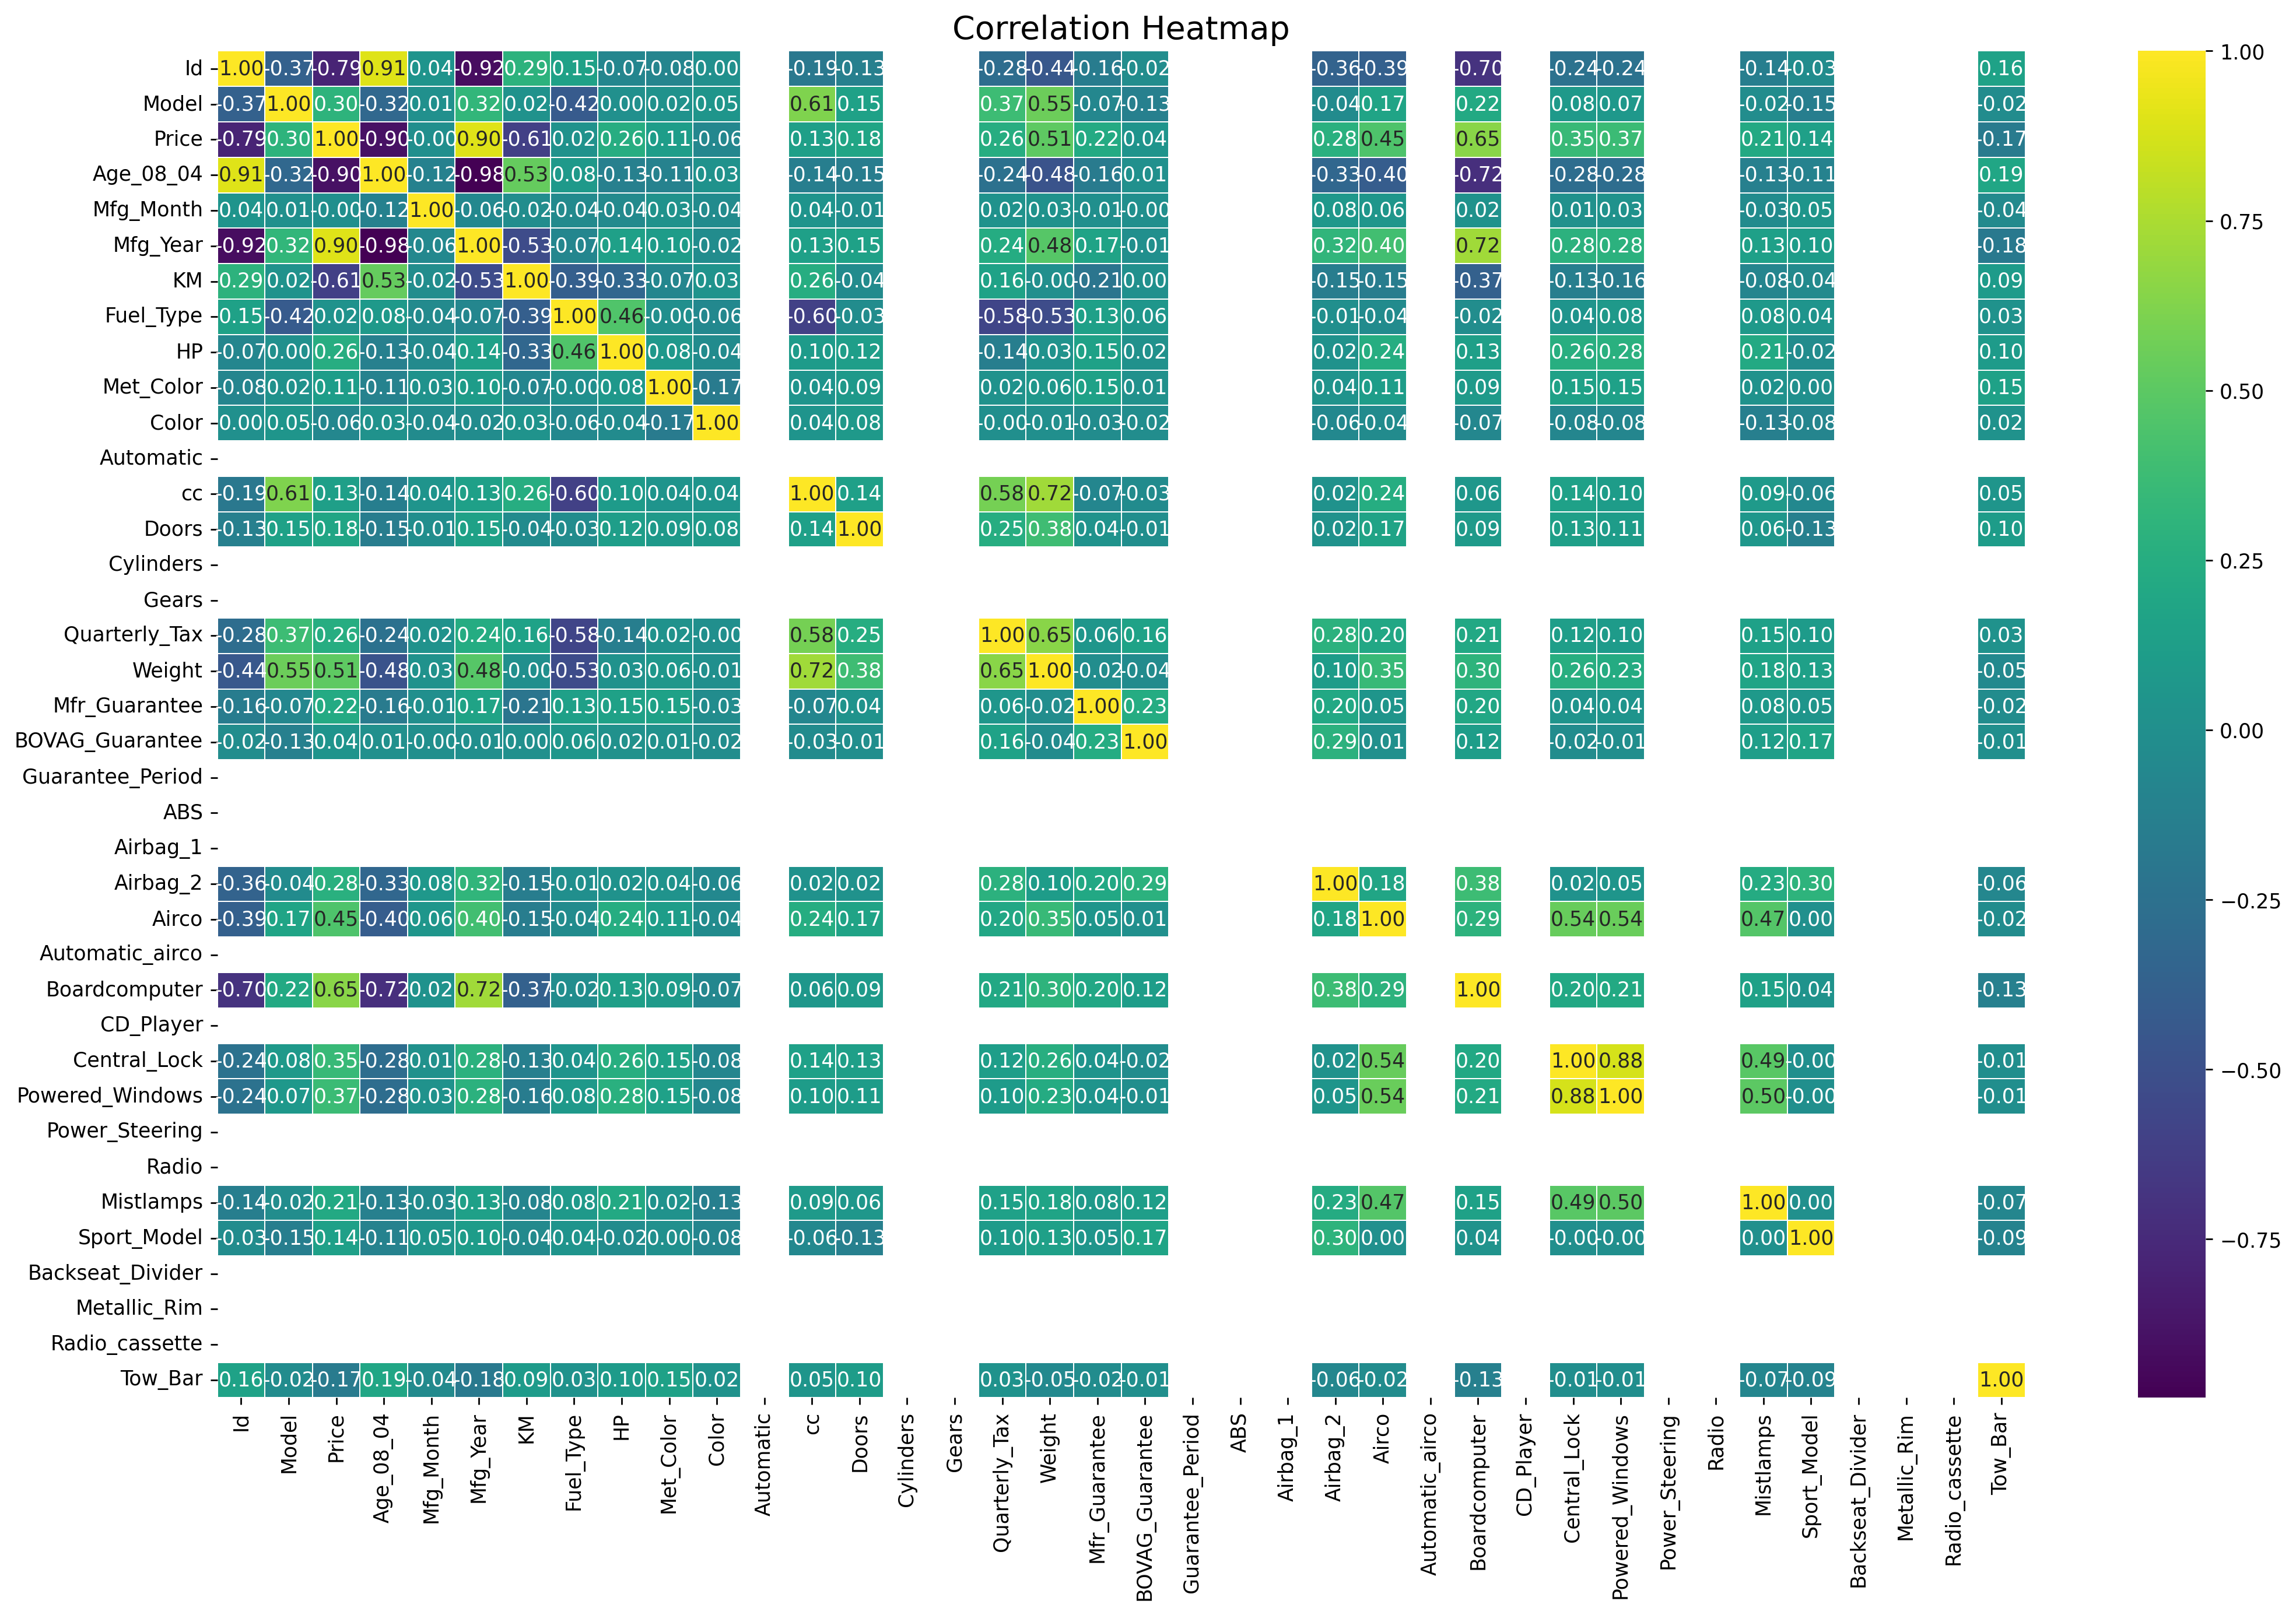

In [83]:
# Assuming df is your DataFrame
s = df.select_dtypes(include="number").corr()

# Set the size of the figure
plt.figure(figsize=(20, 12))

# Create a heatmap with customized colors
sns.heatmap(s, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap", fontsize=16)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()


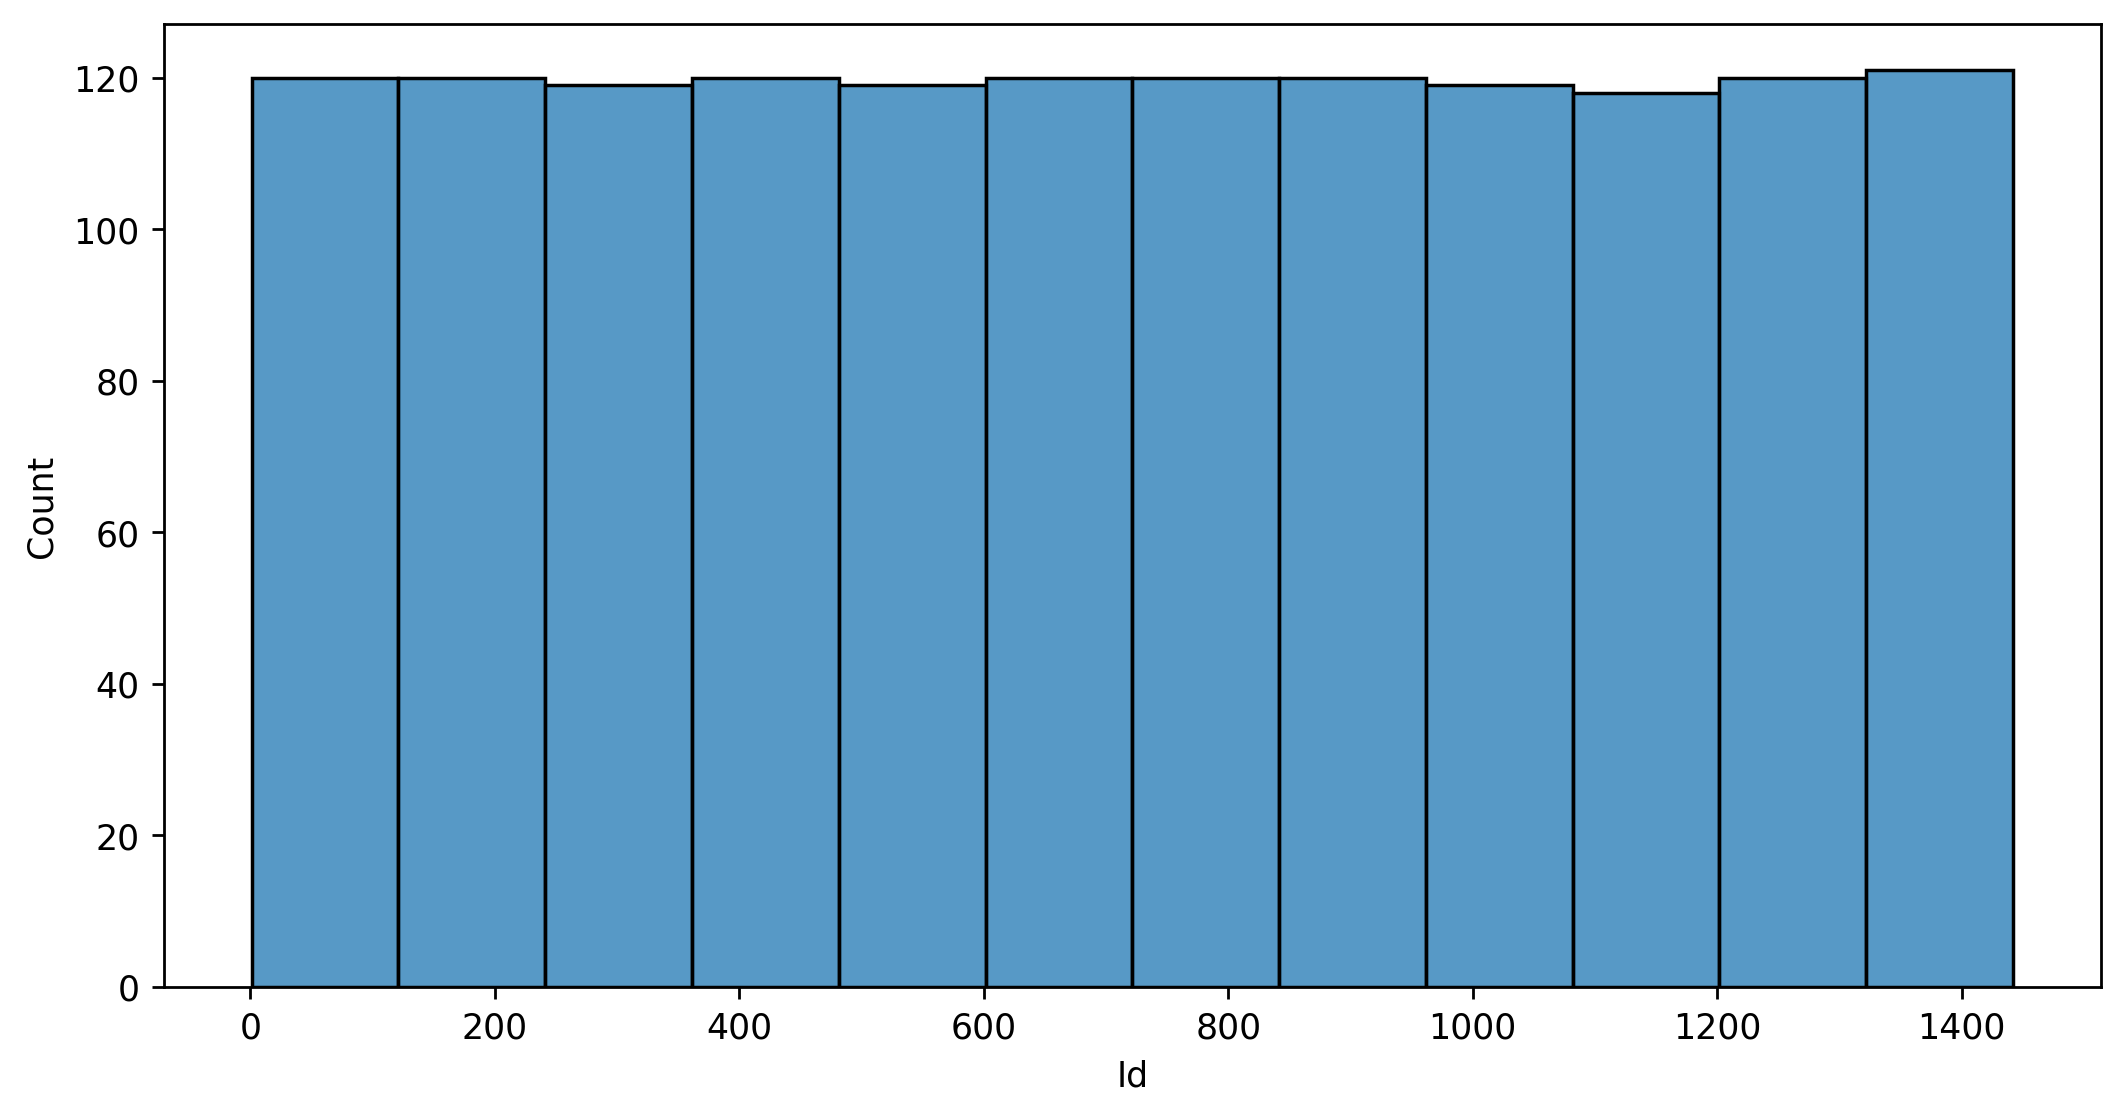

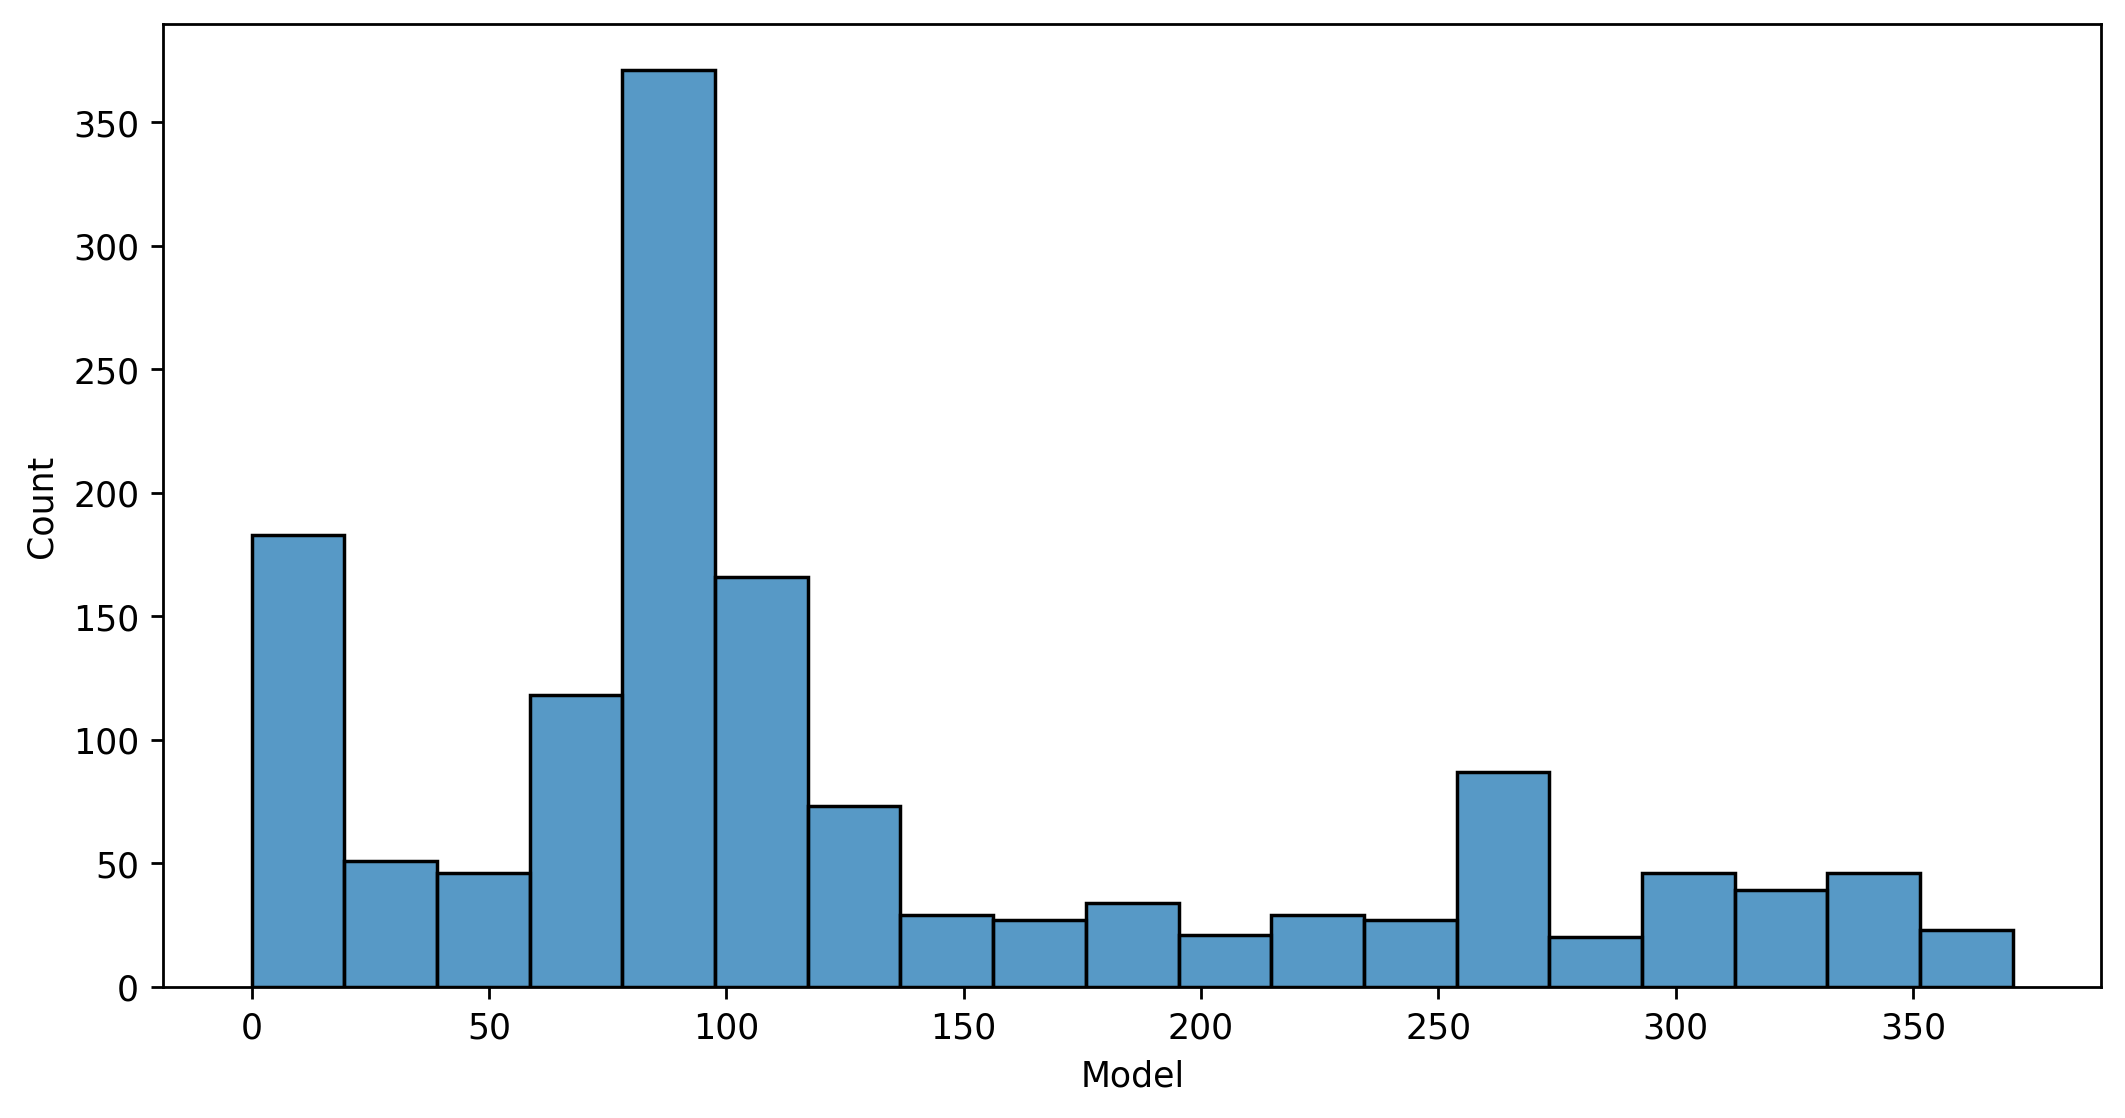

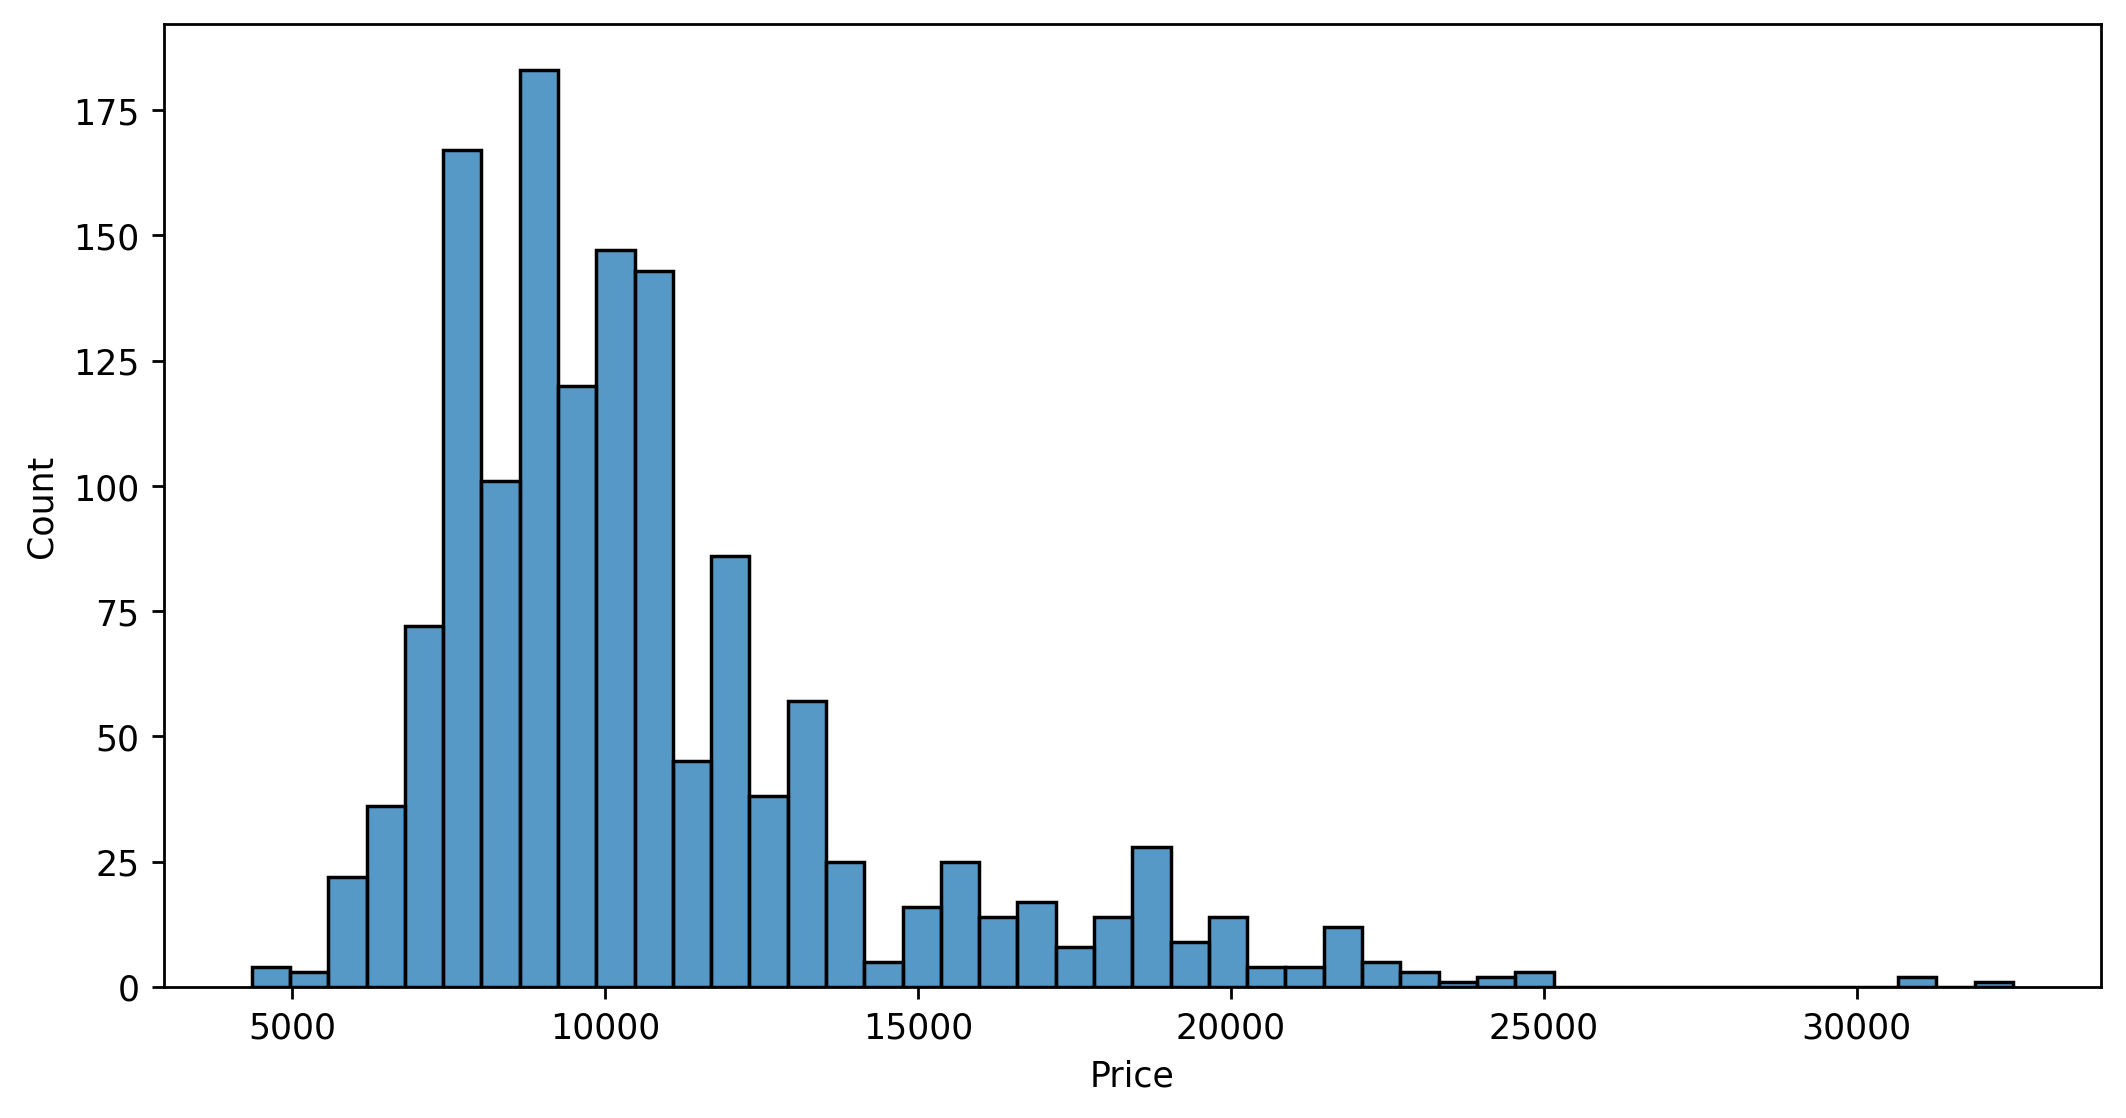

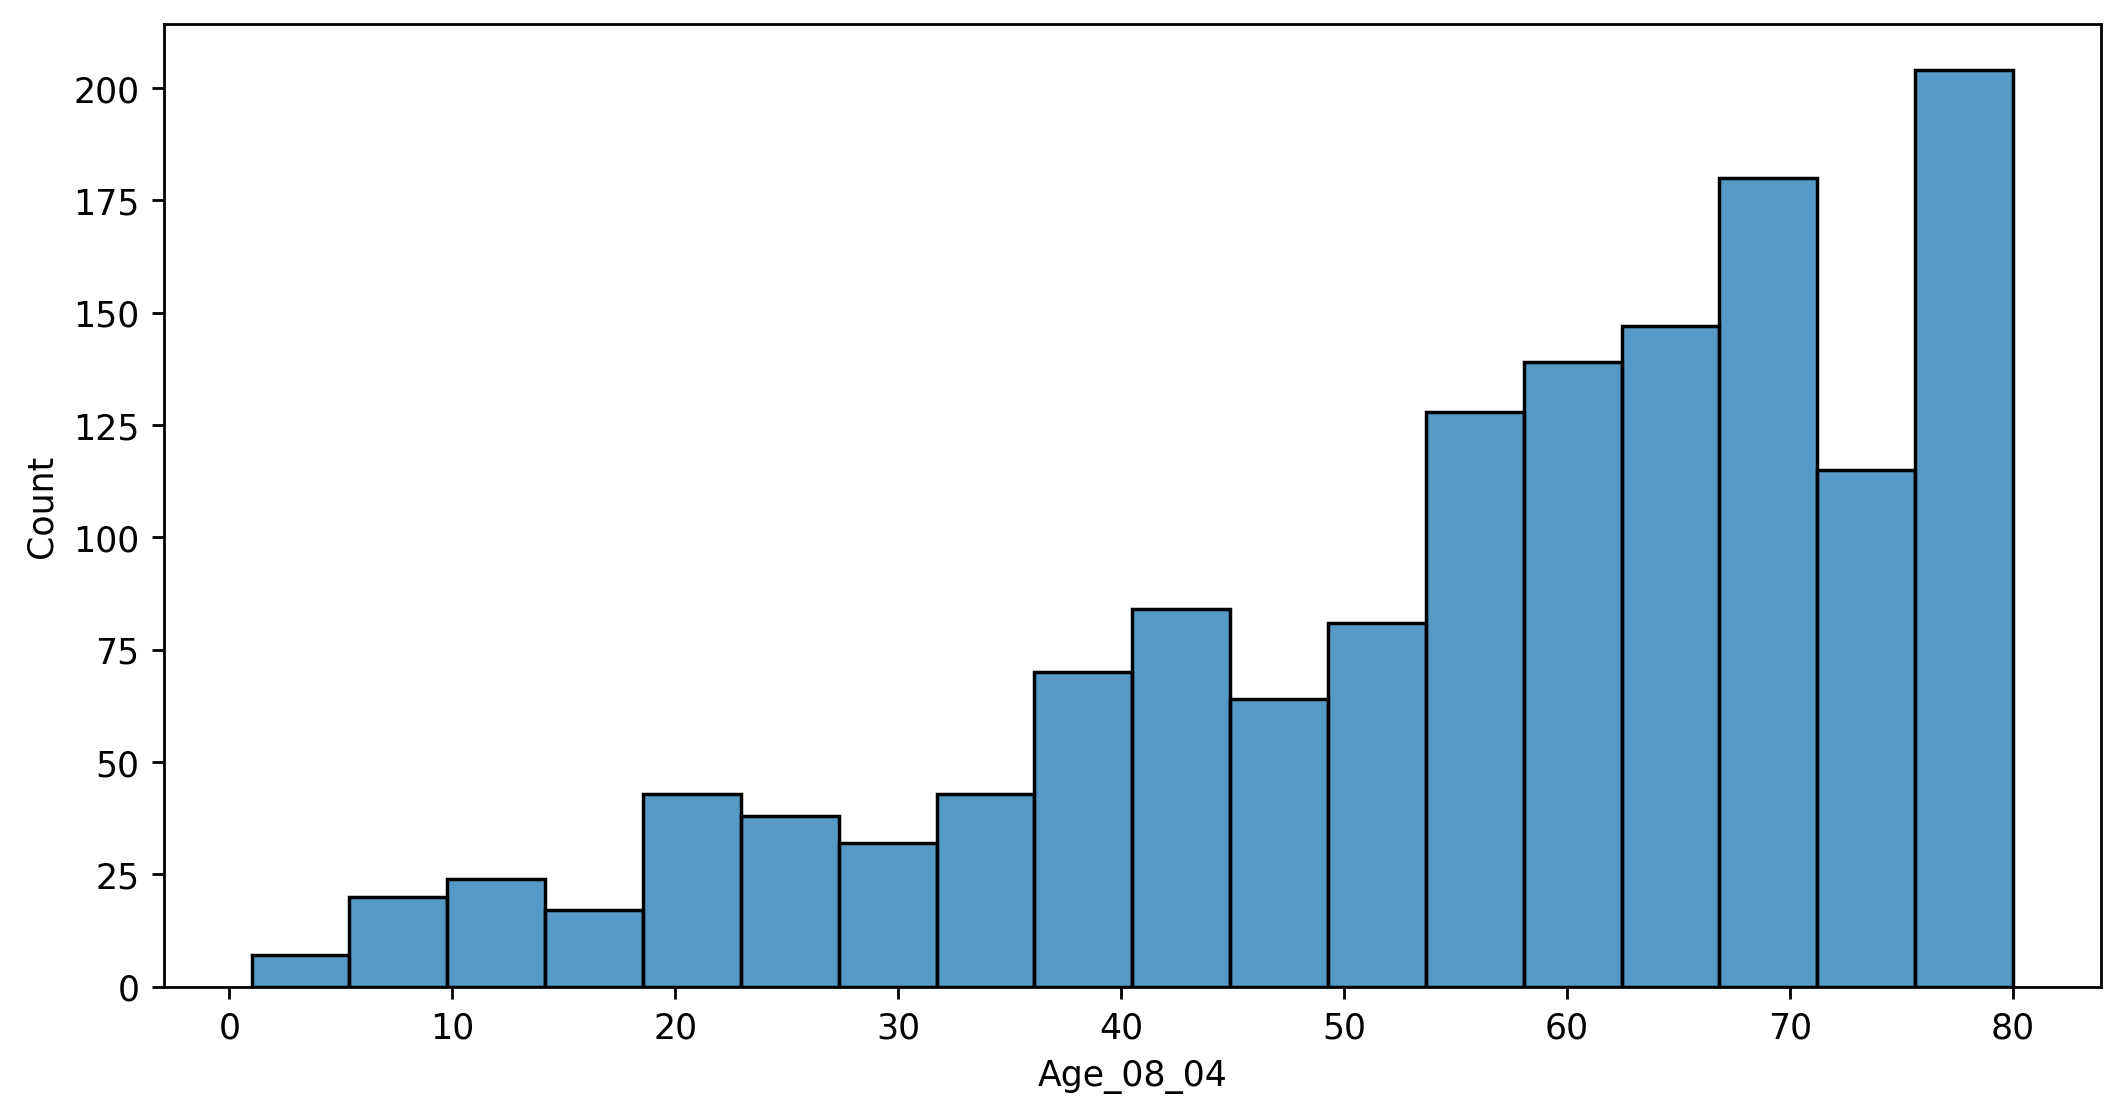

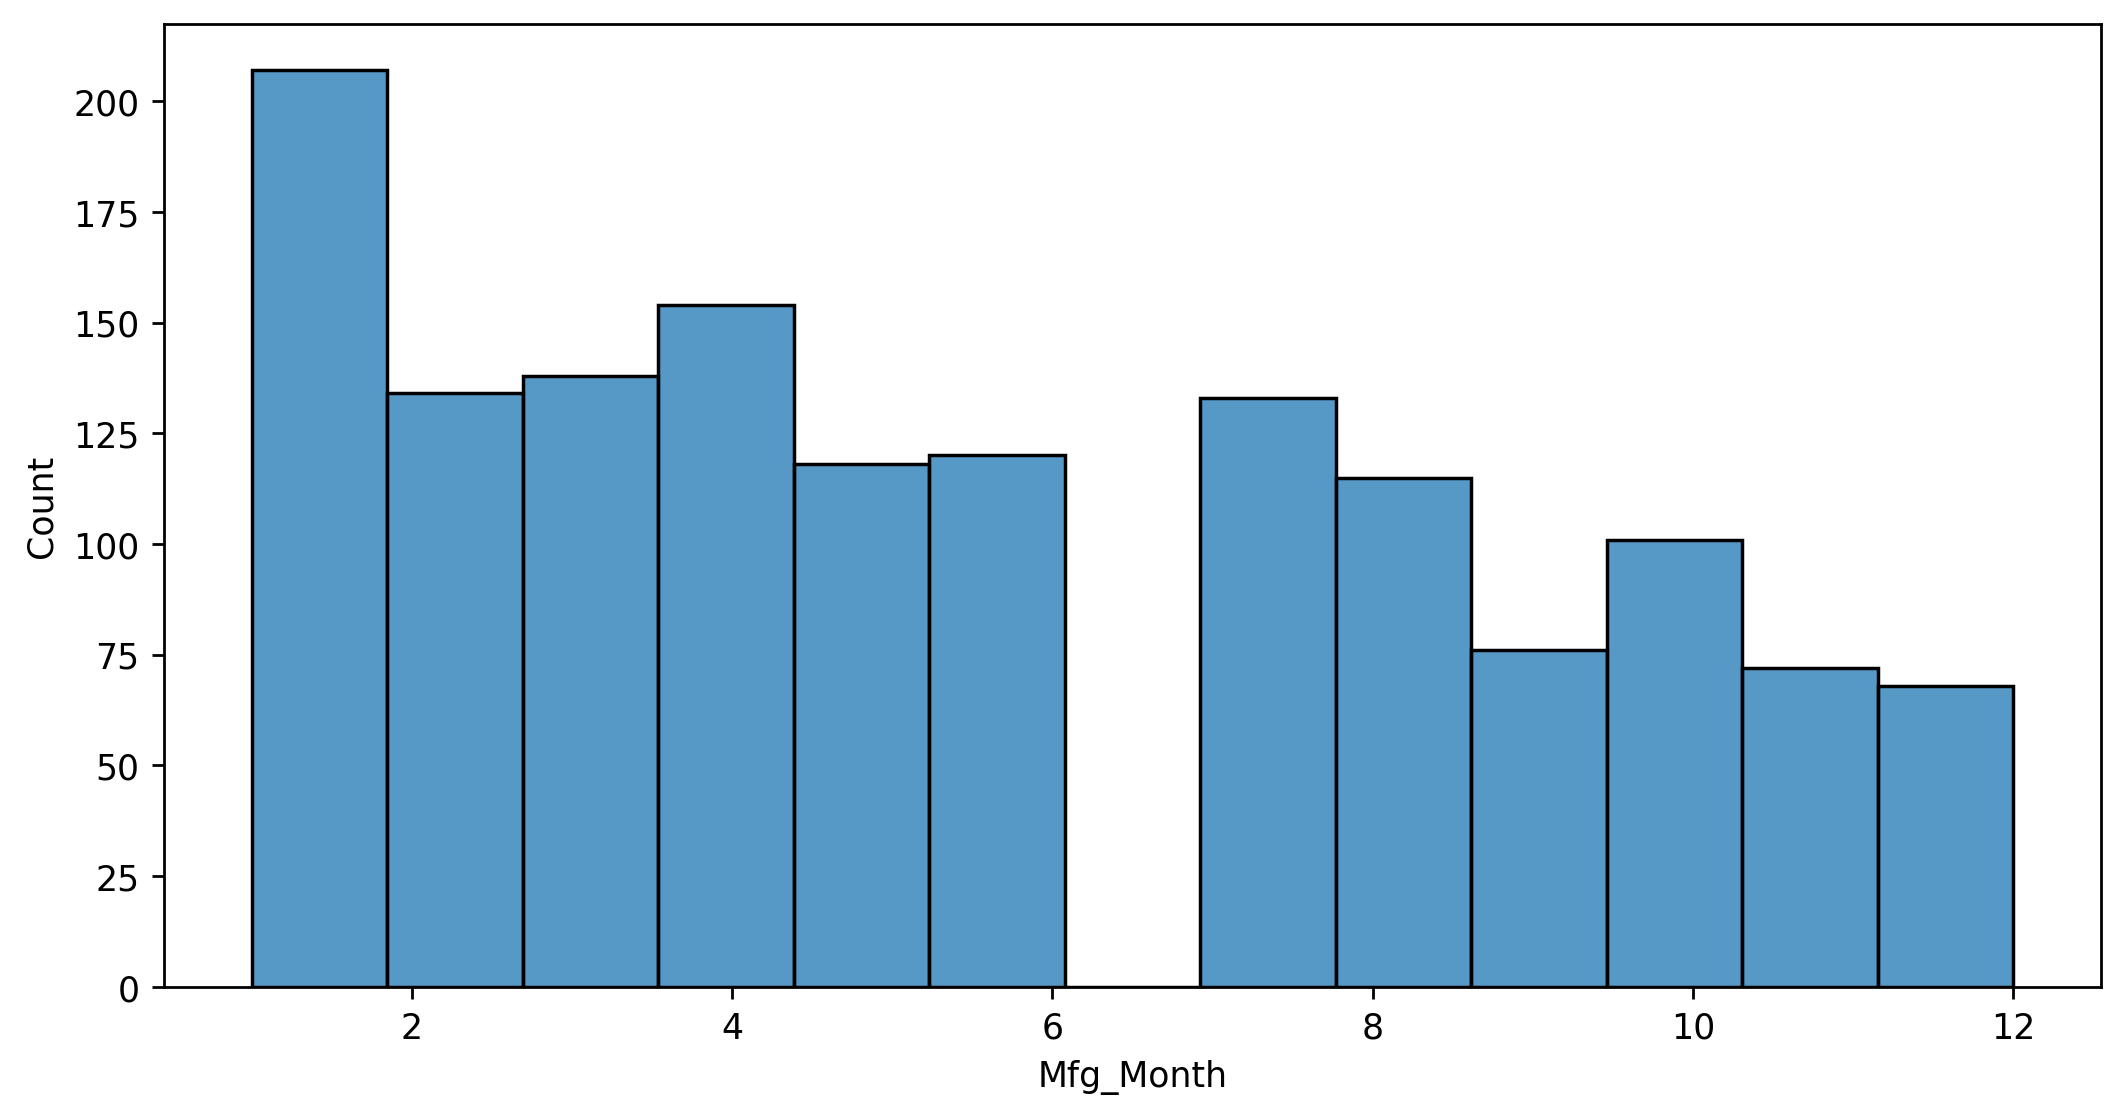

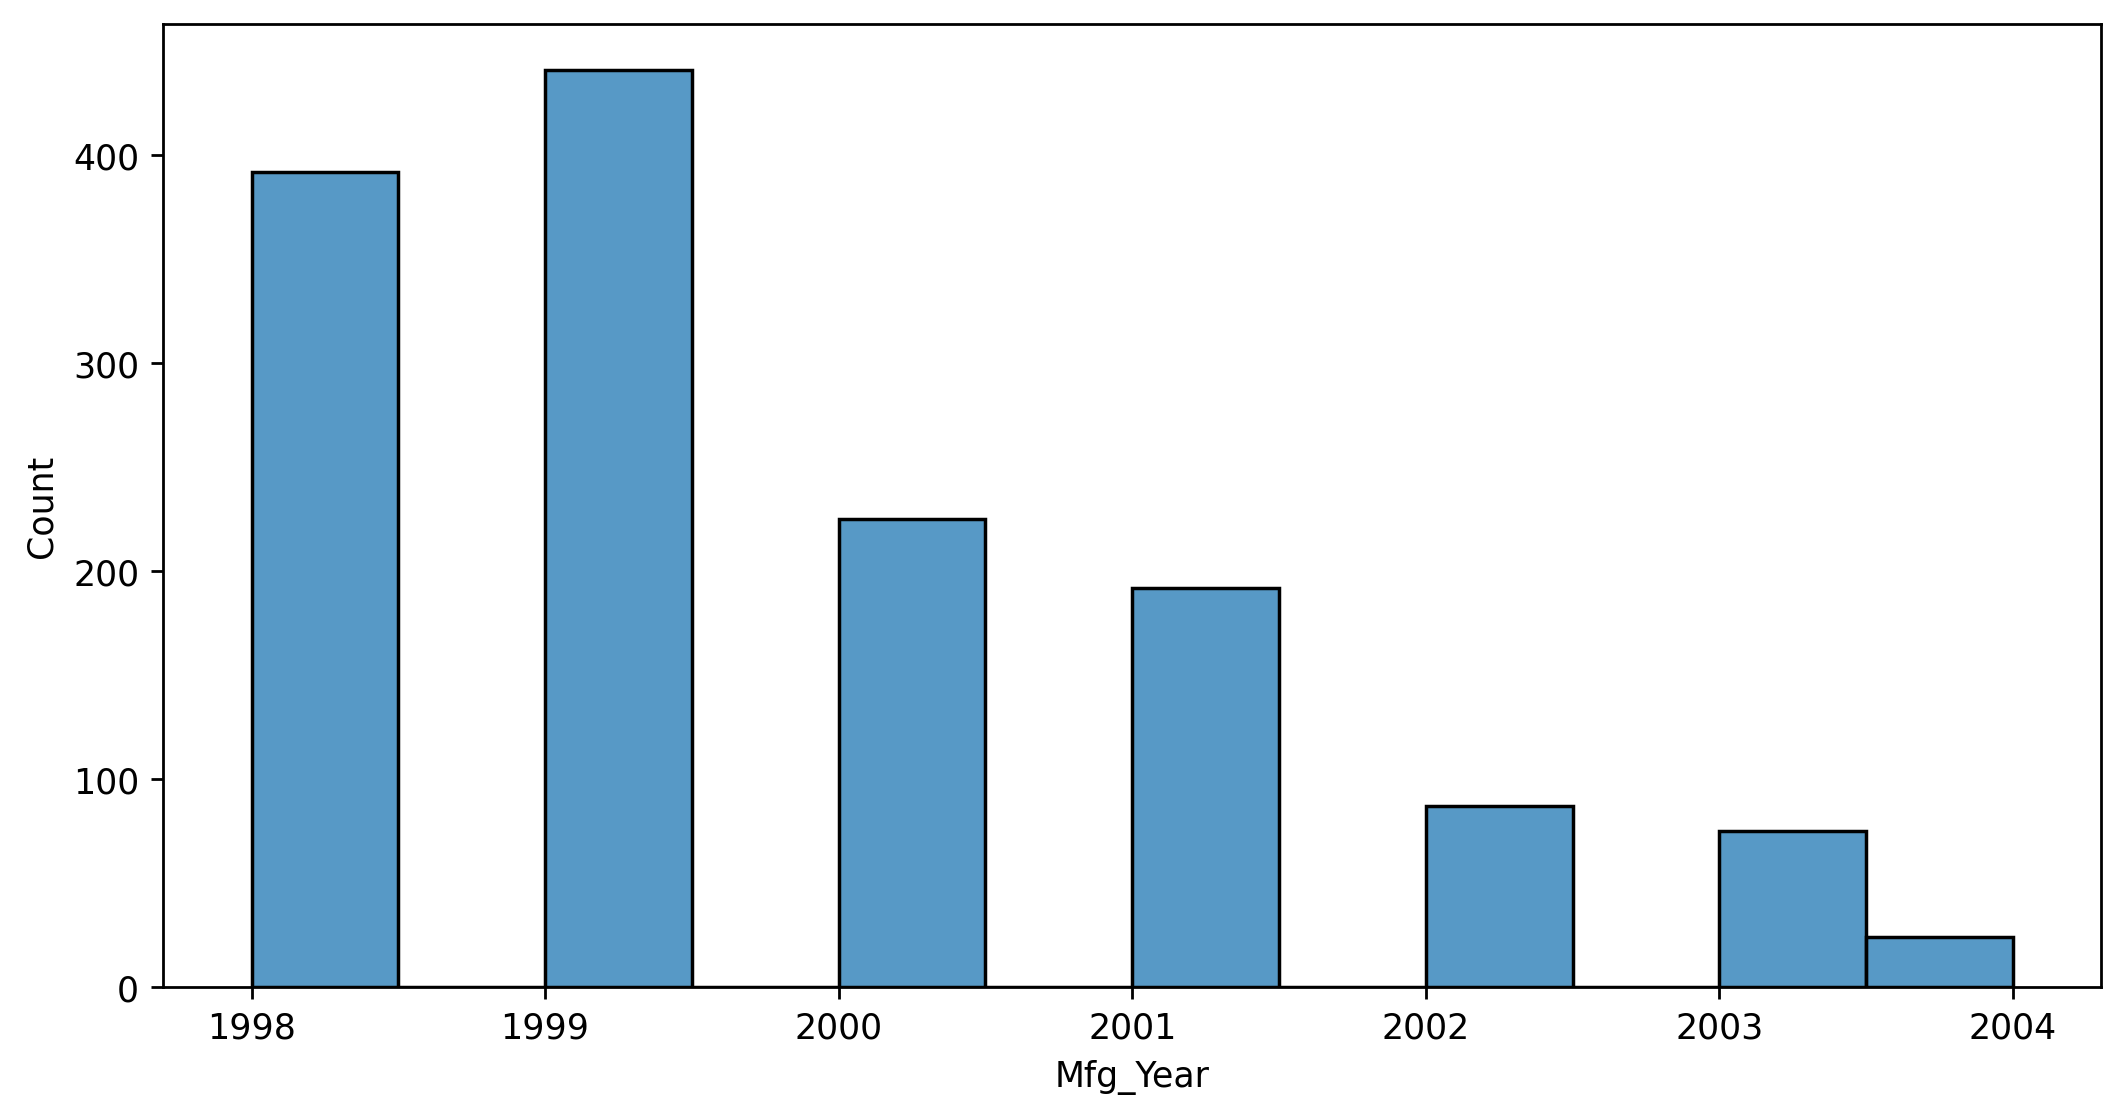

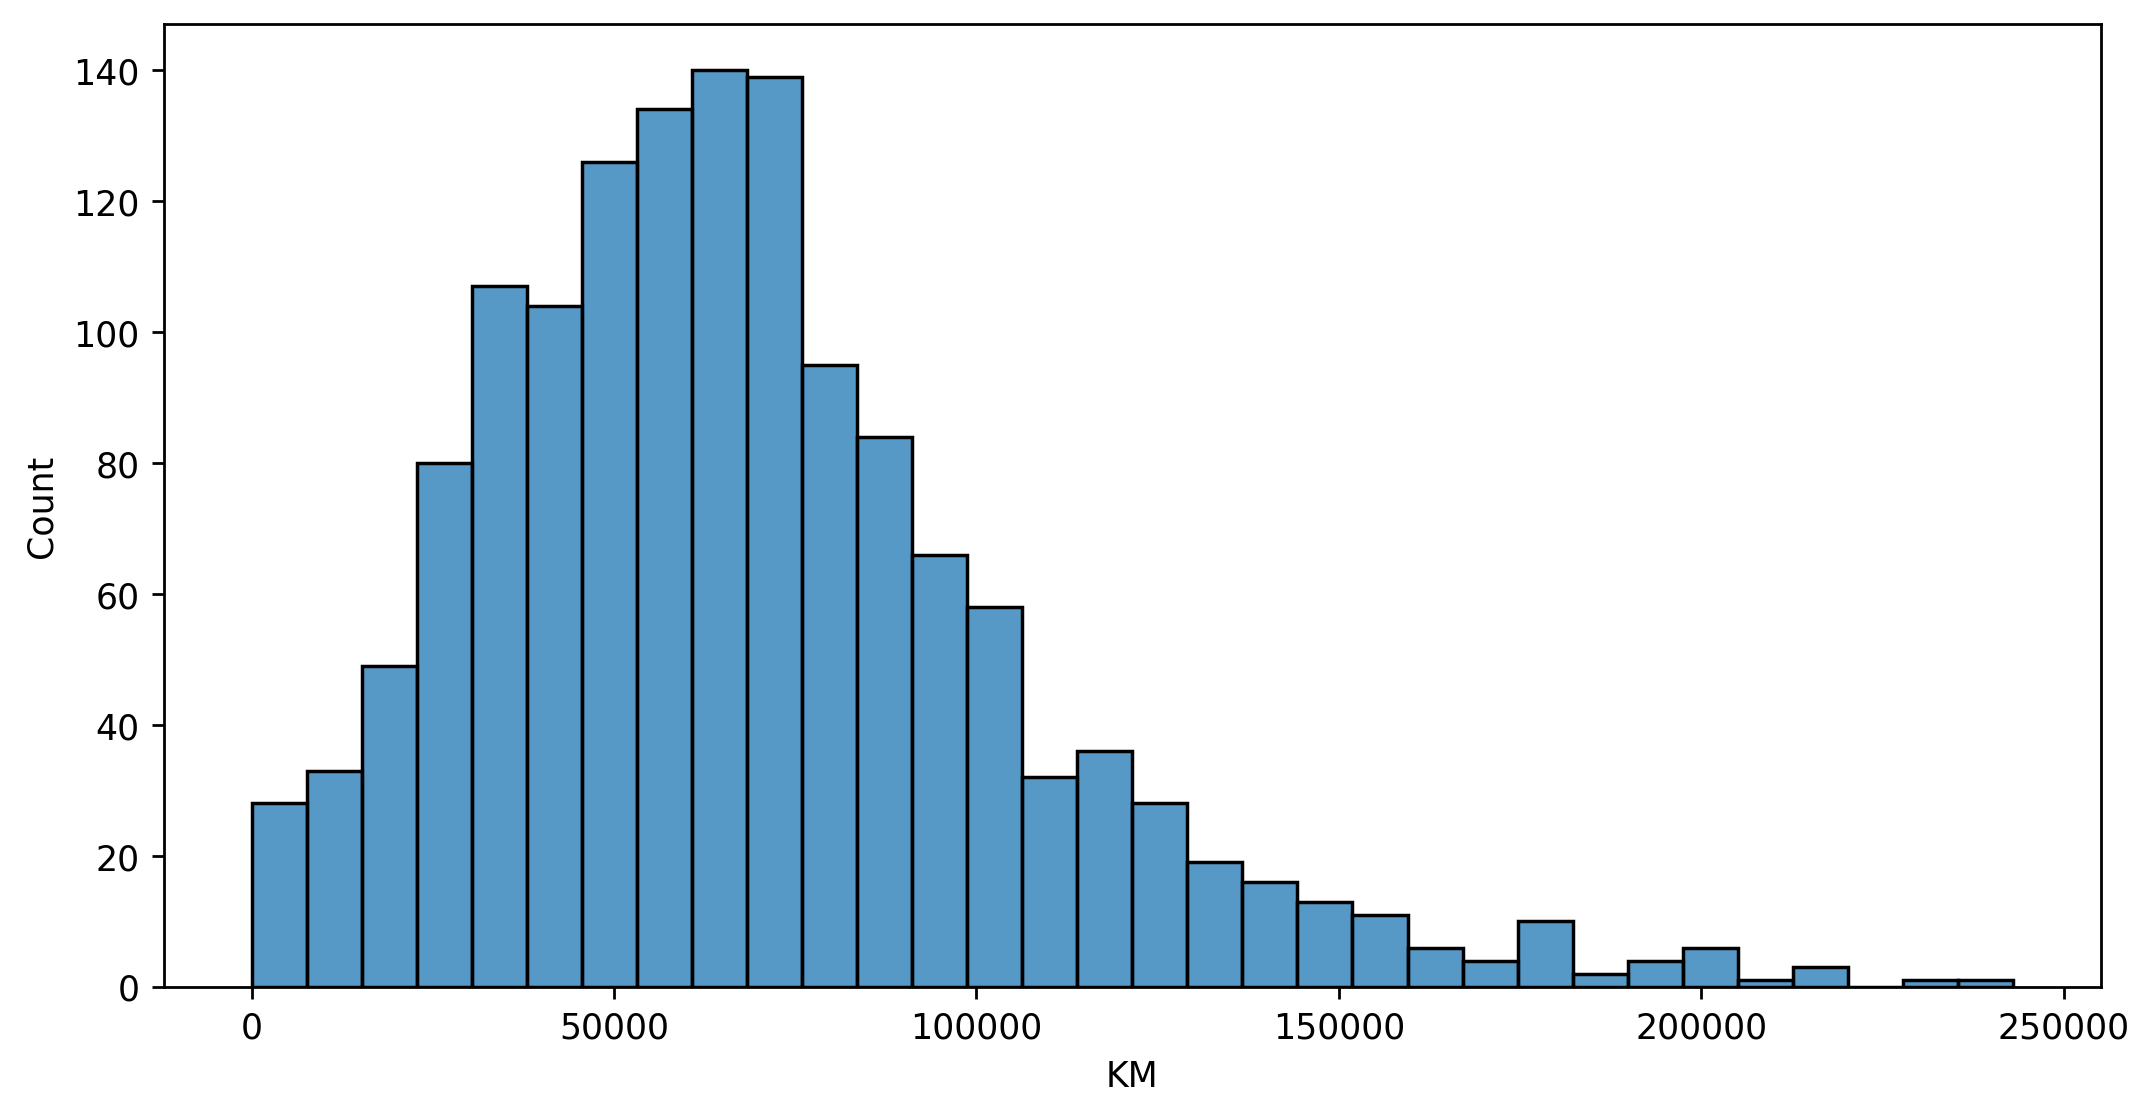

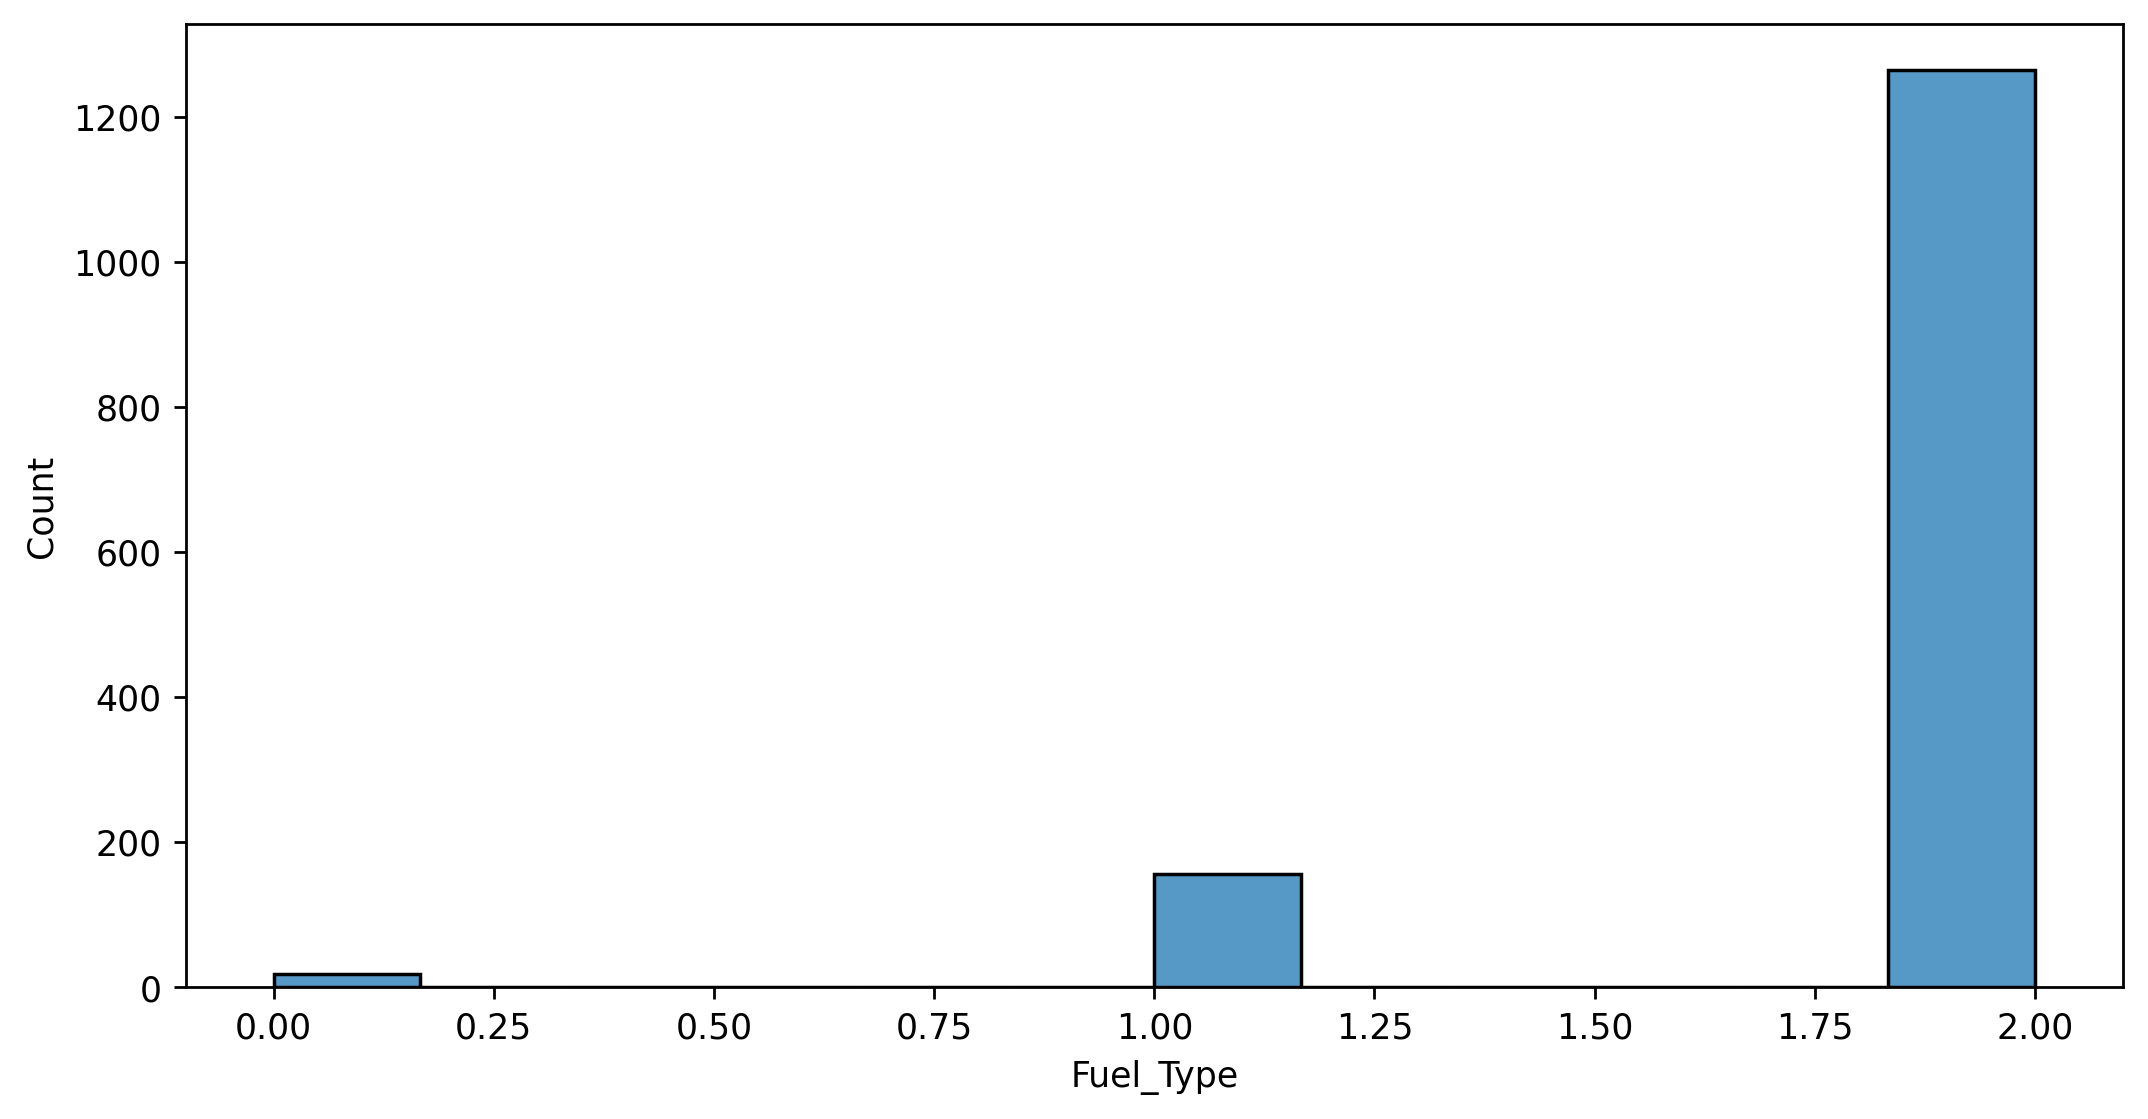

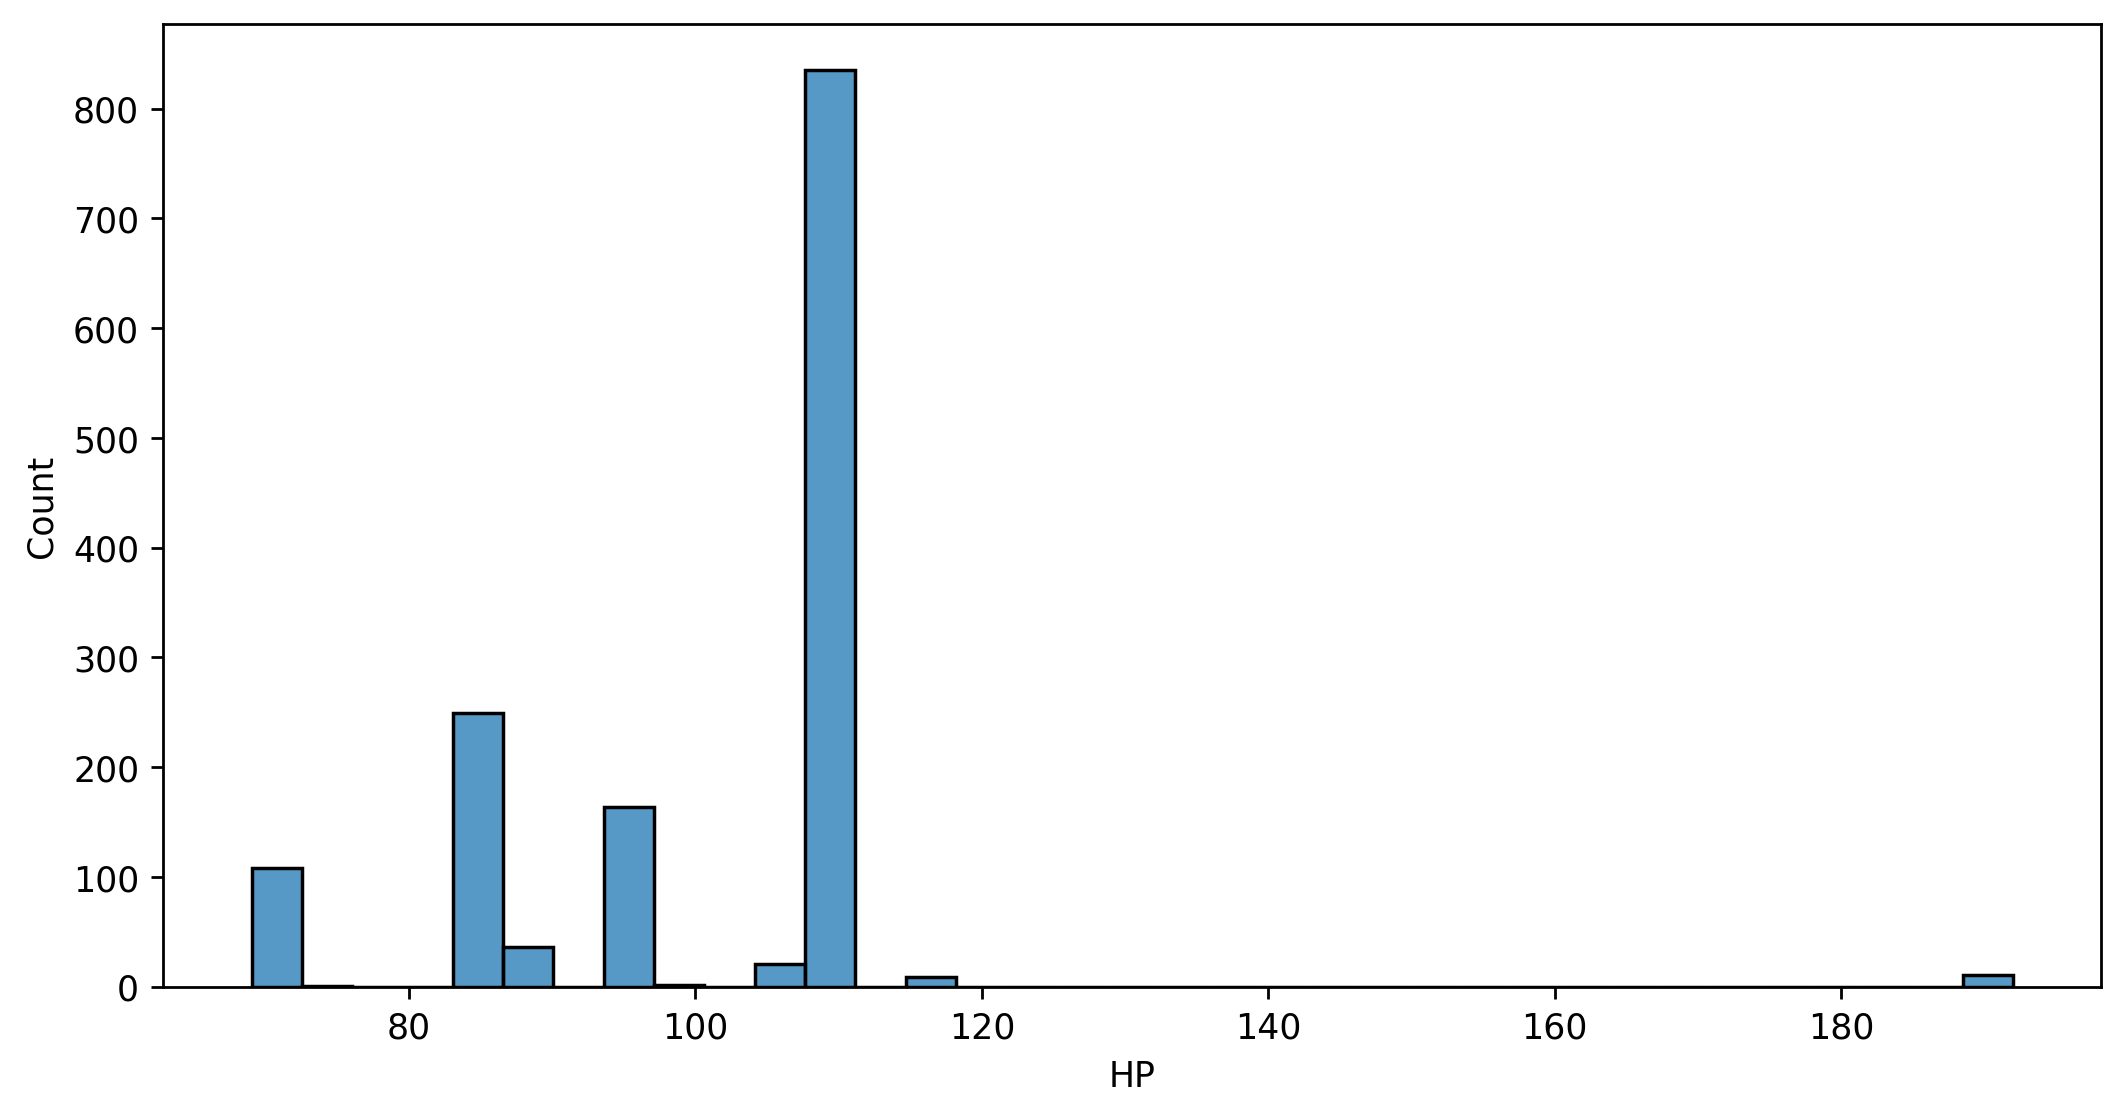

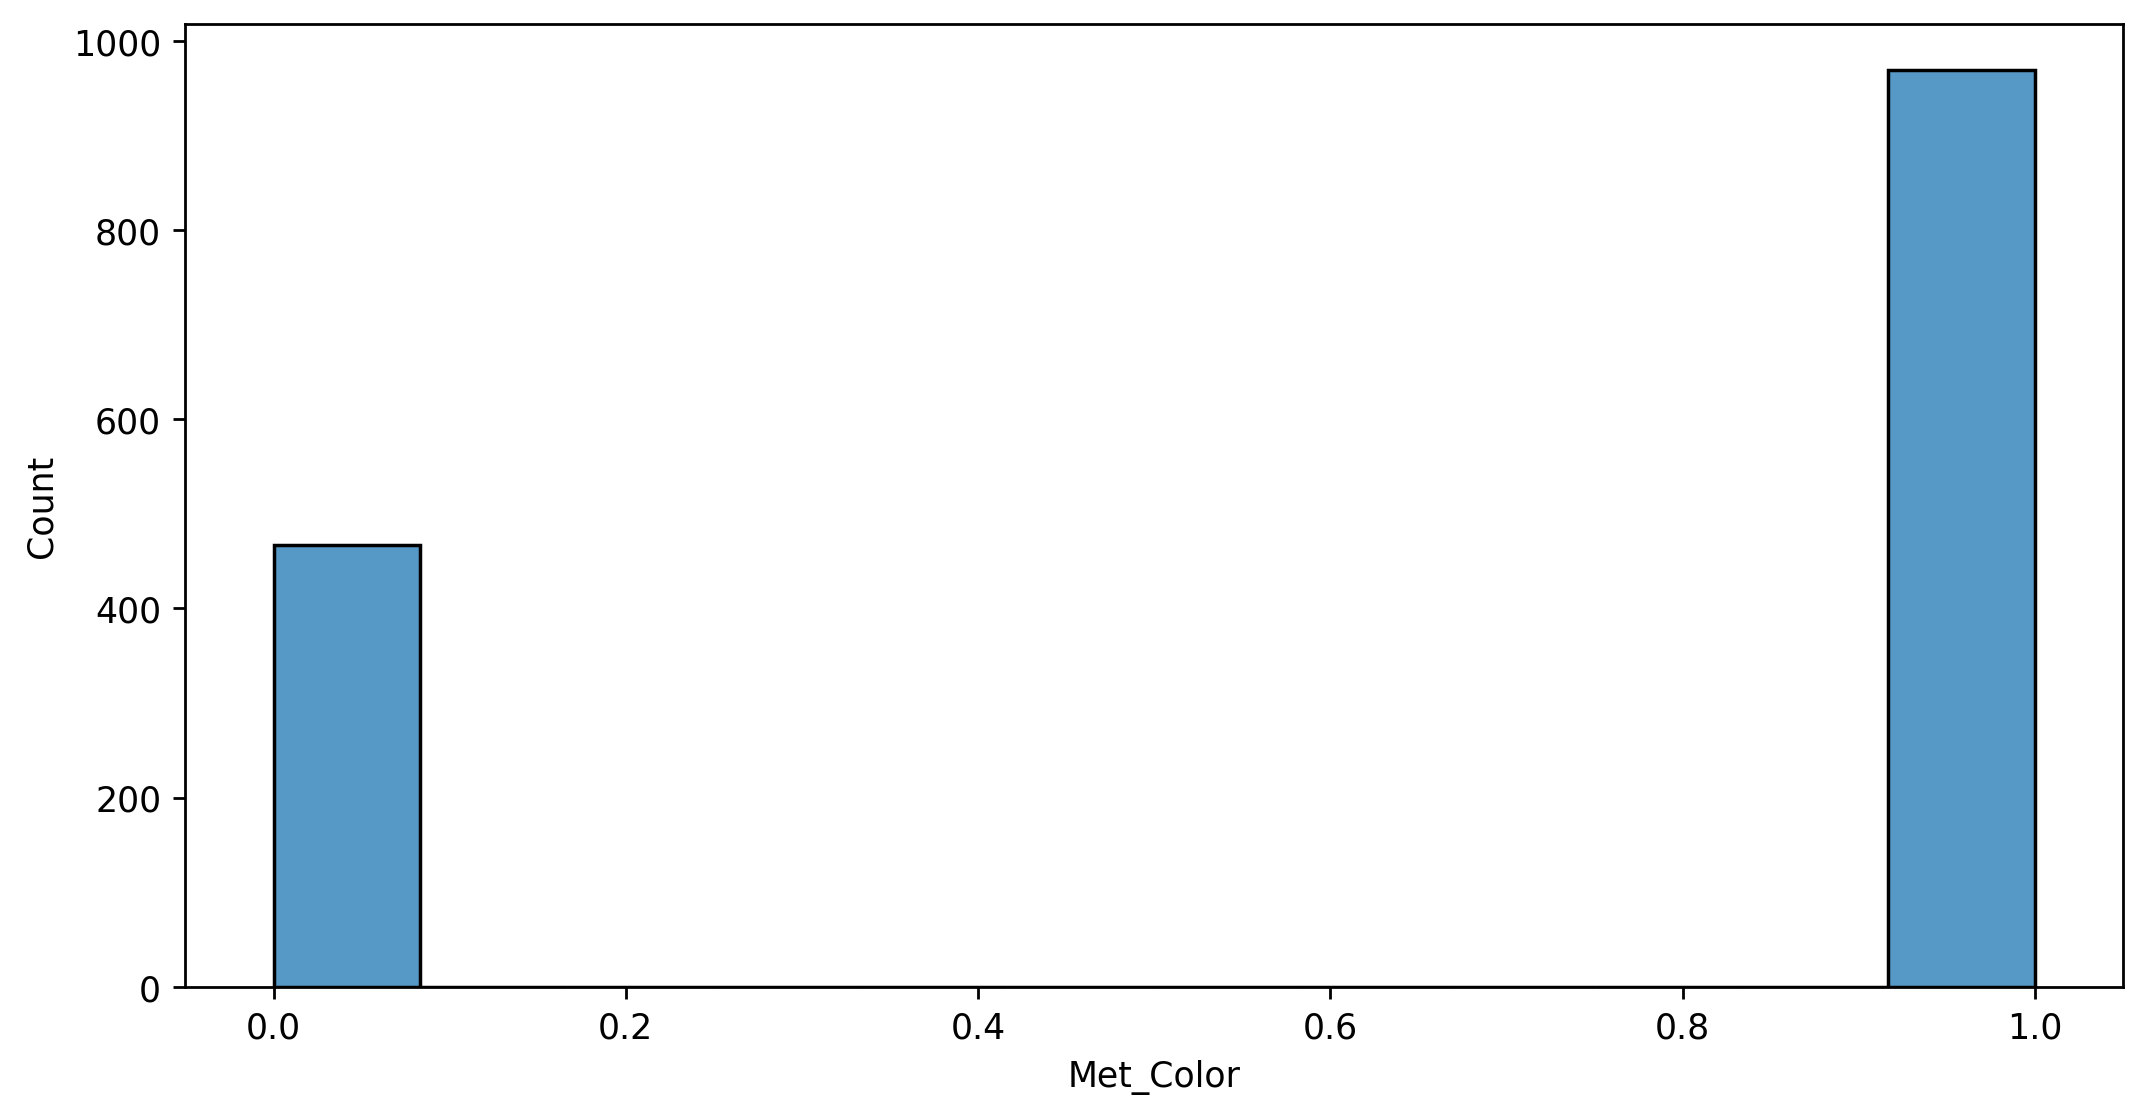

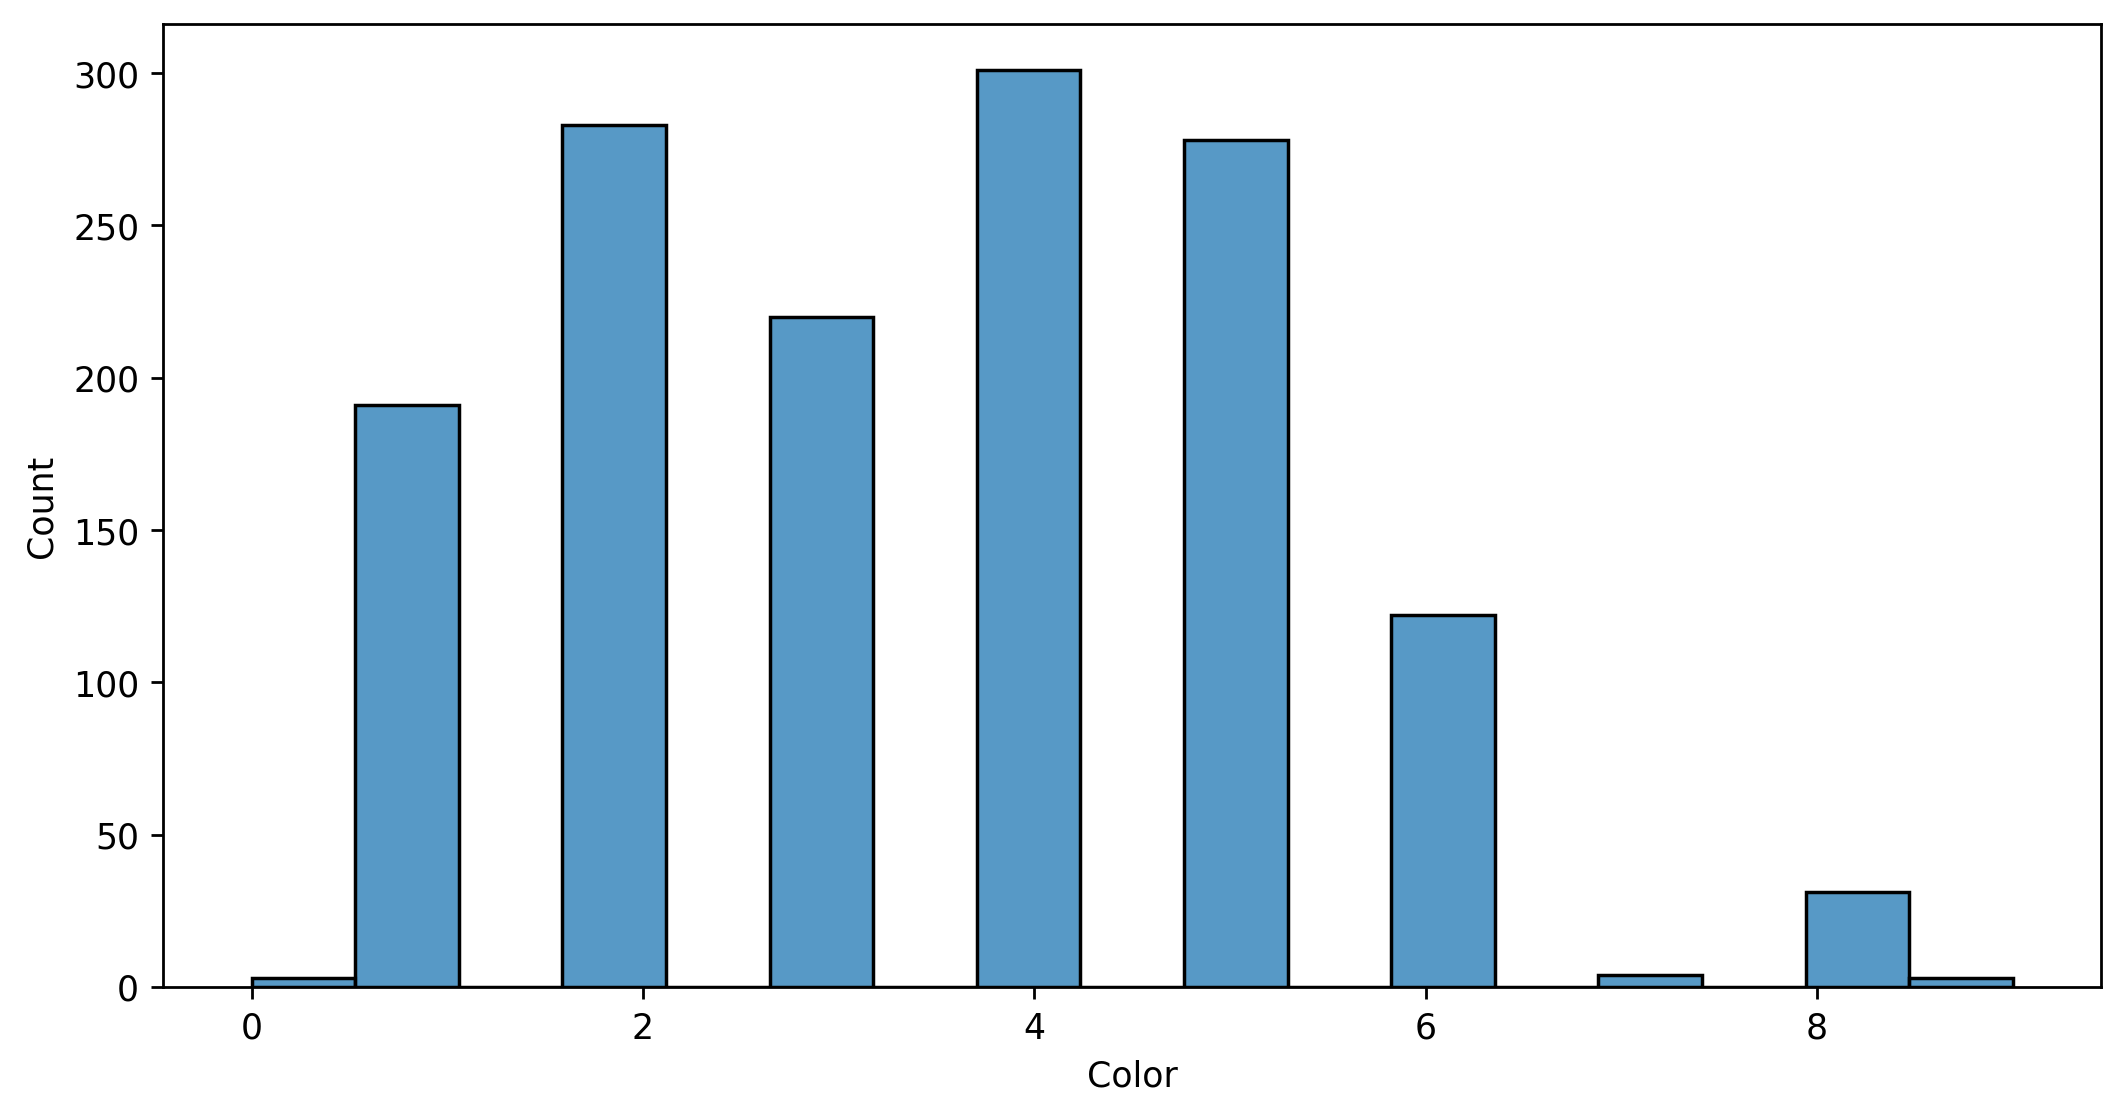

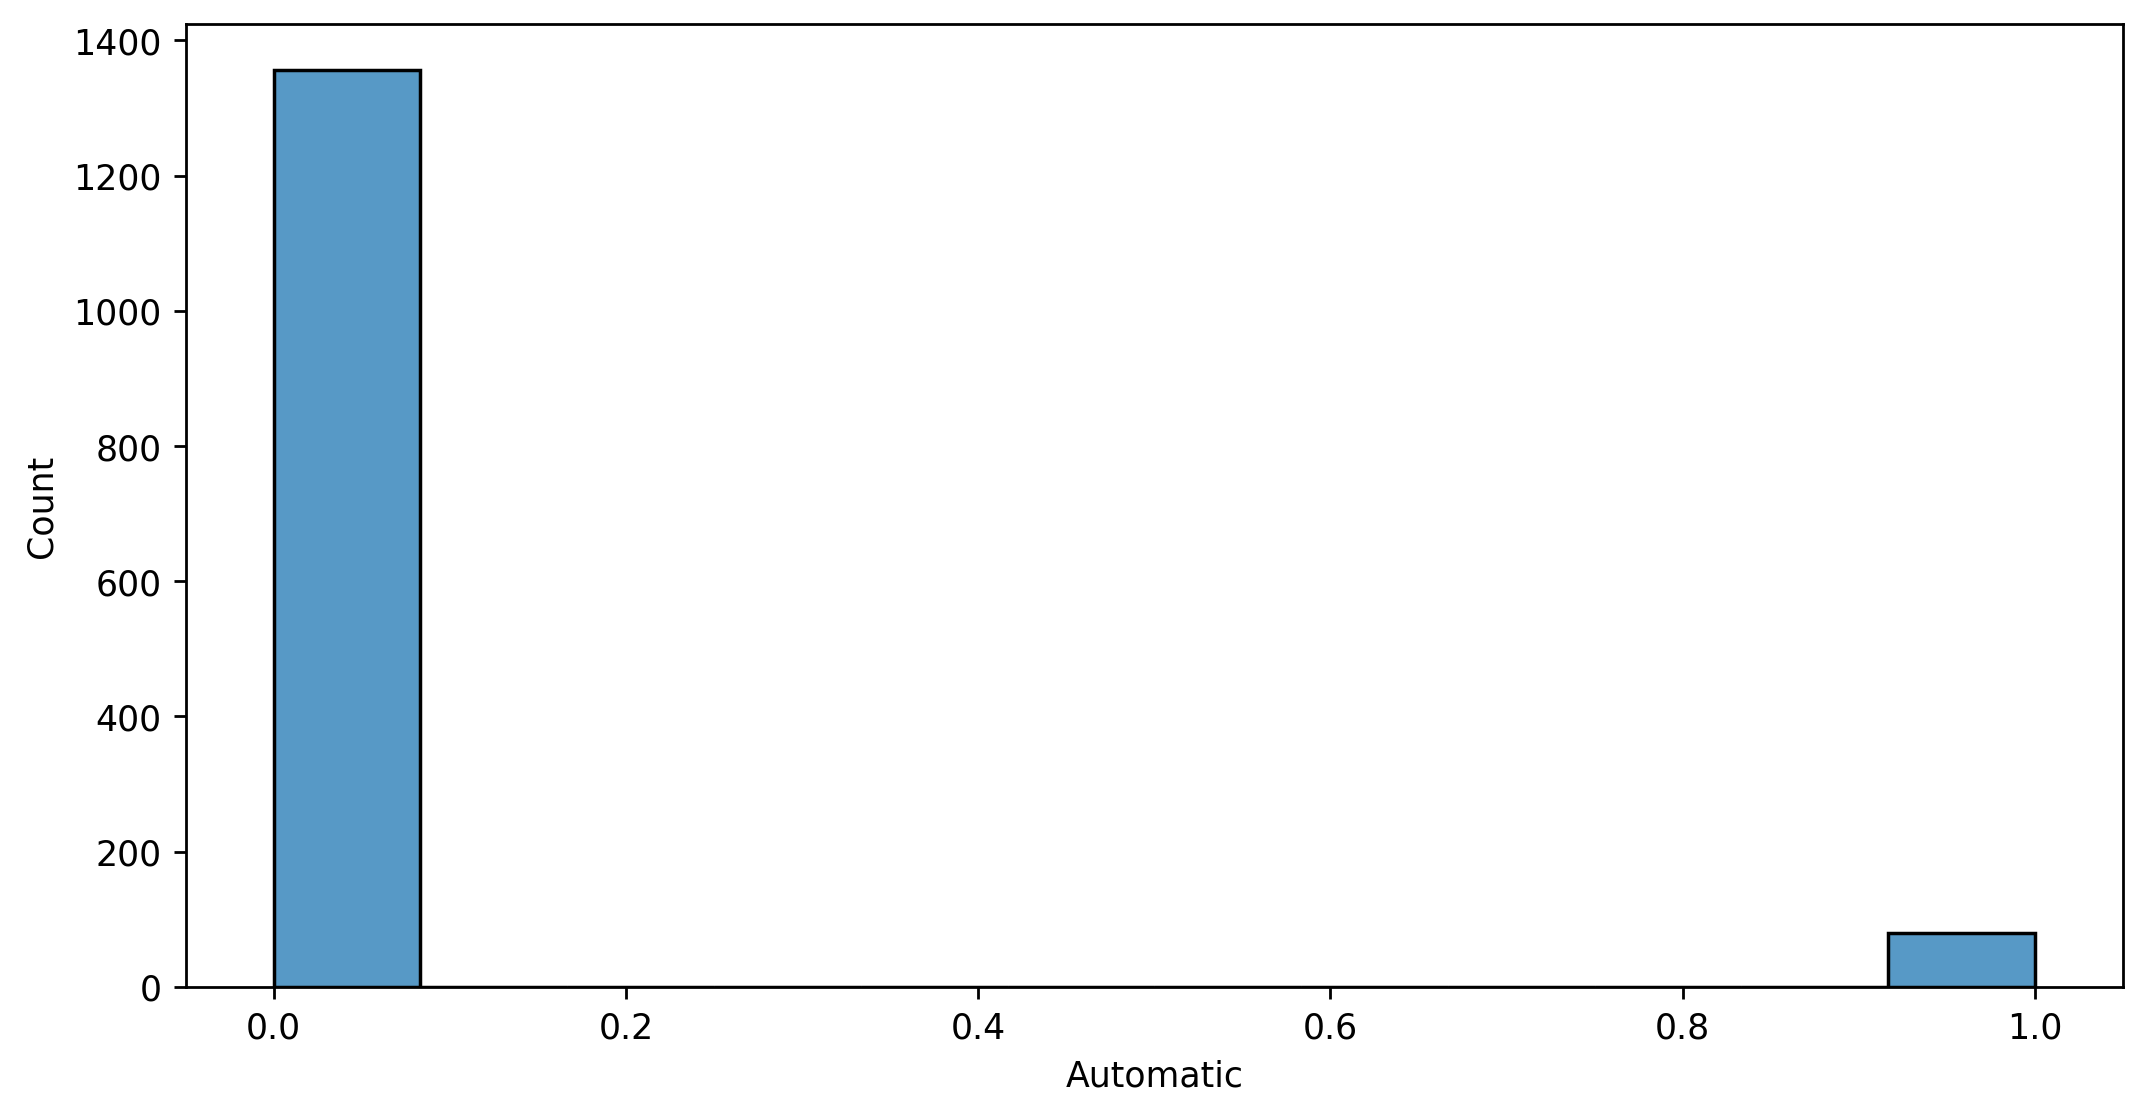

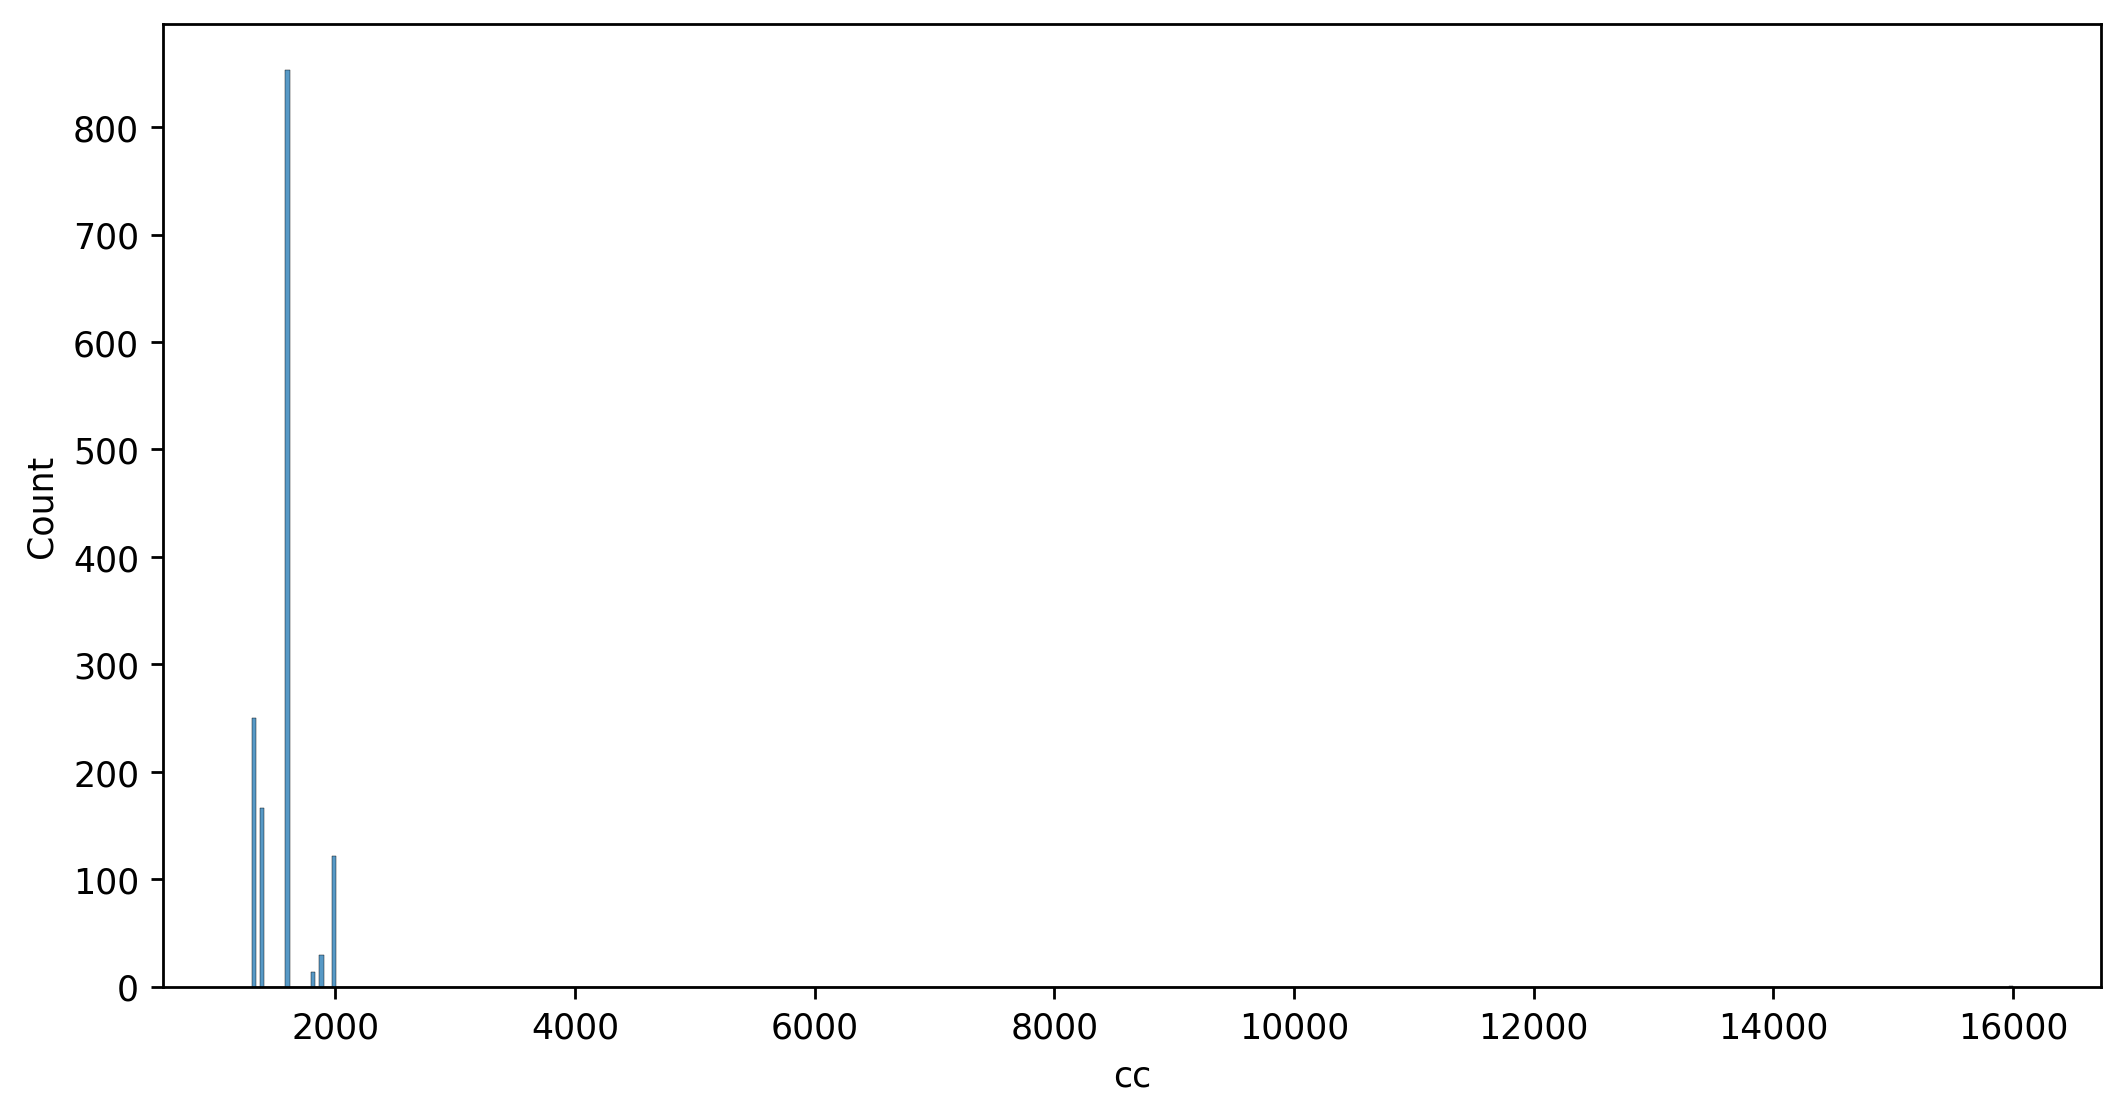

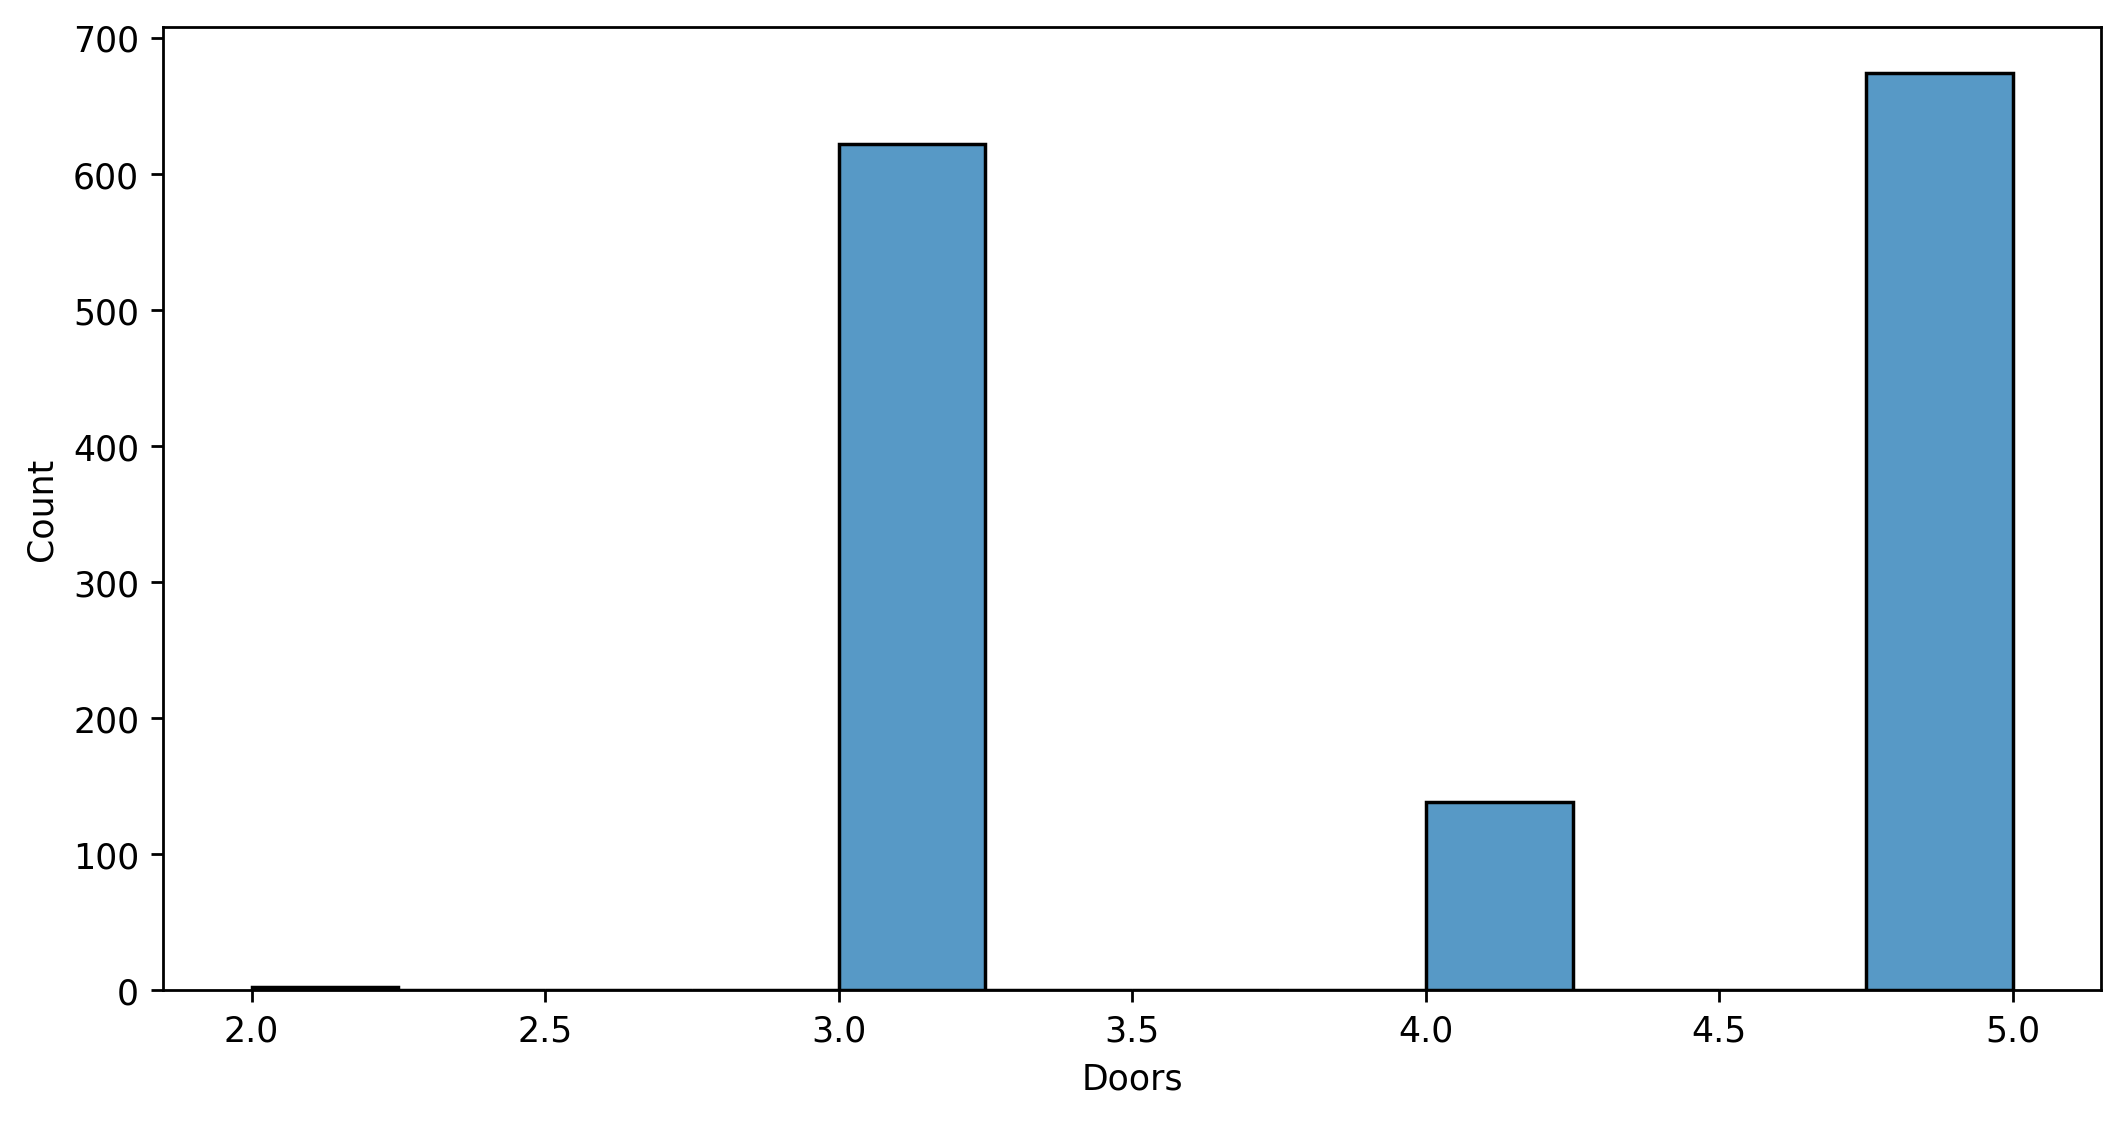

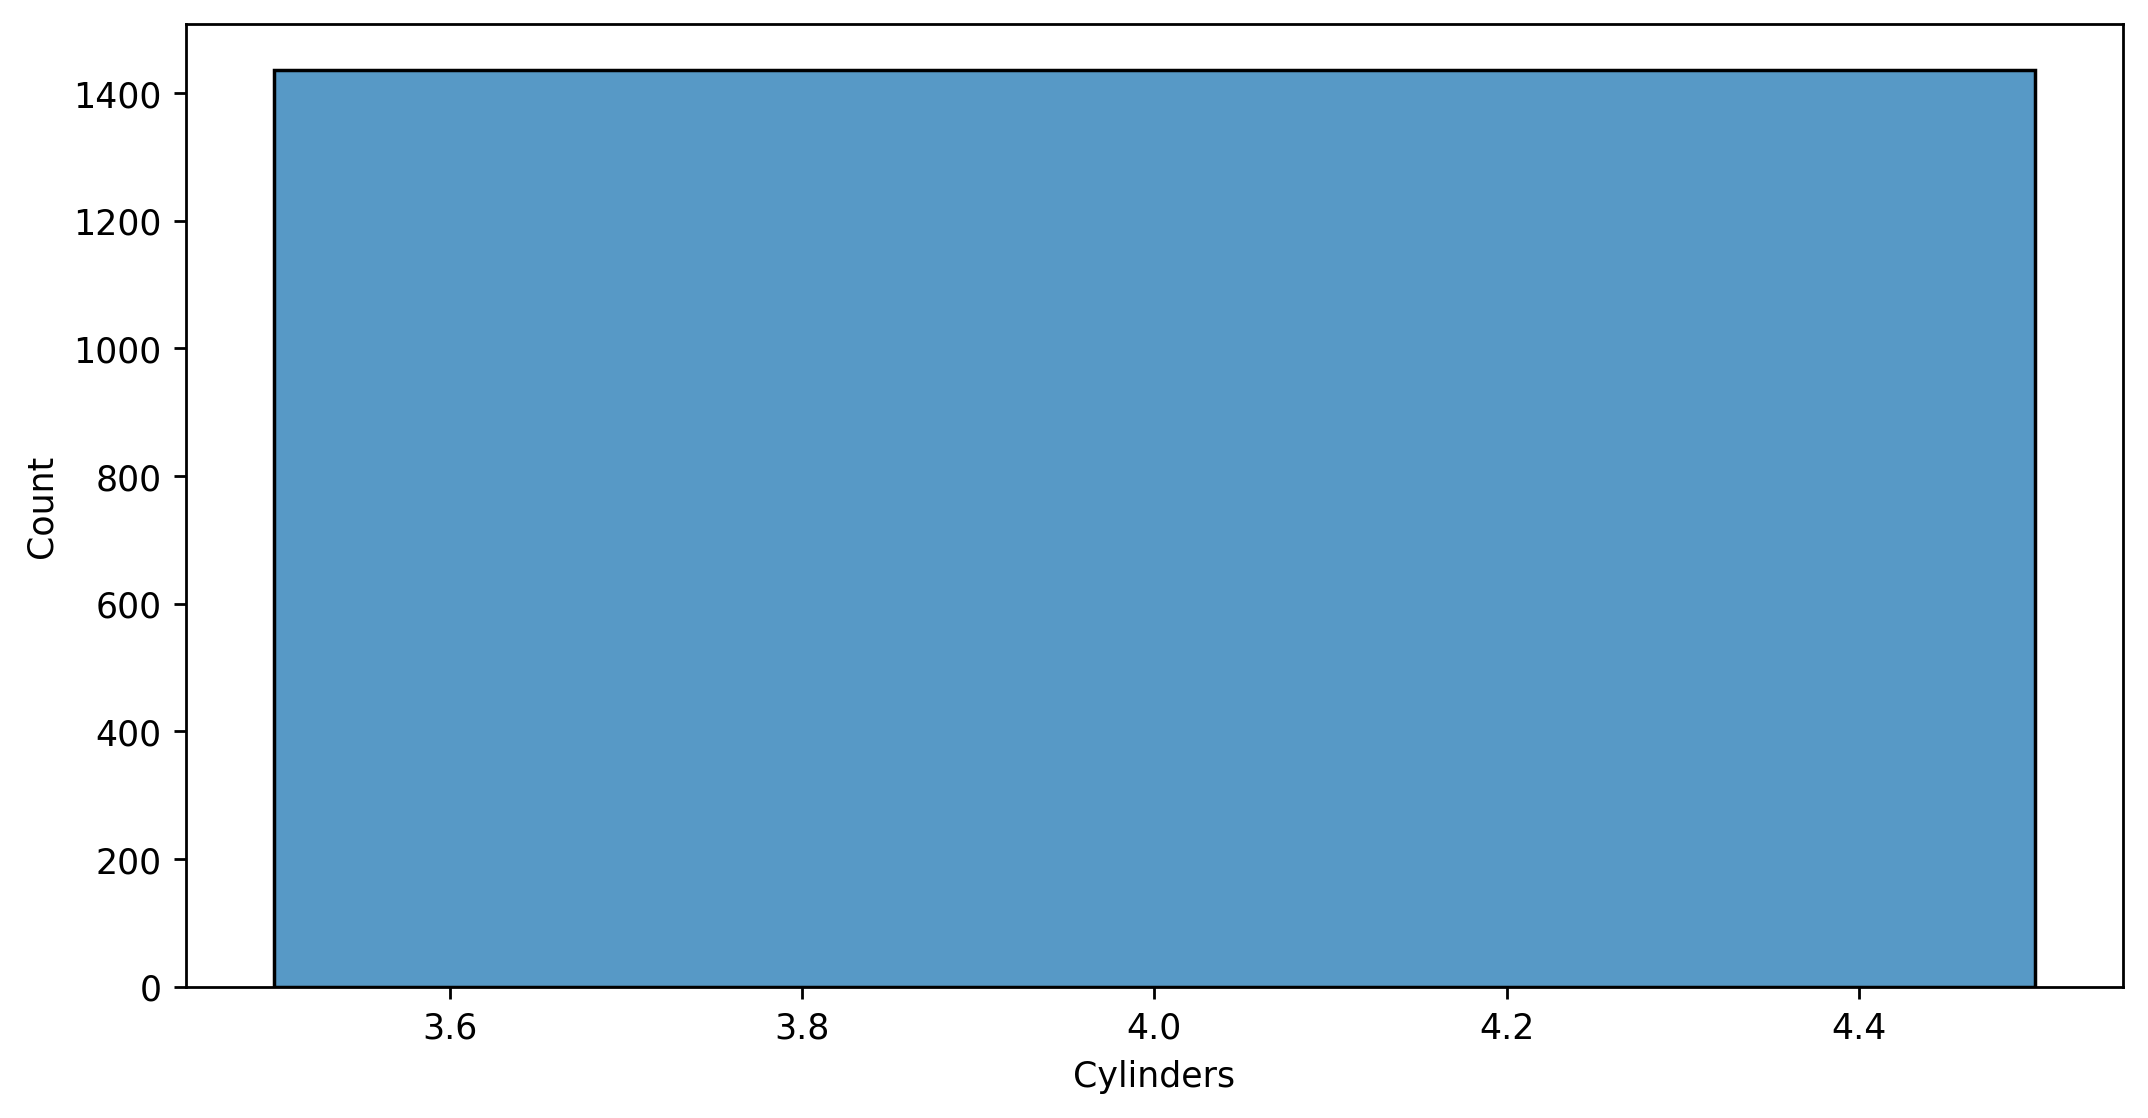

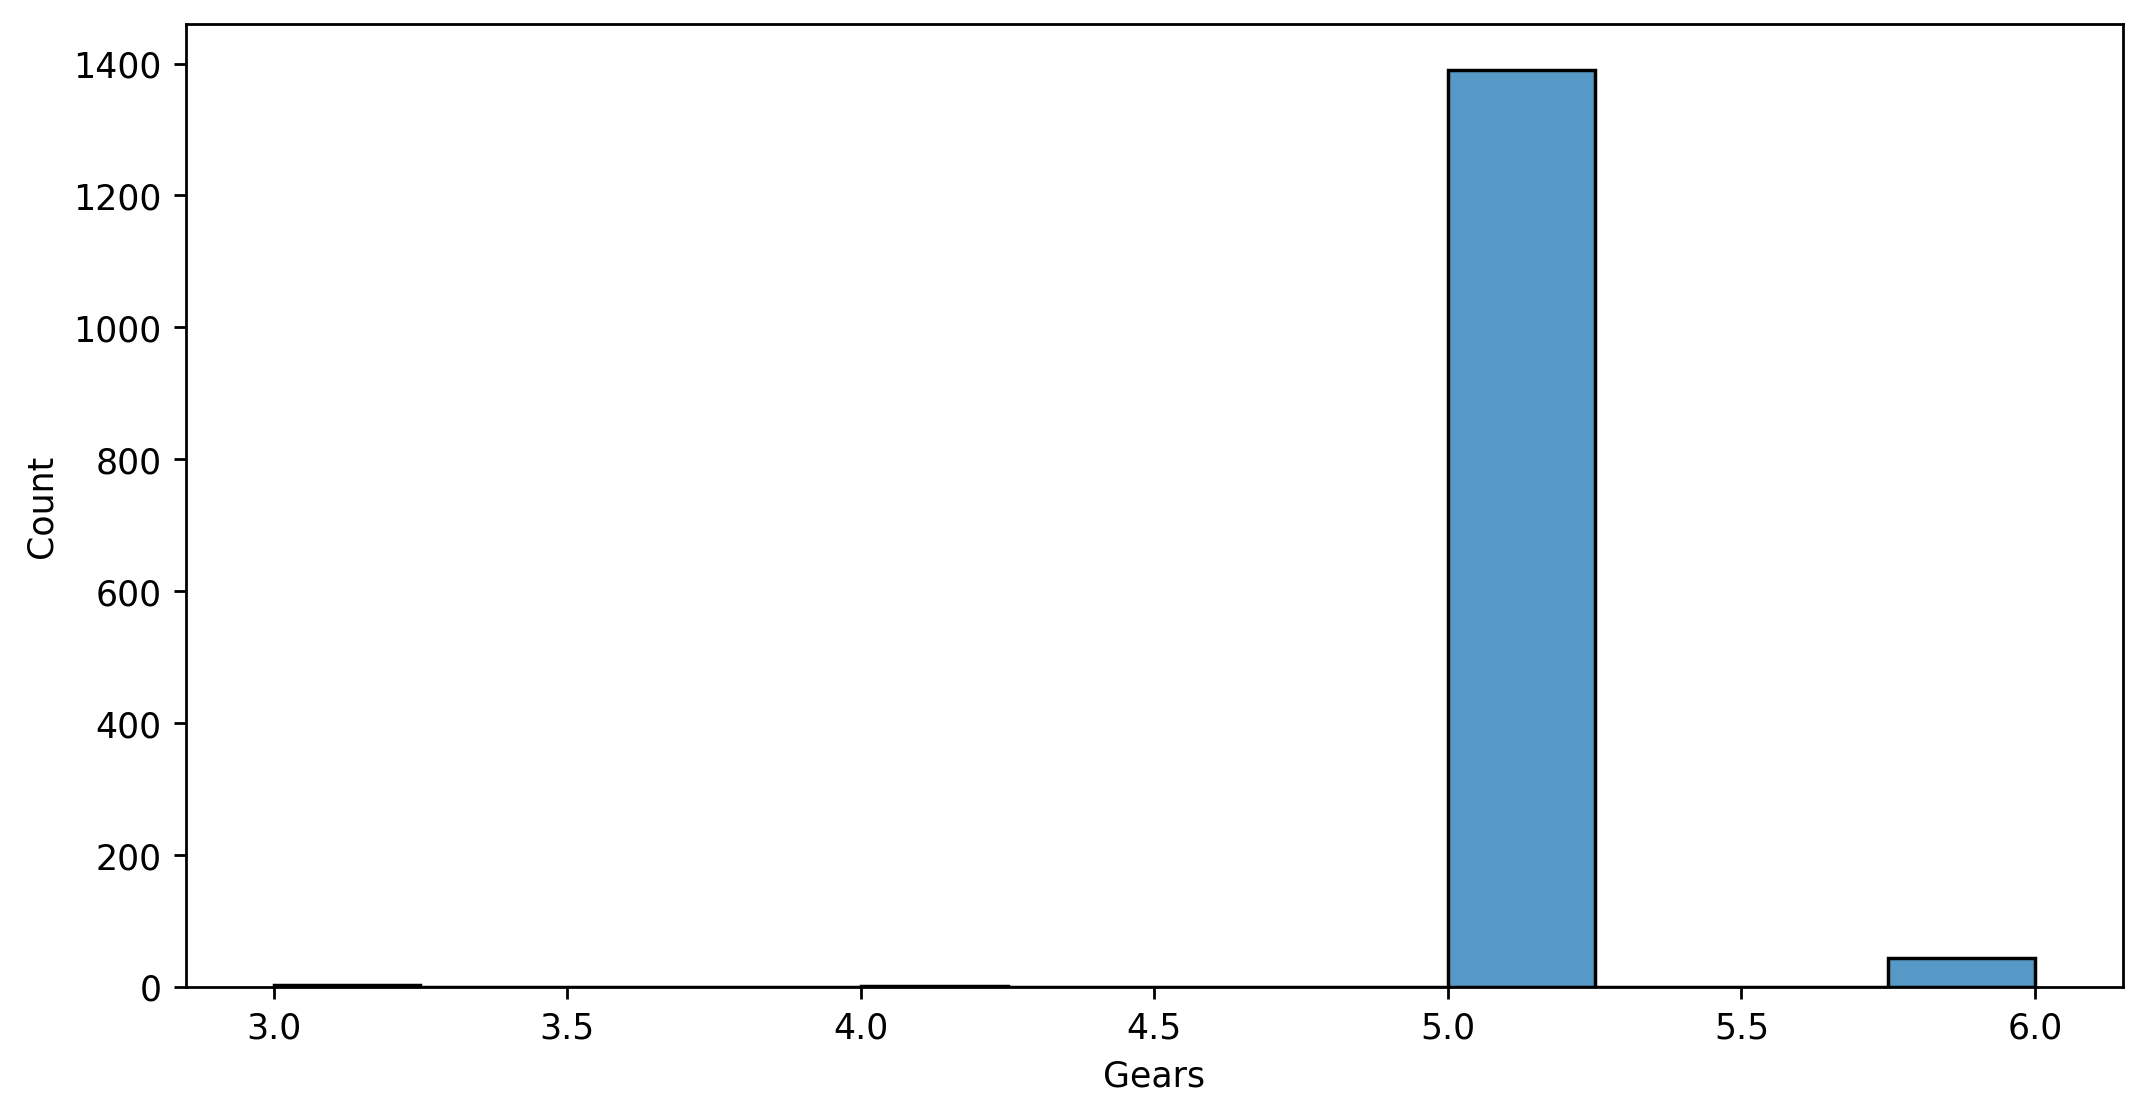

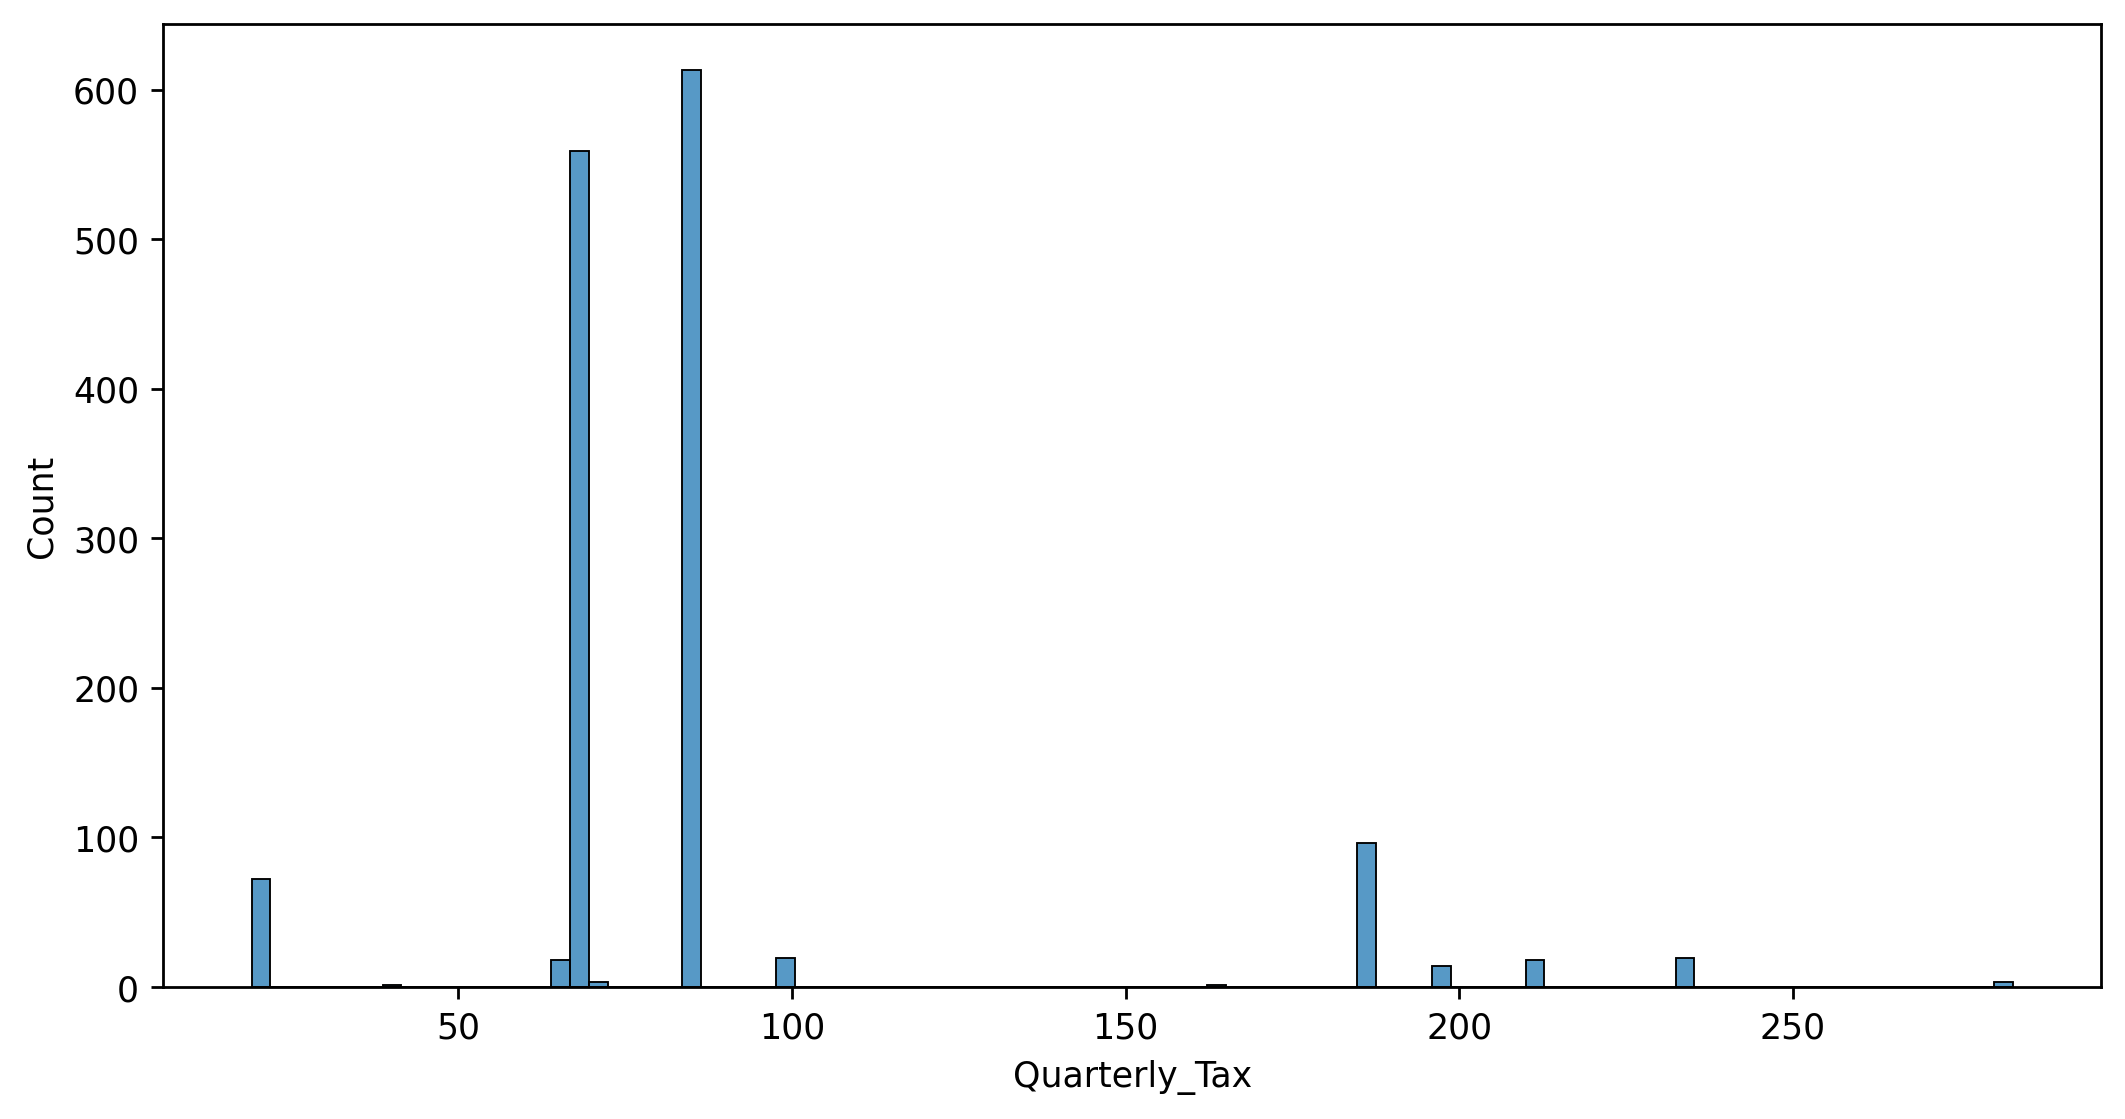

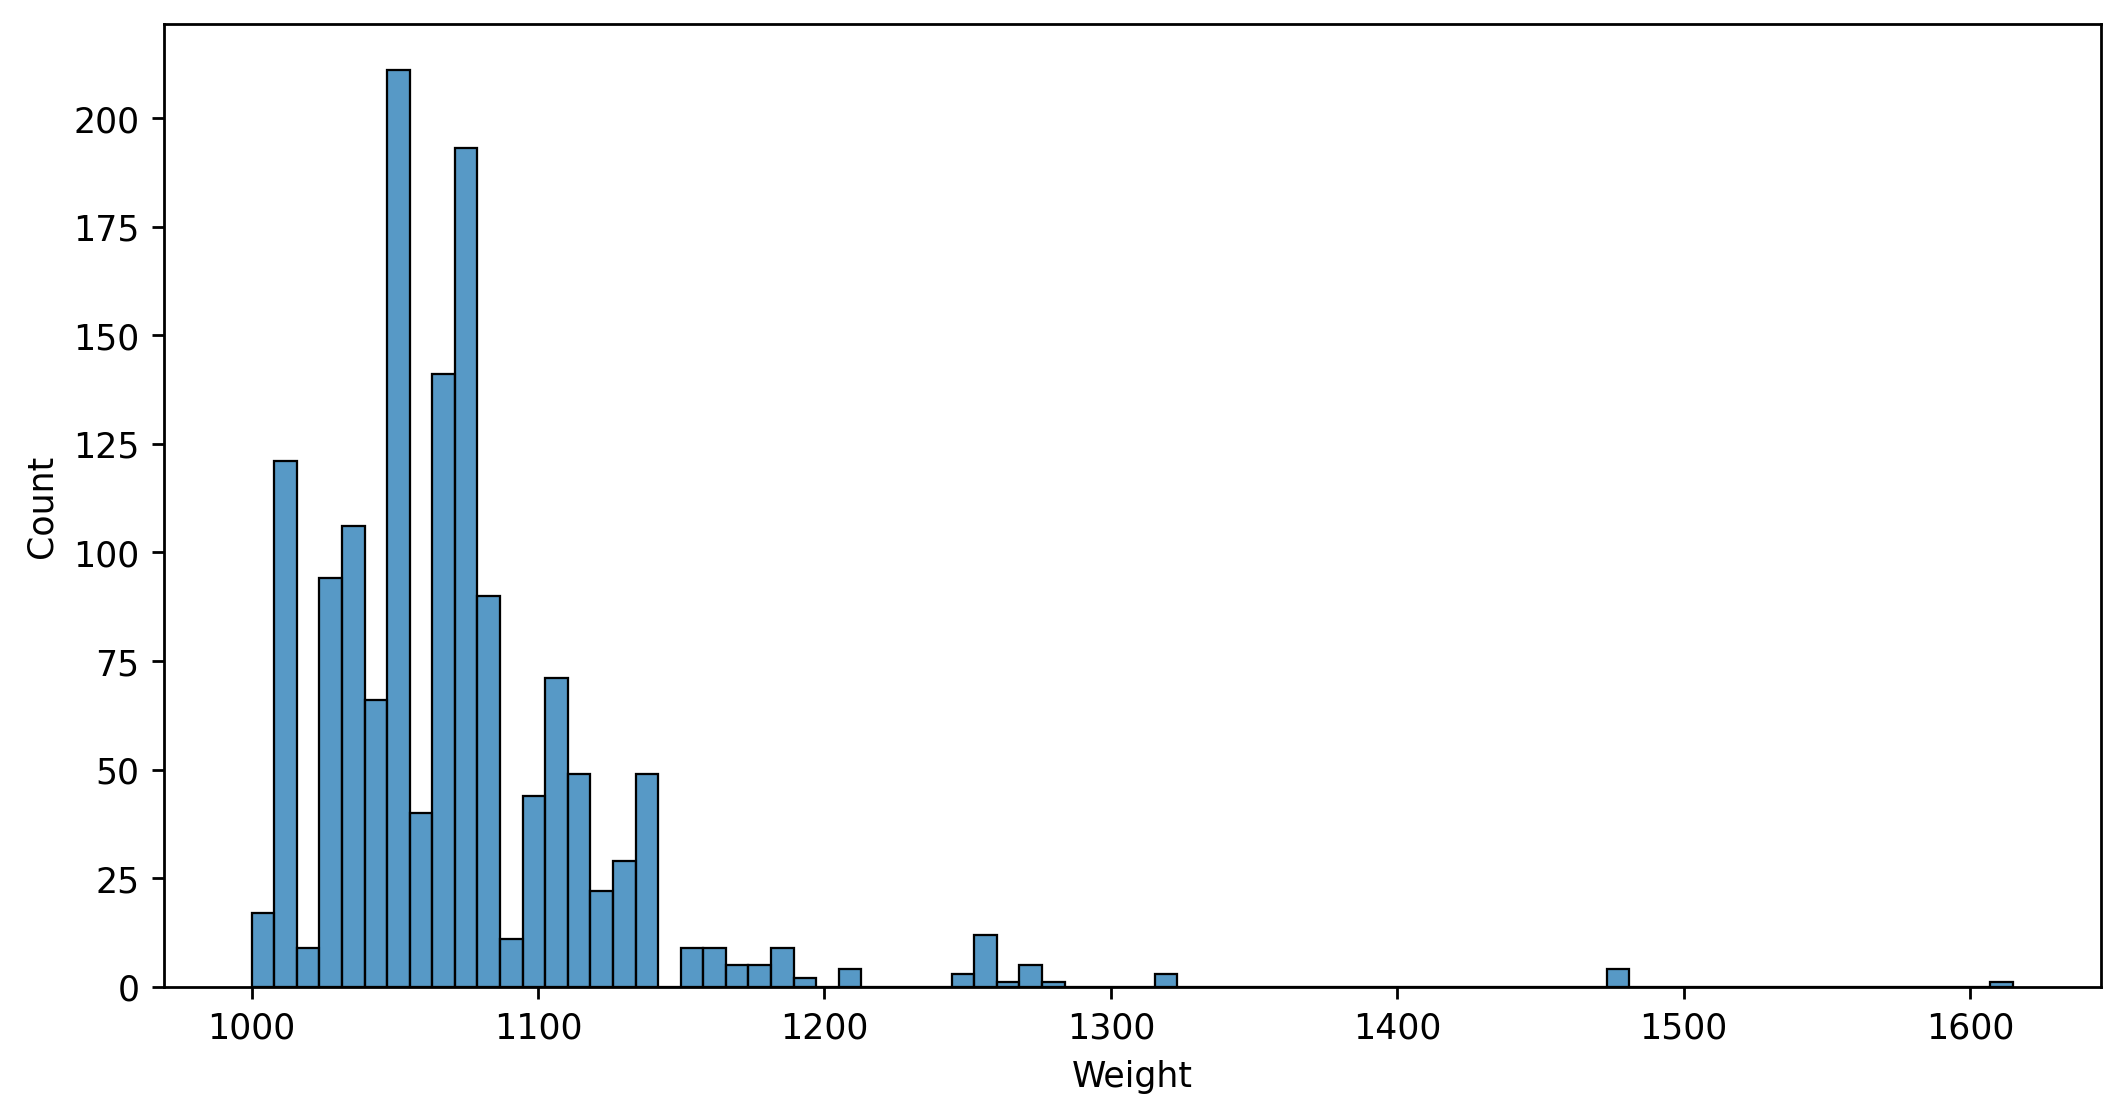

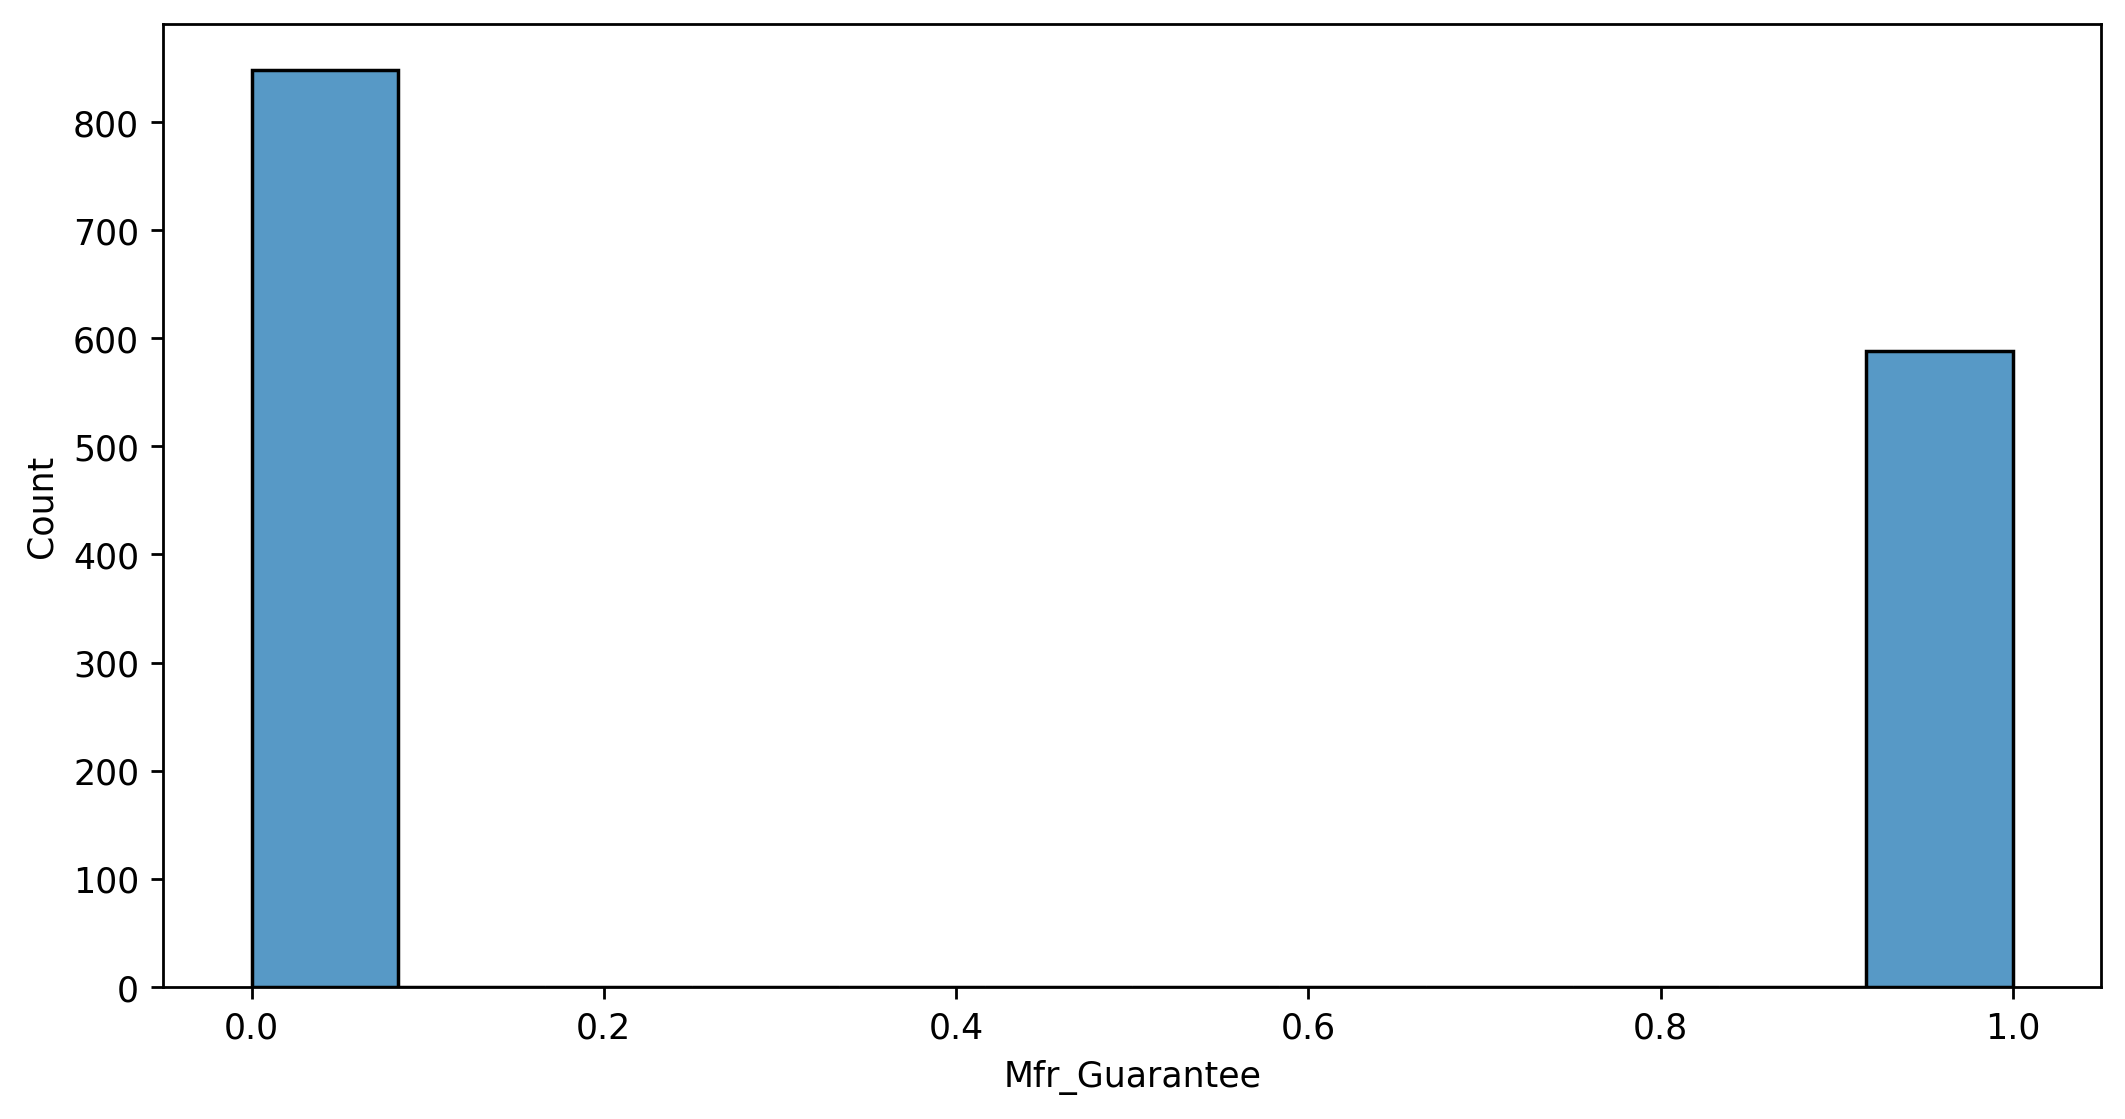

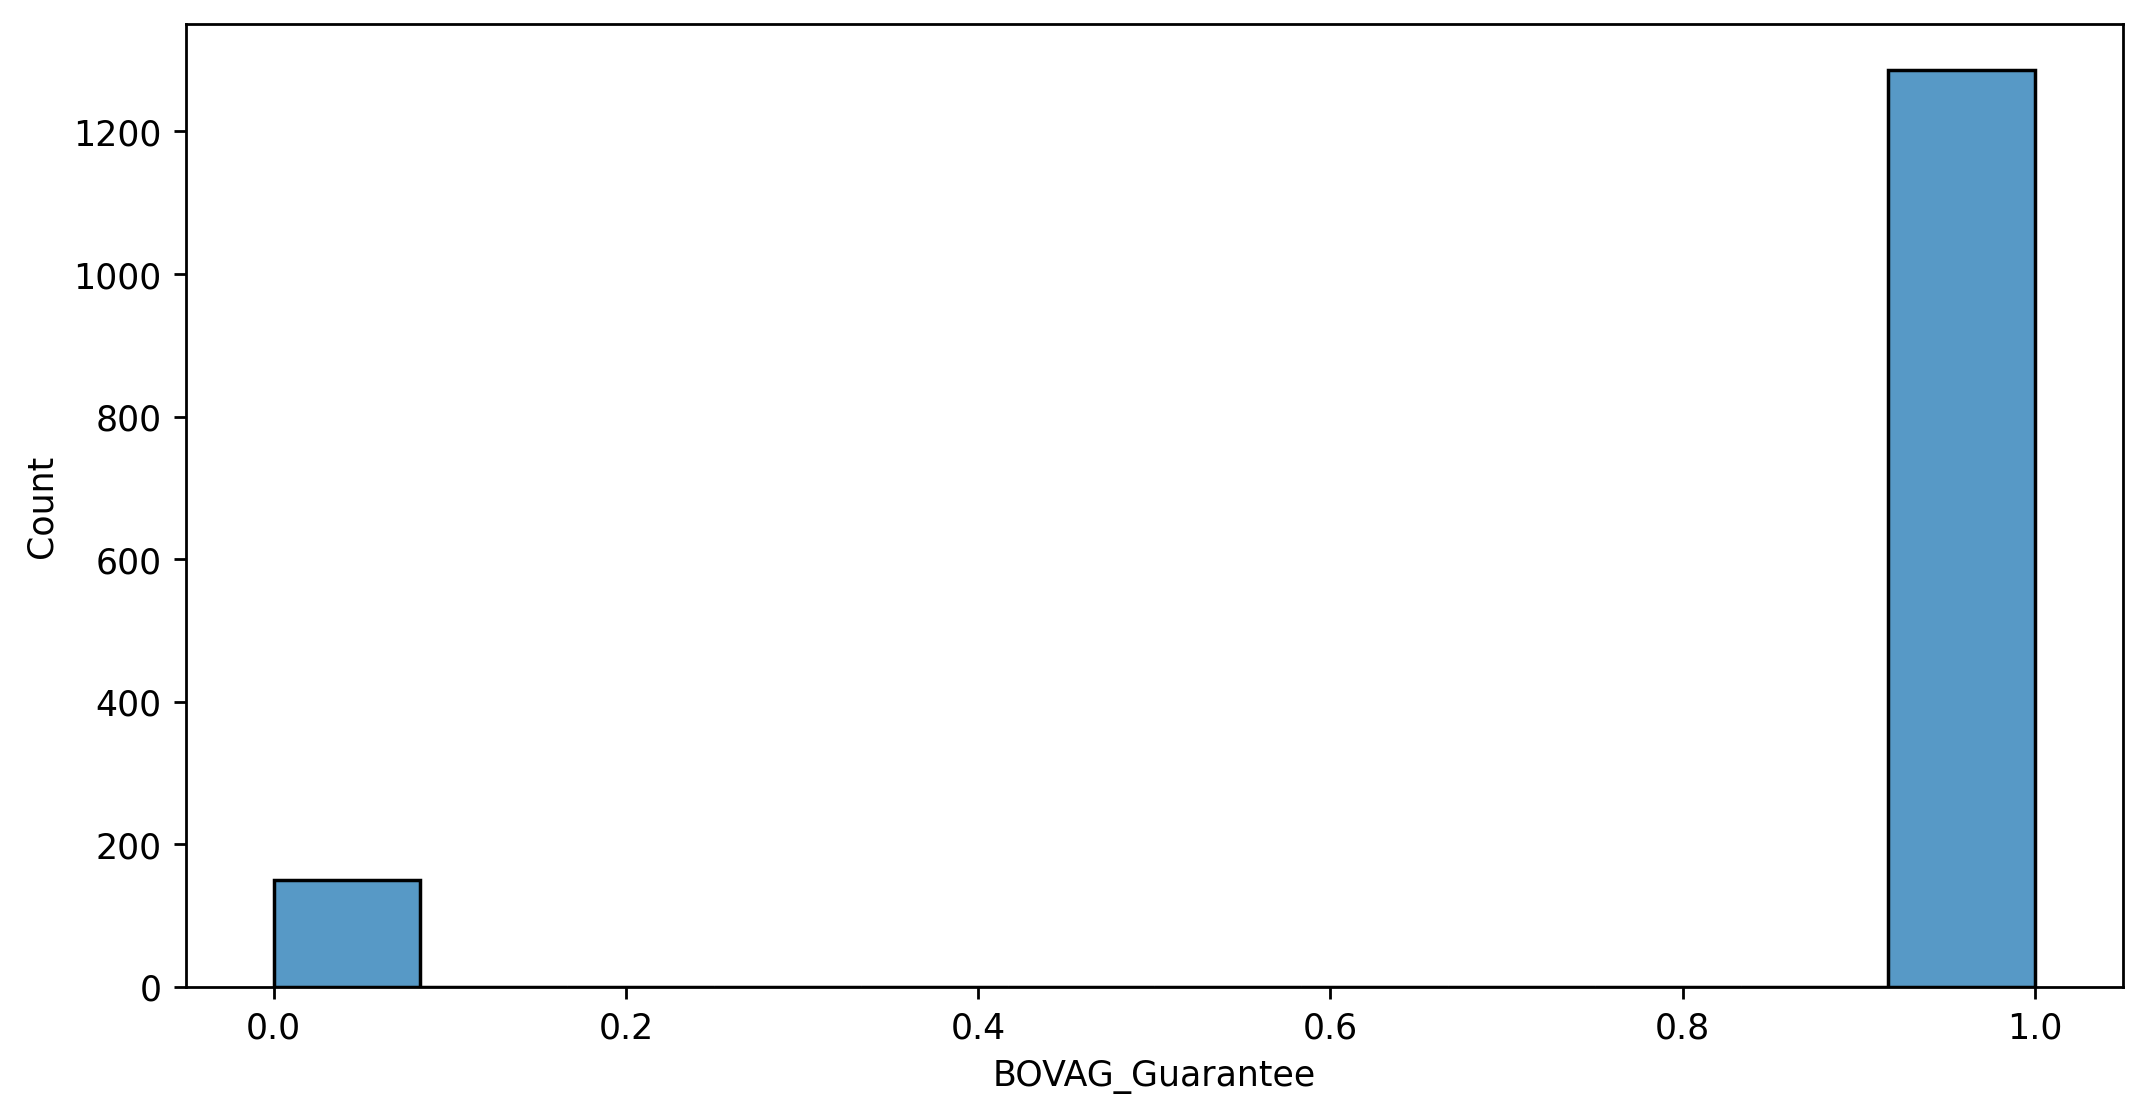

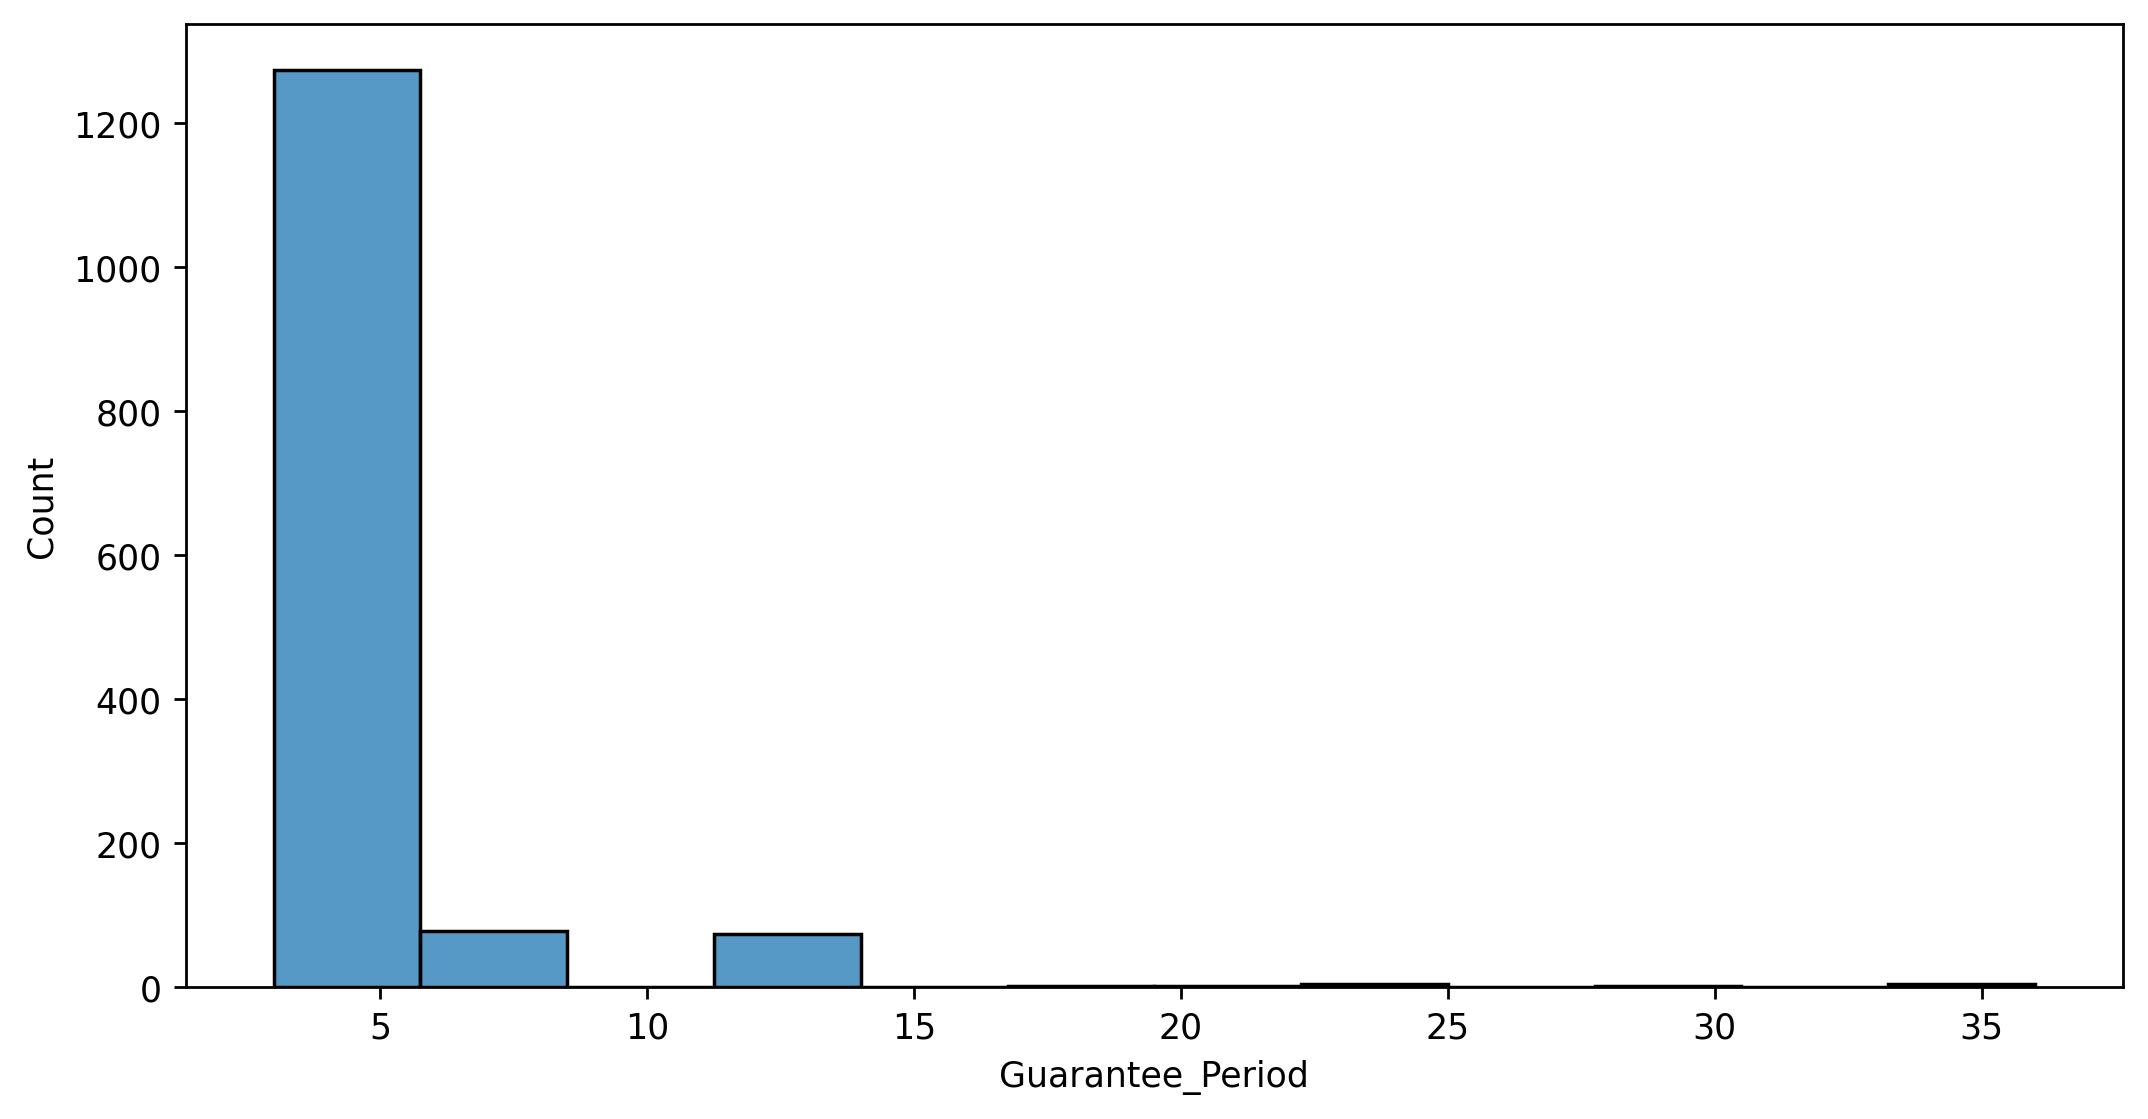

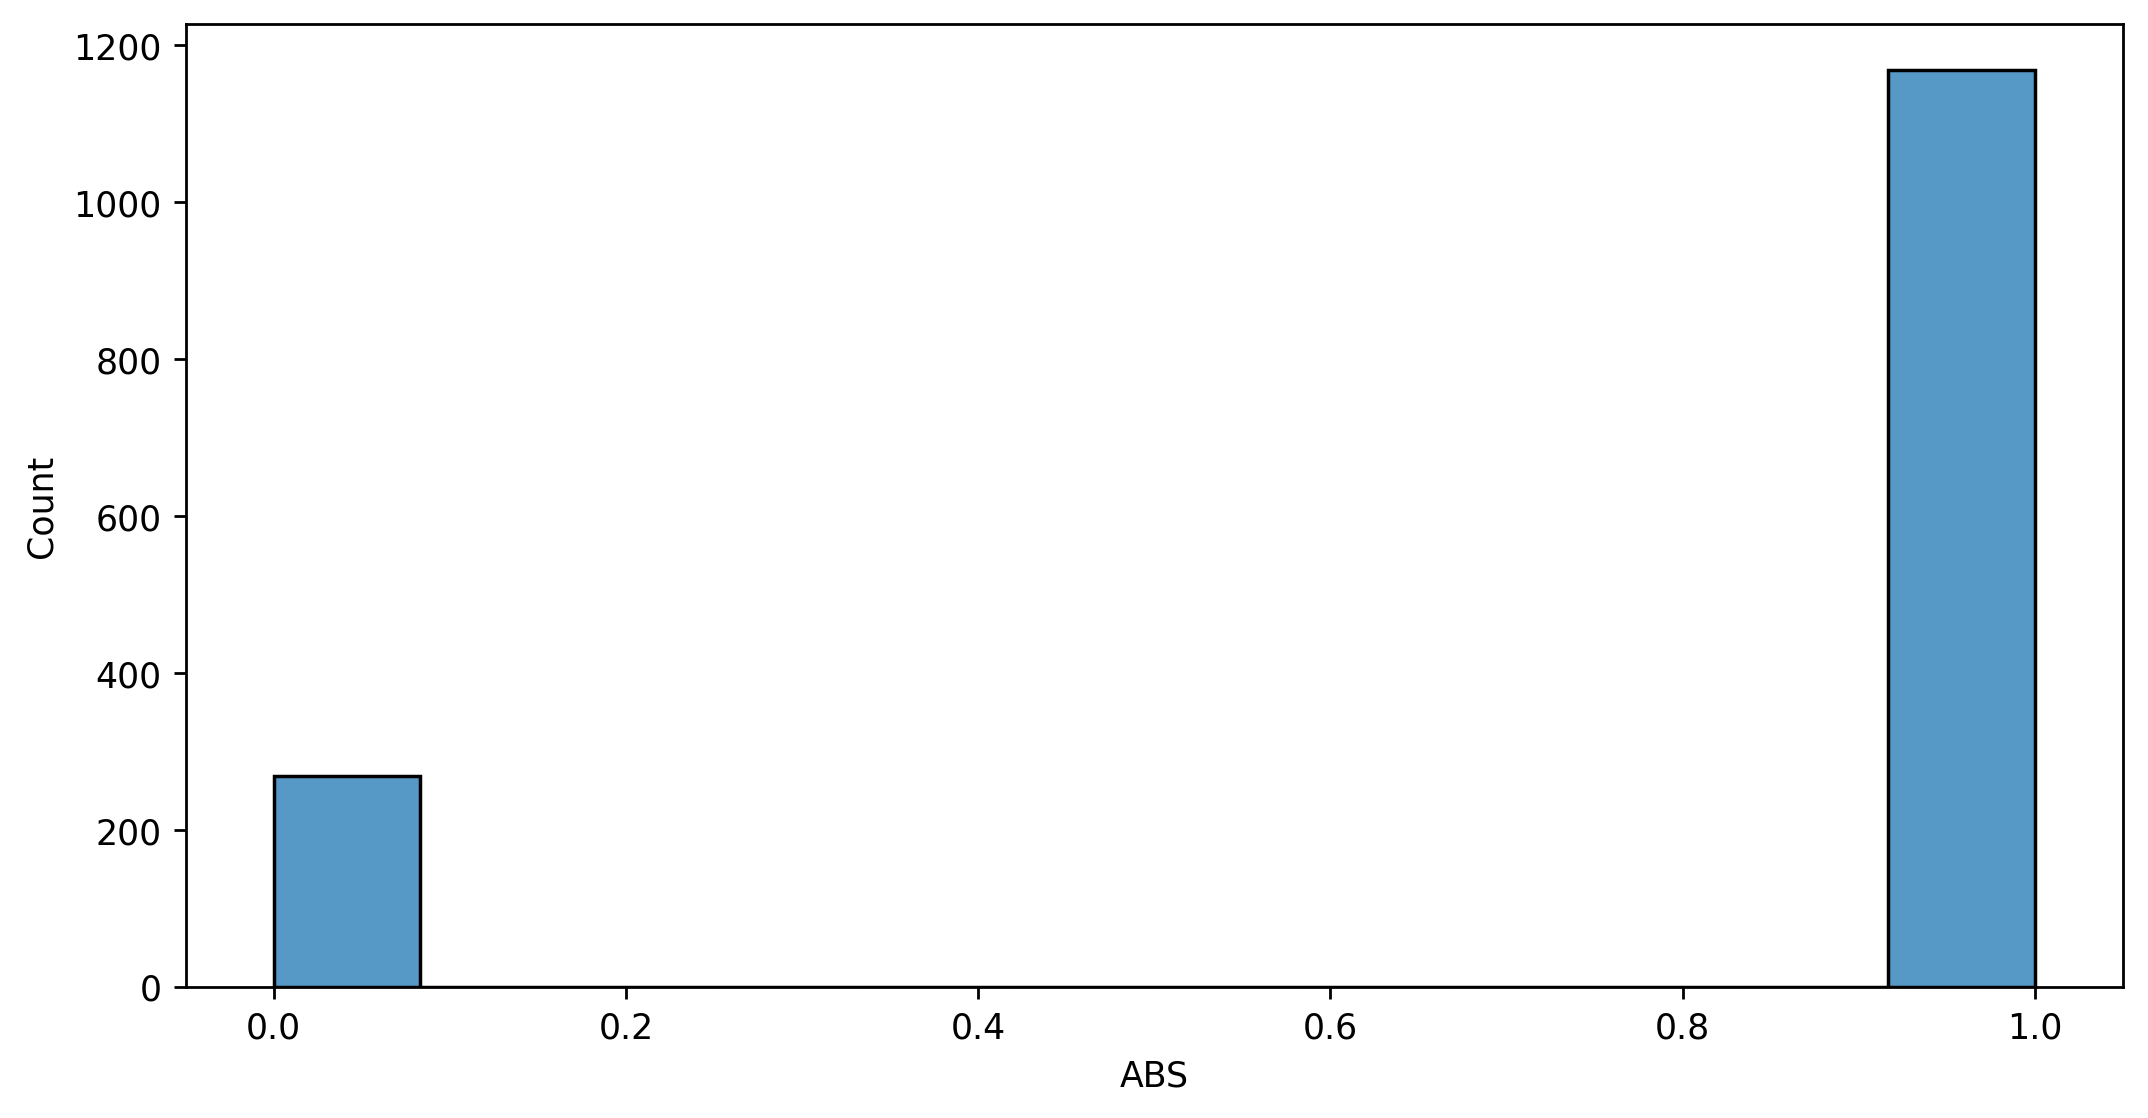

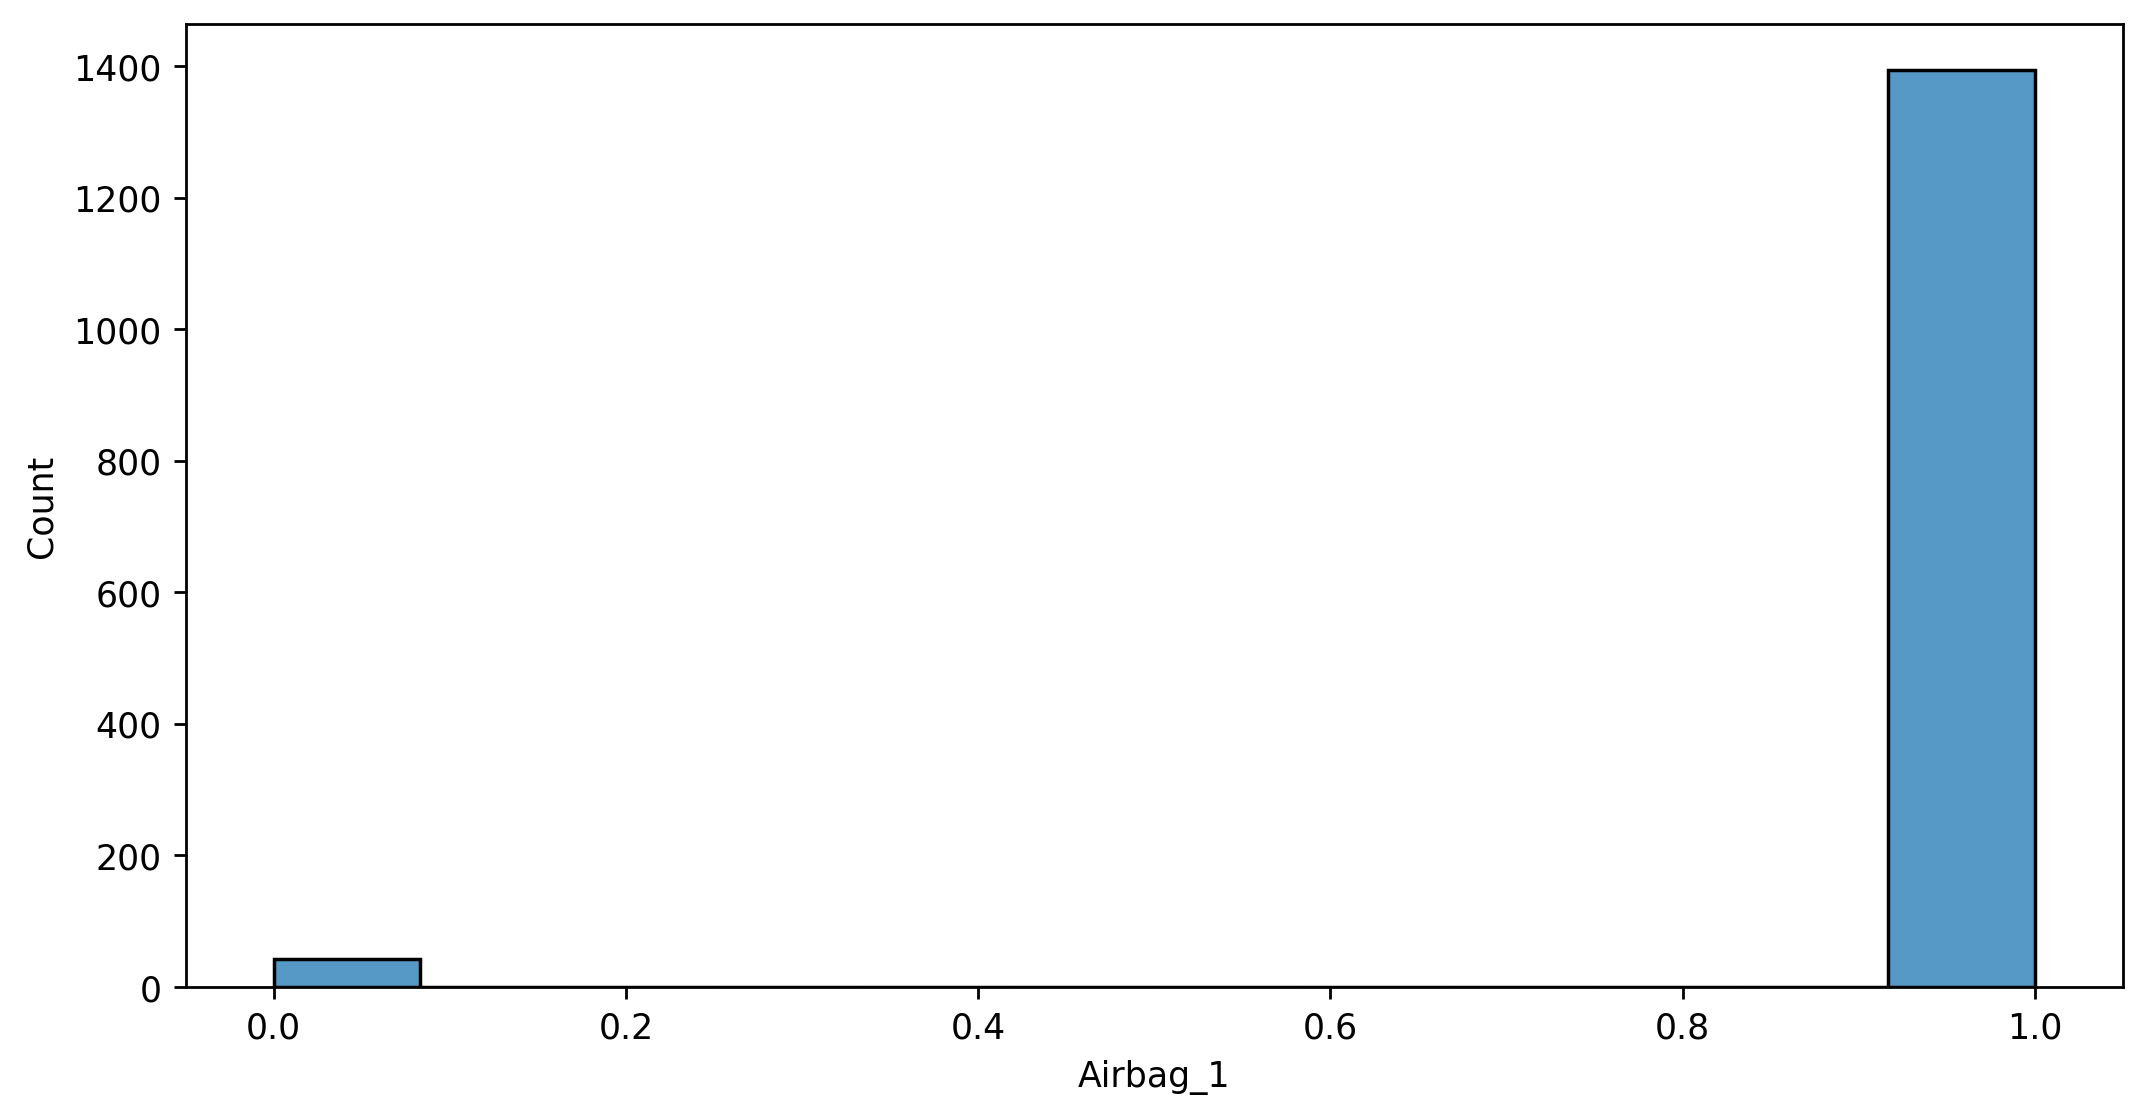

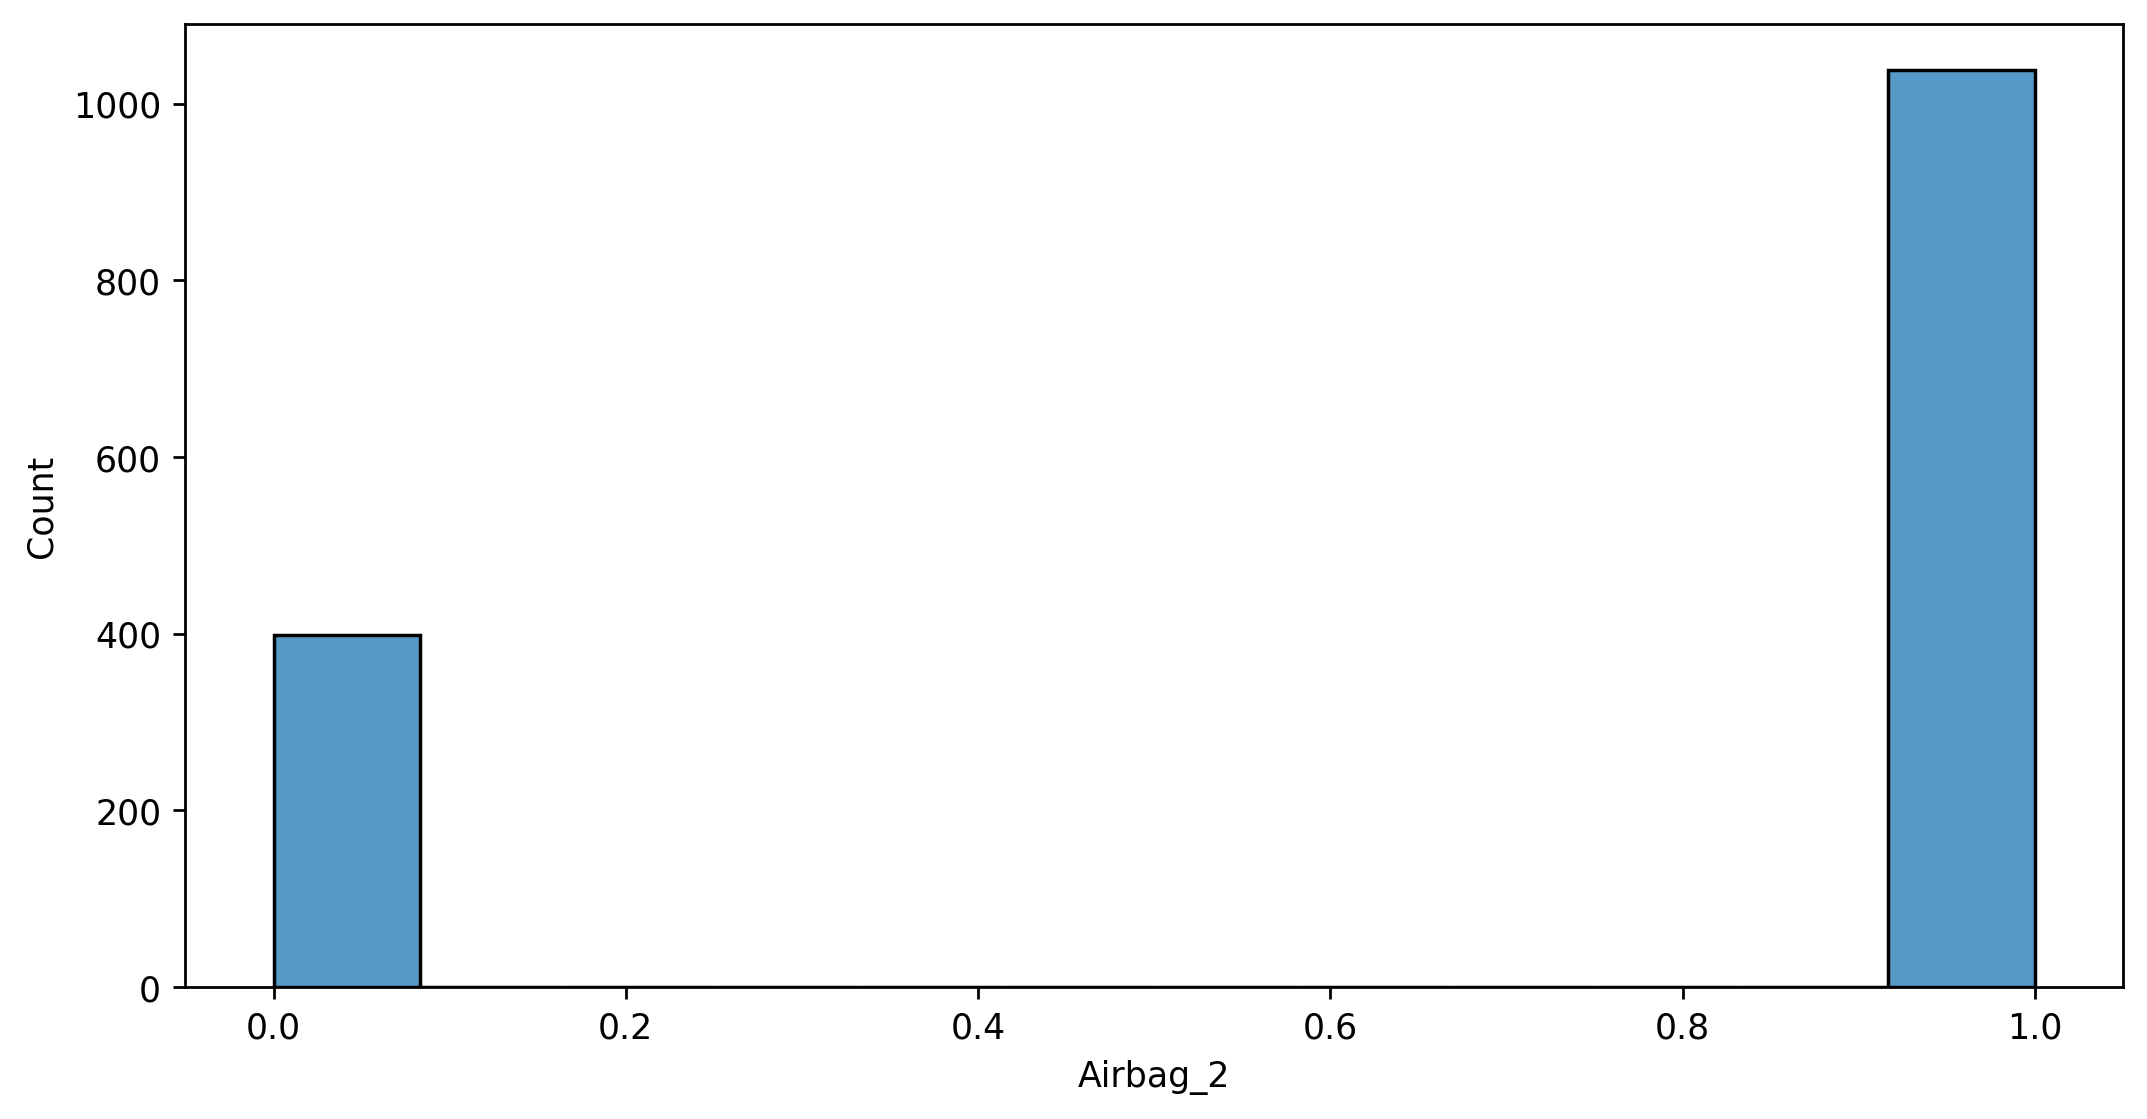

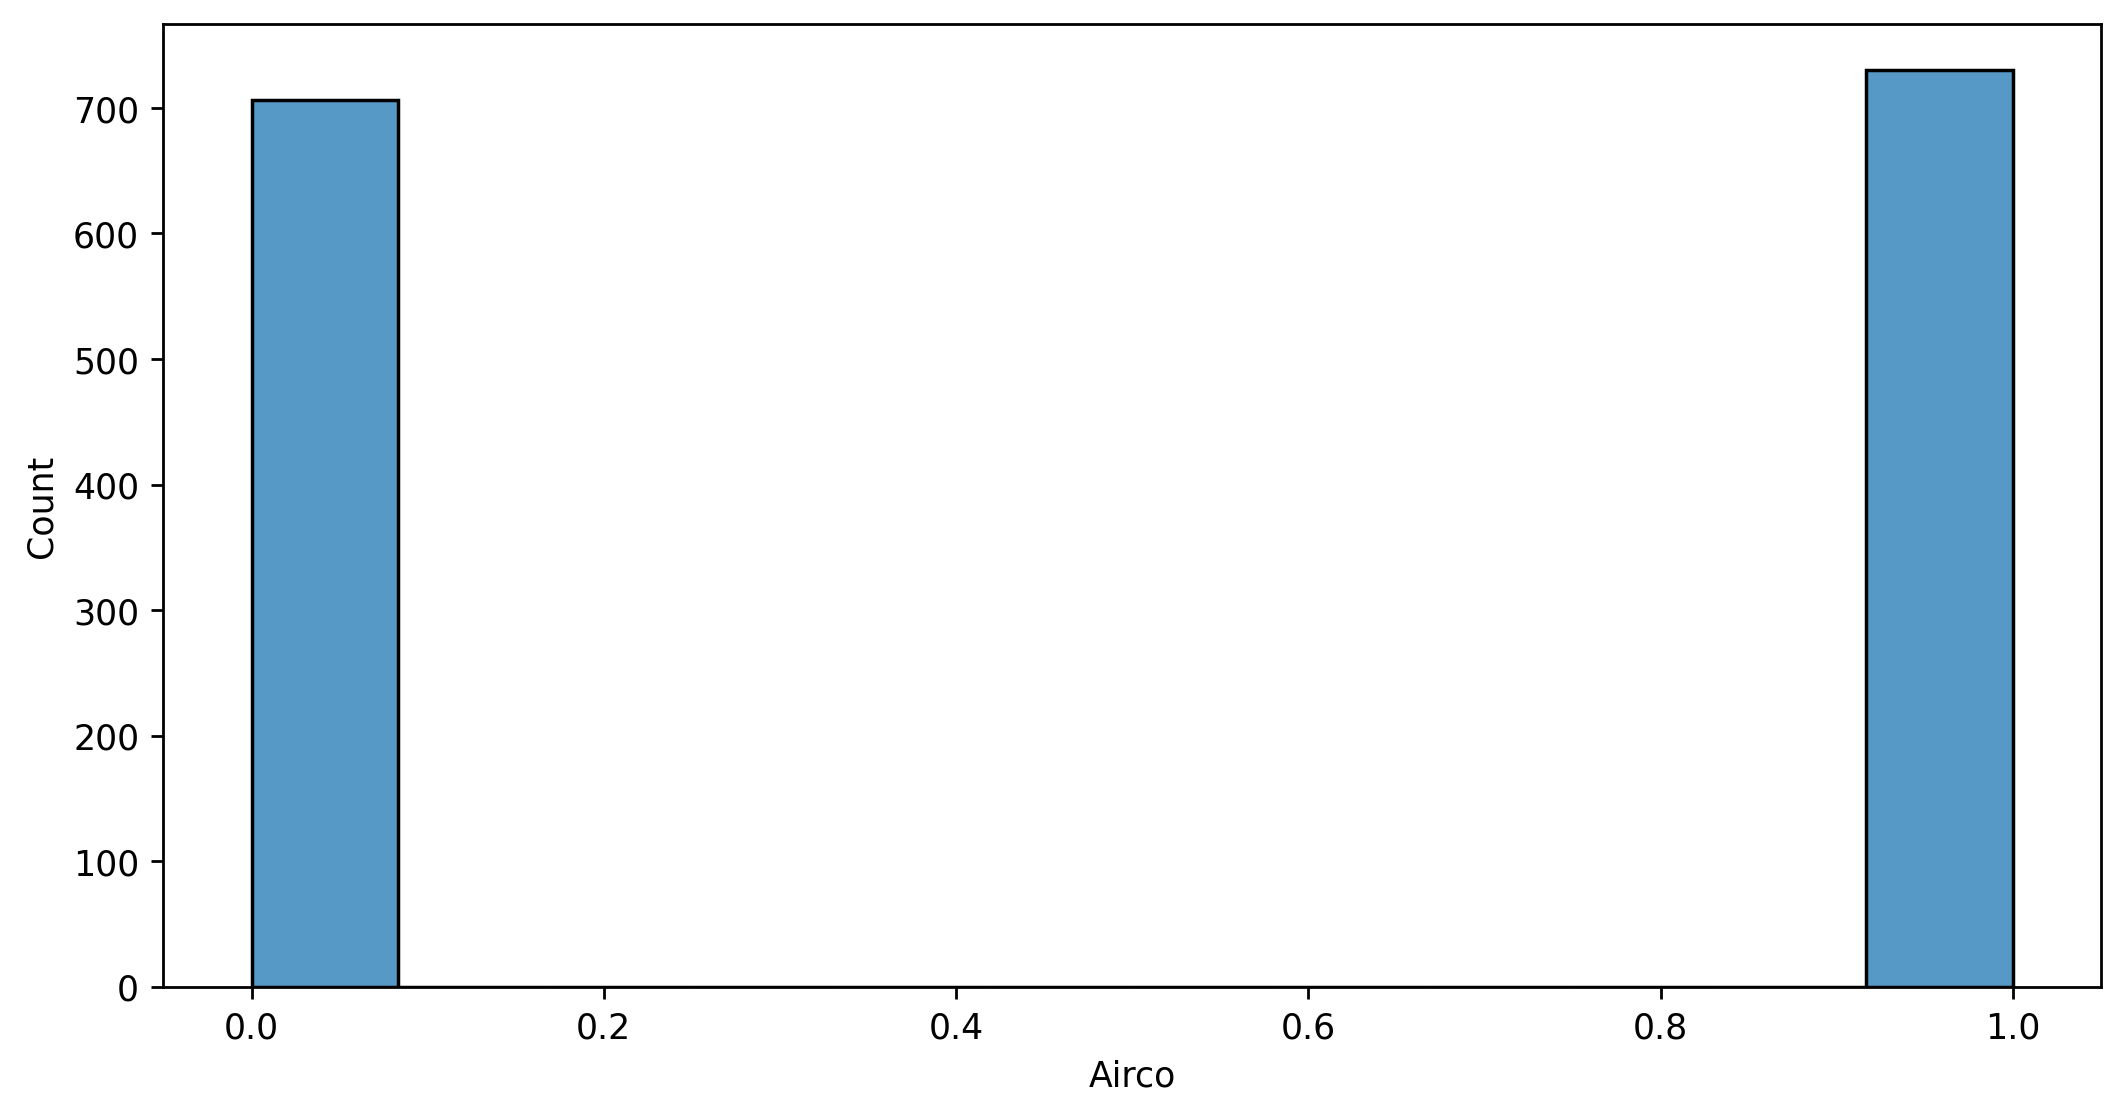

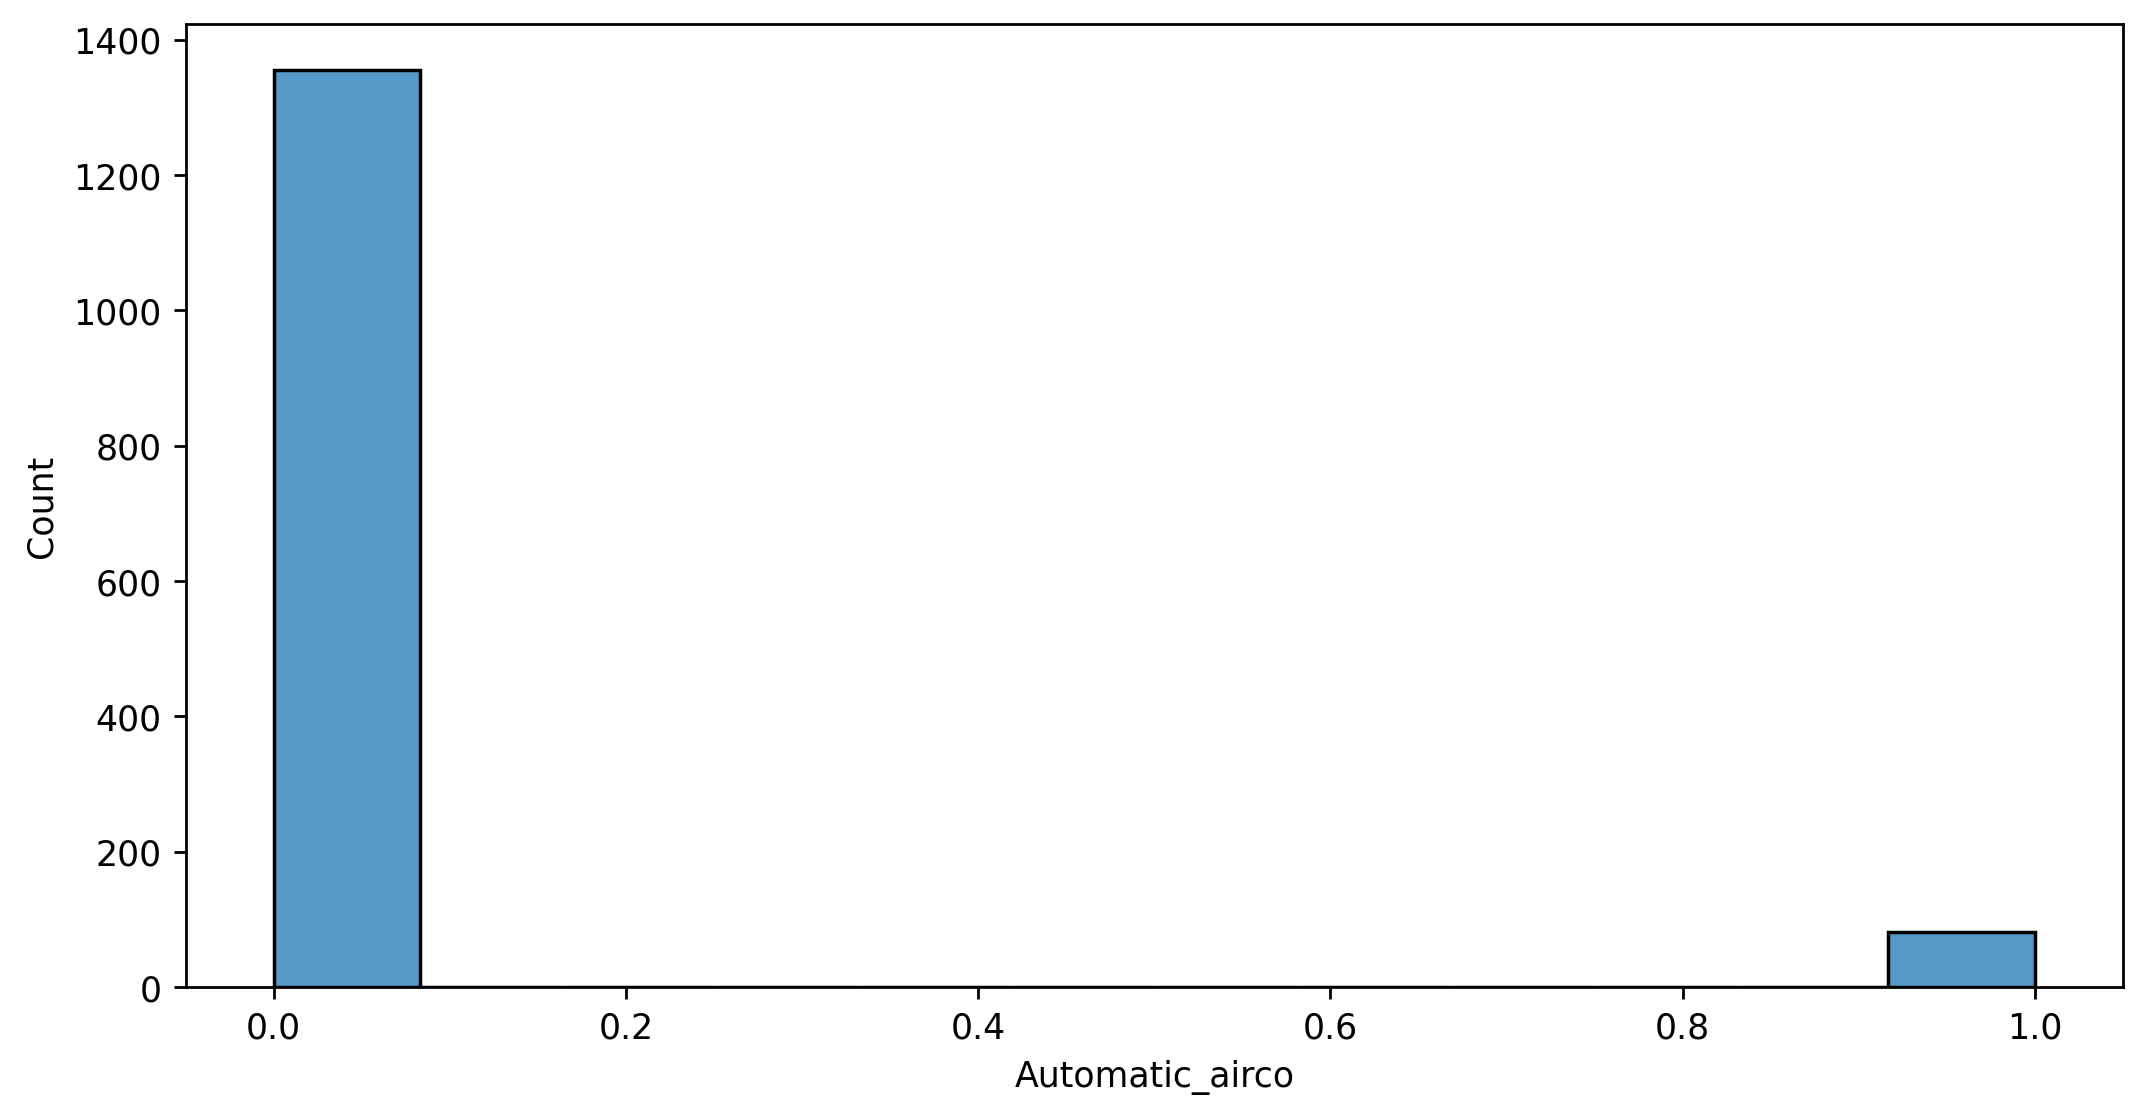

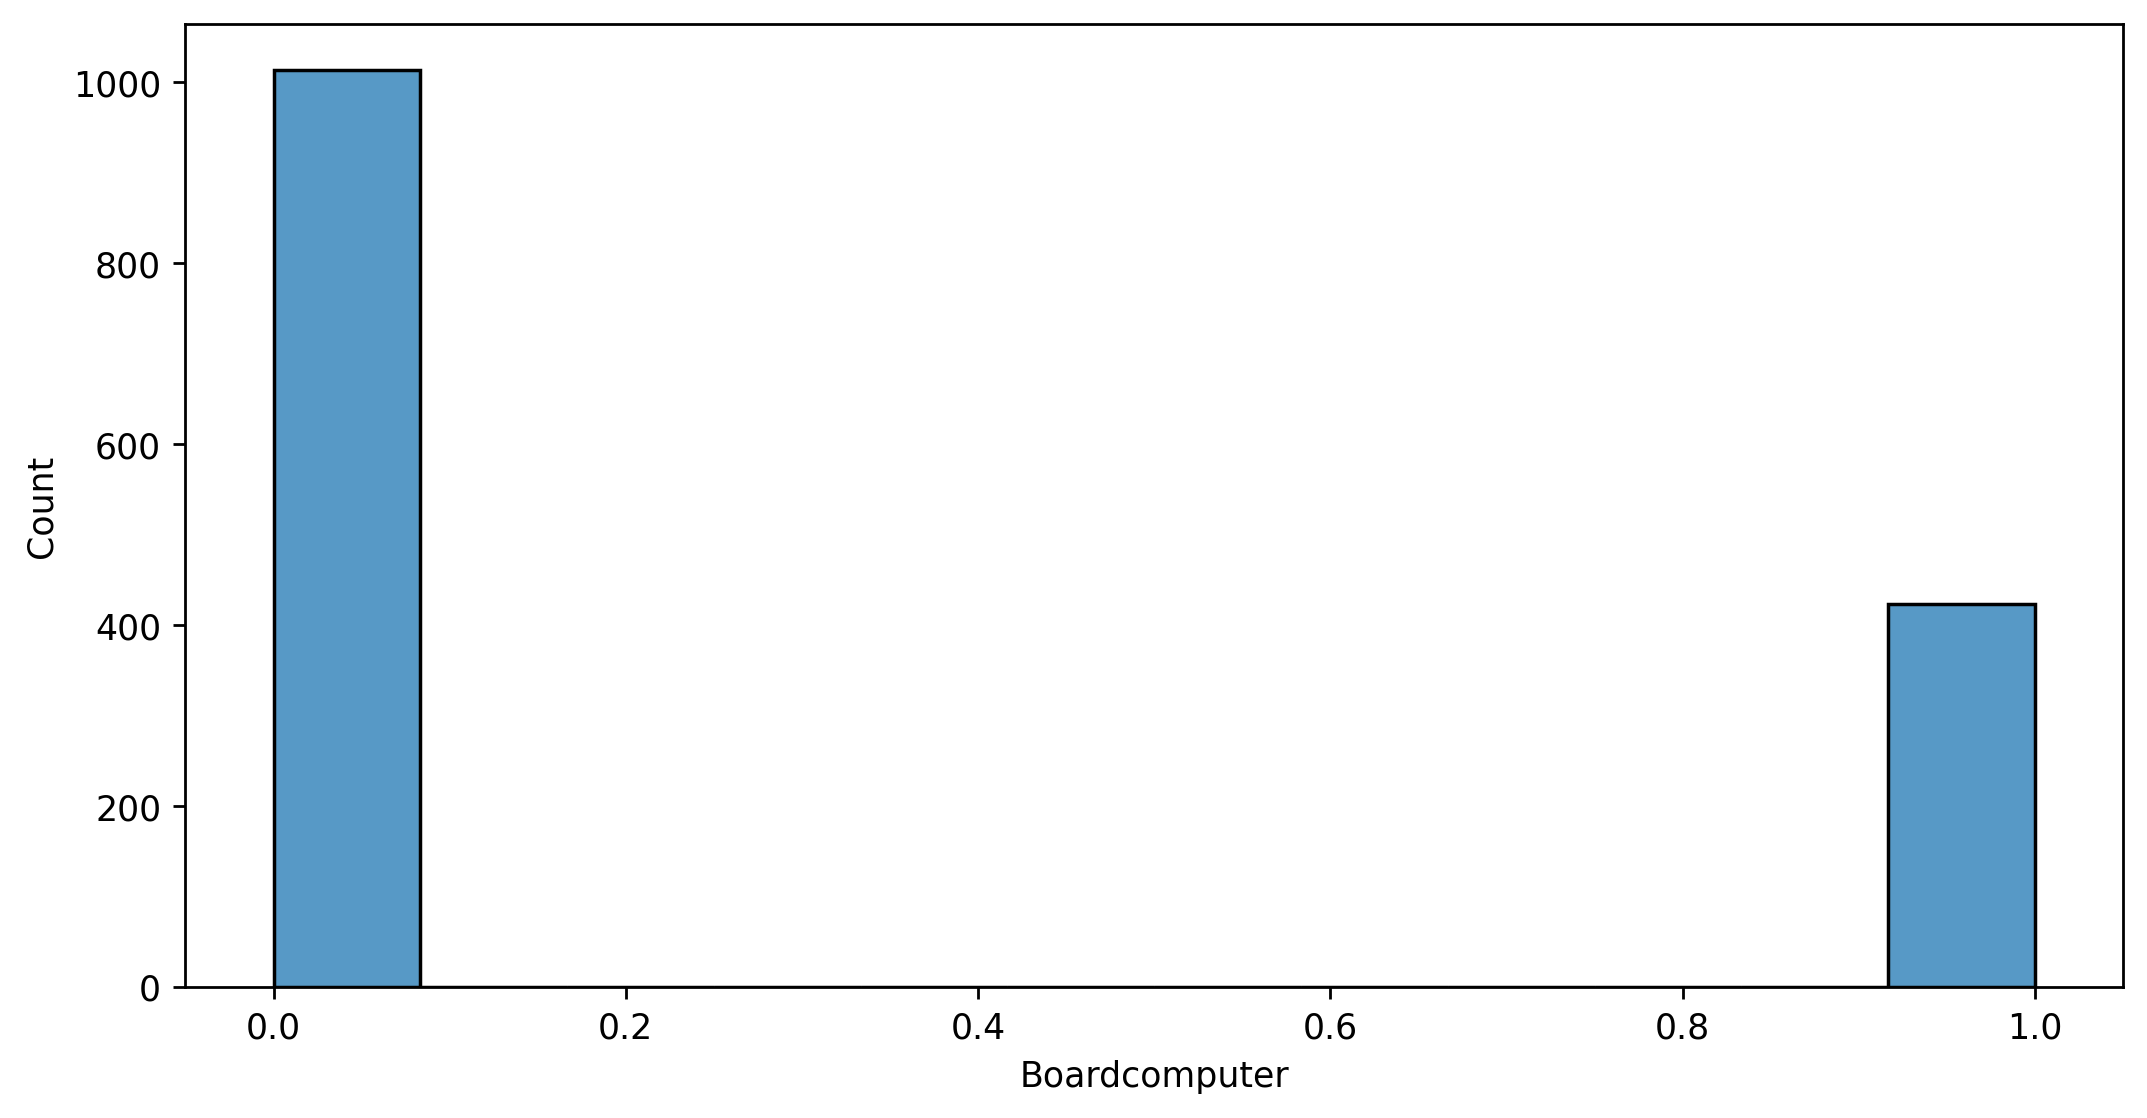

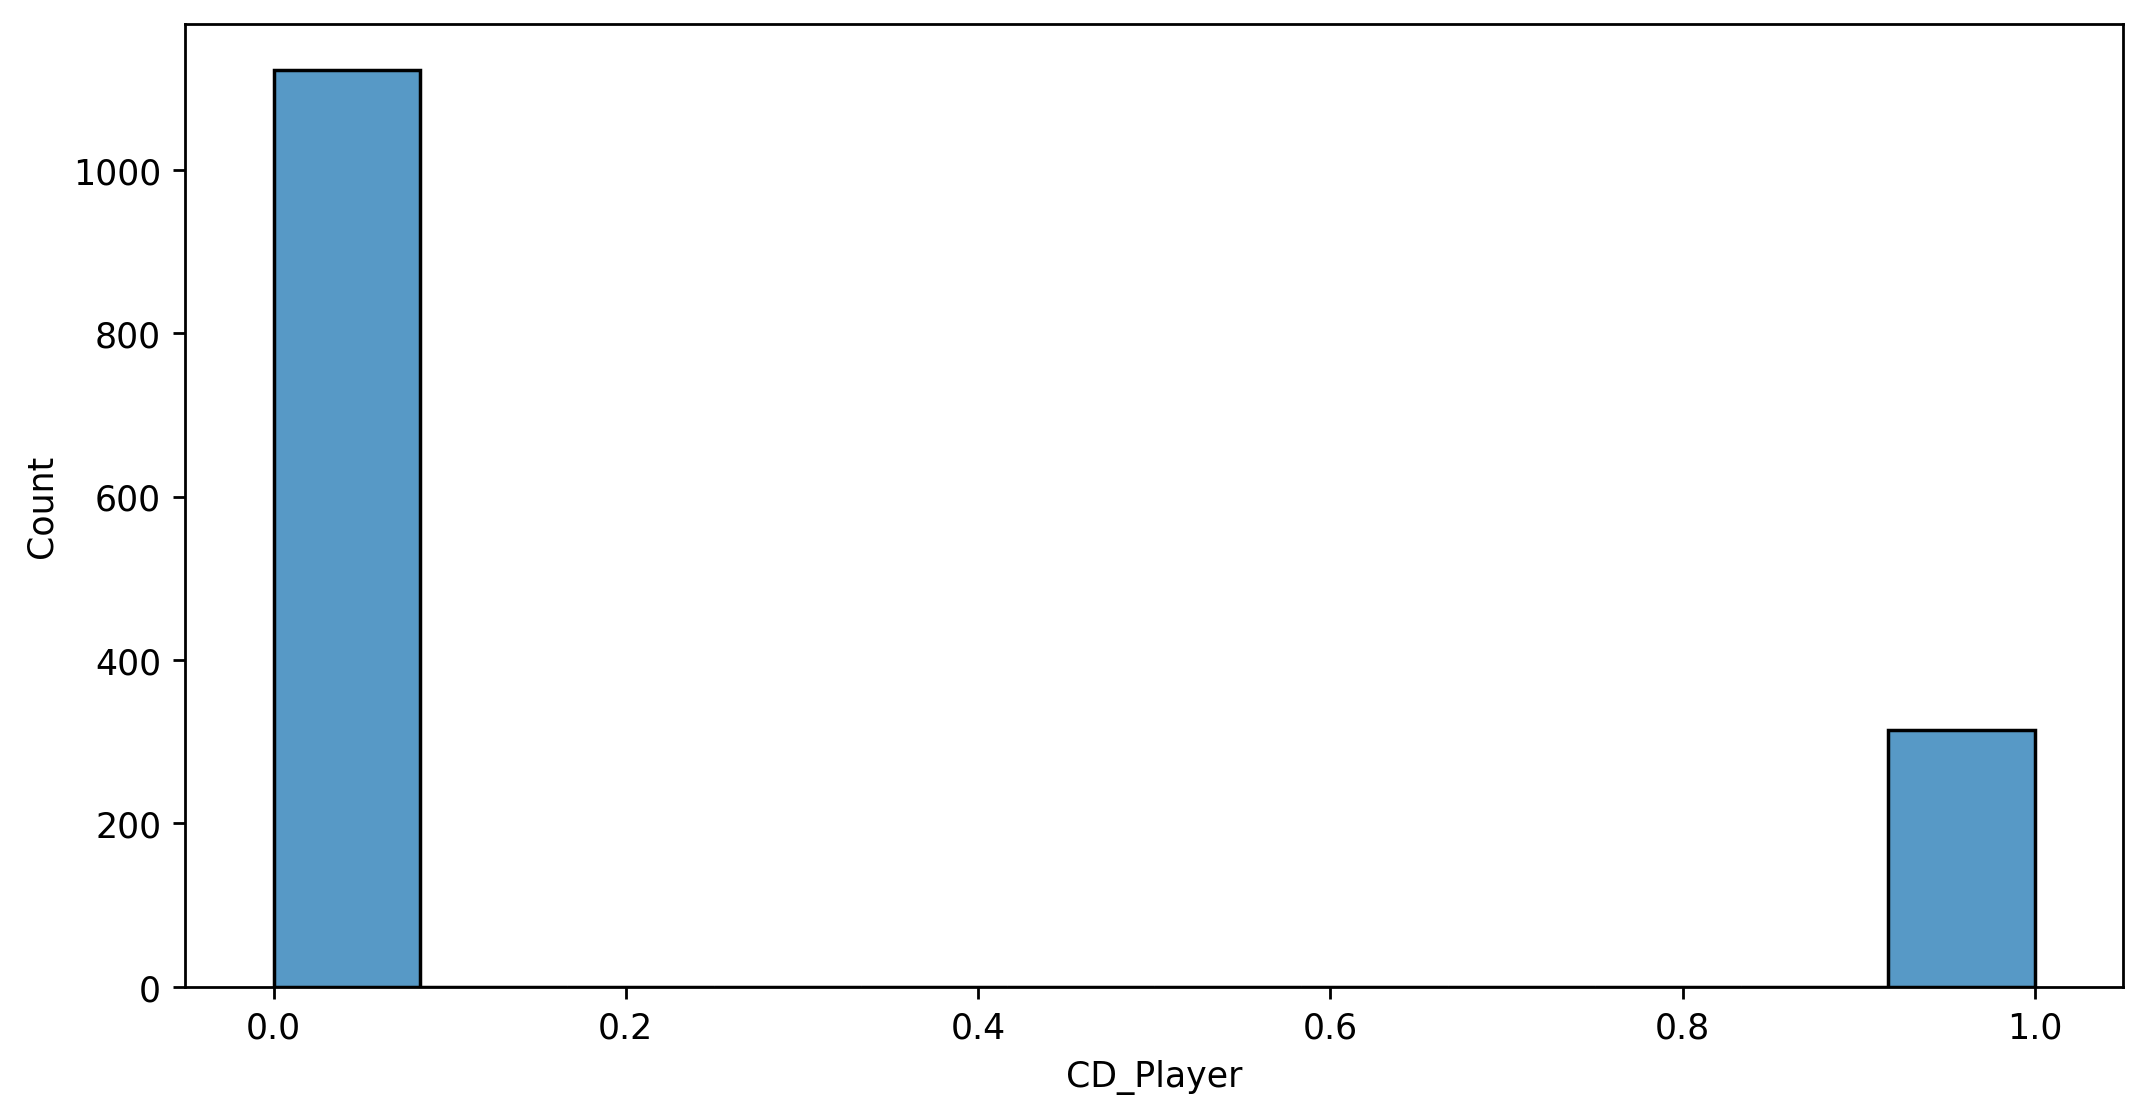

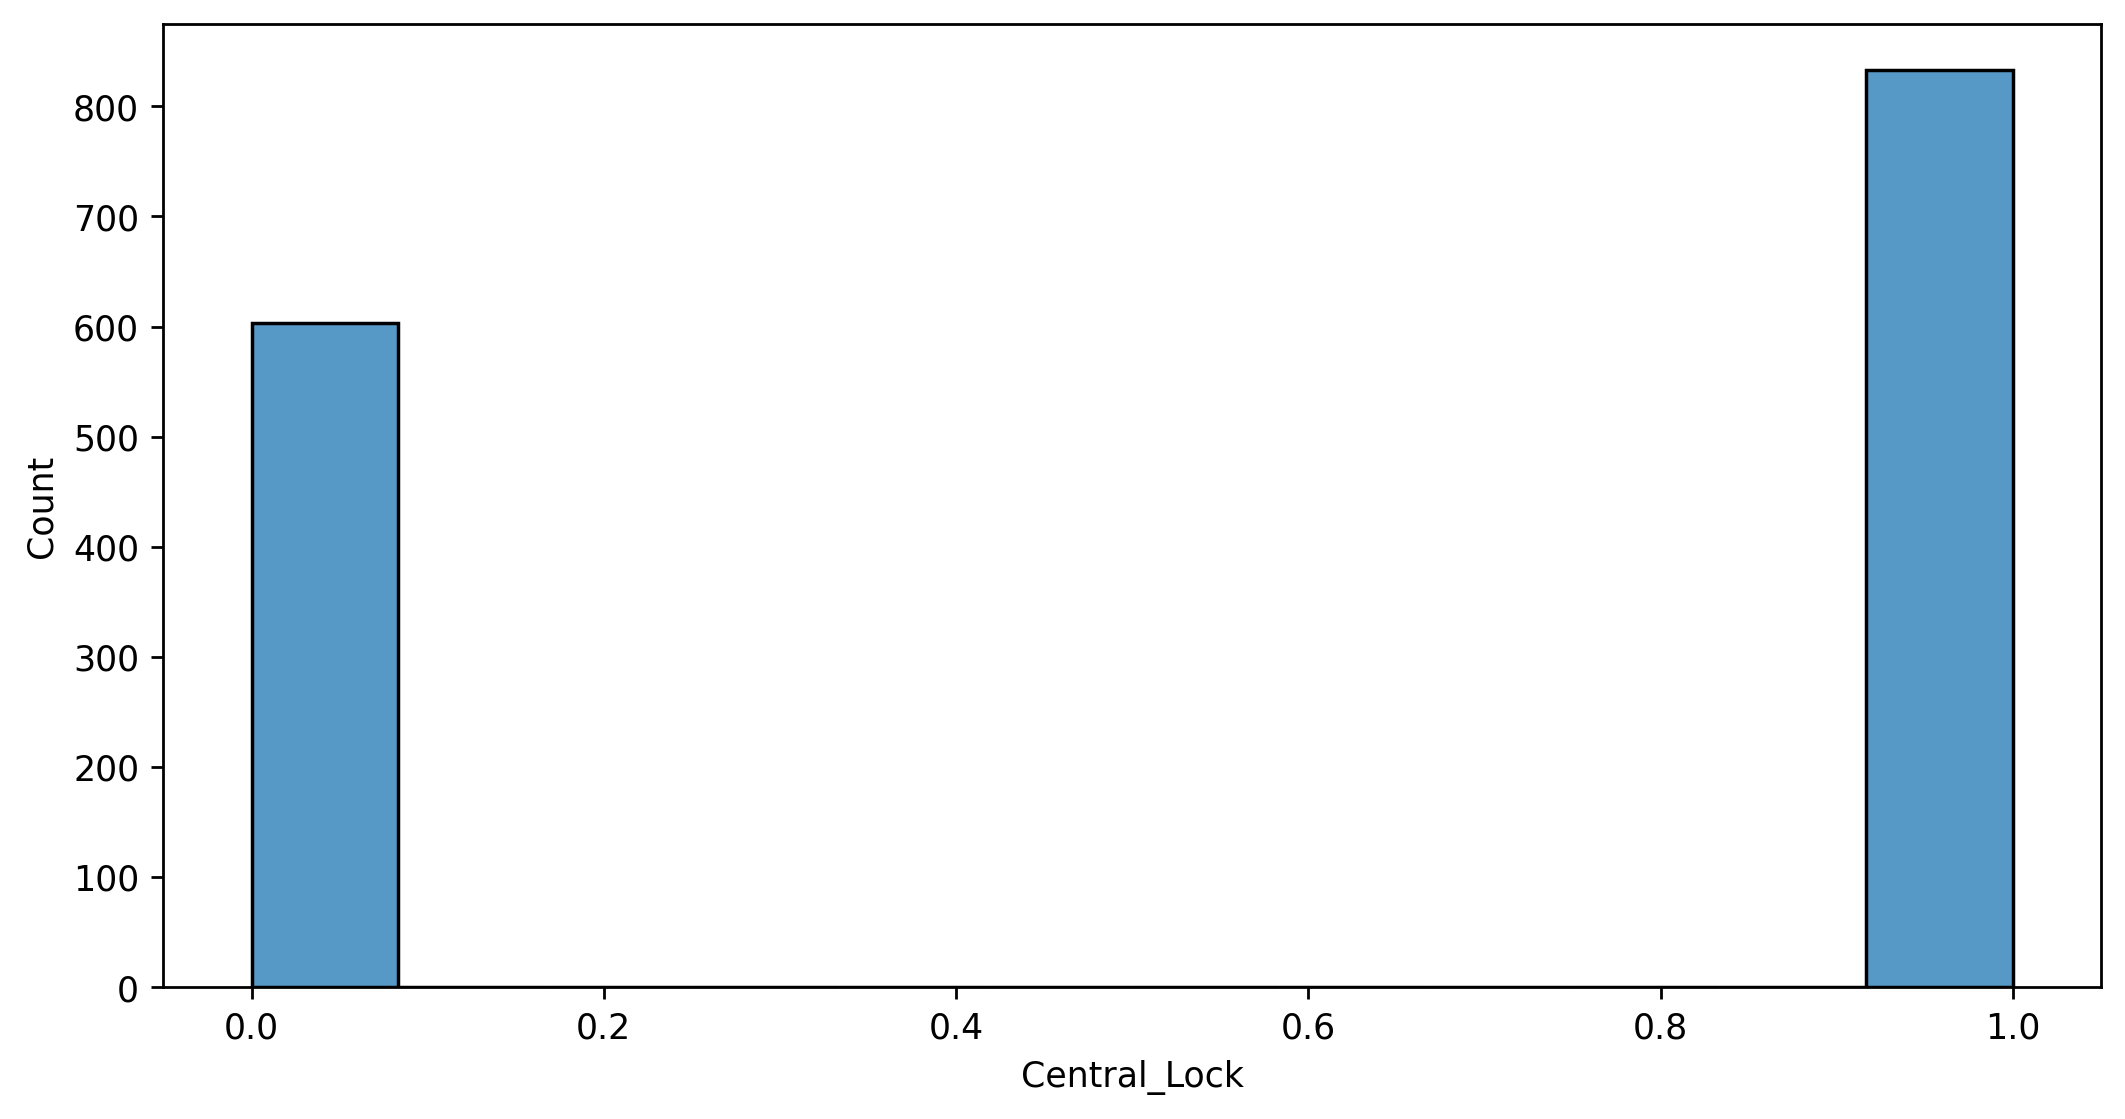

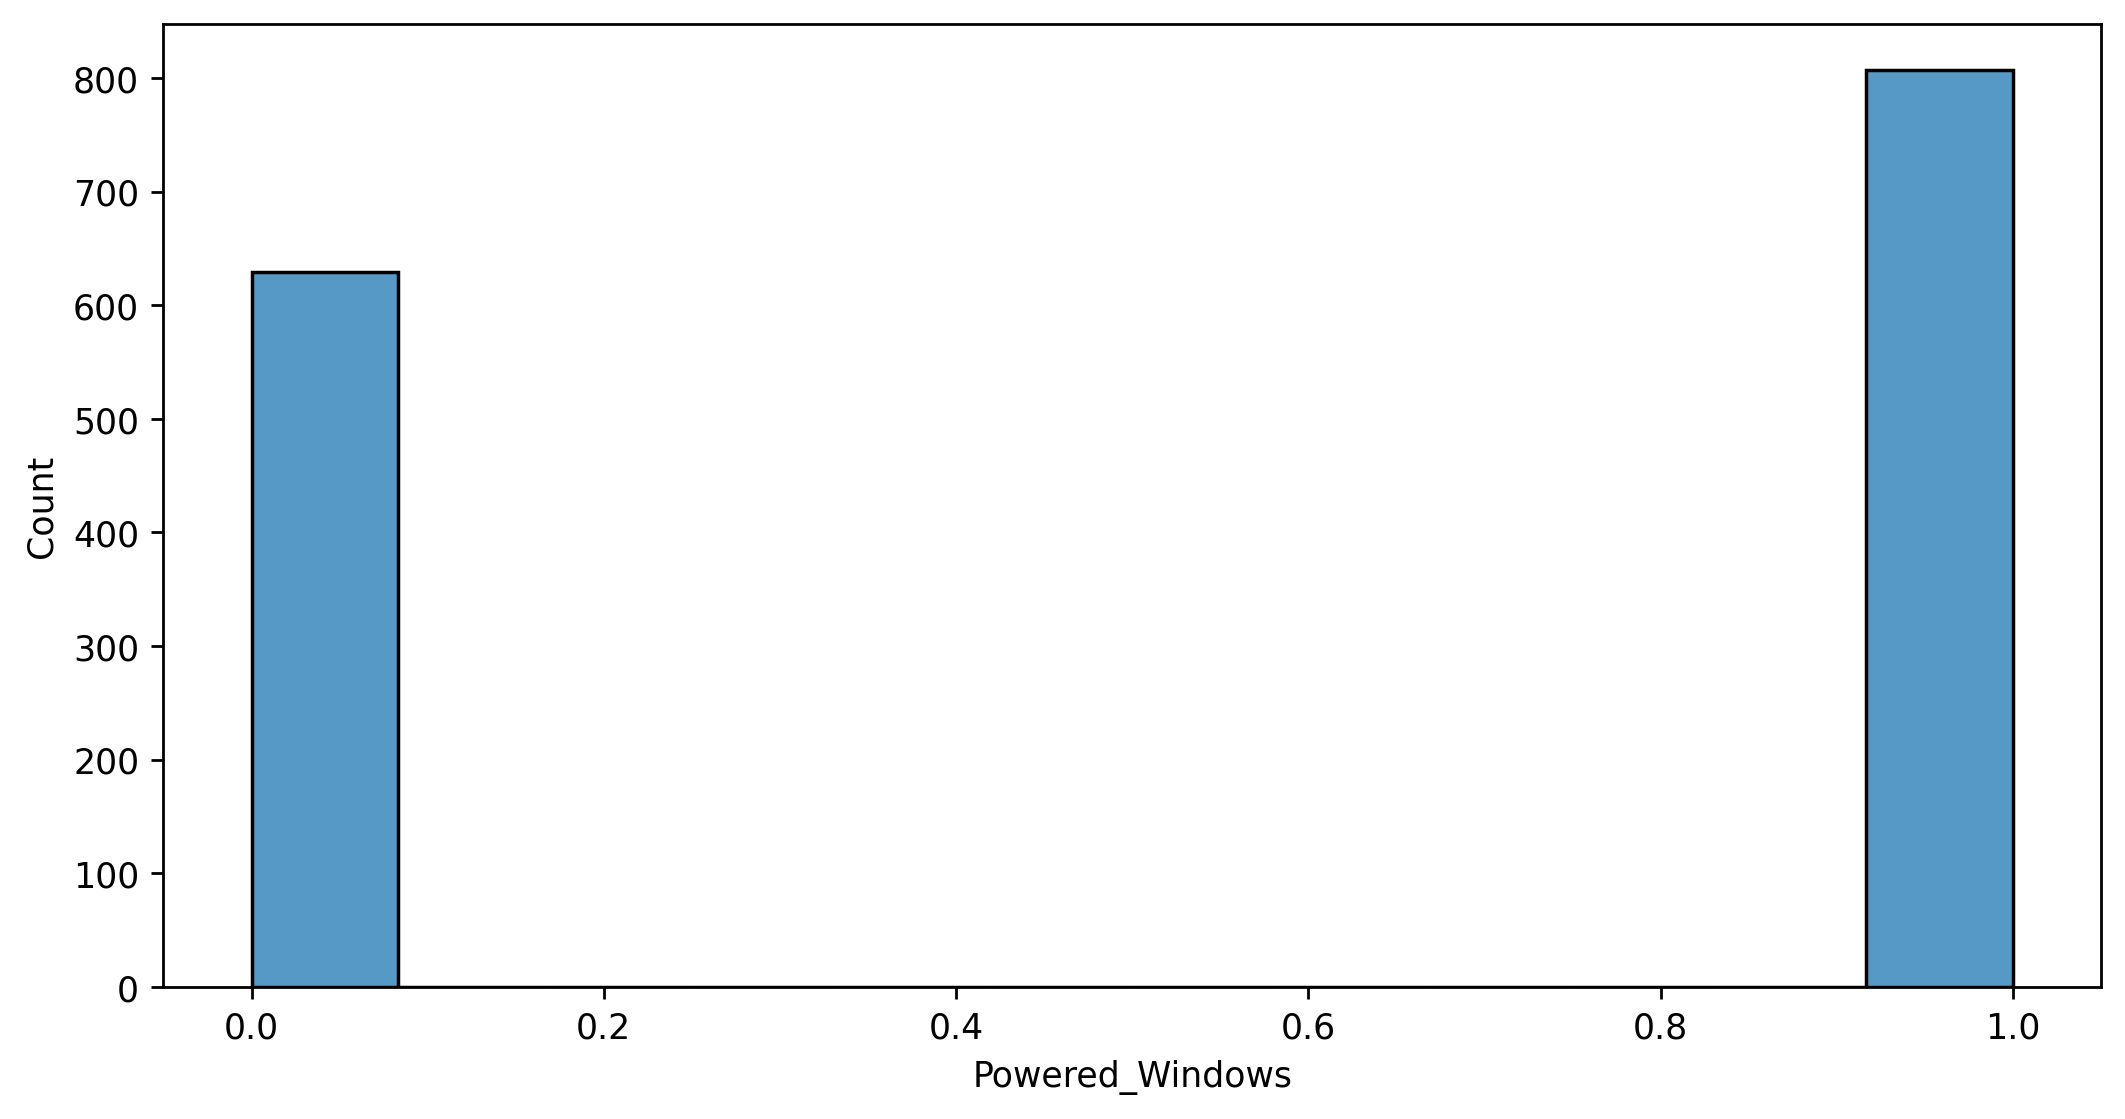

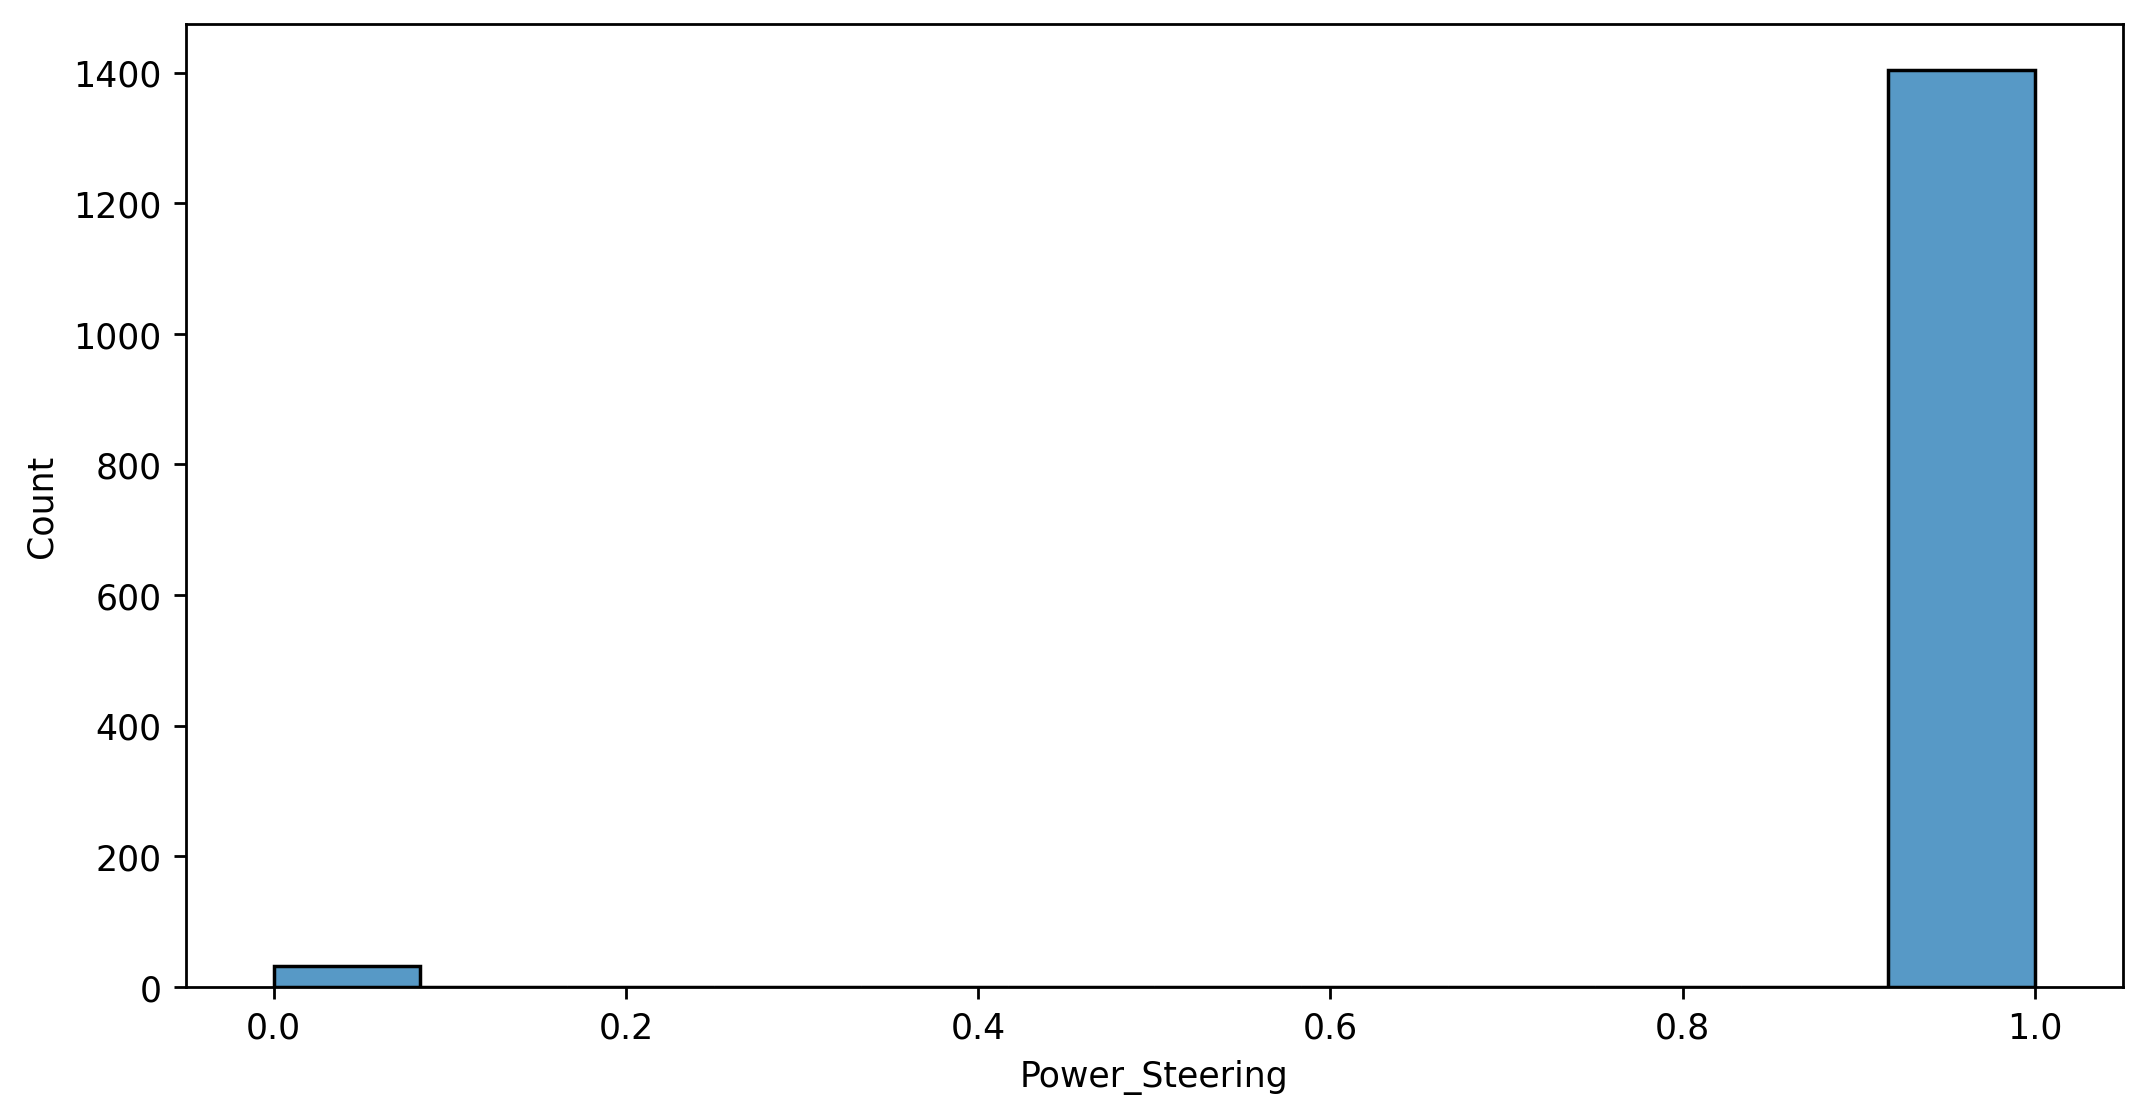

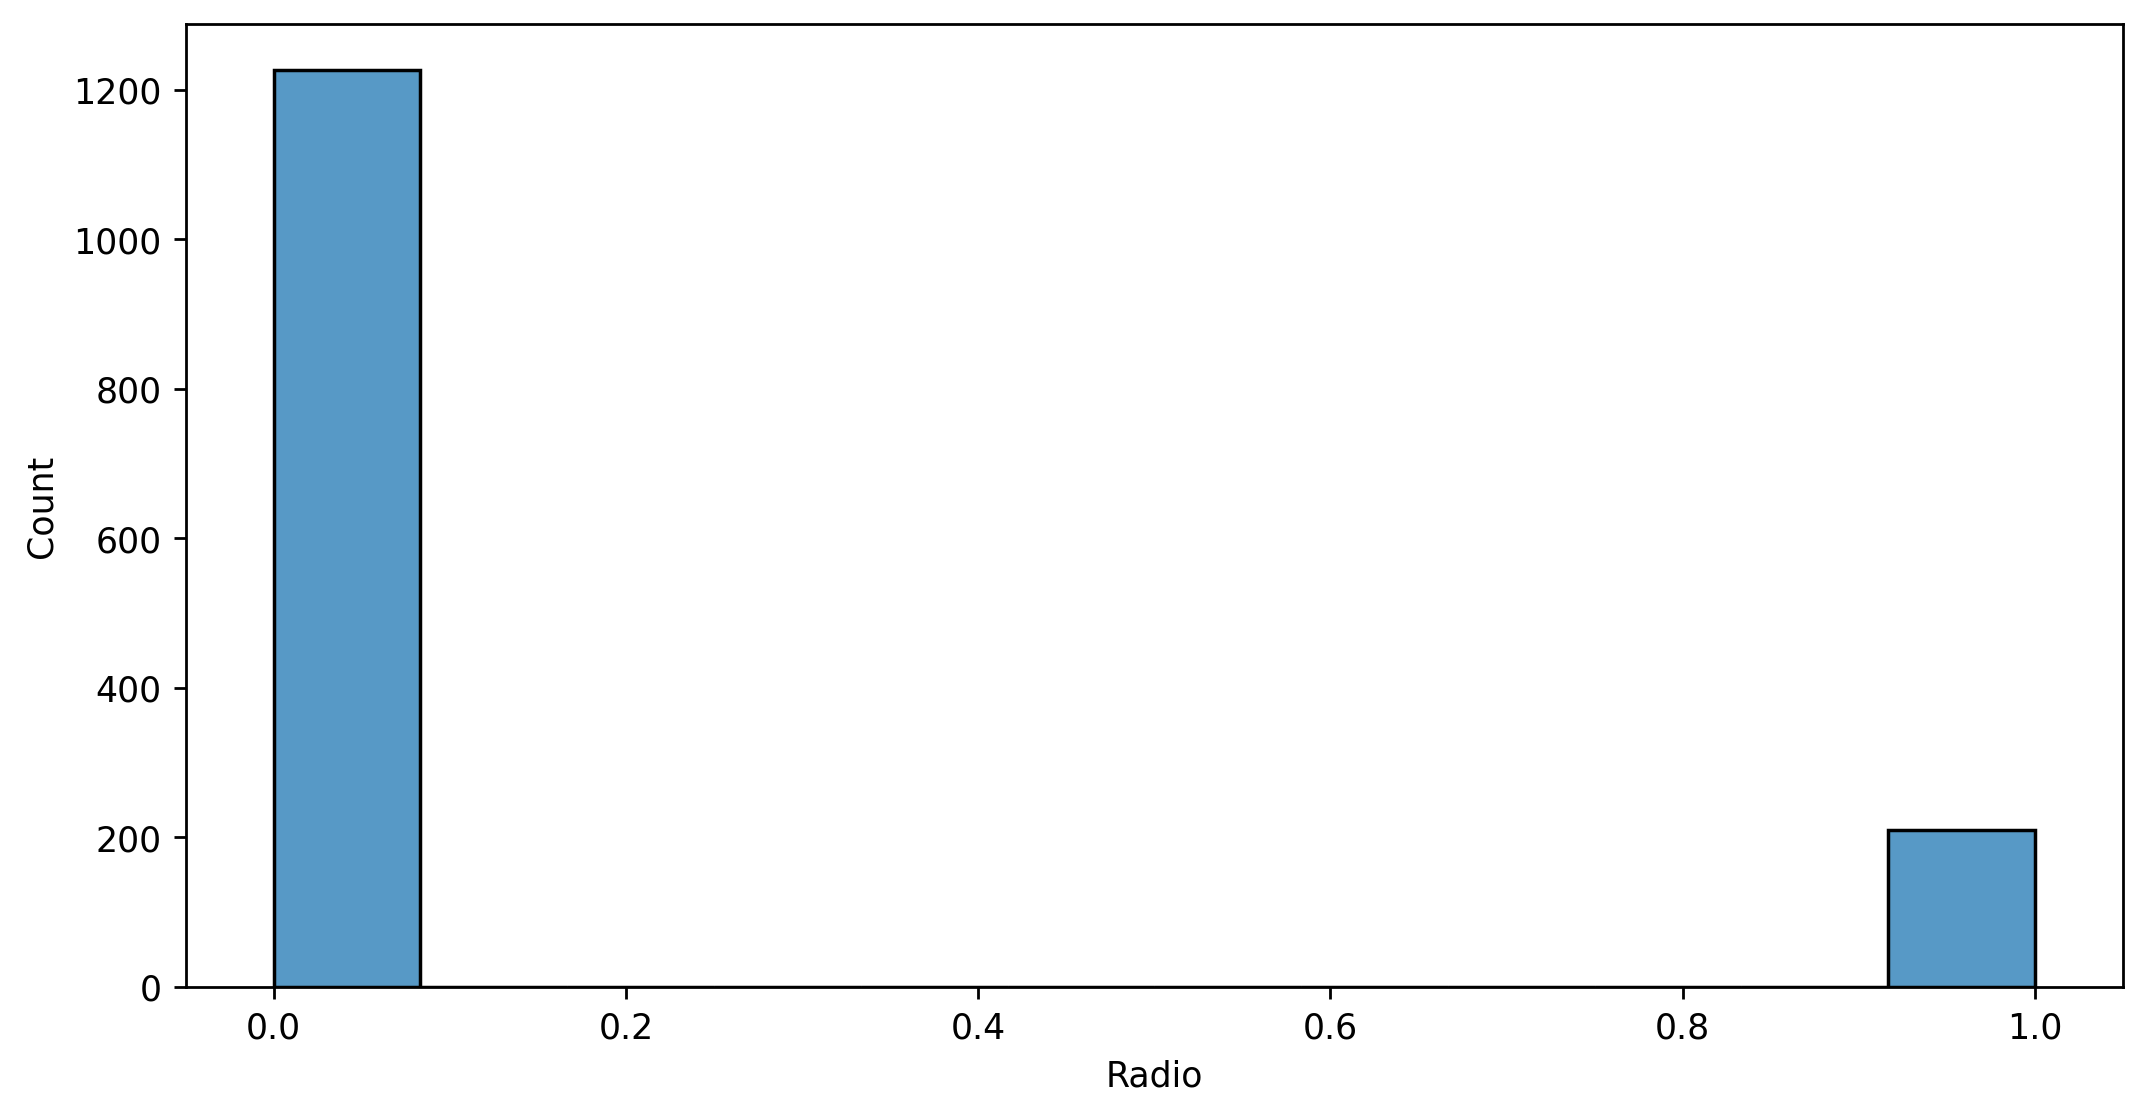

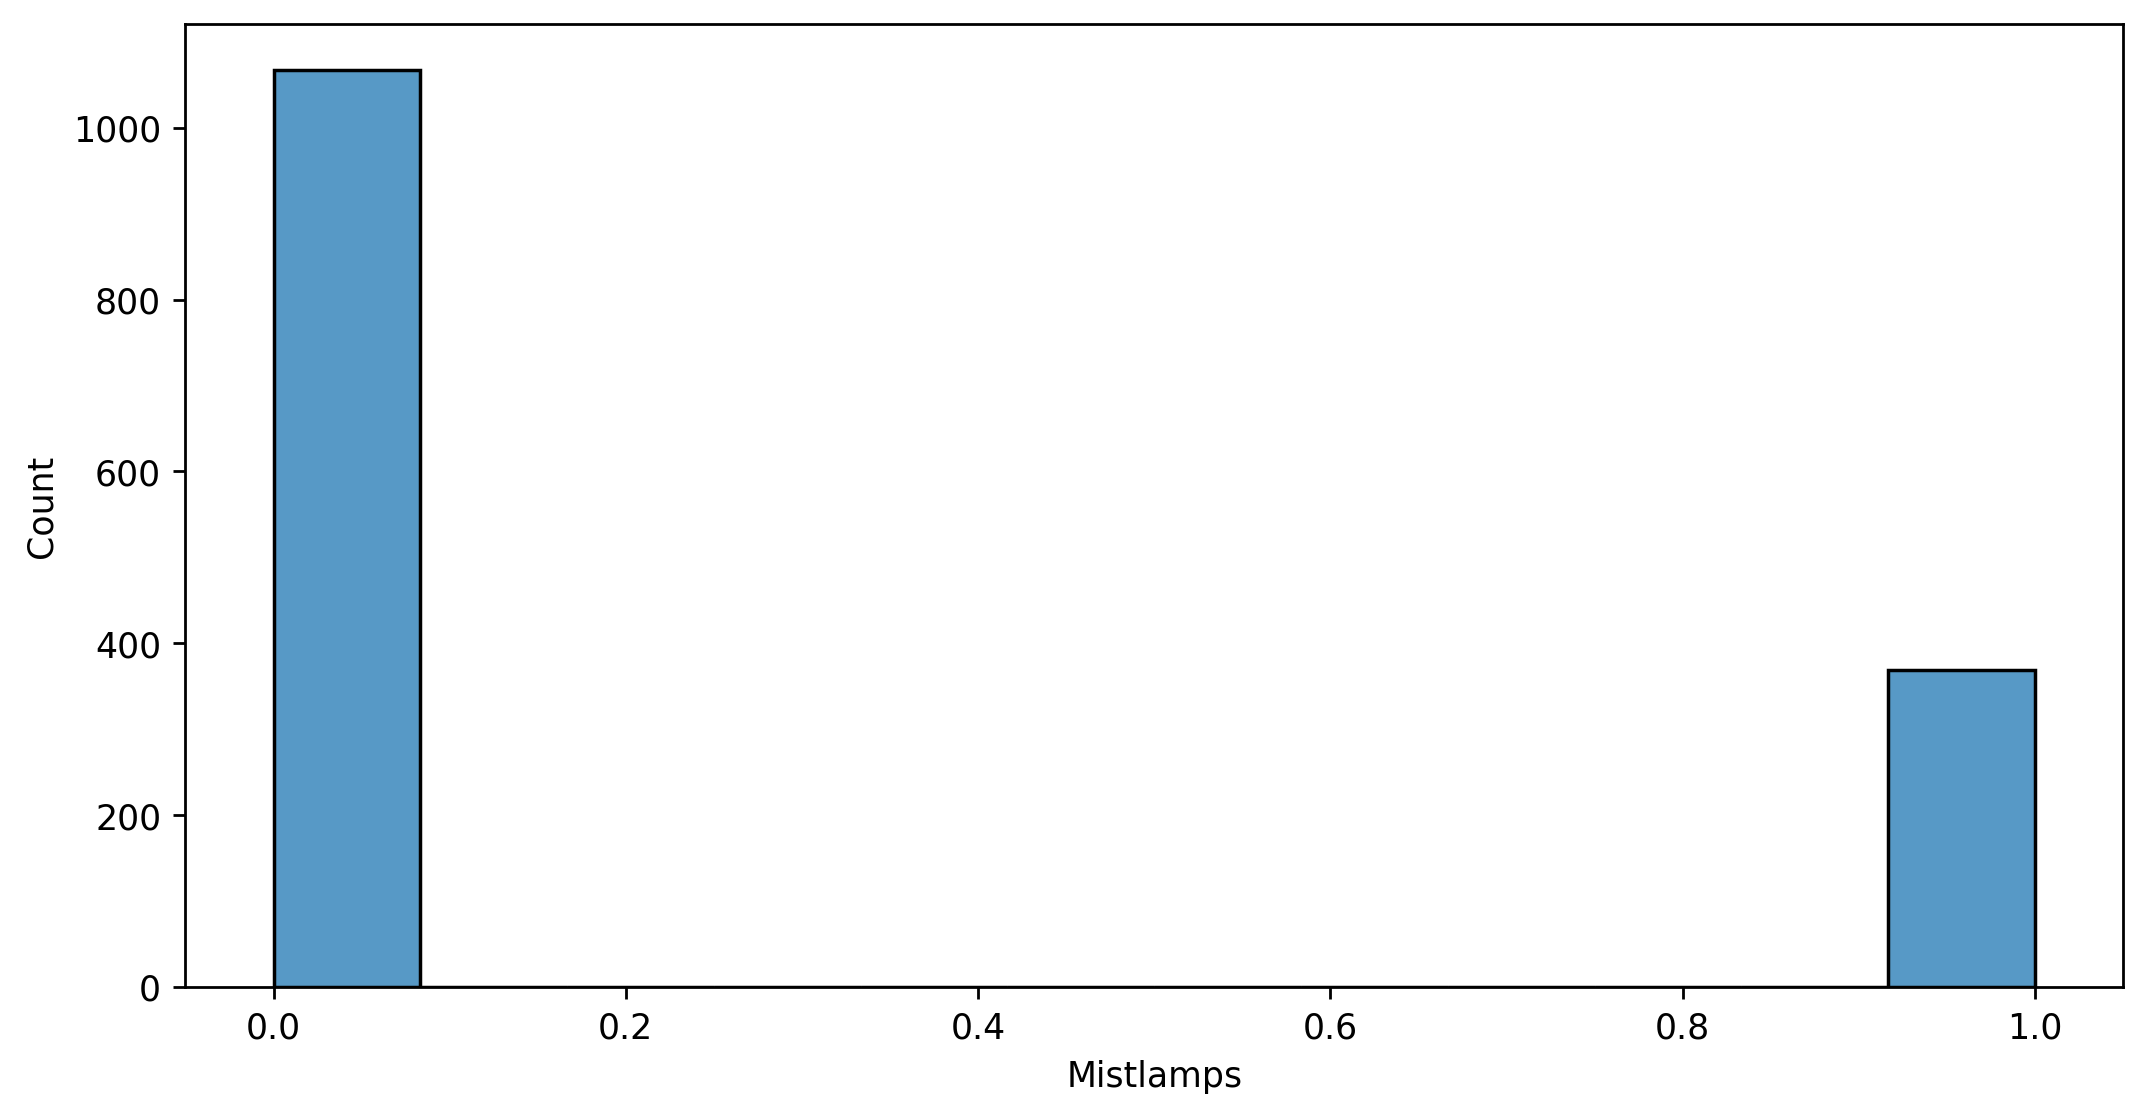

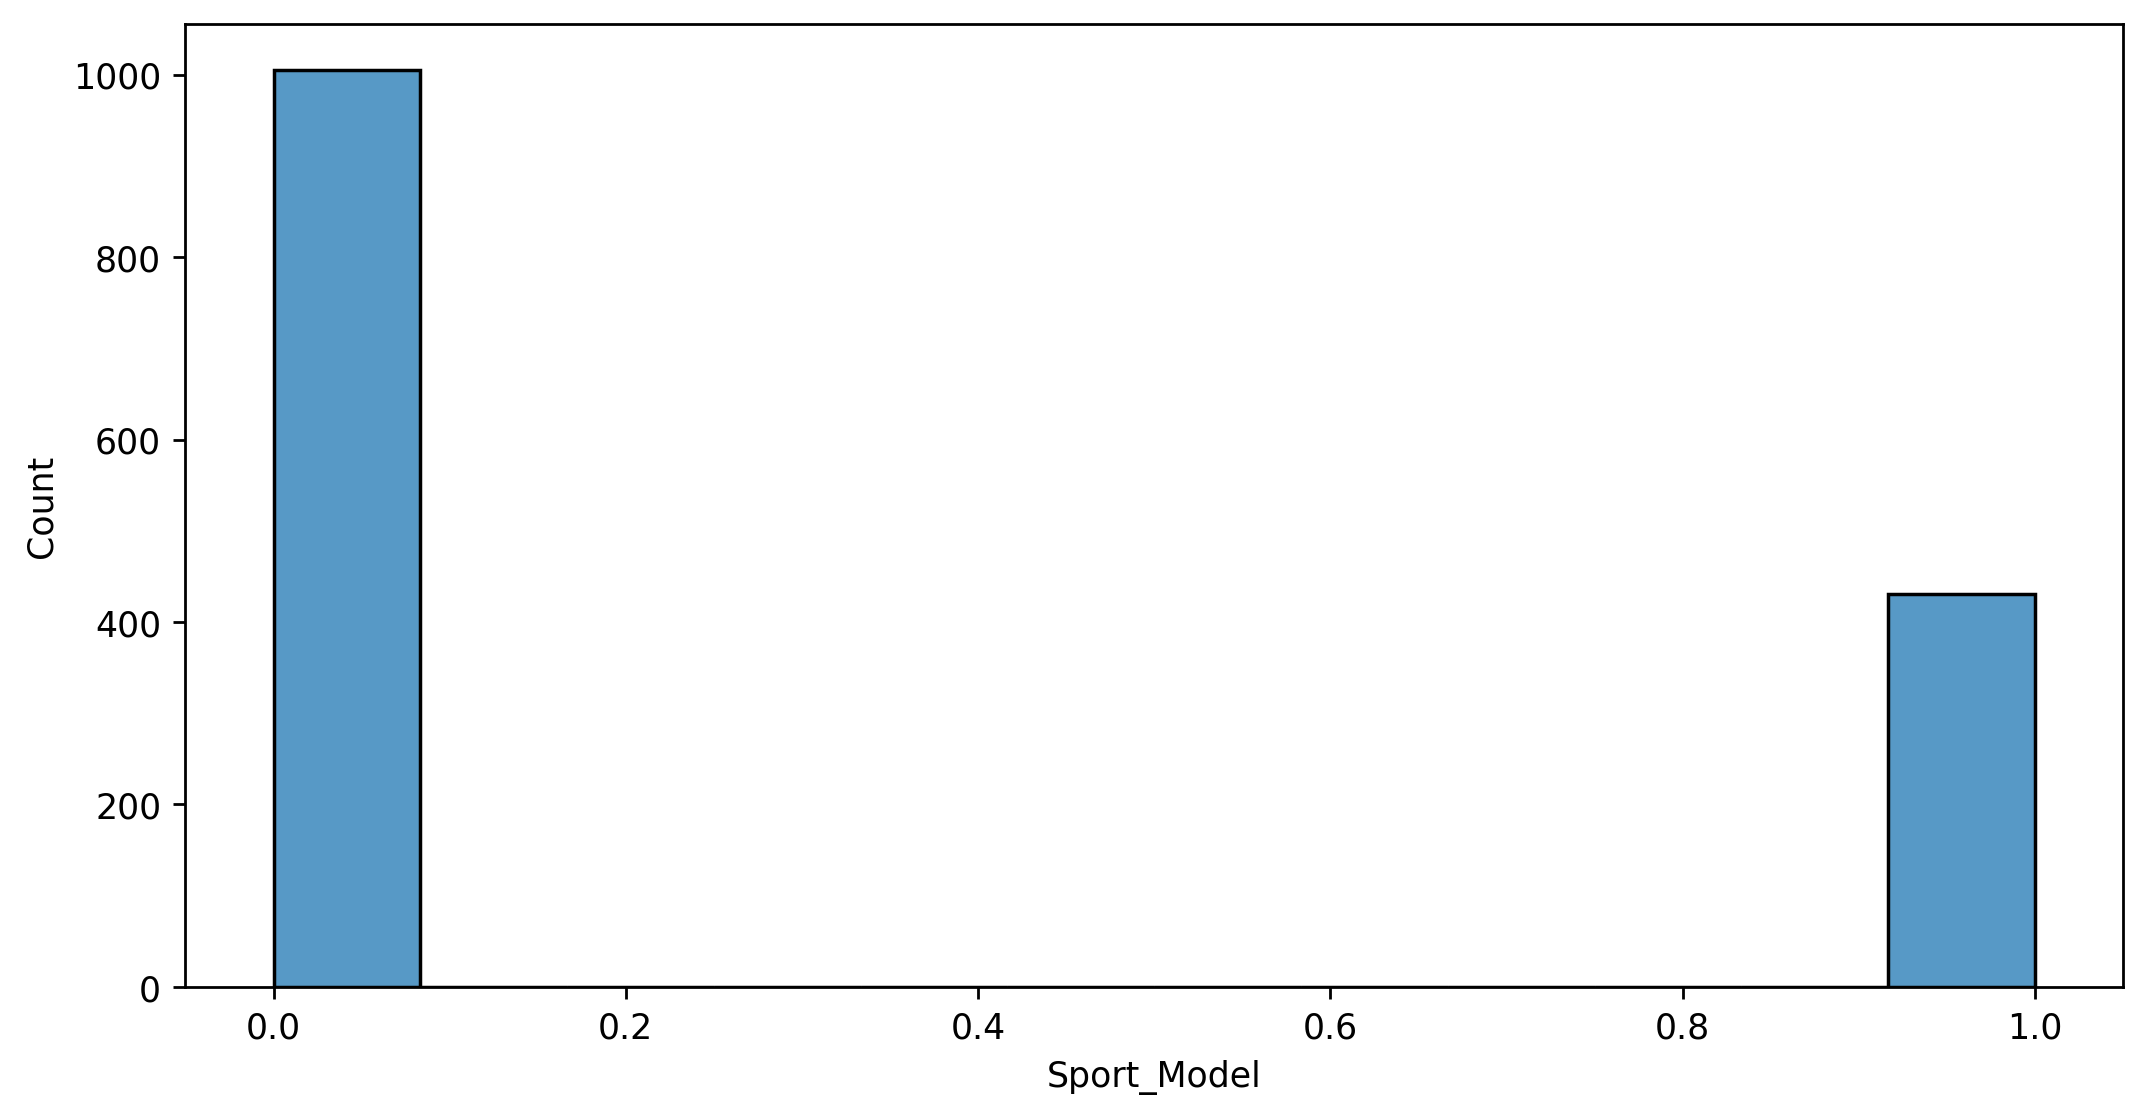

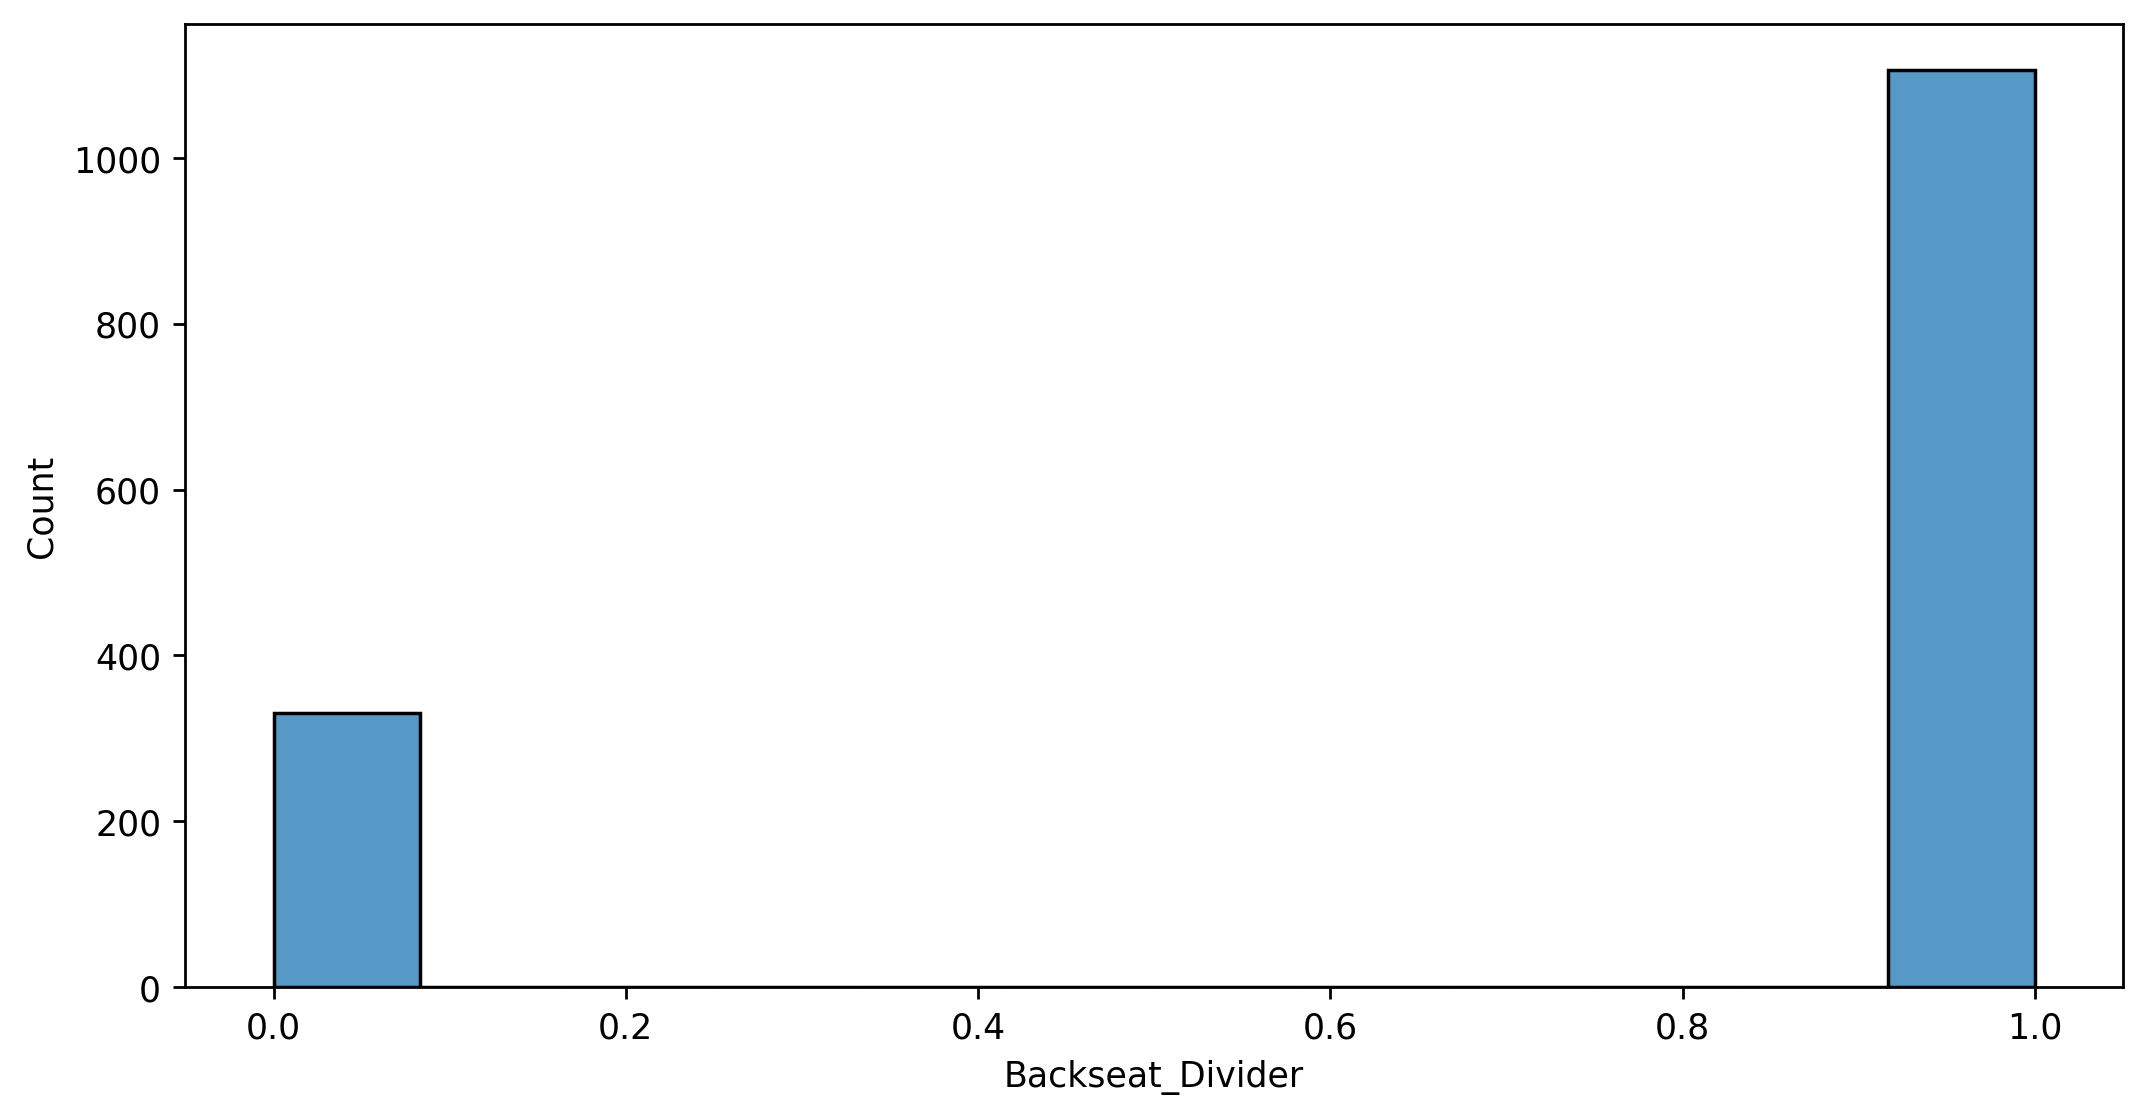

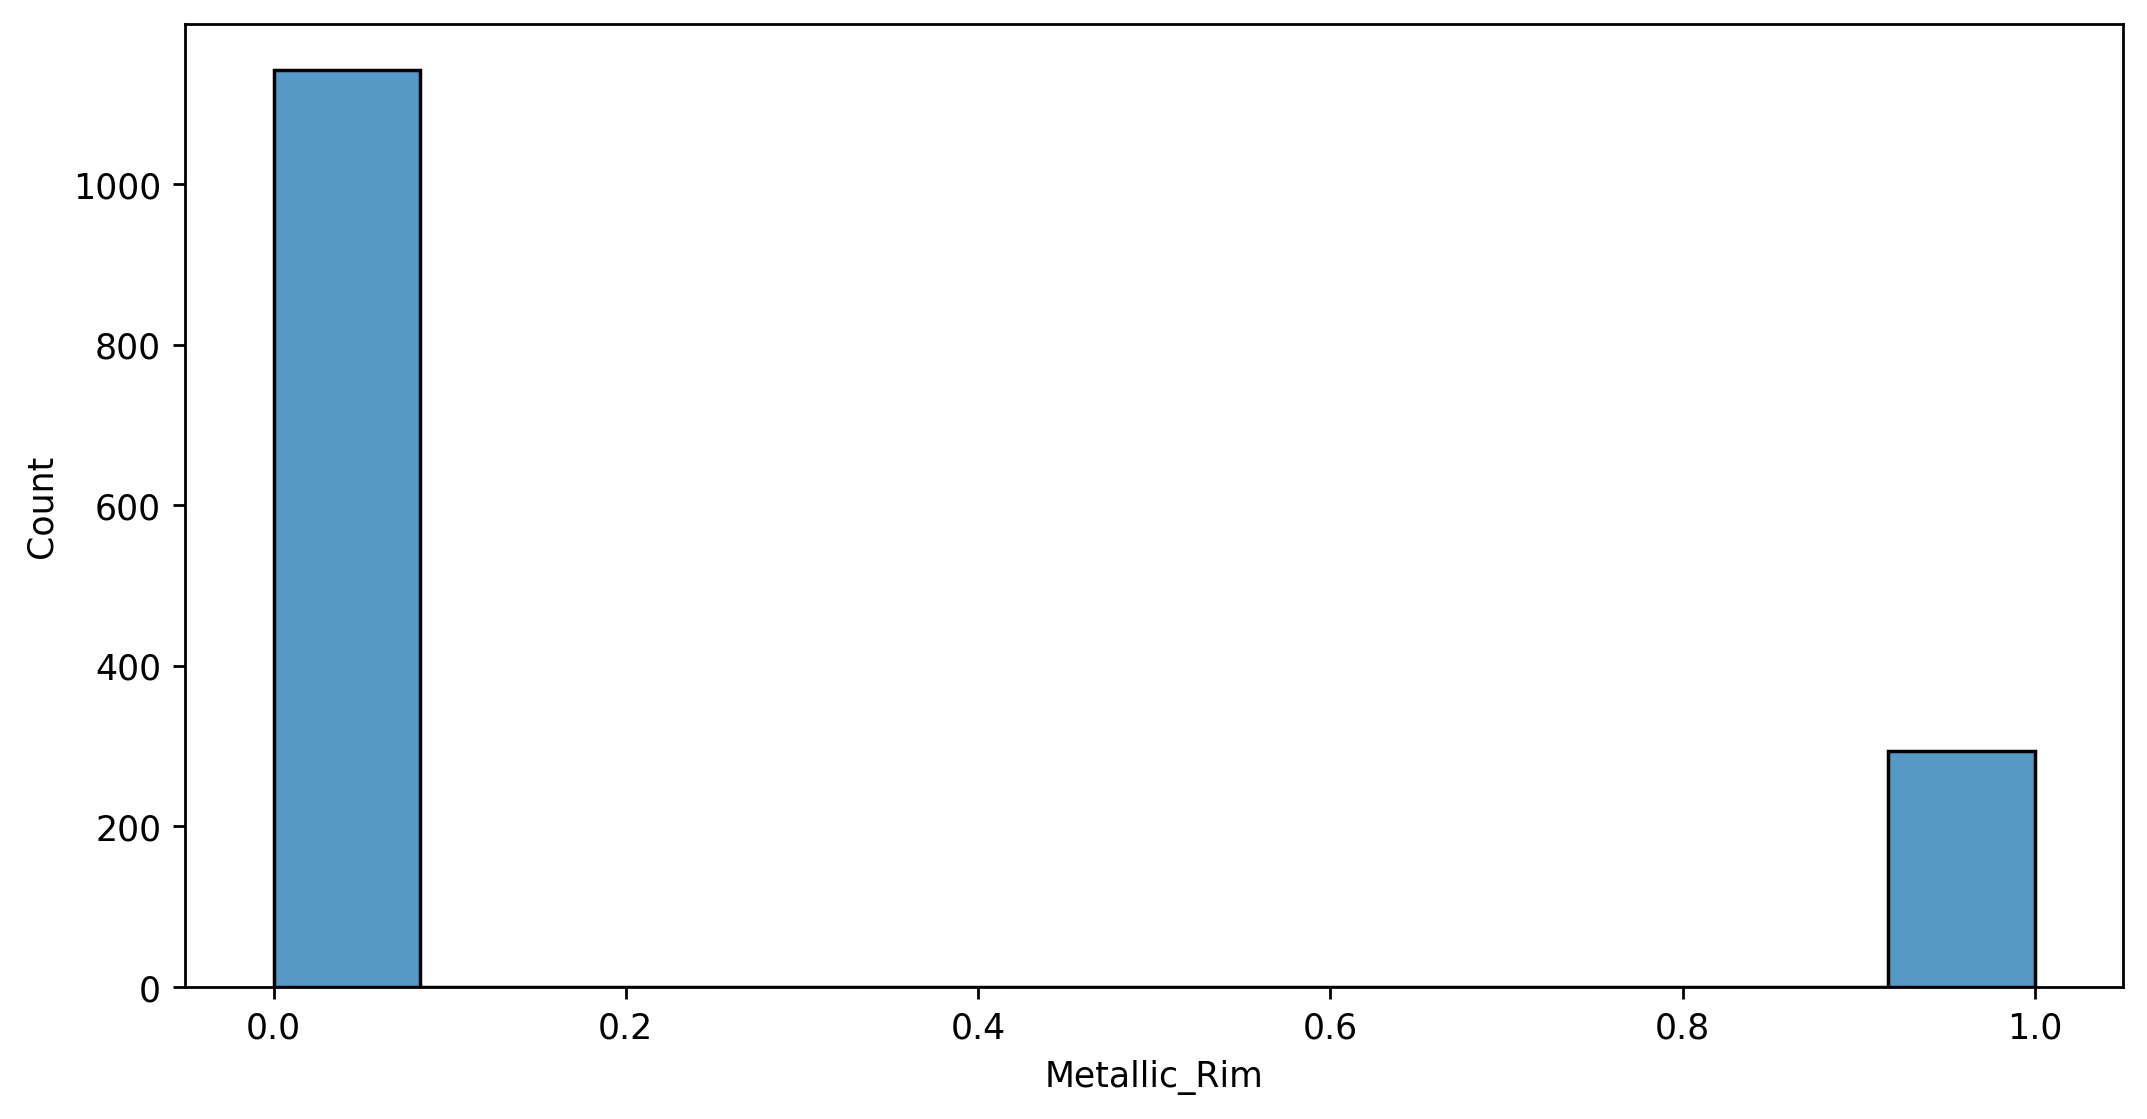

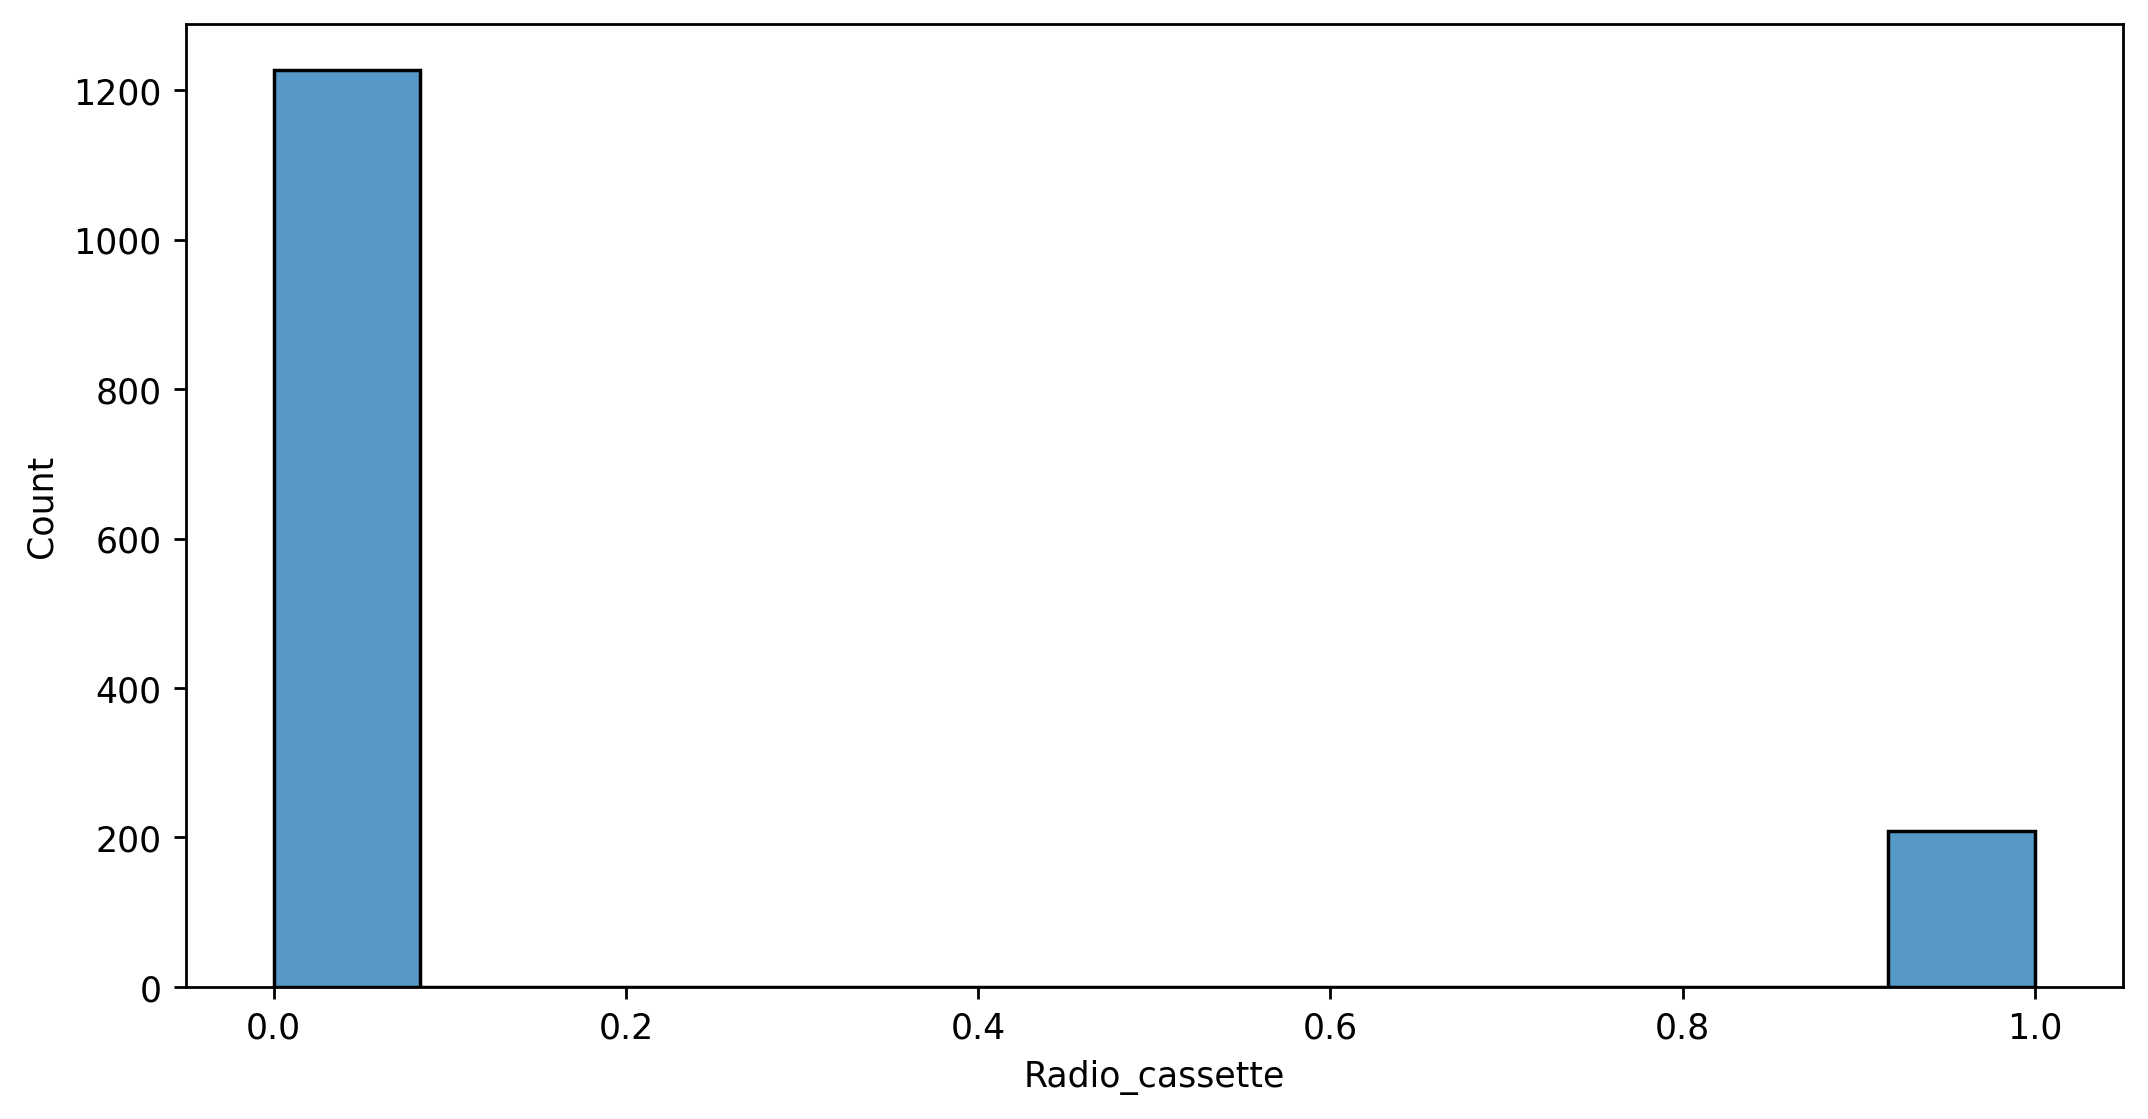

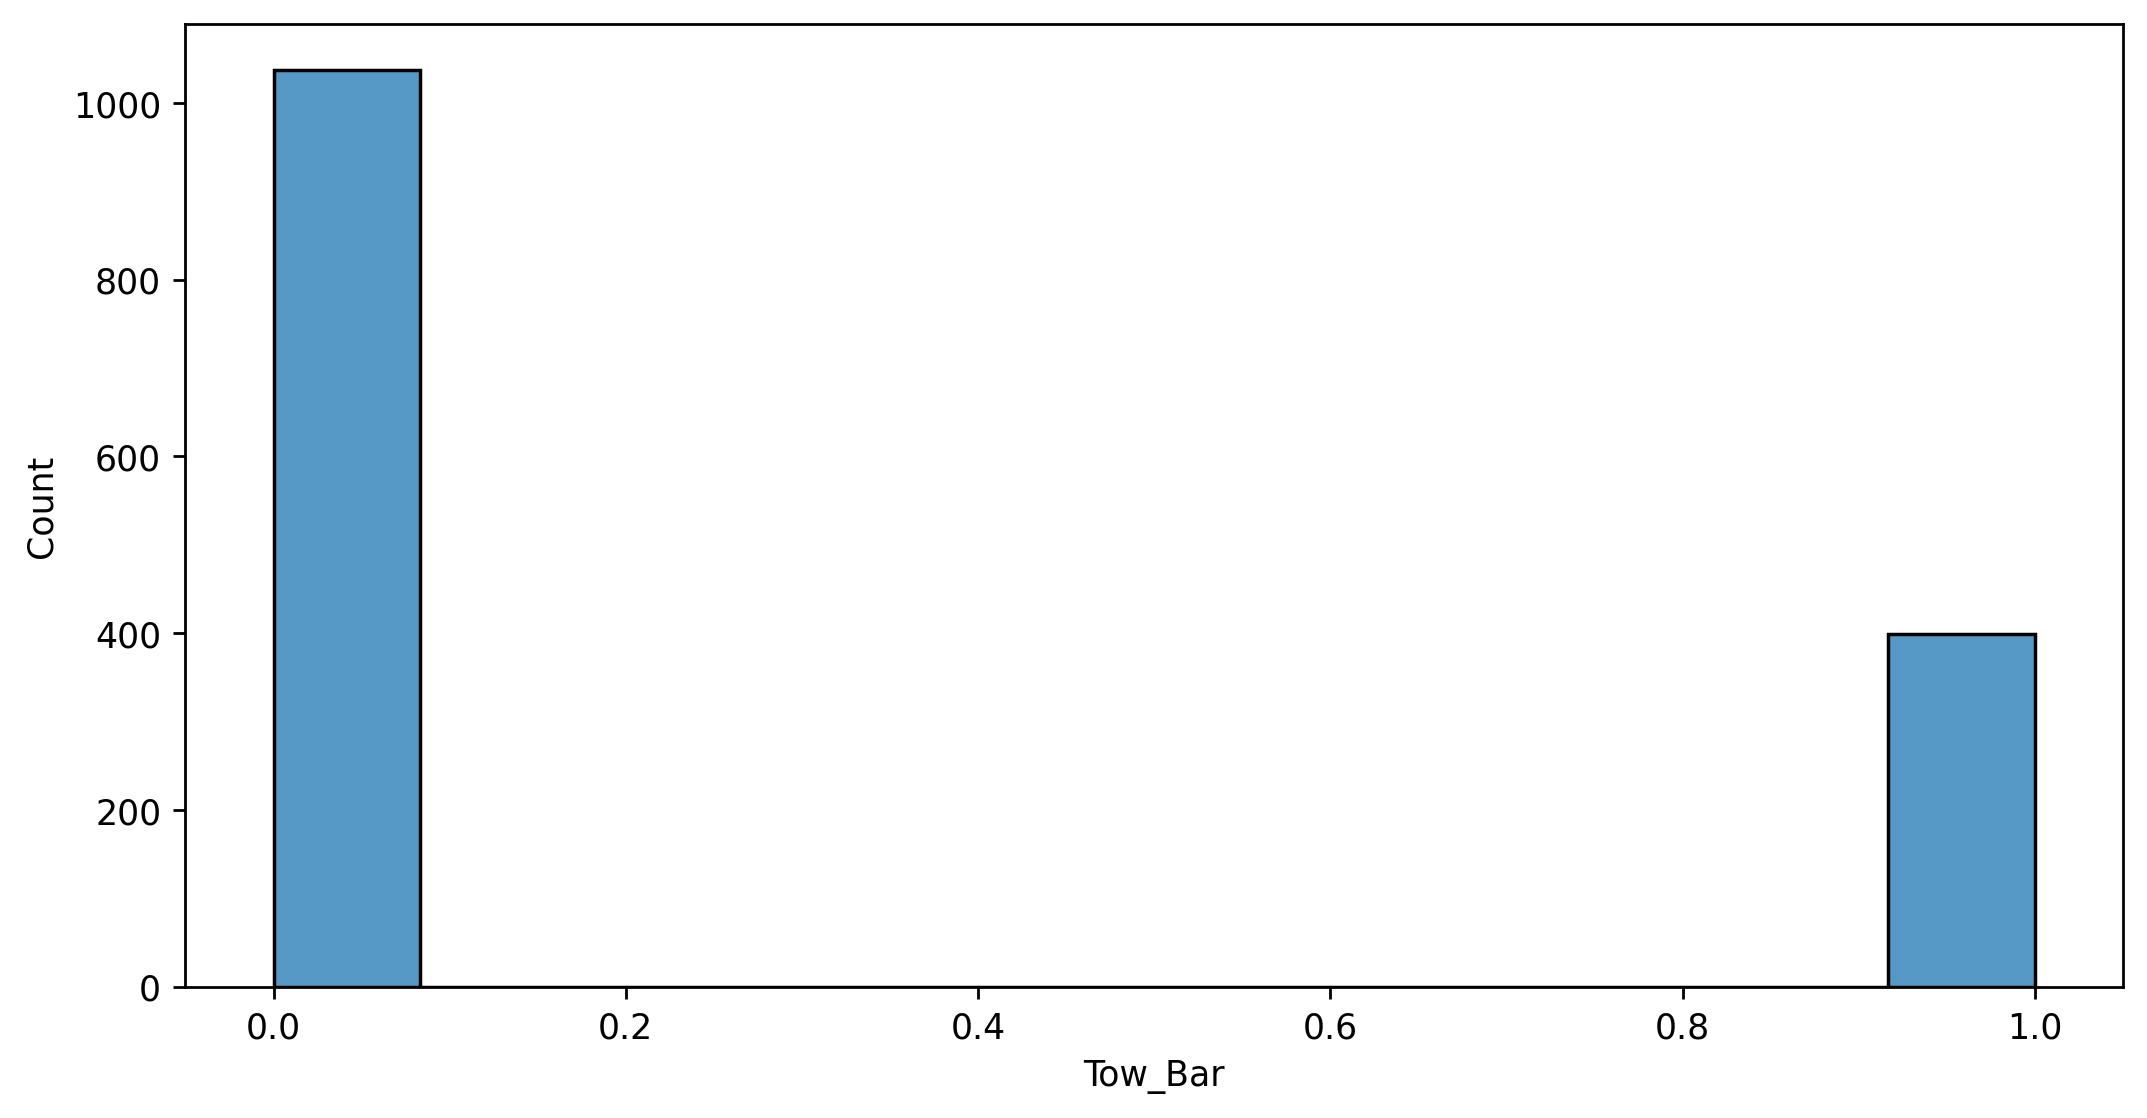

In [18]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

# outliers Treatment

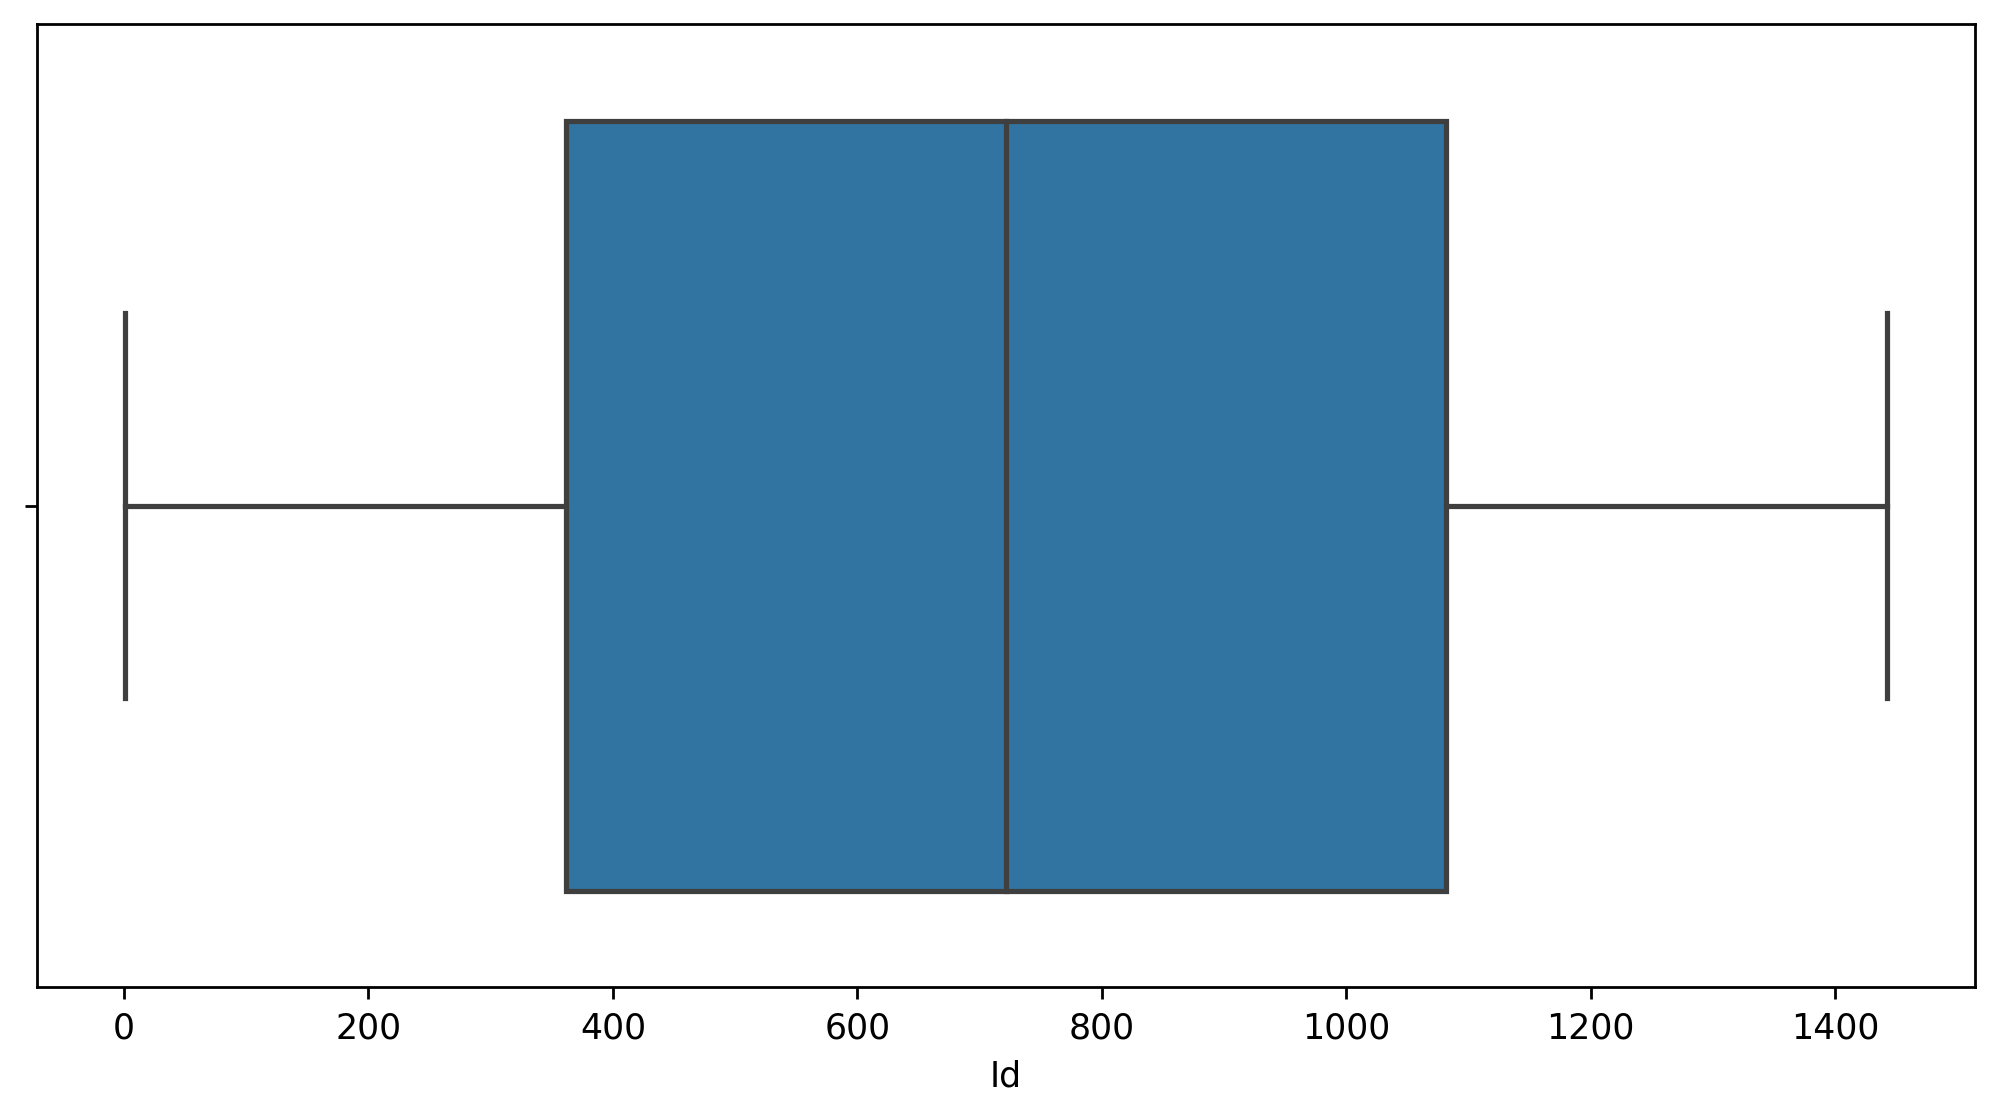

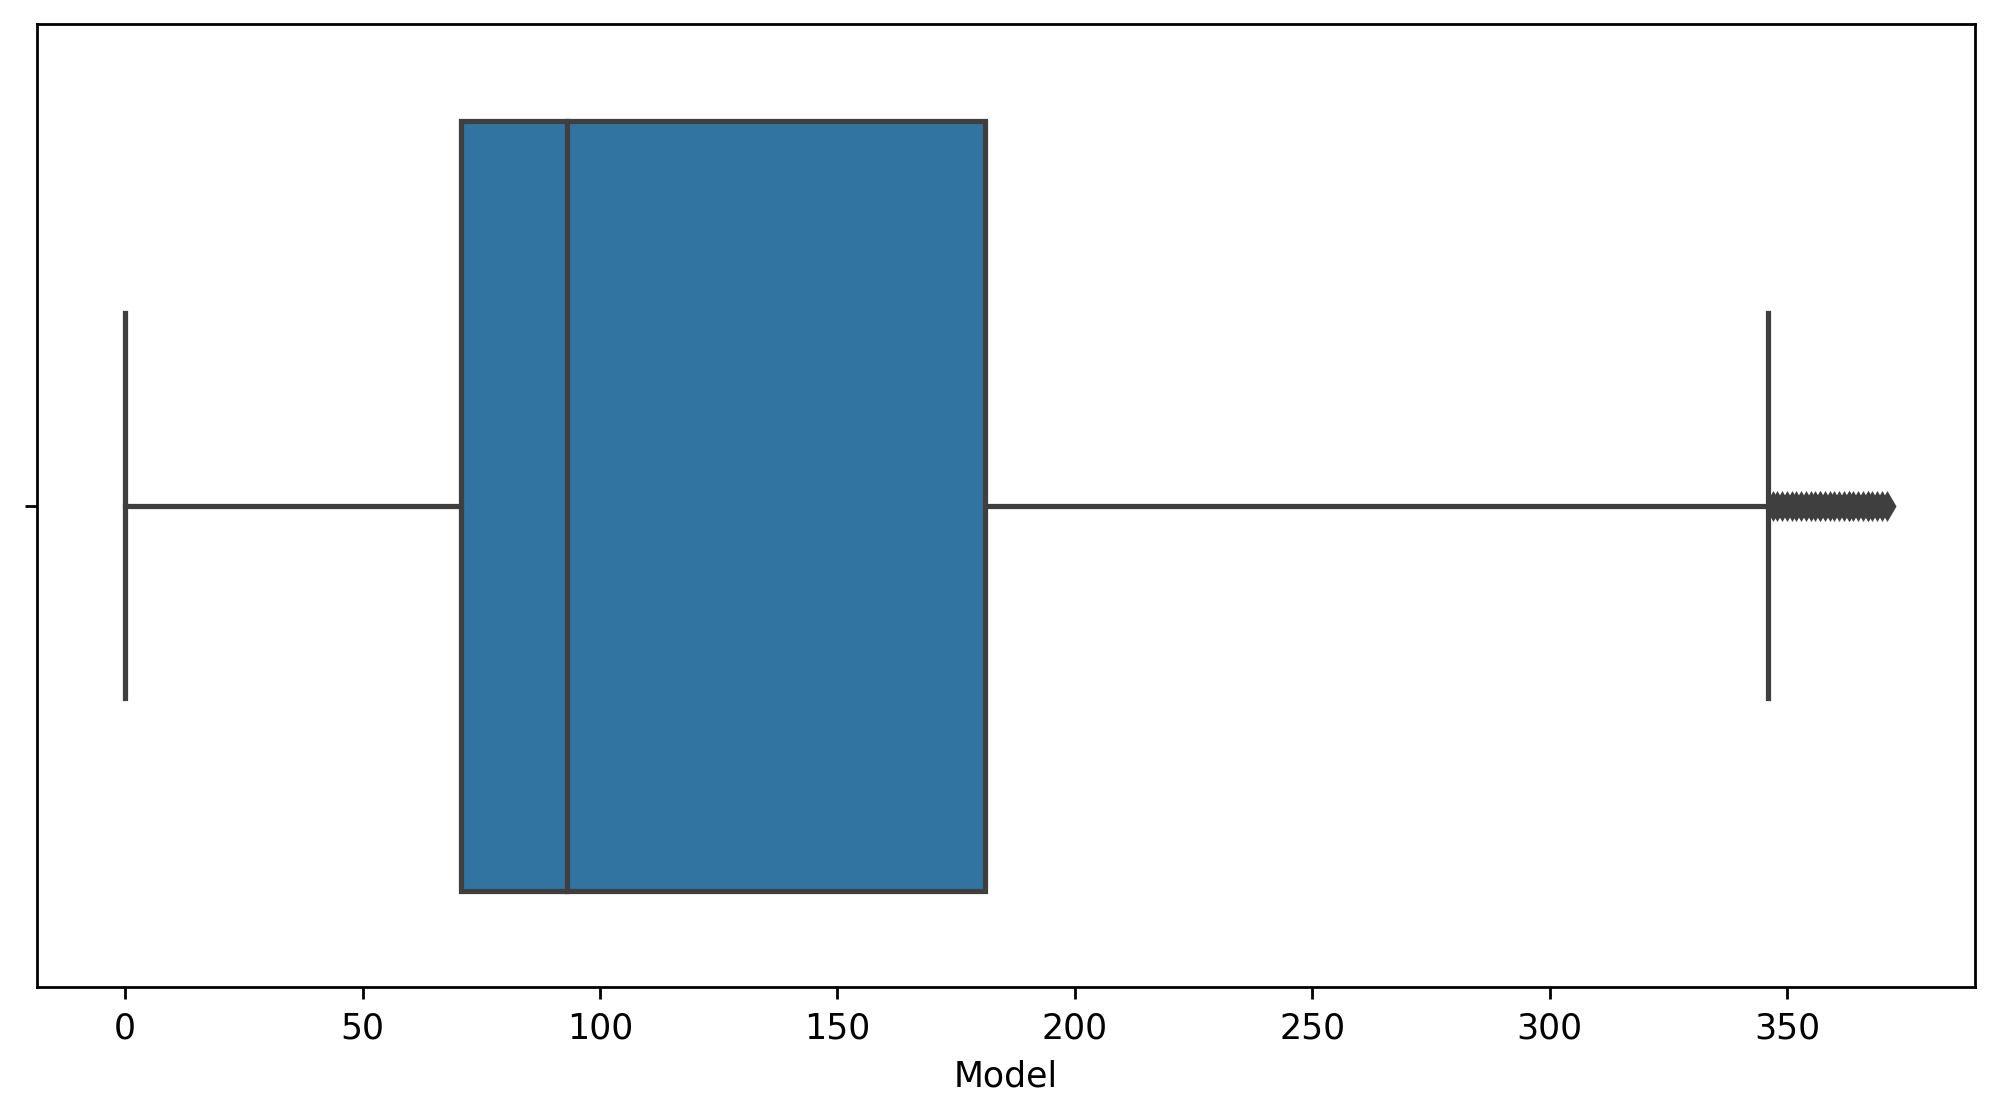

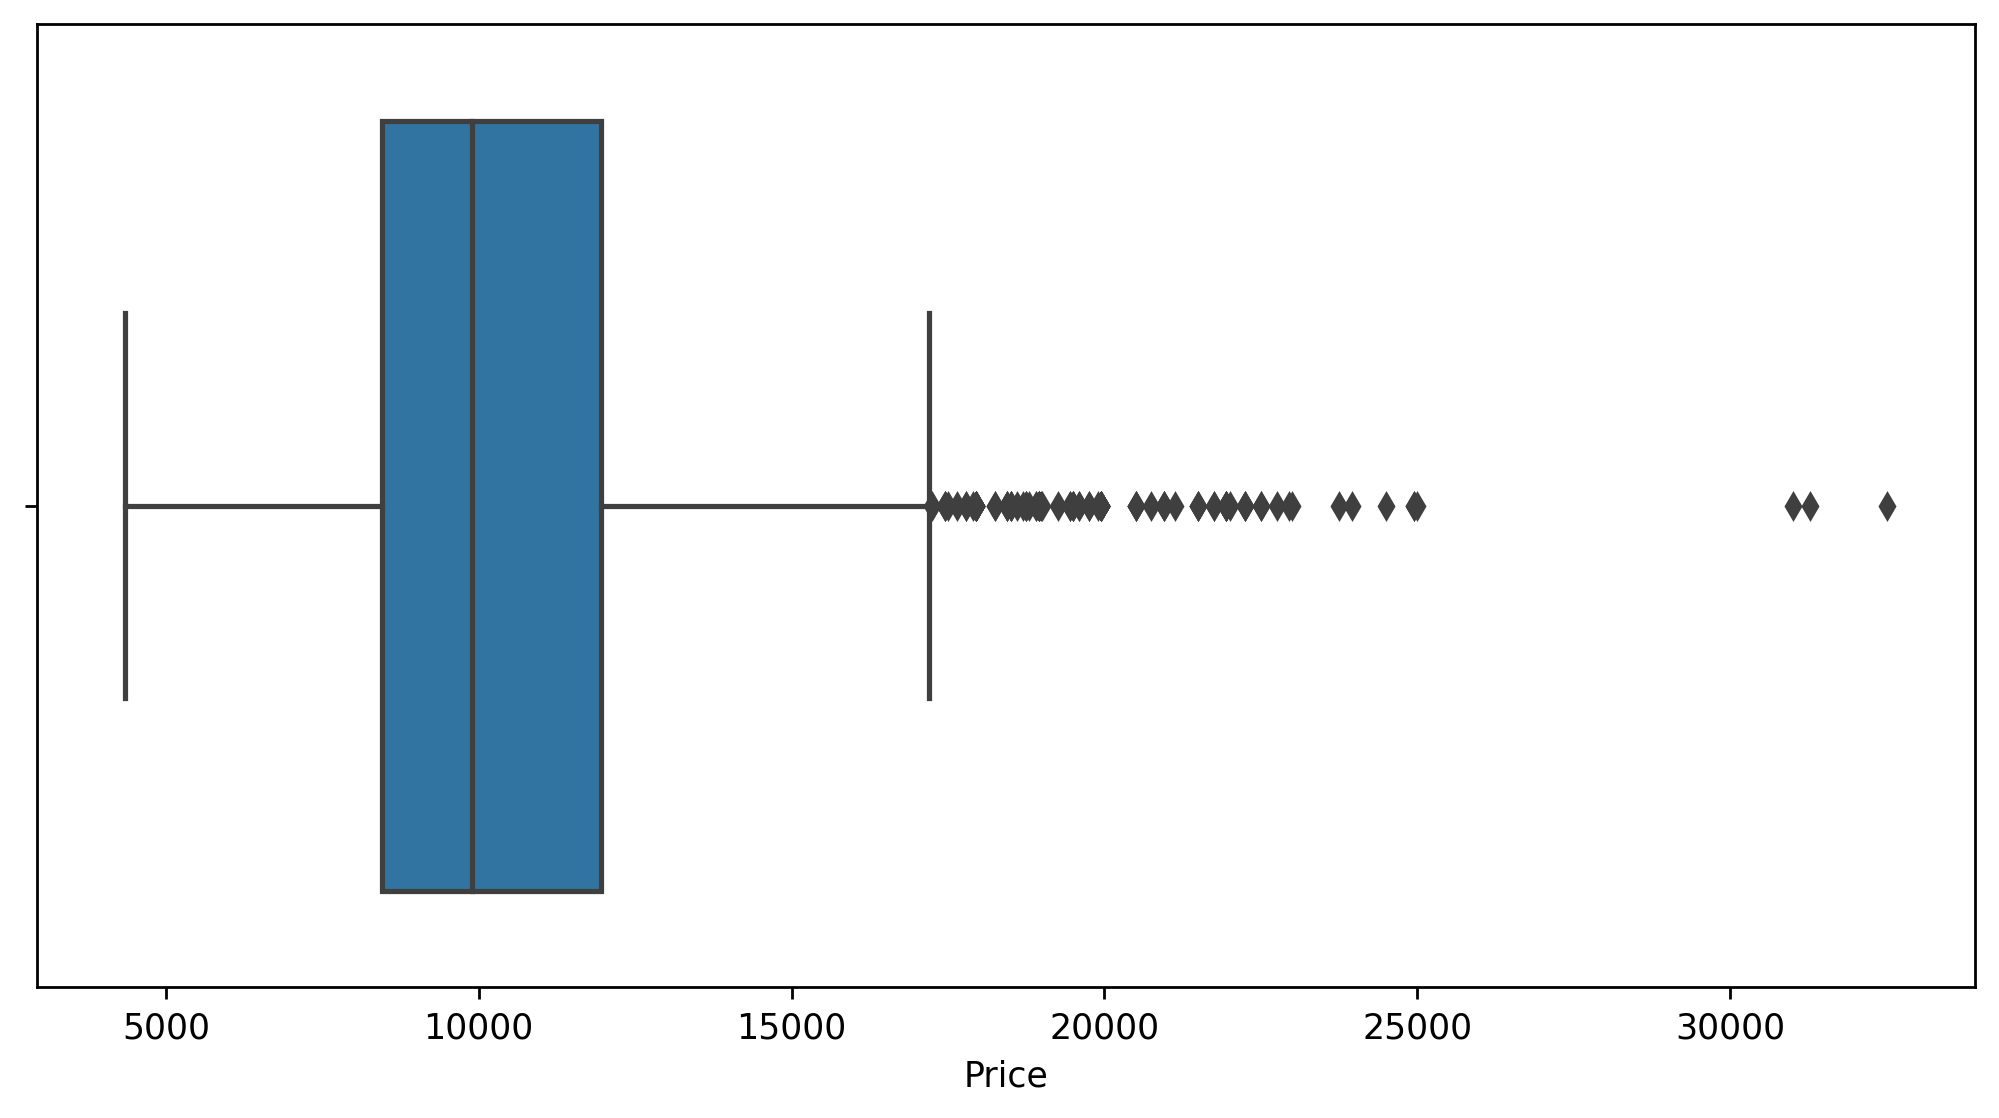

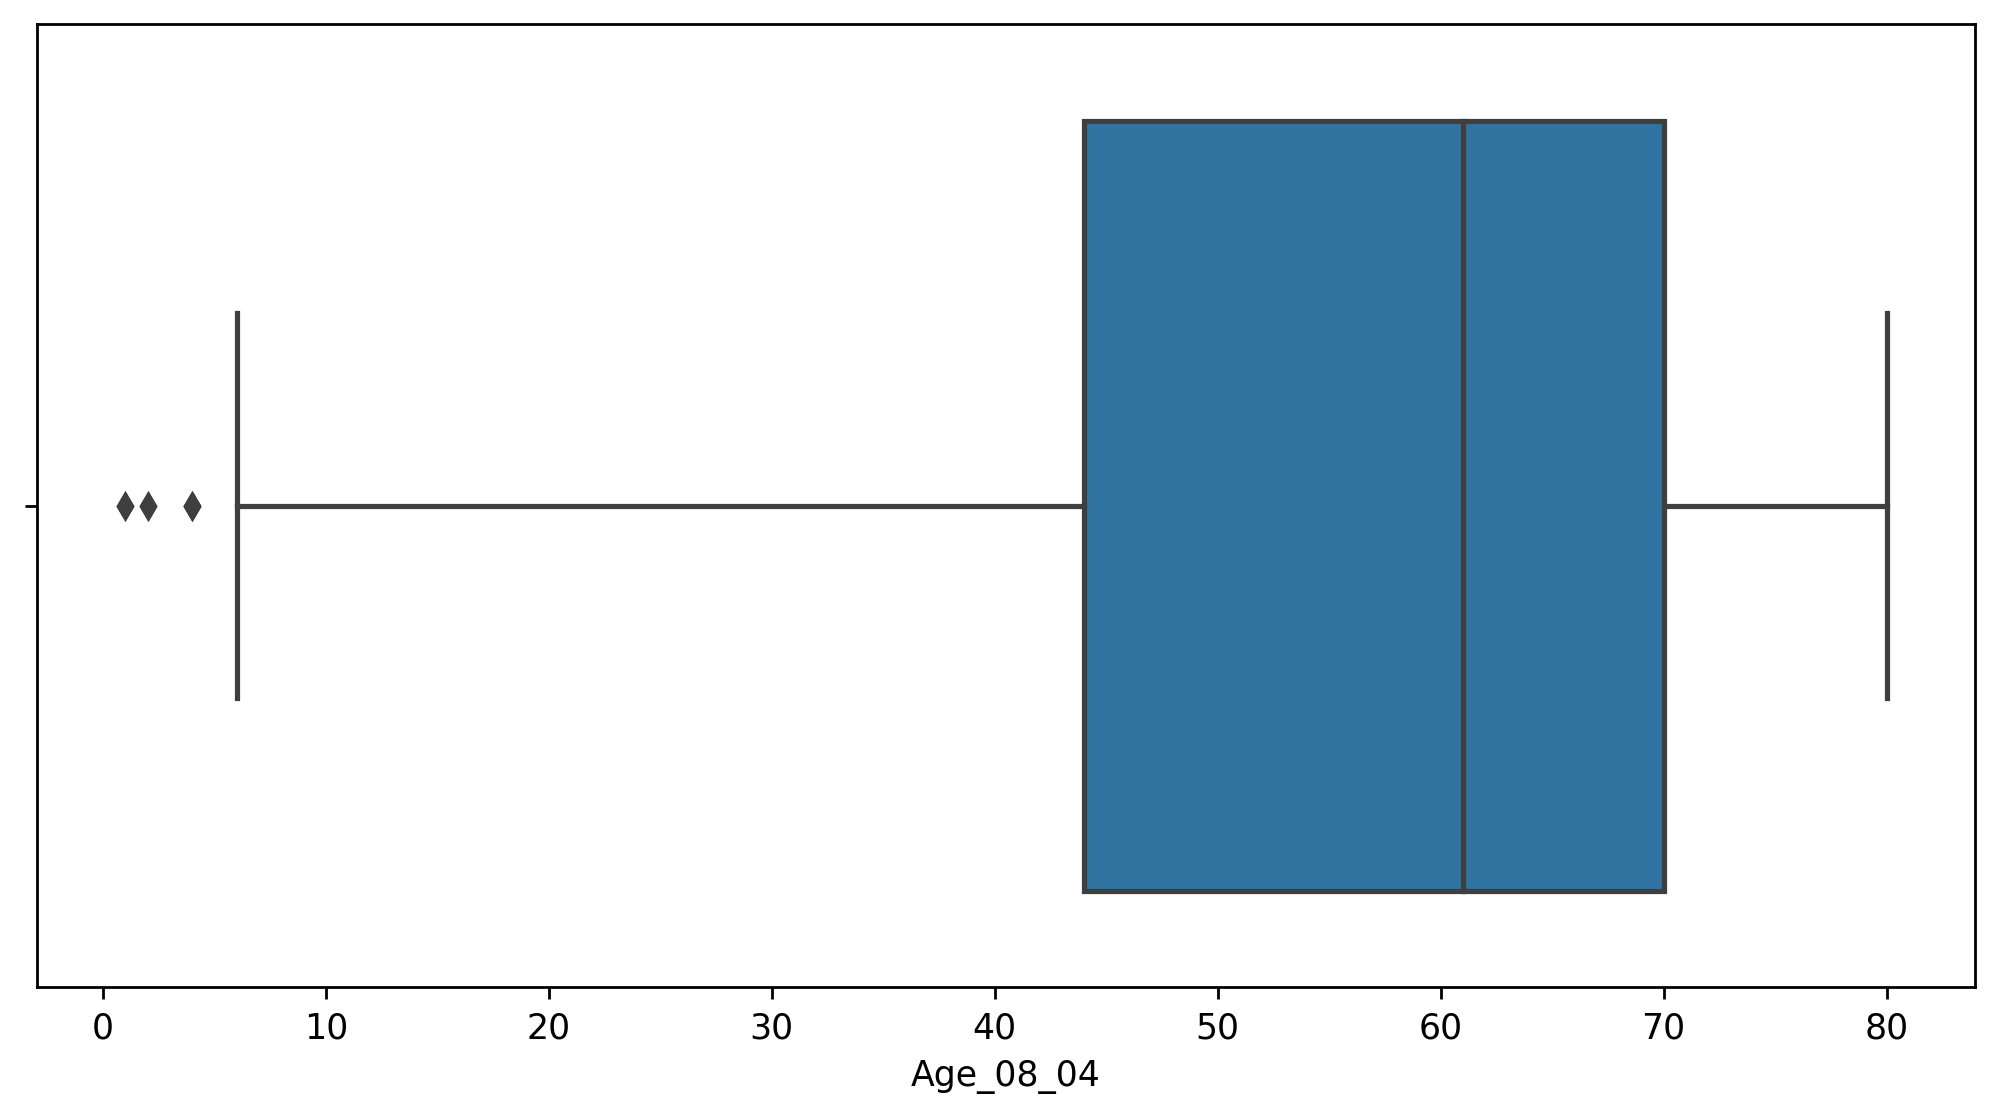

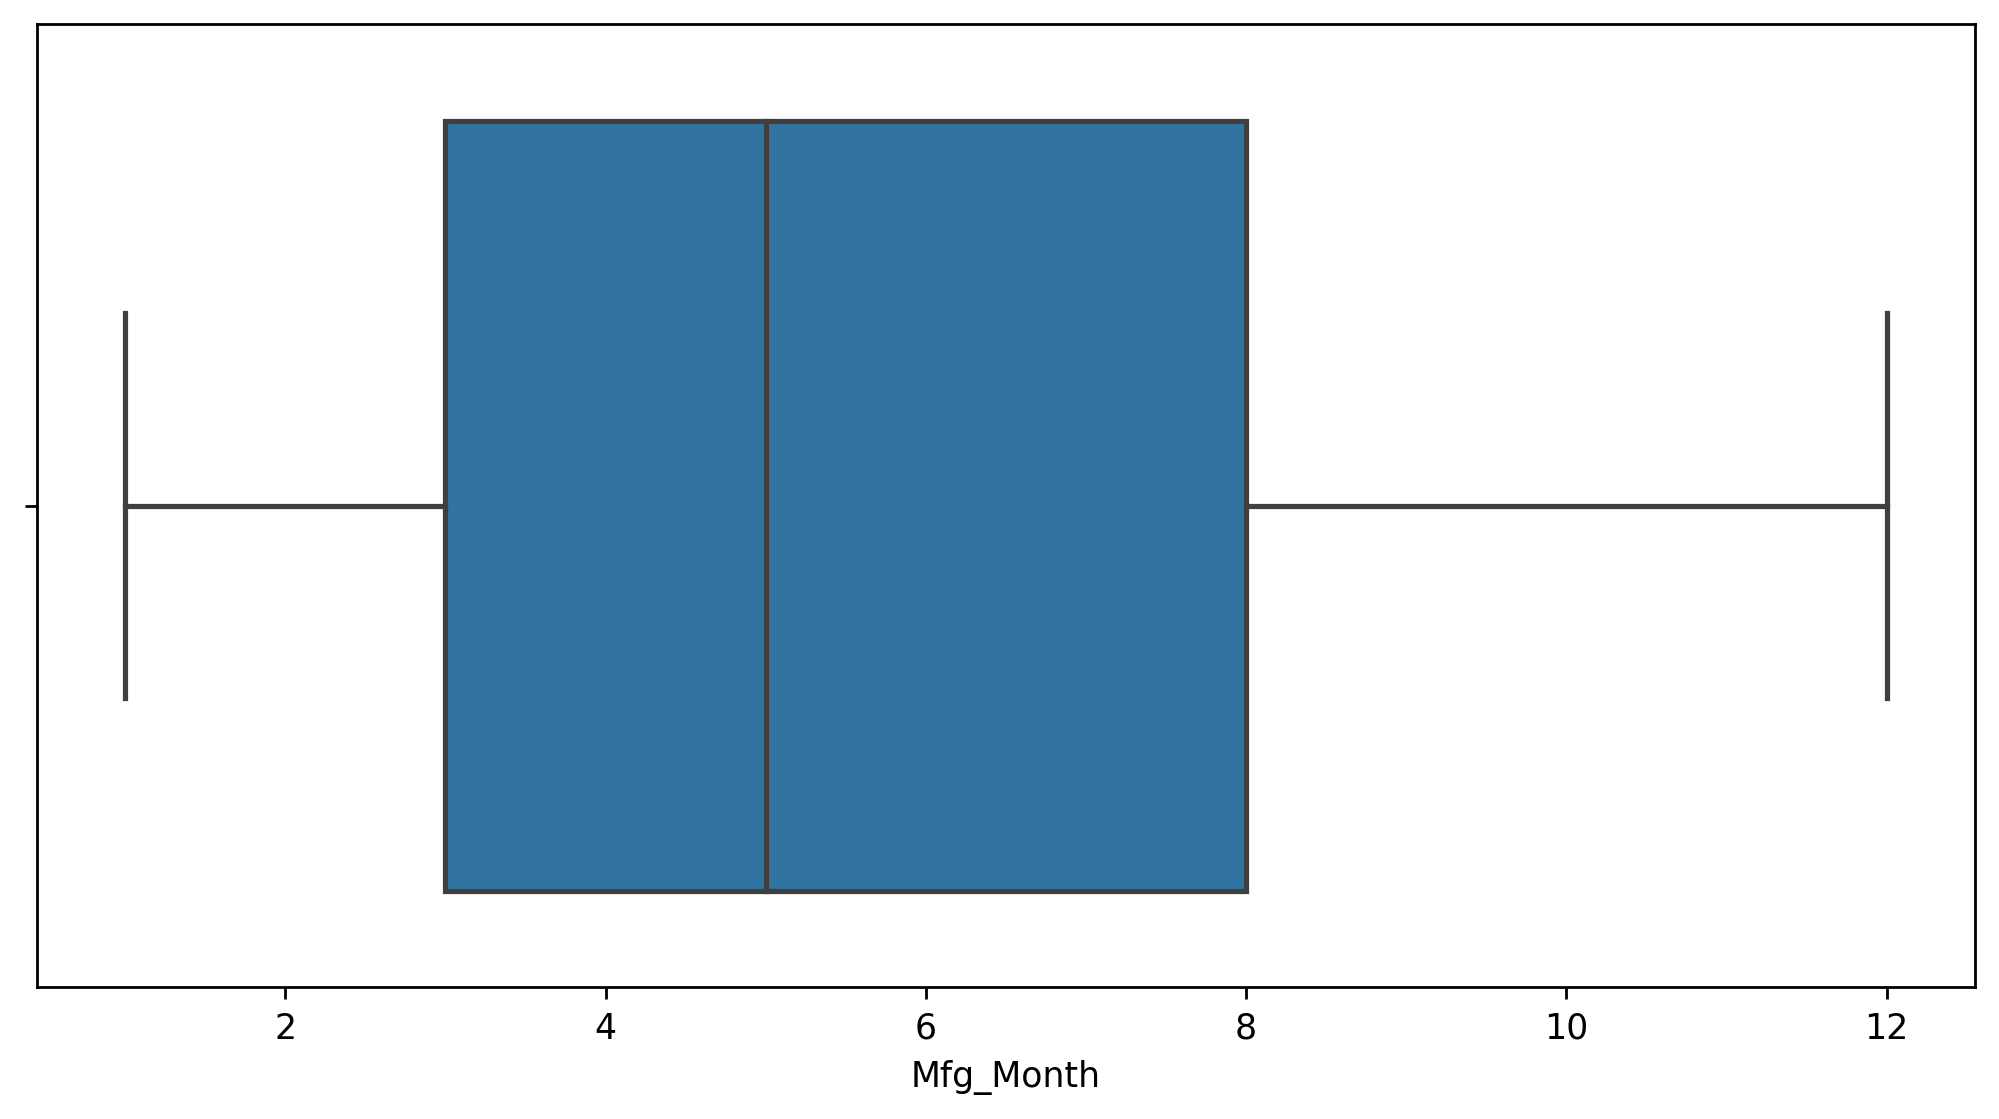

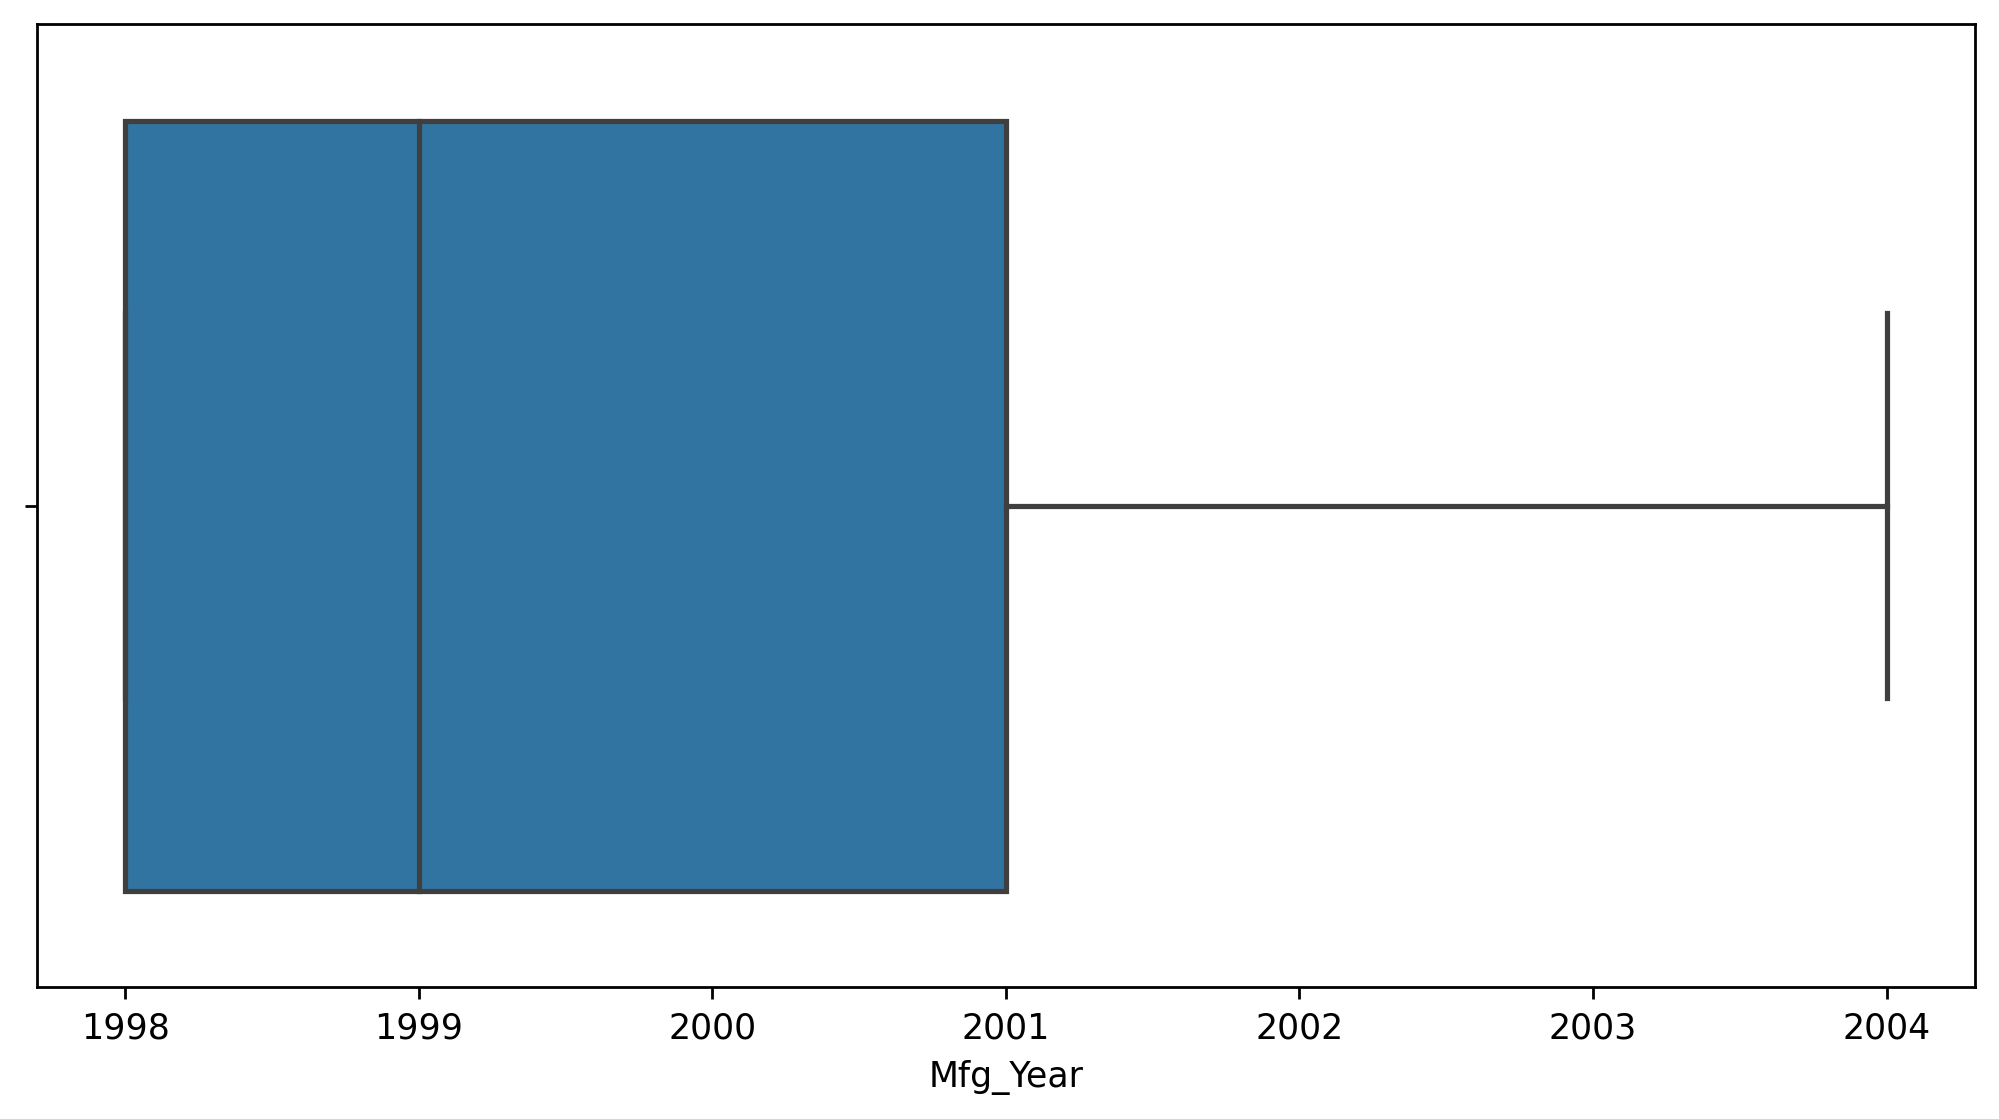

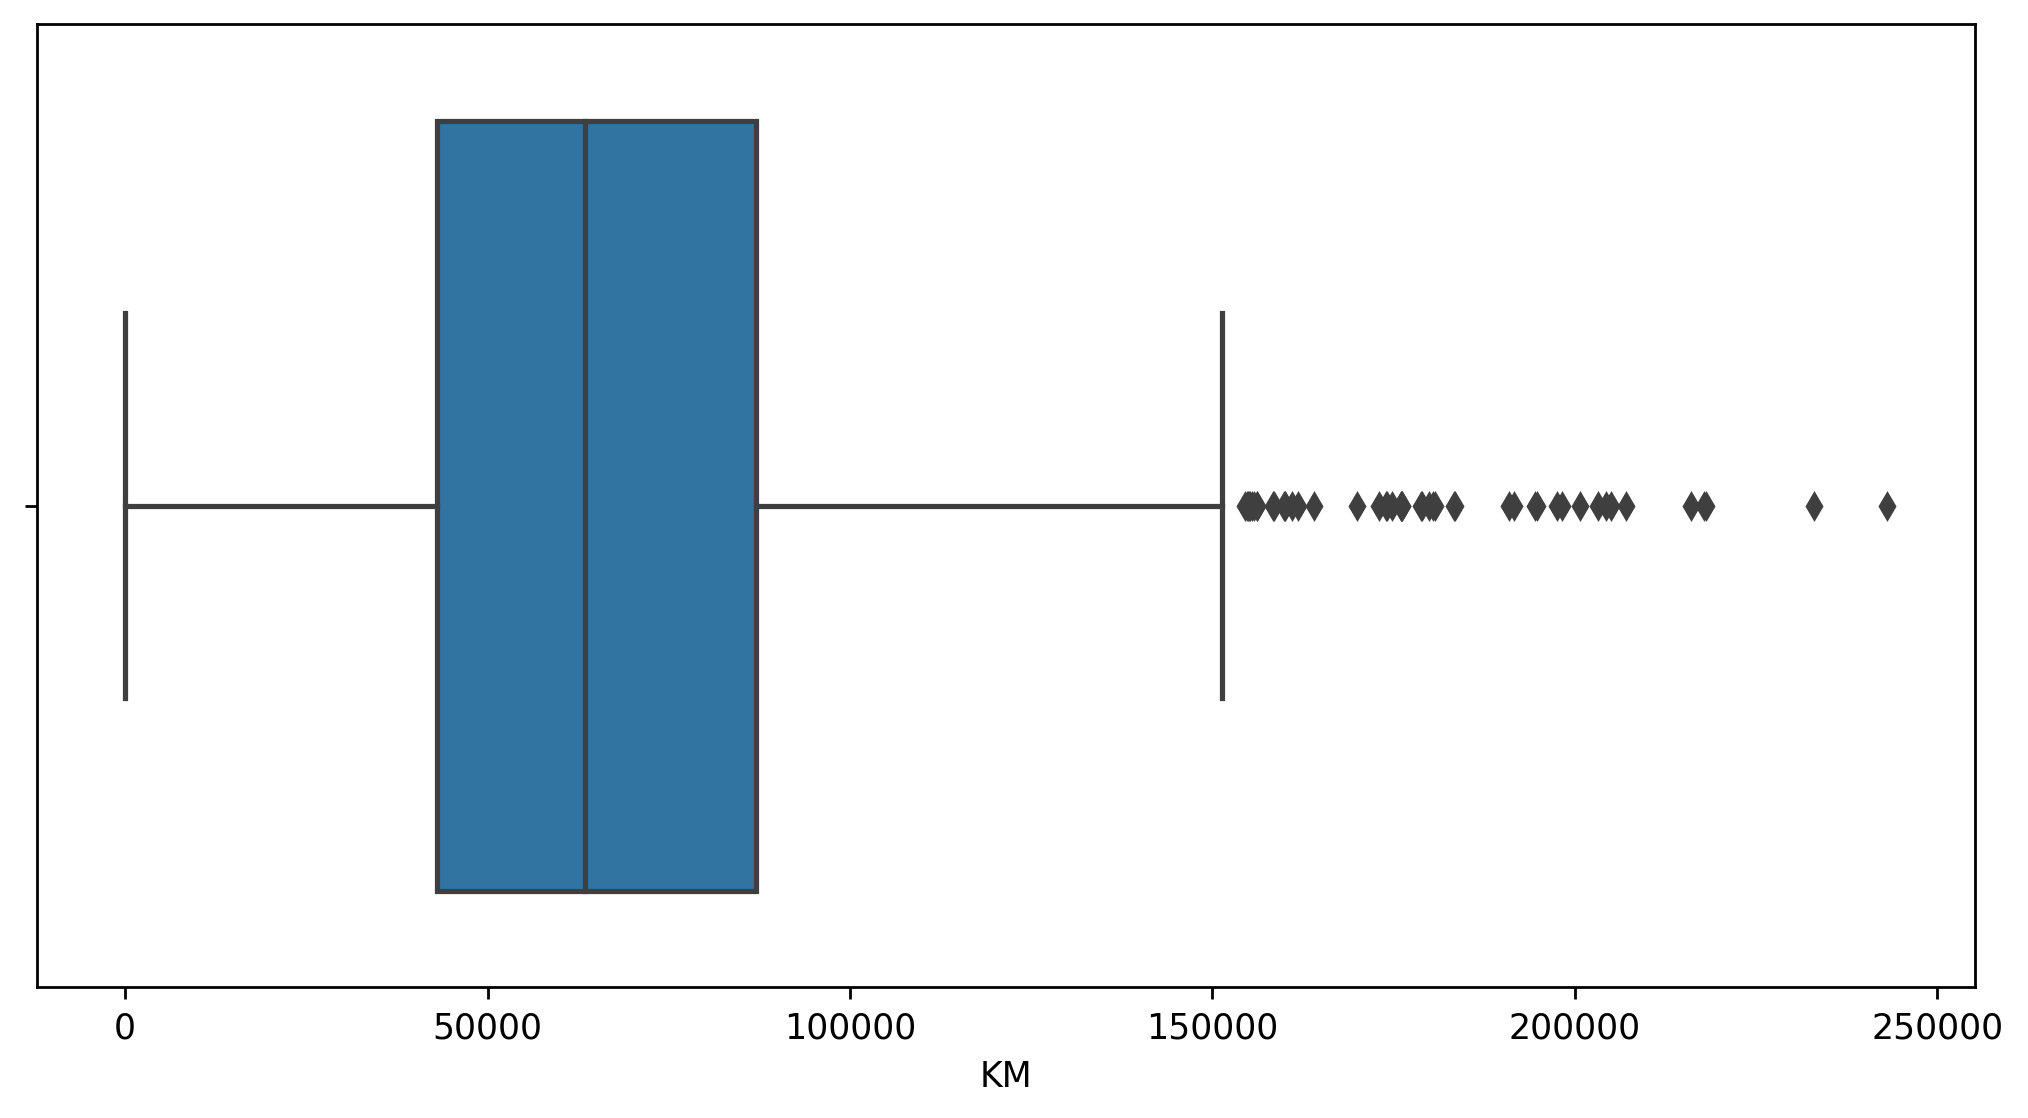

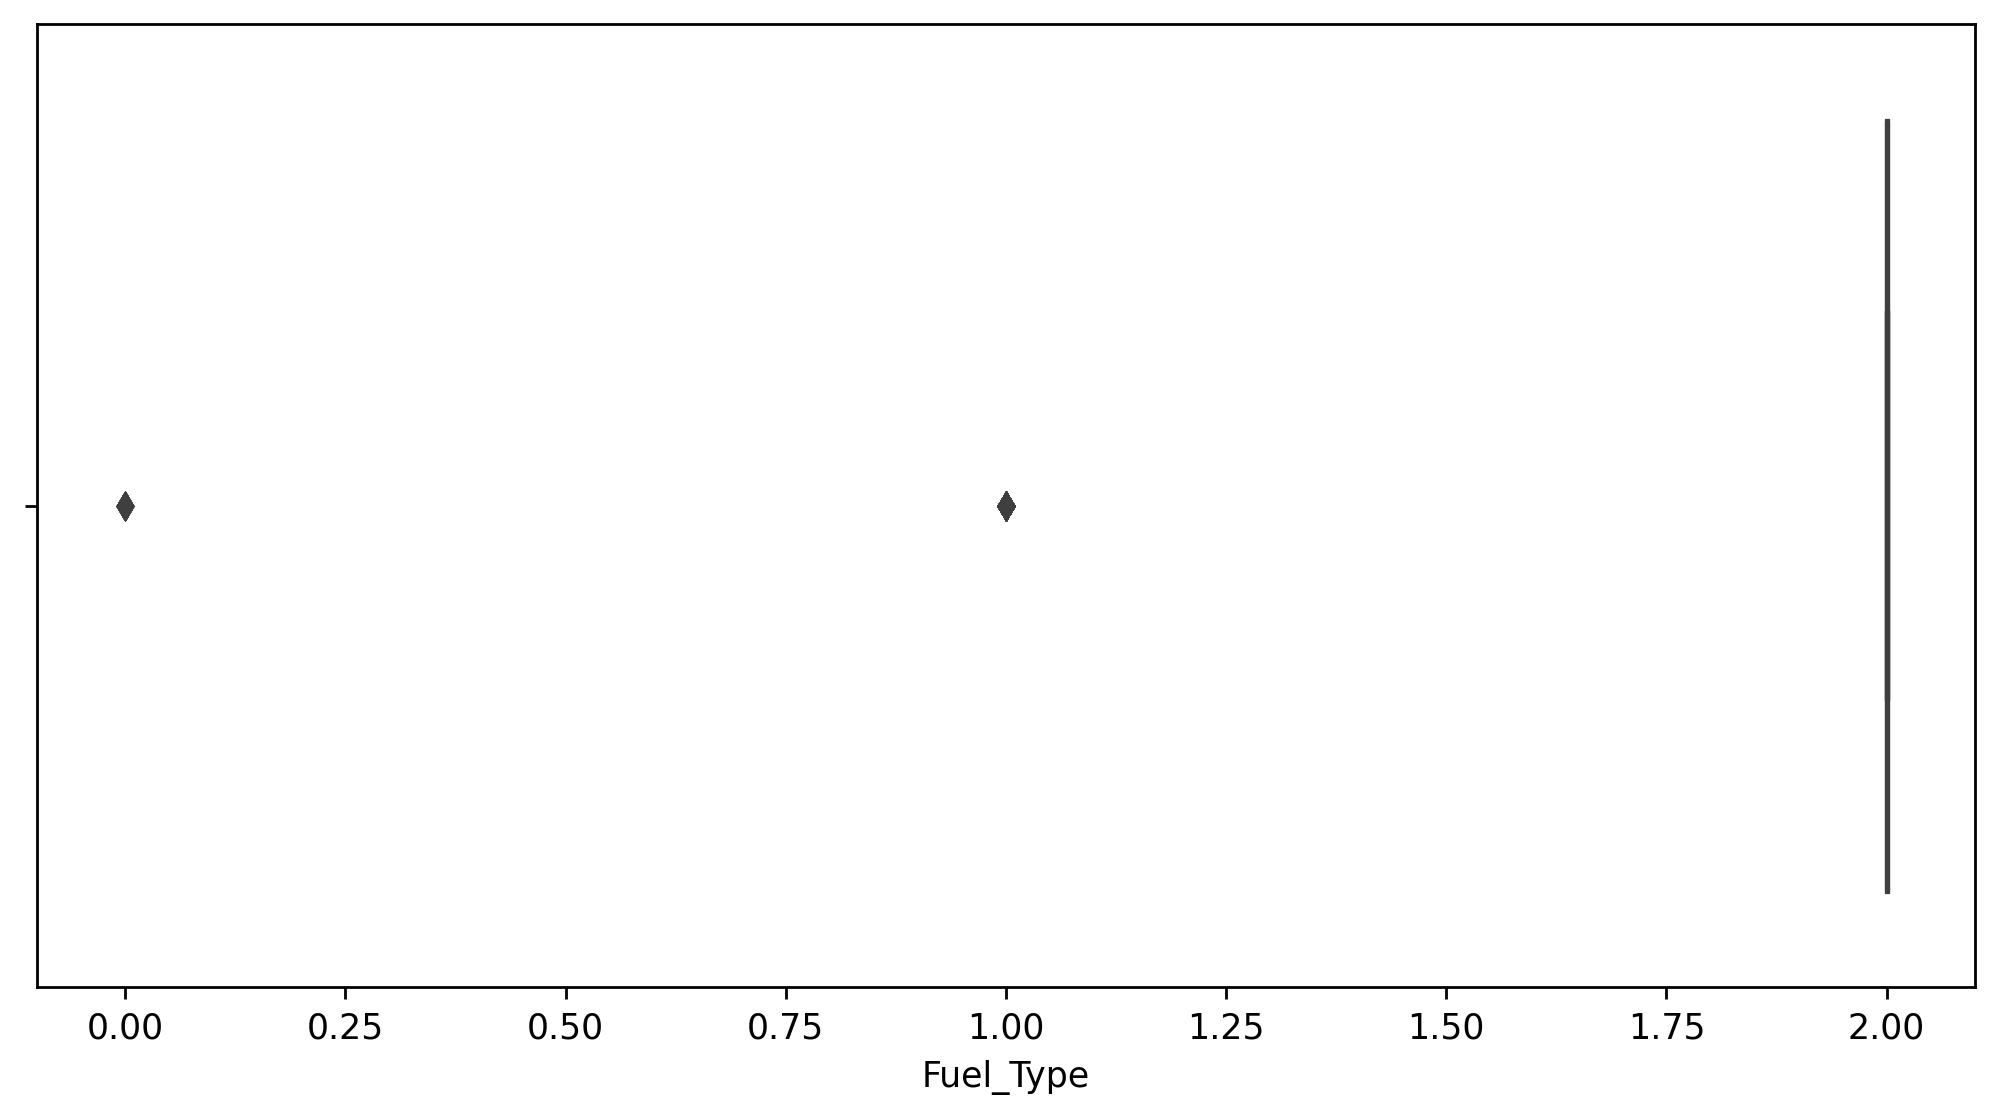

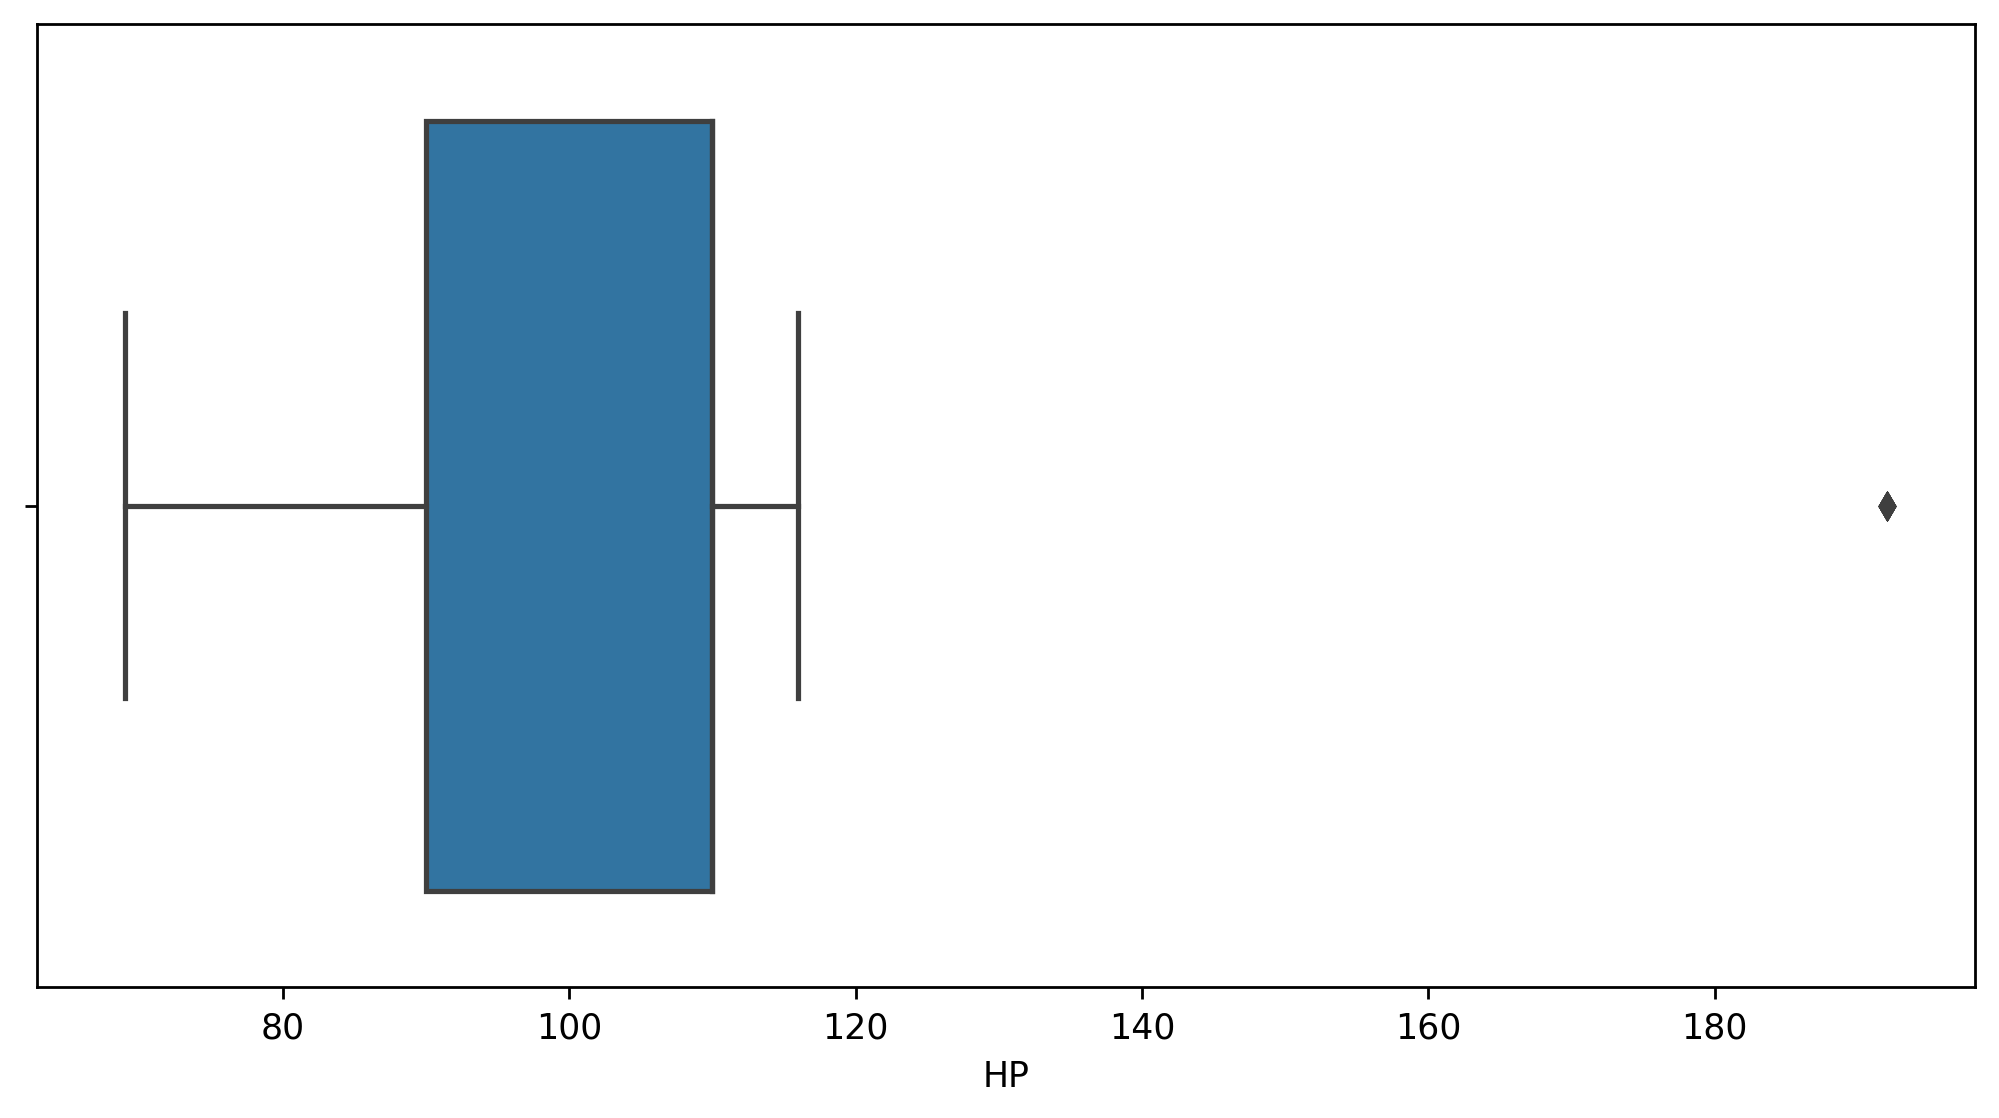

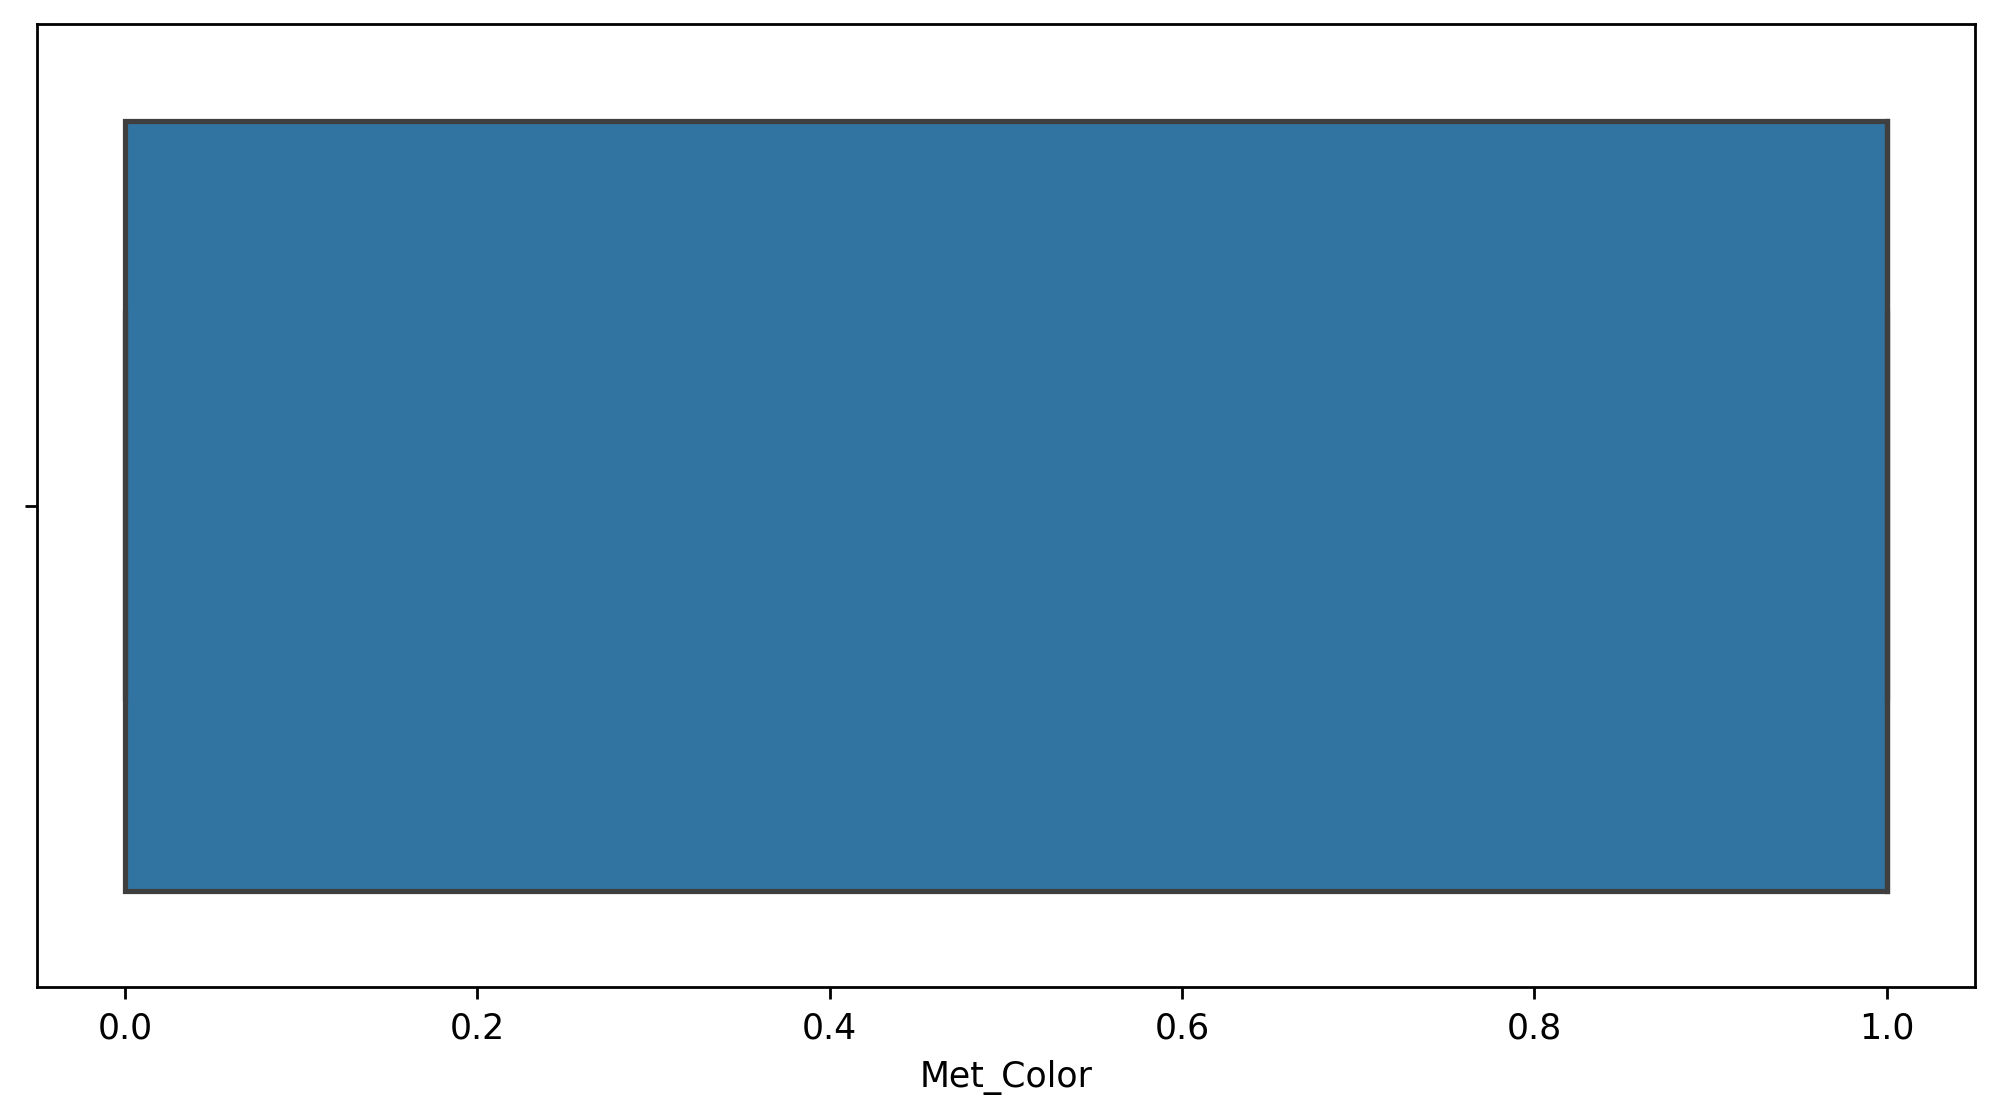

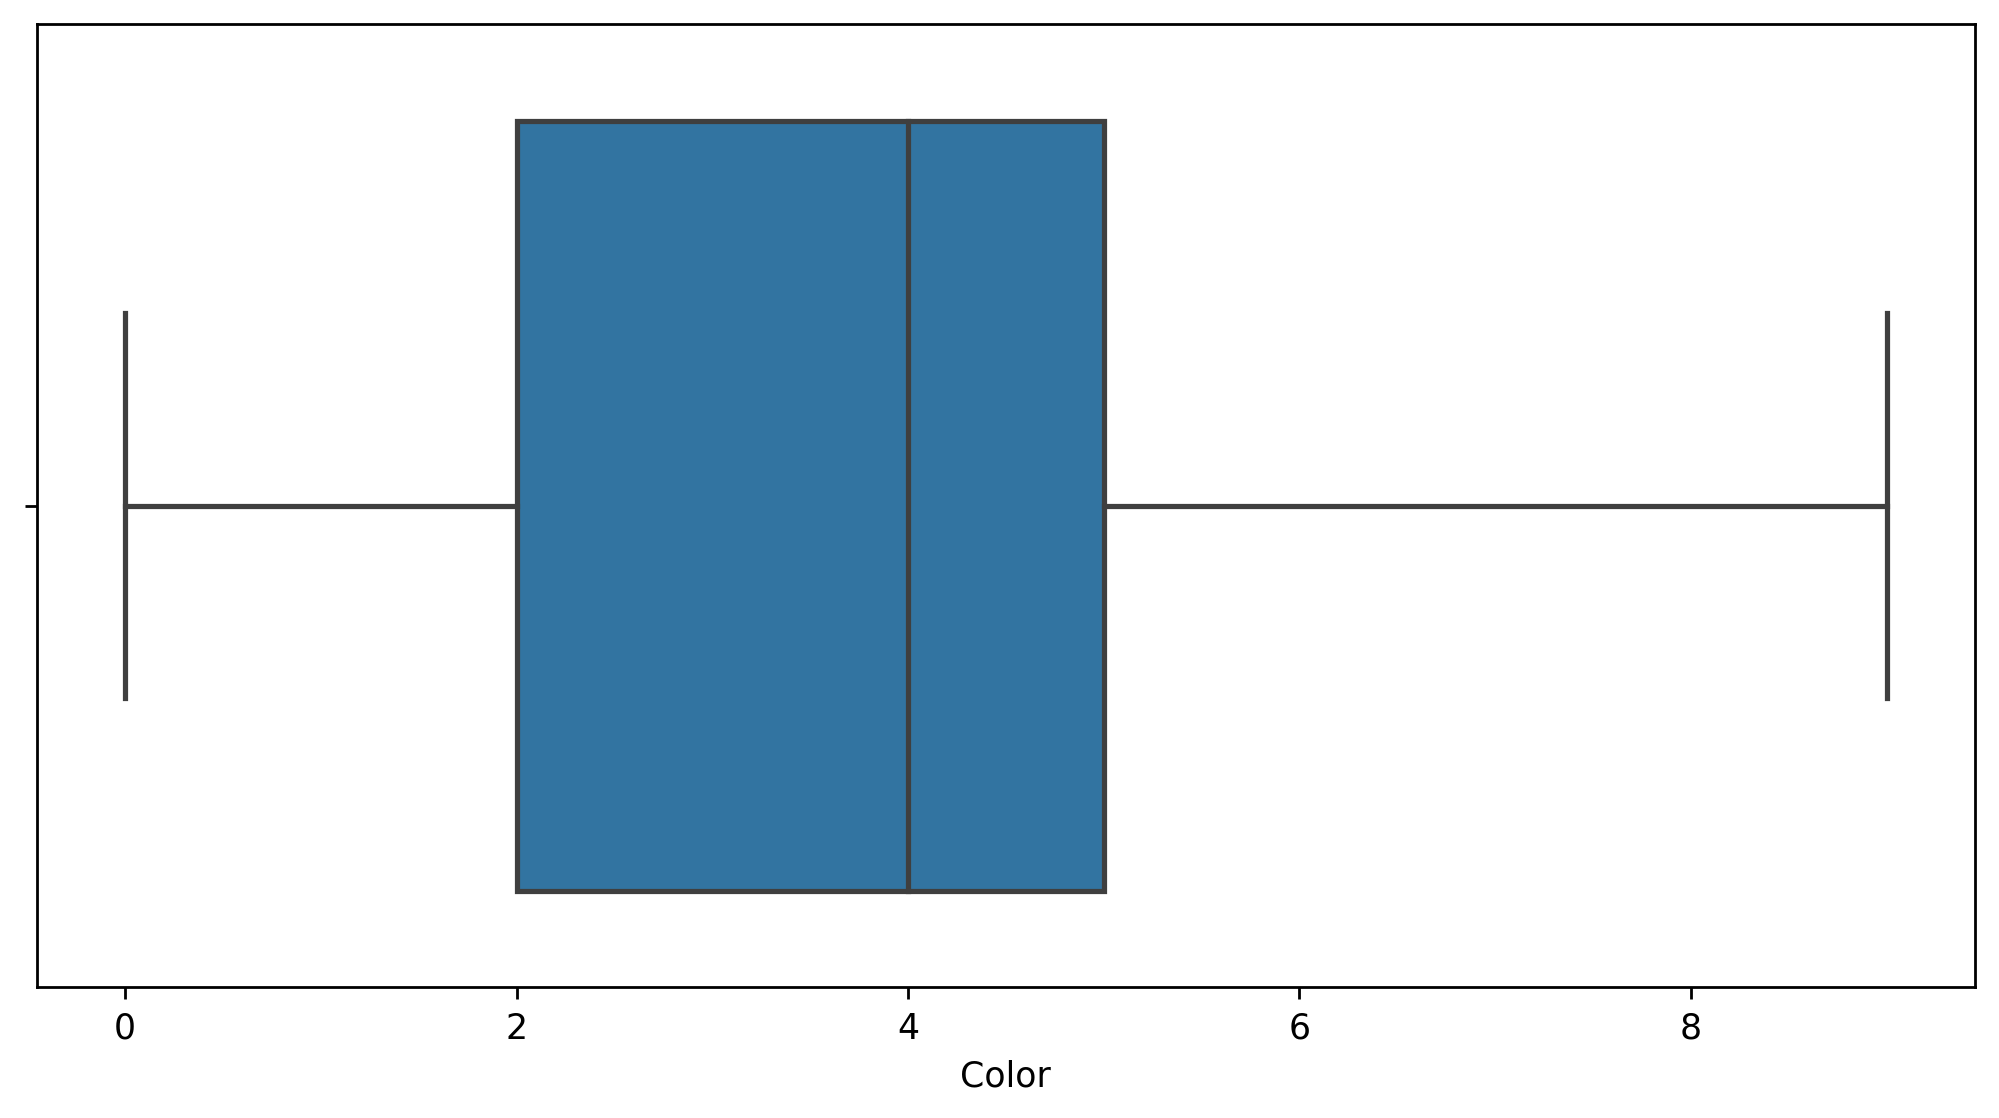

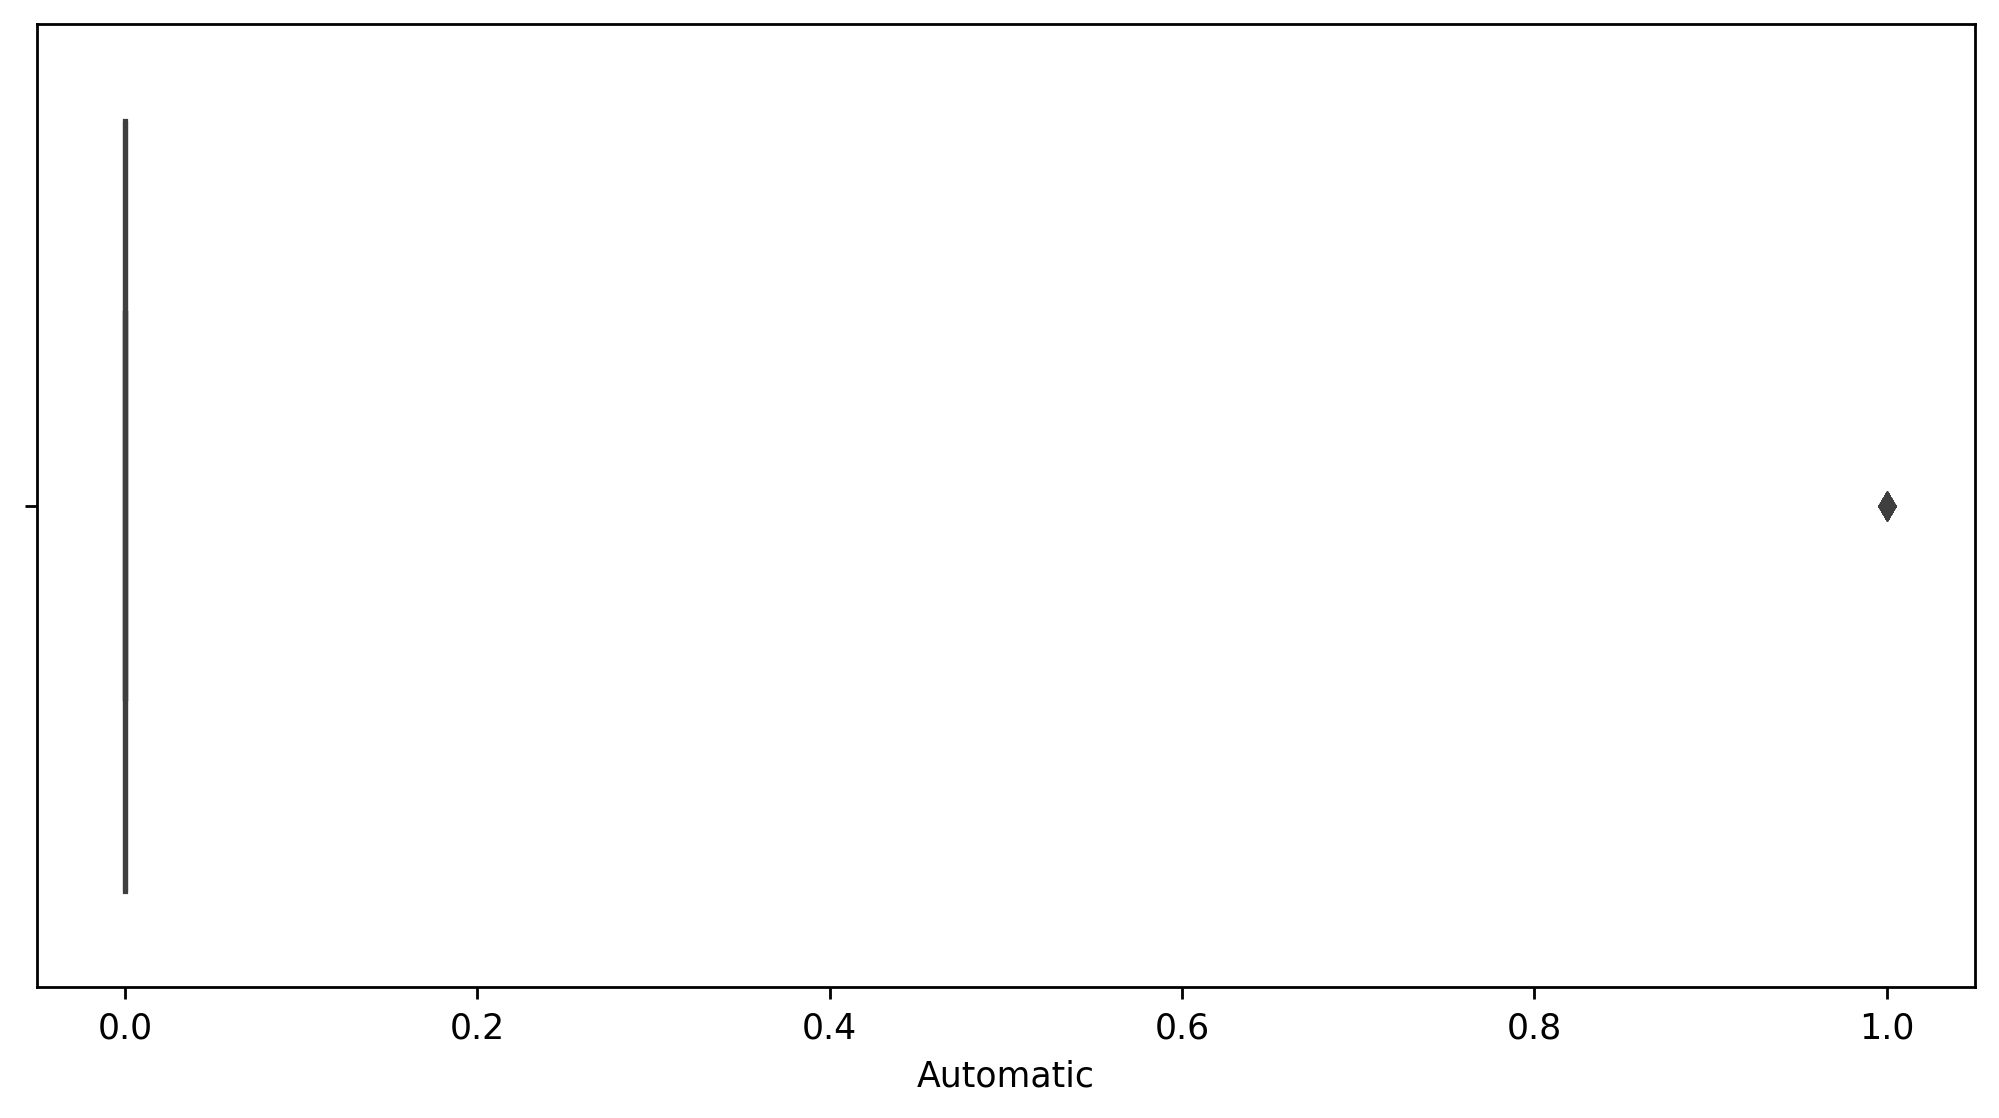

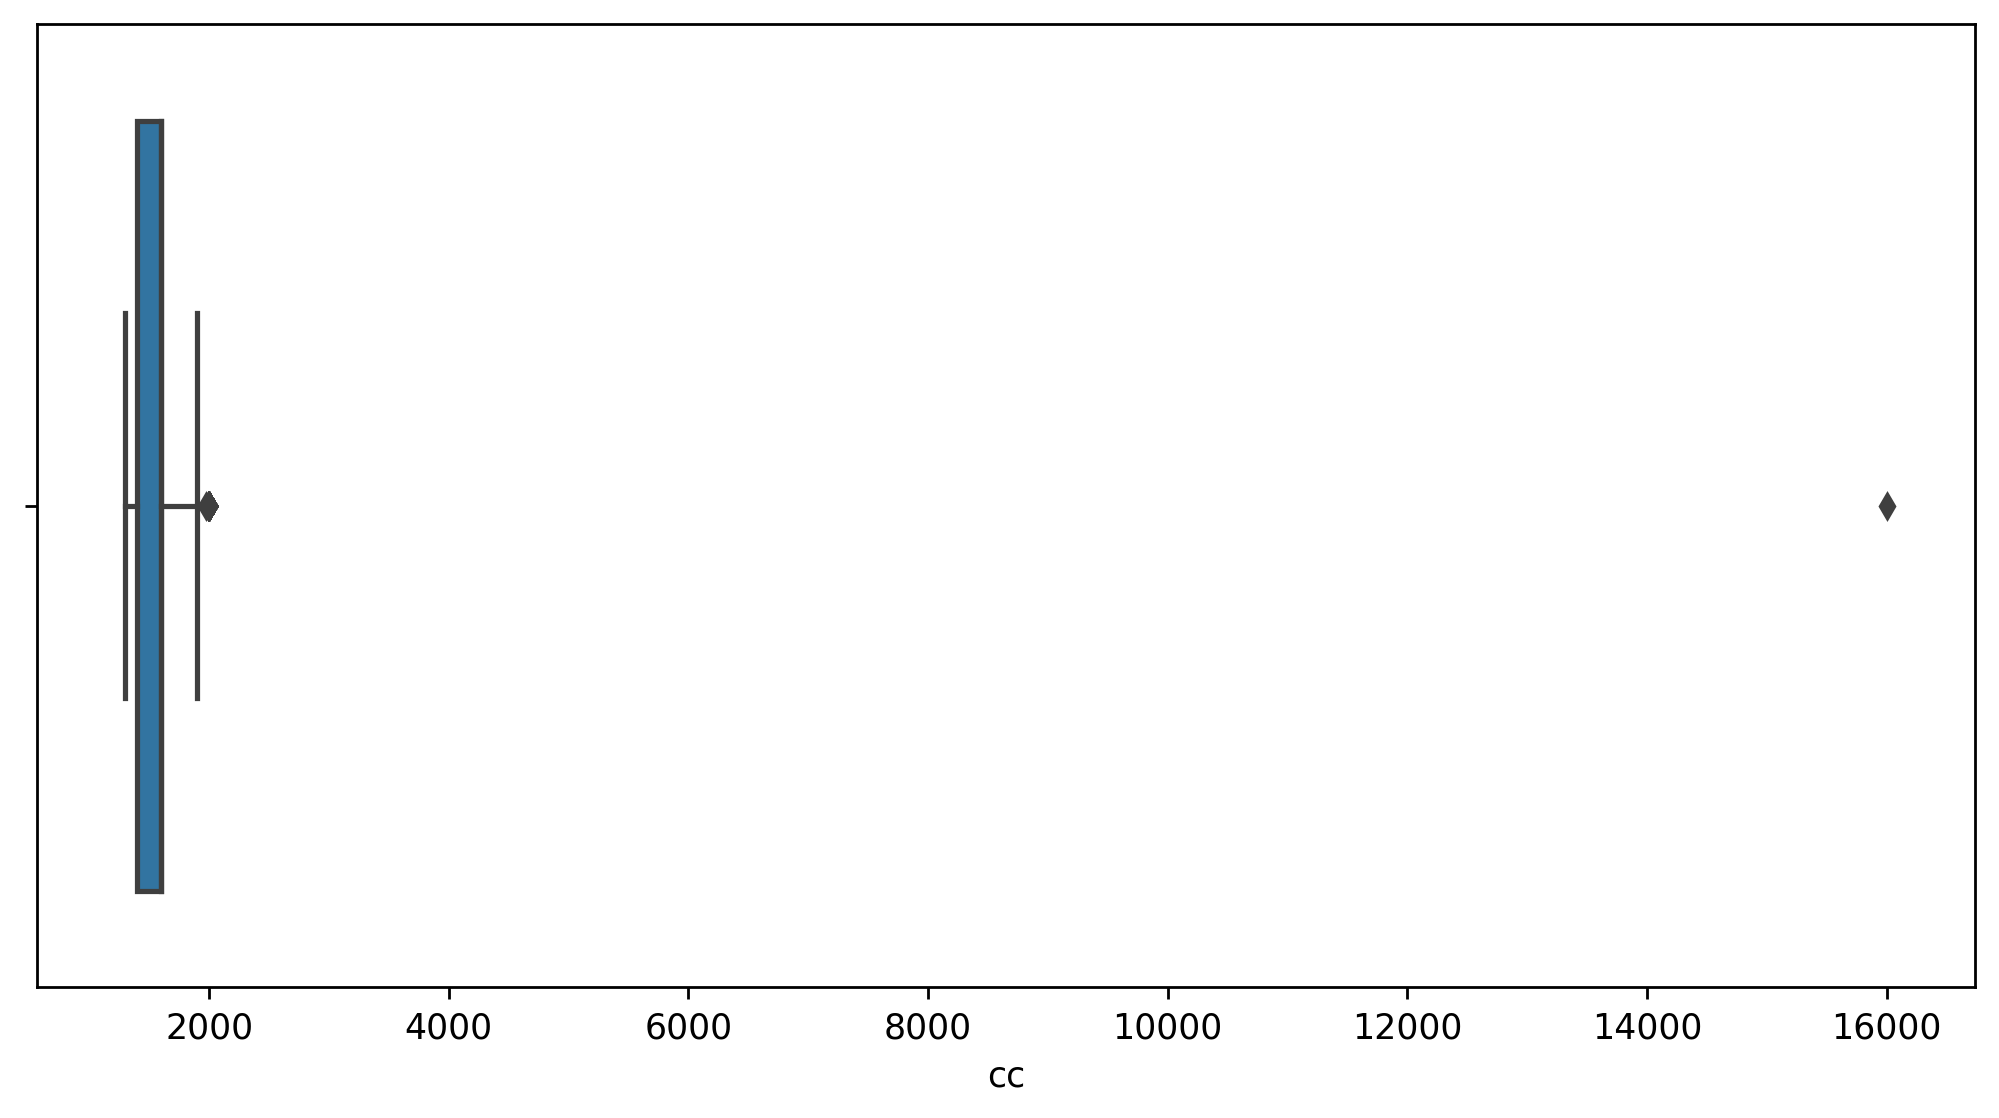

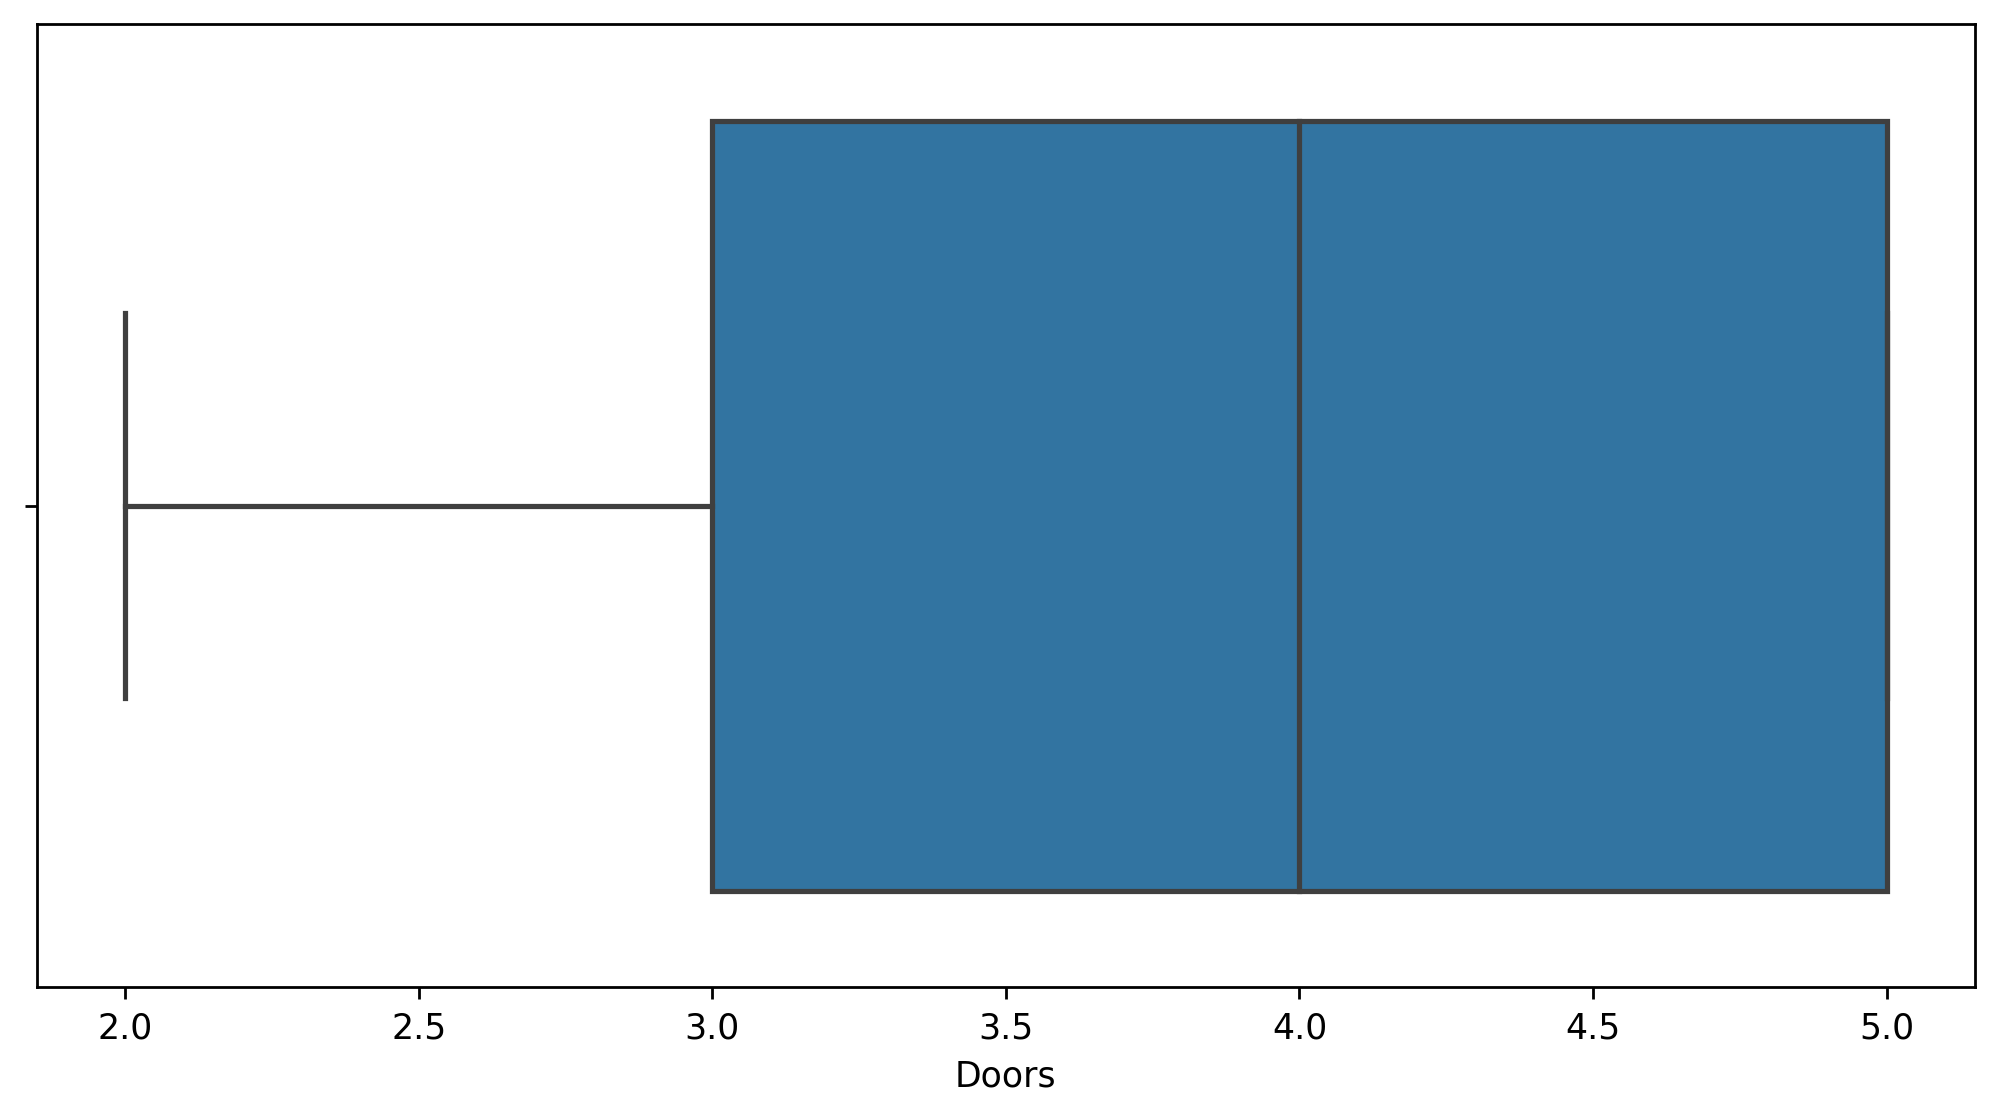

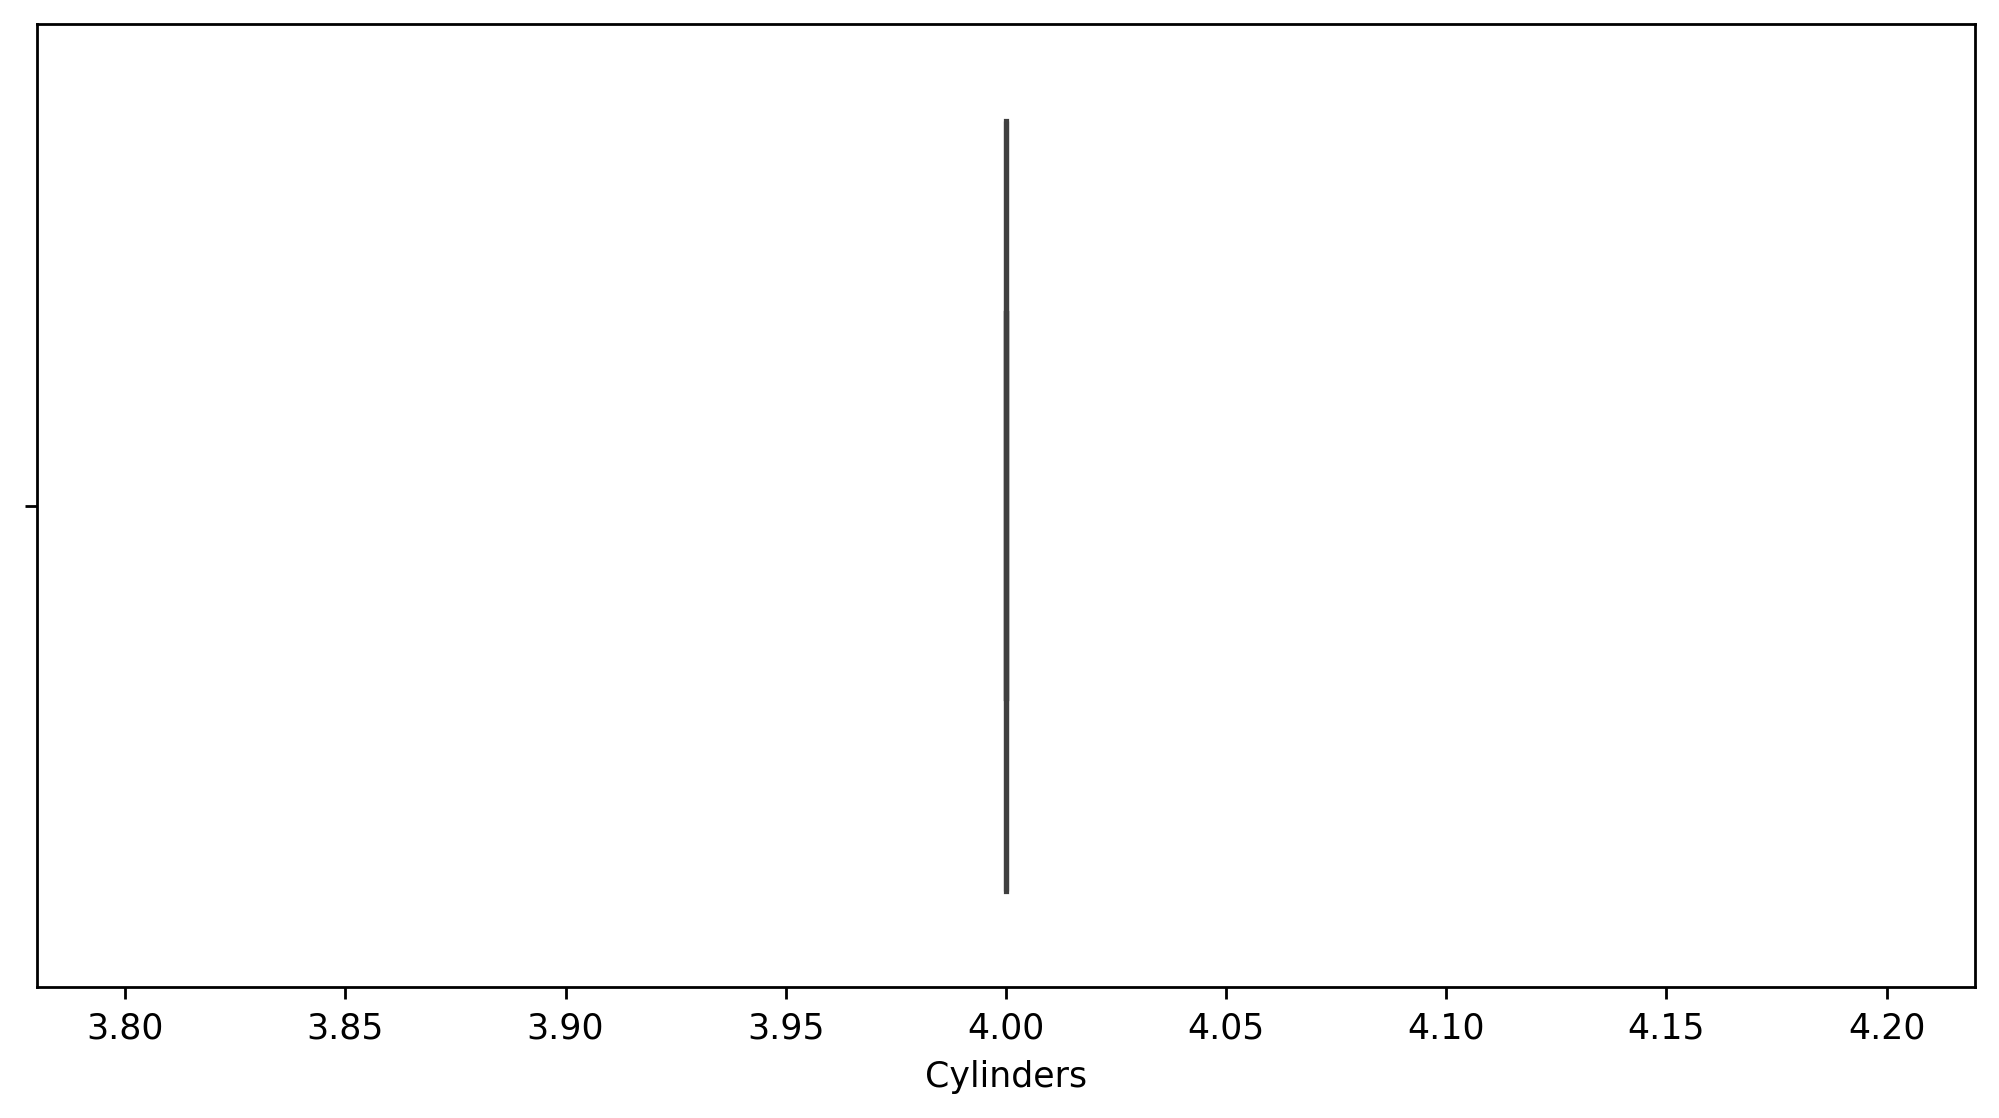

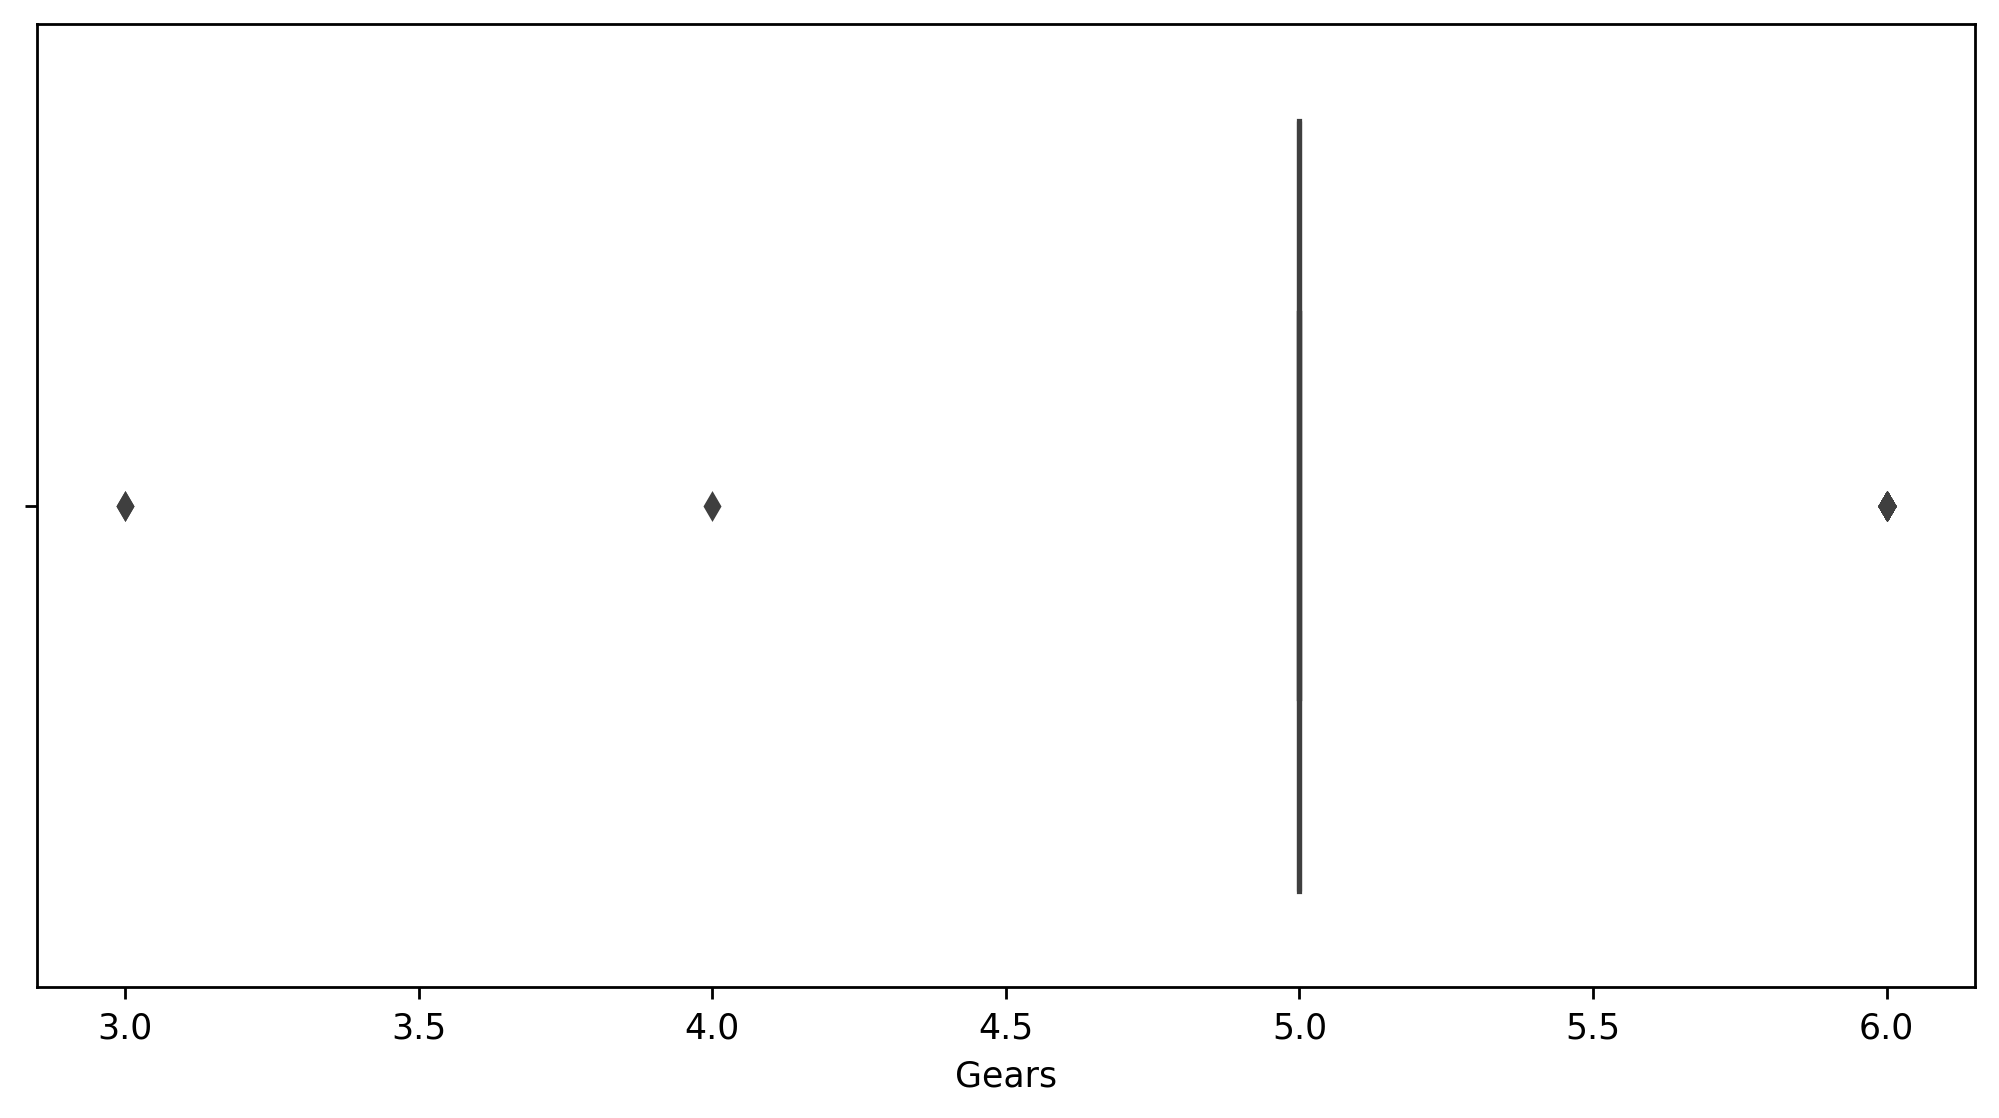

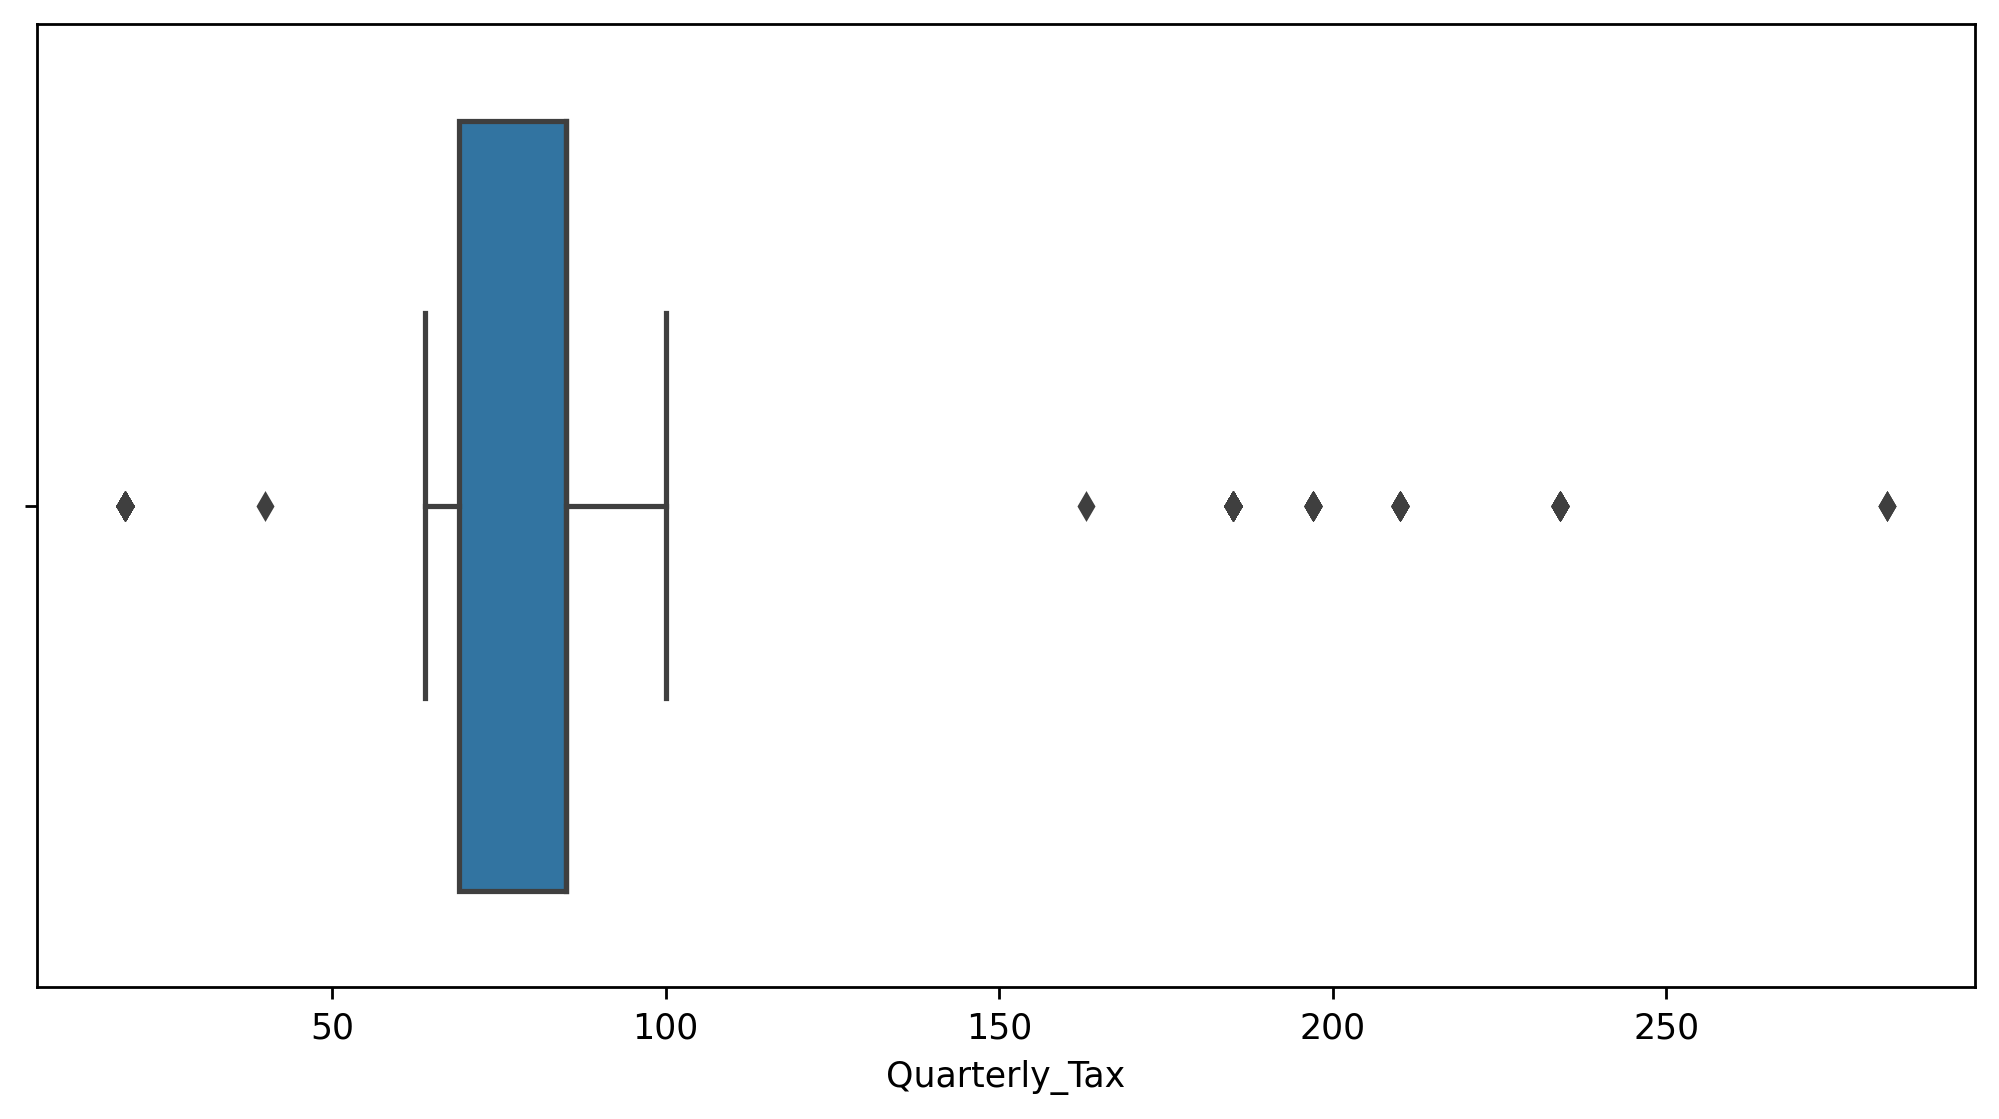

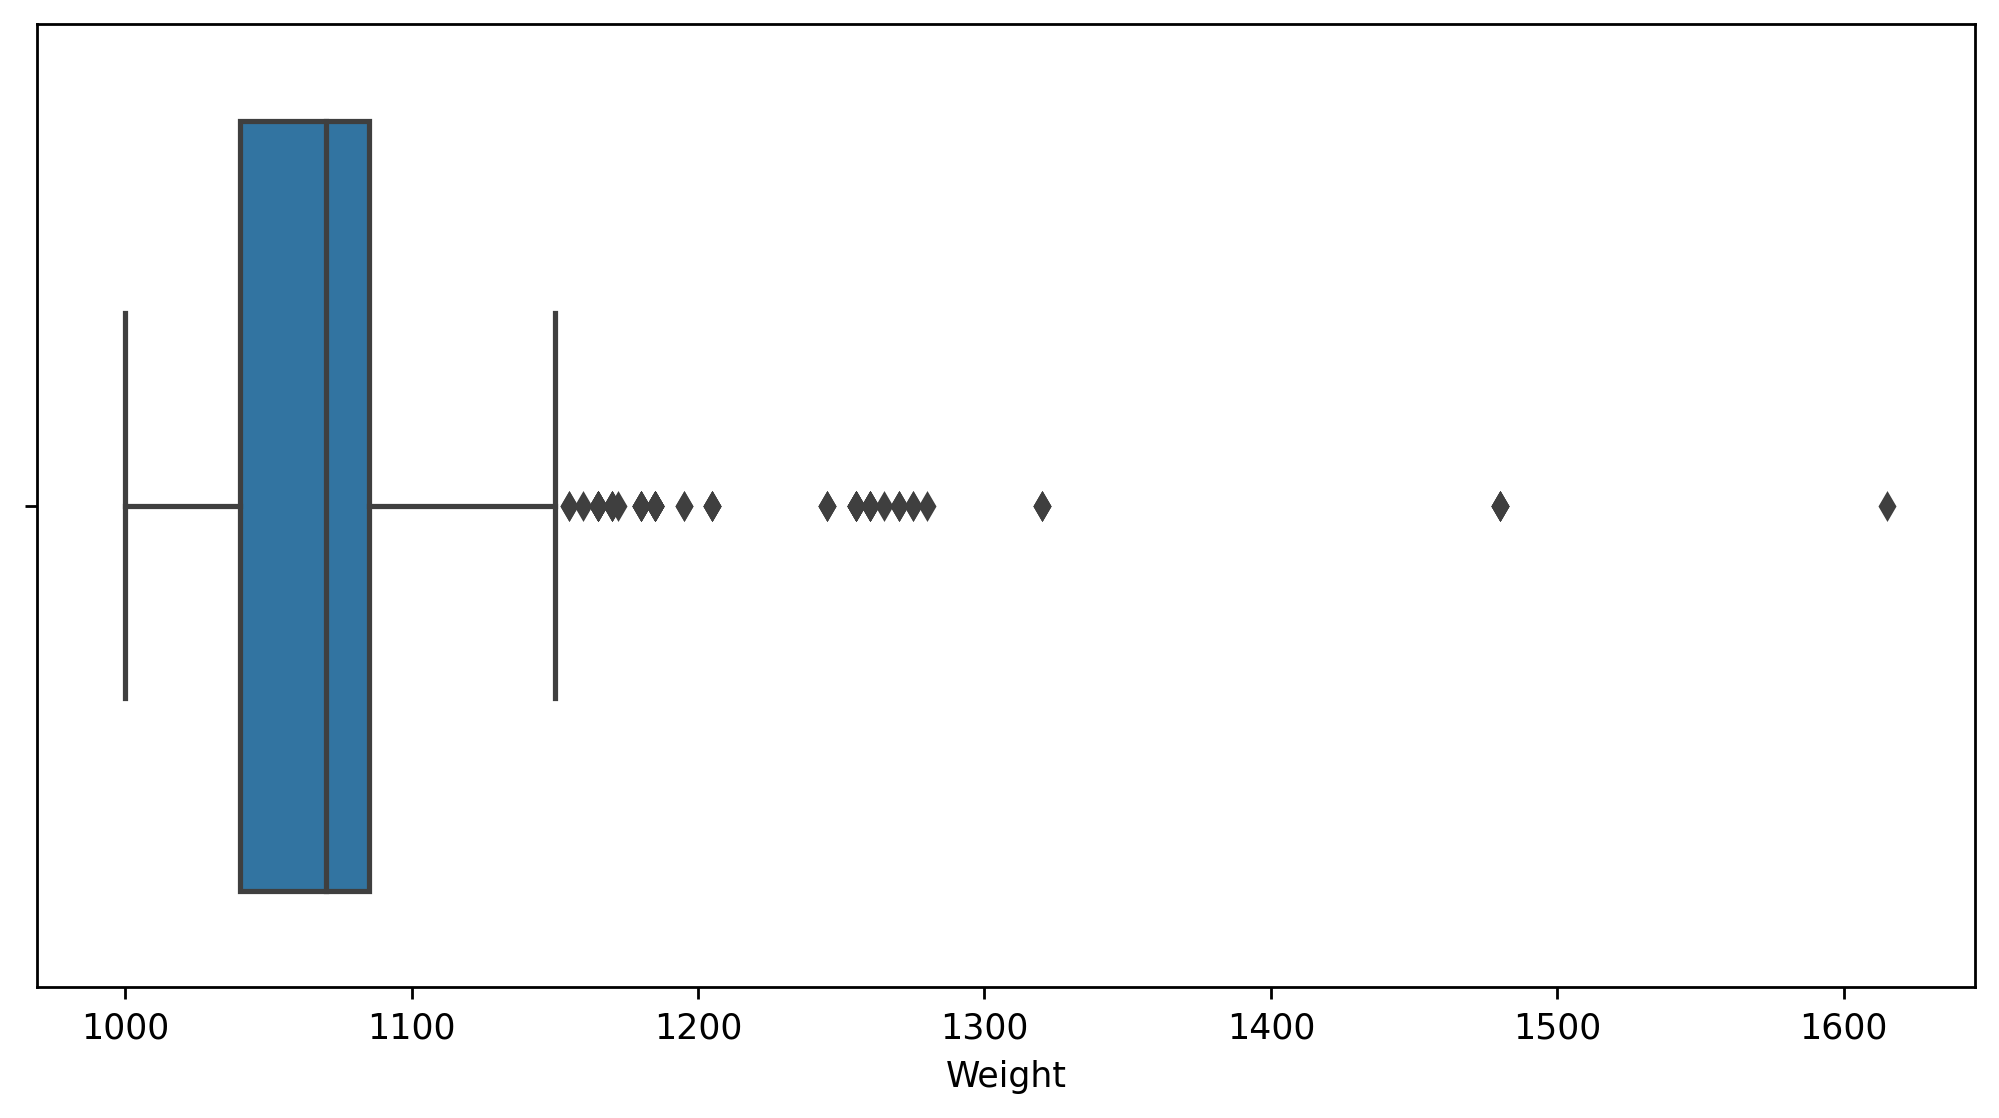

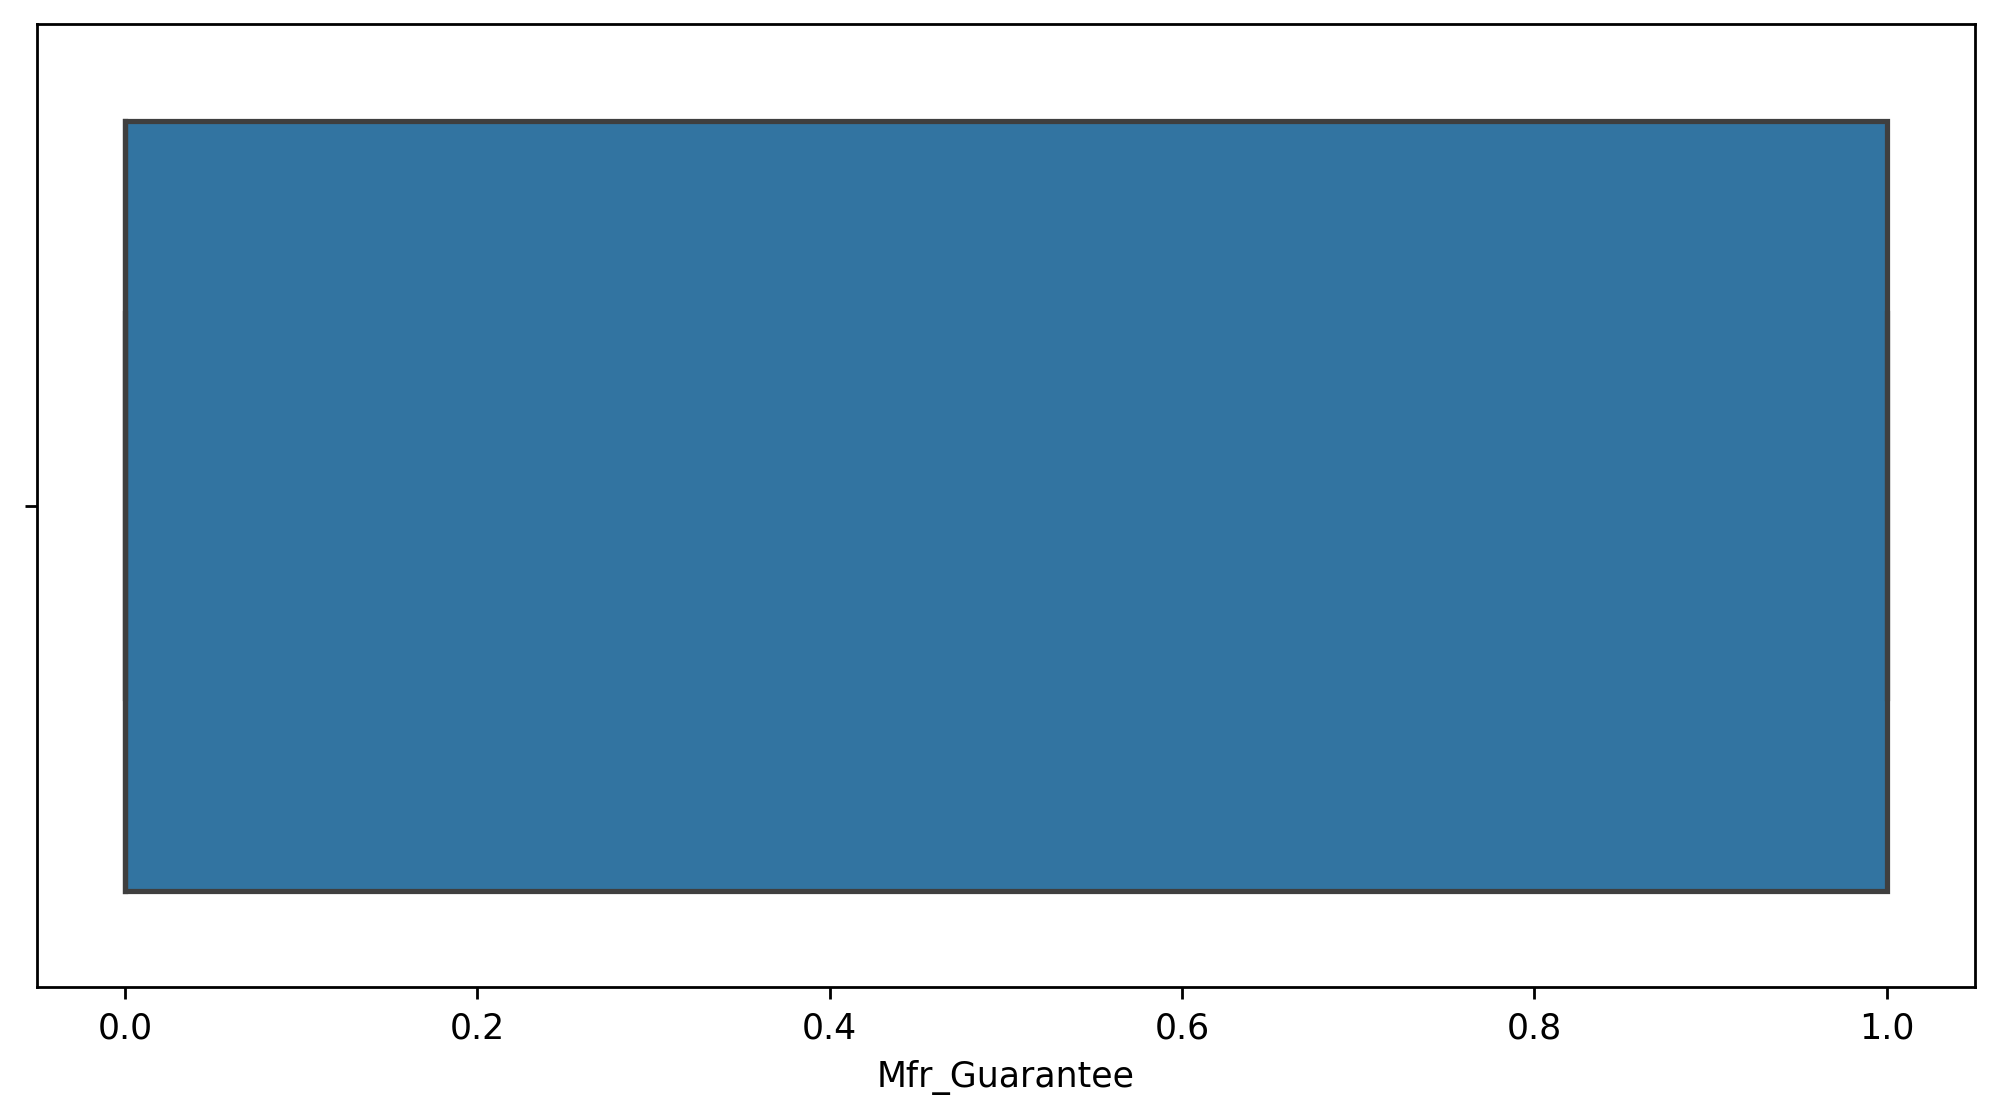

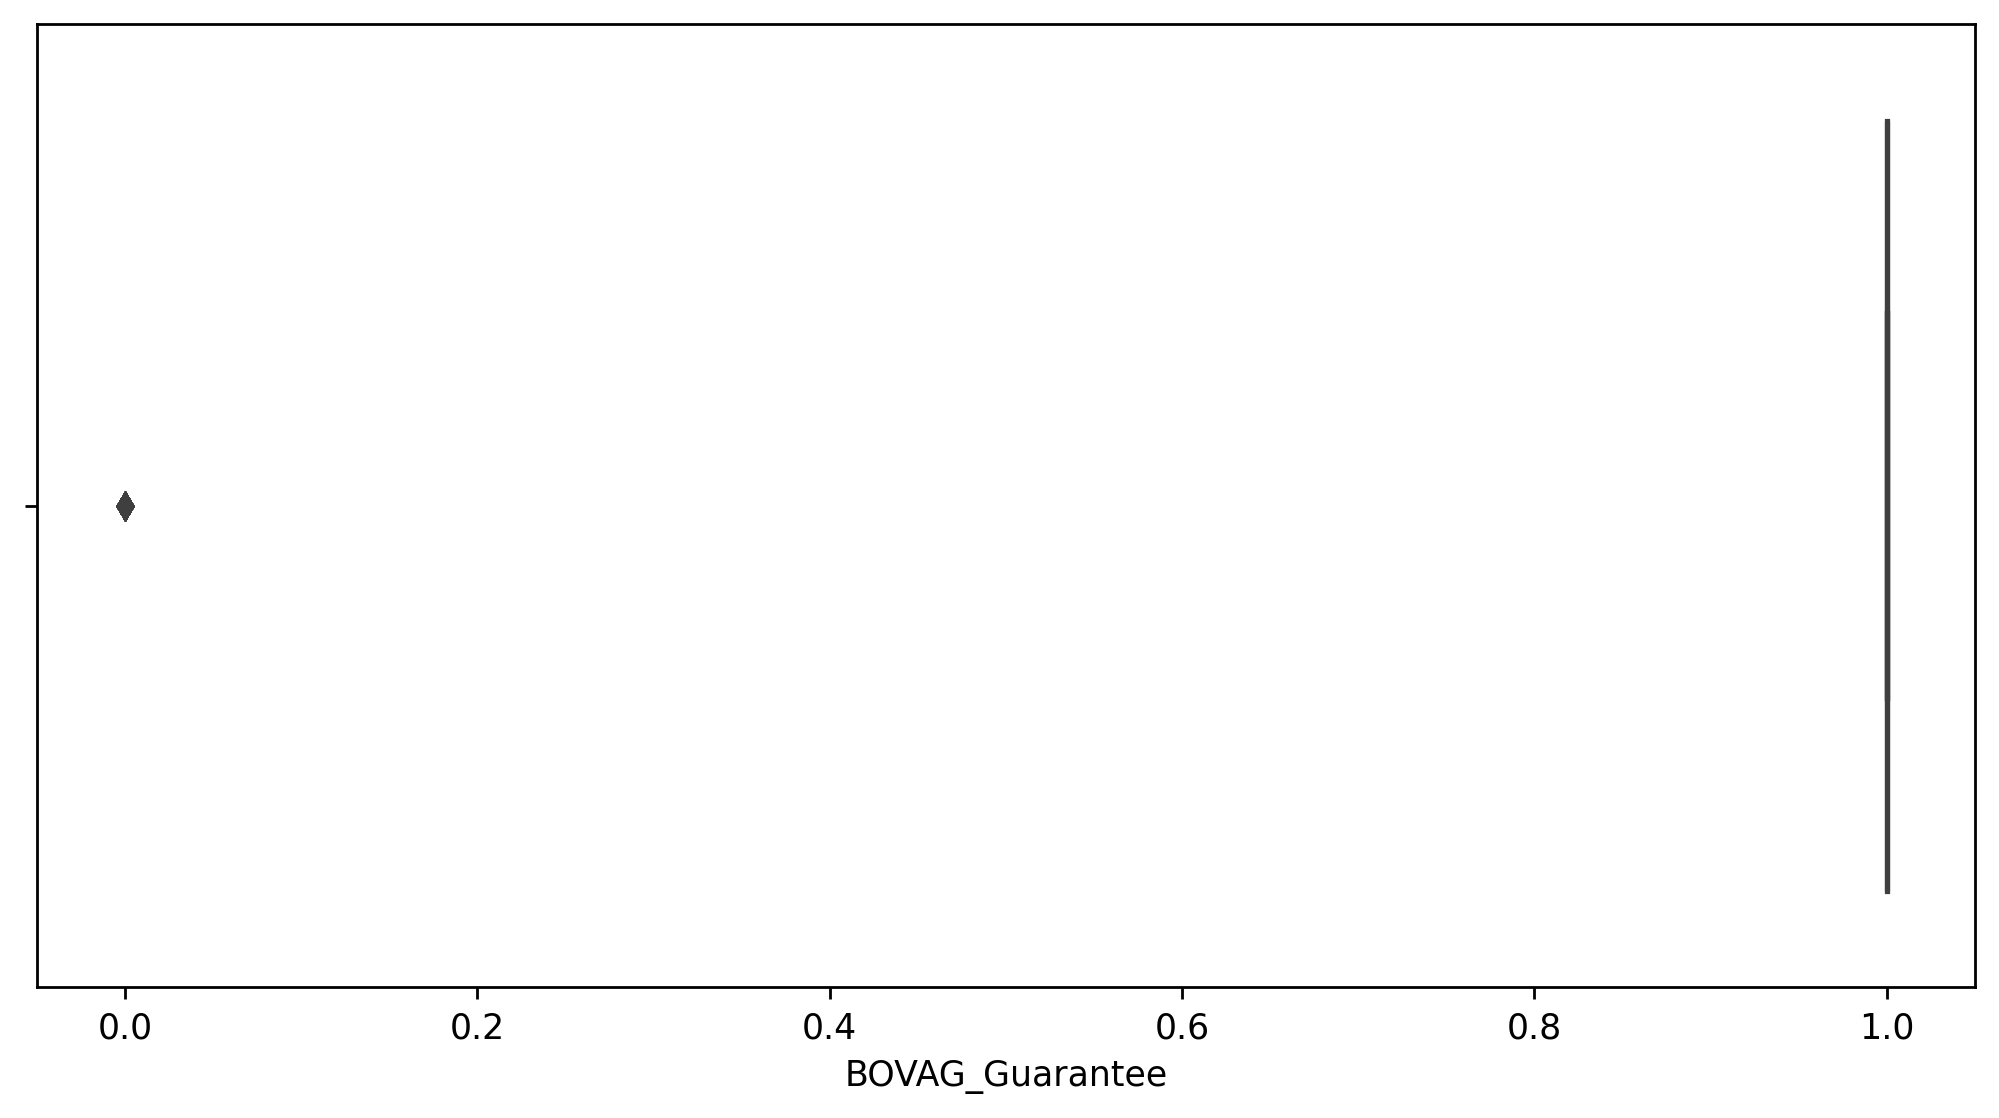

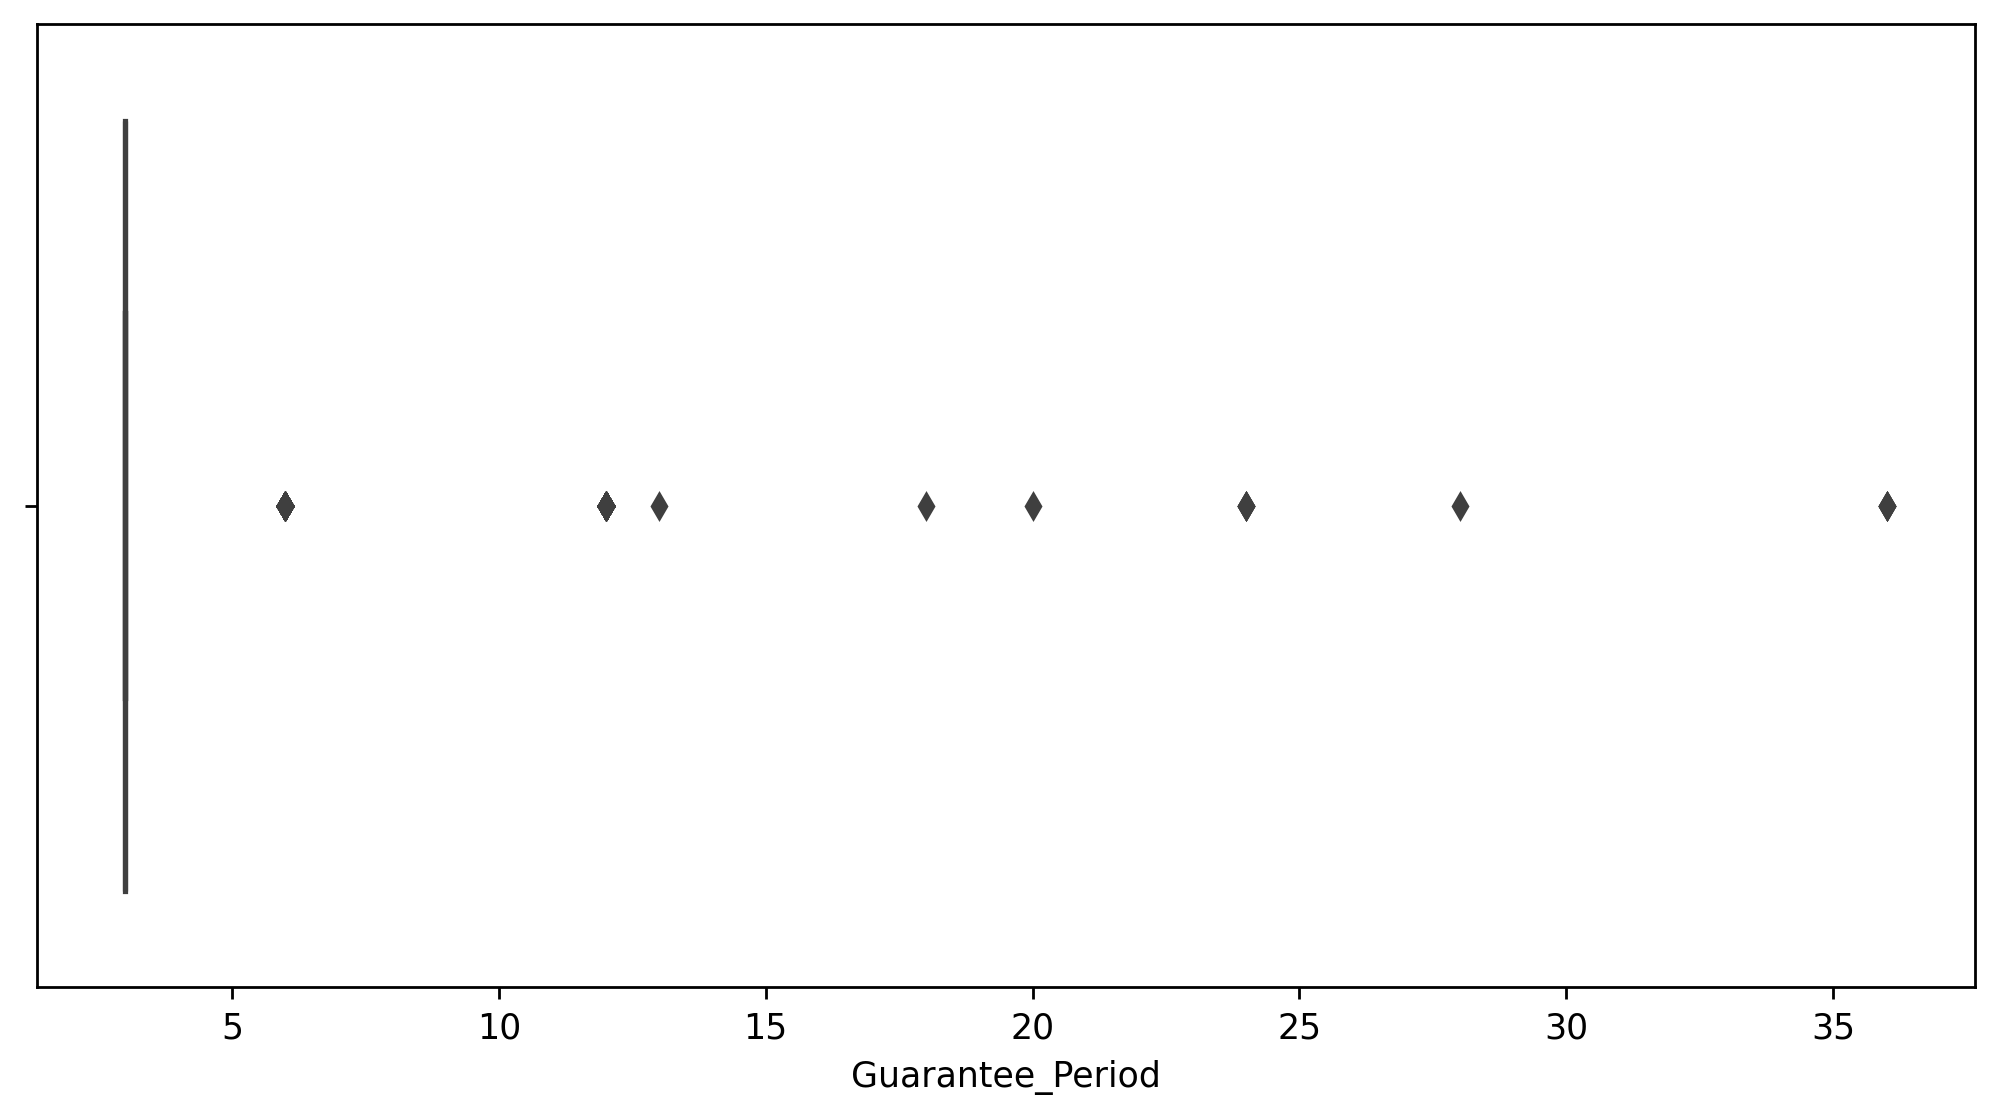

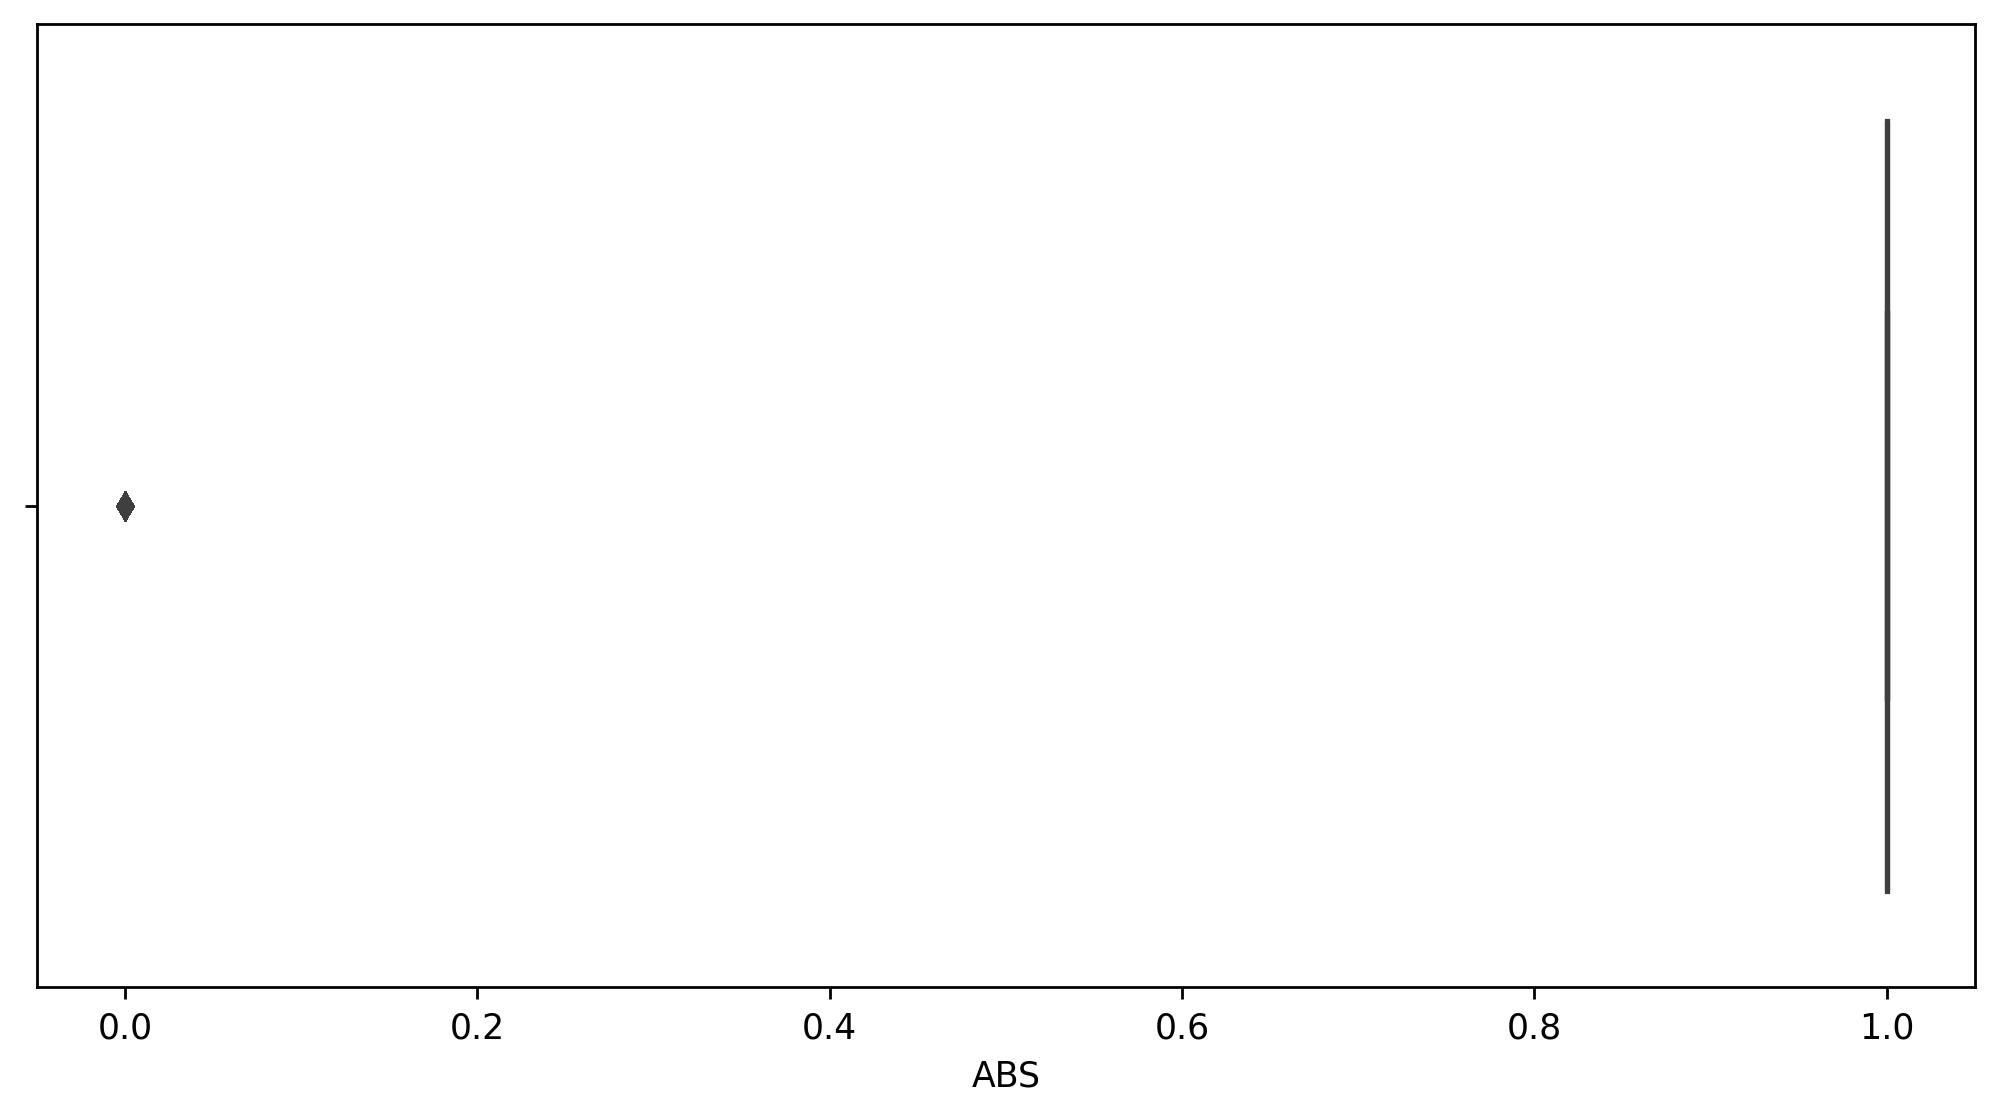

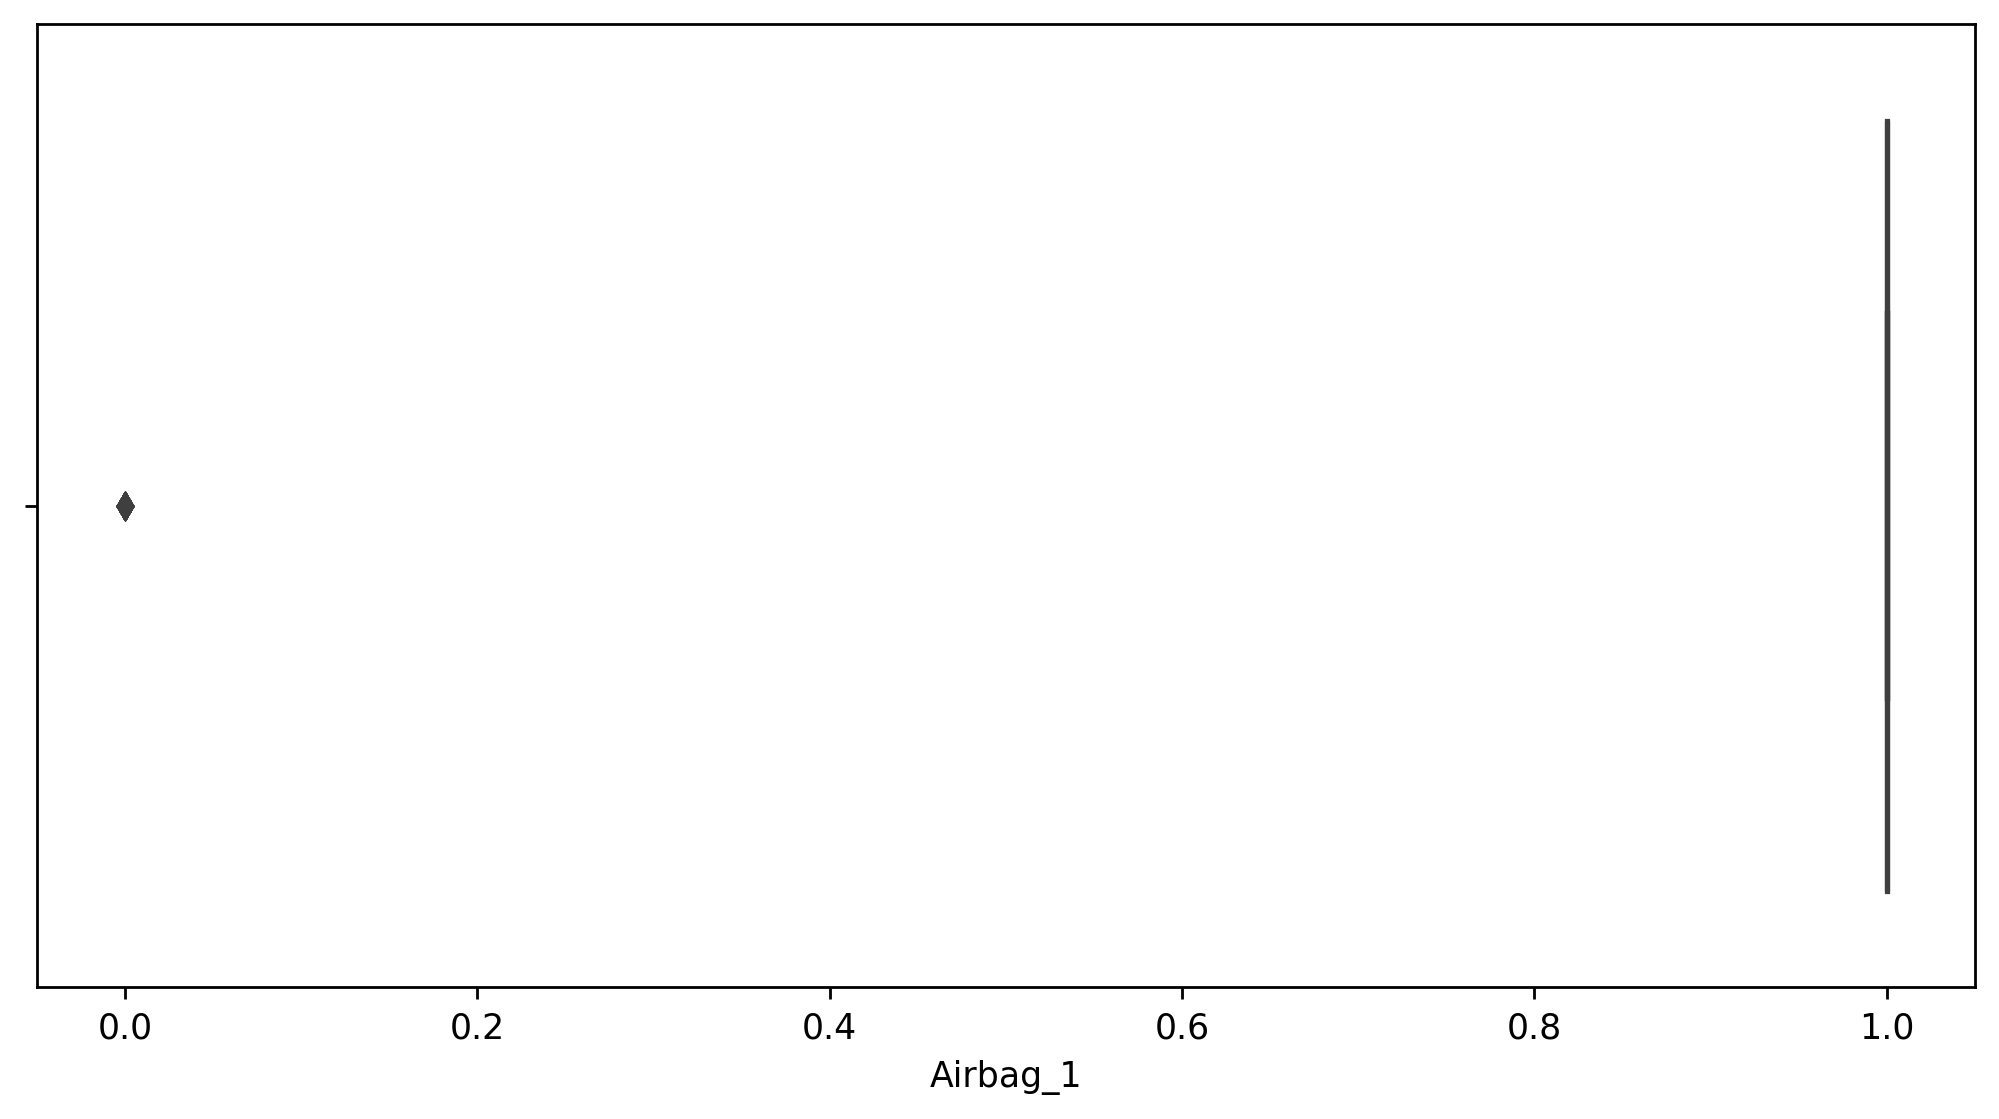

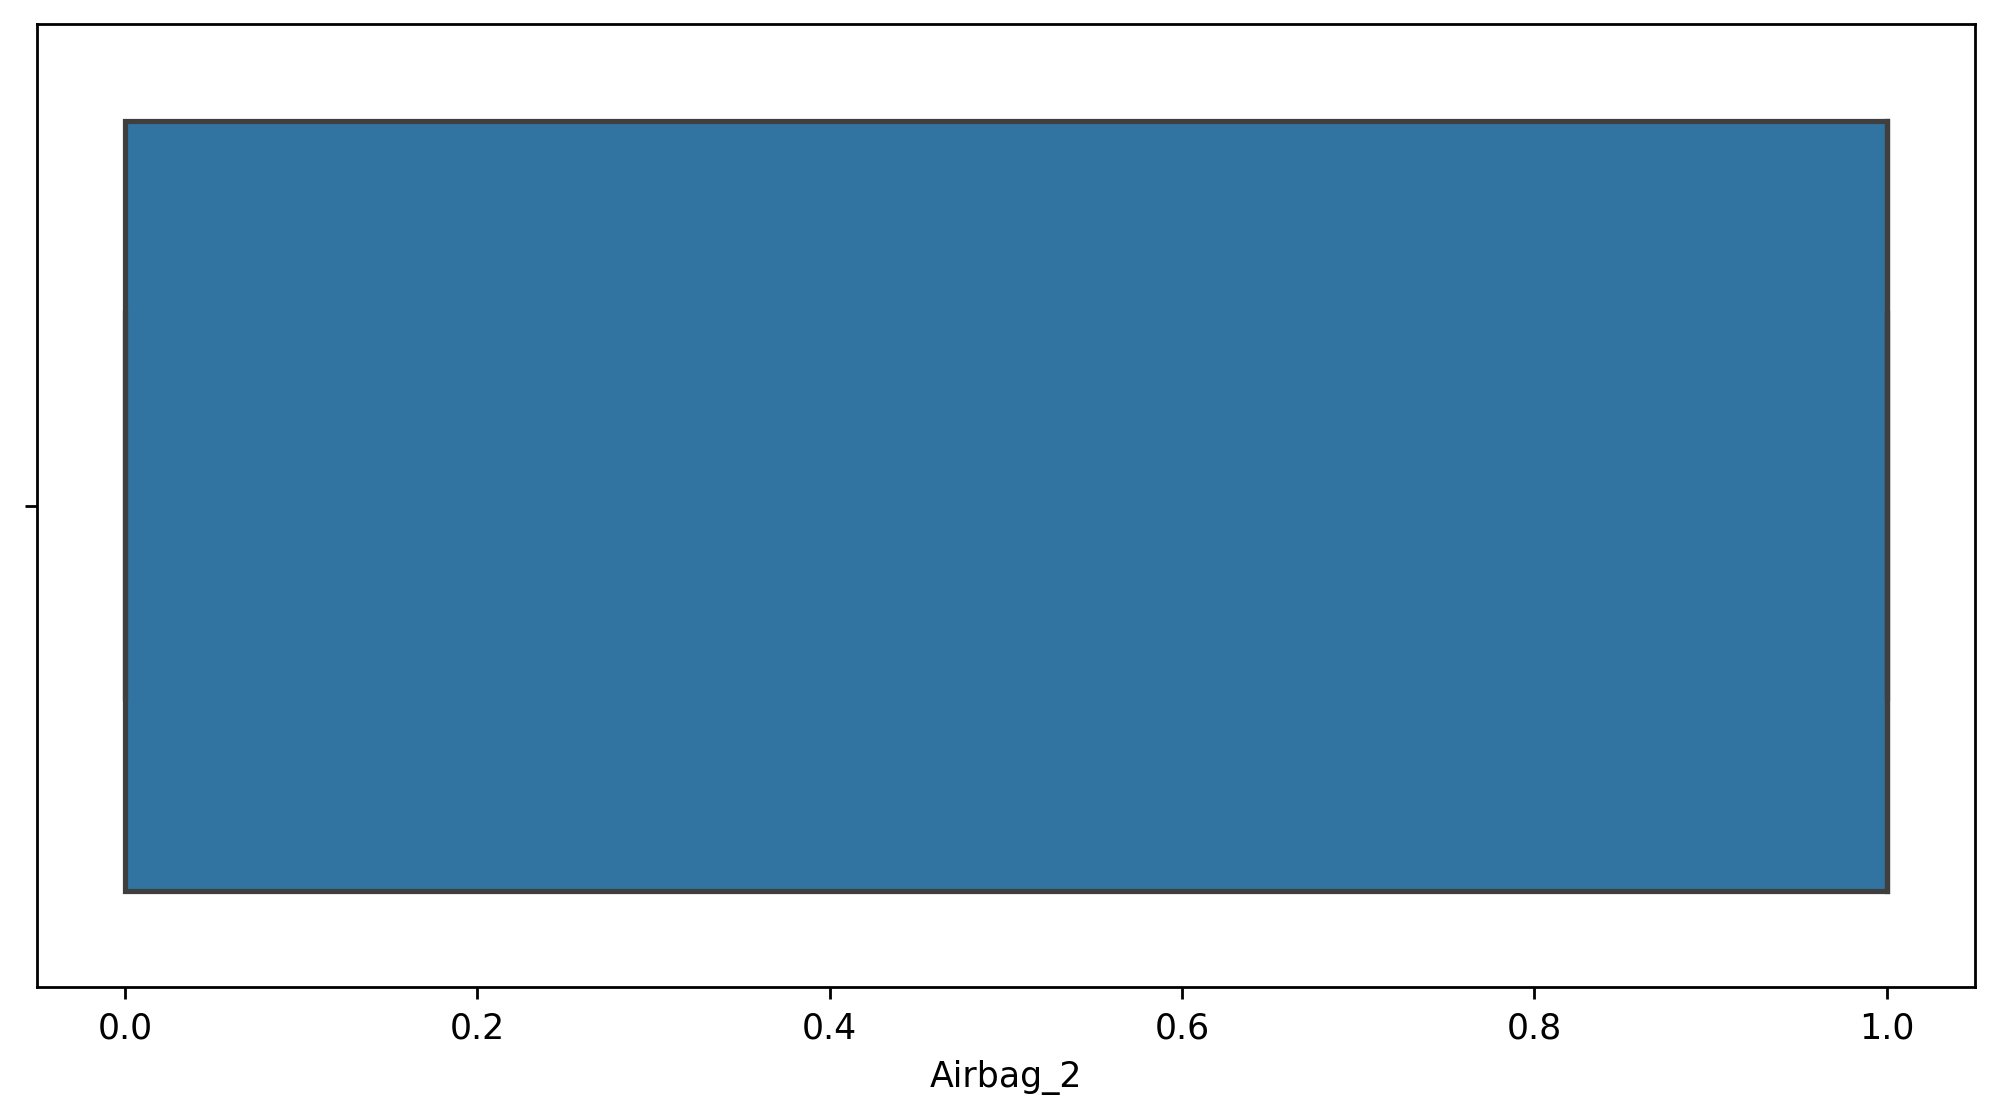

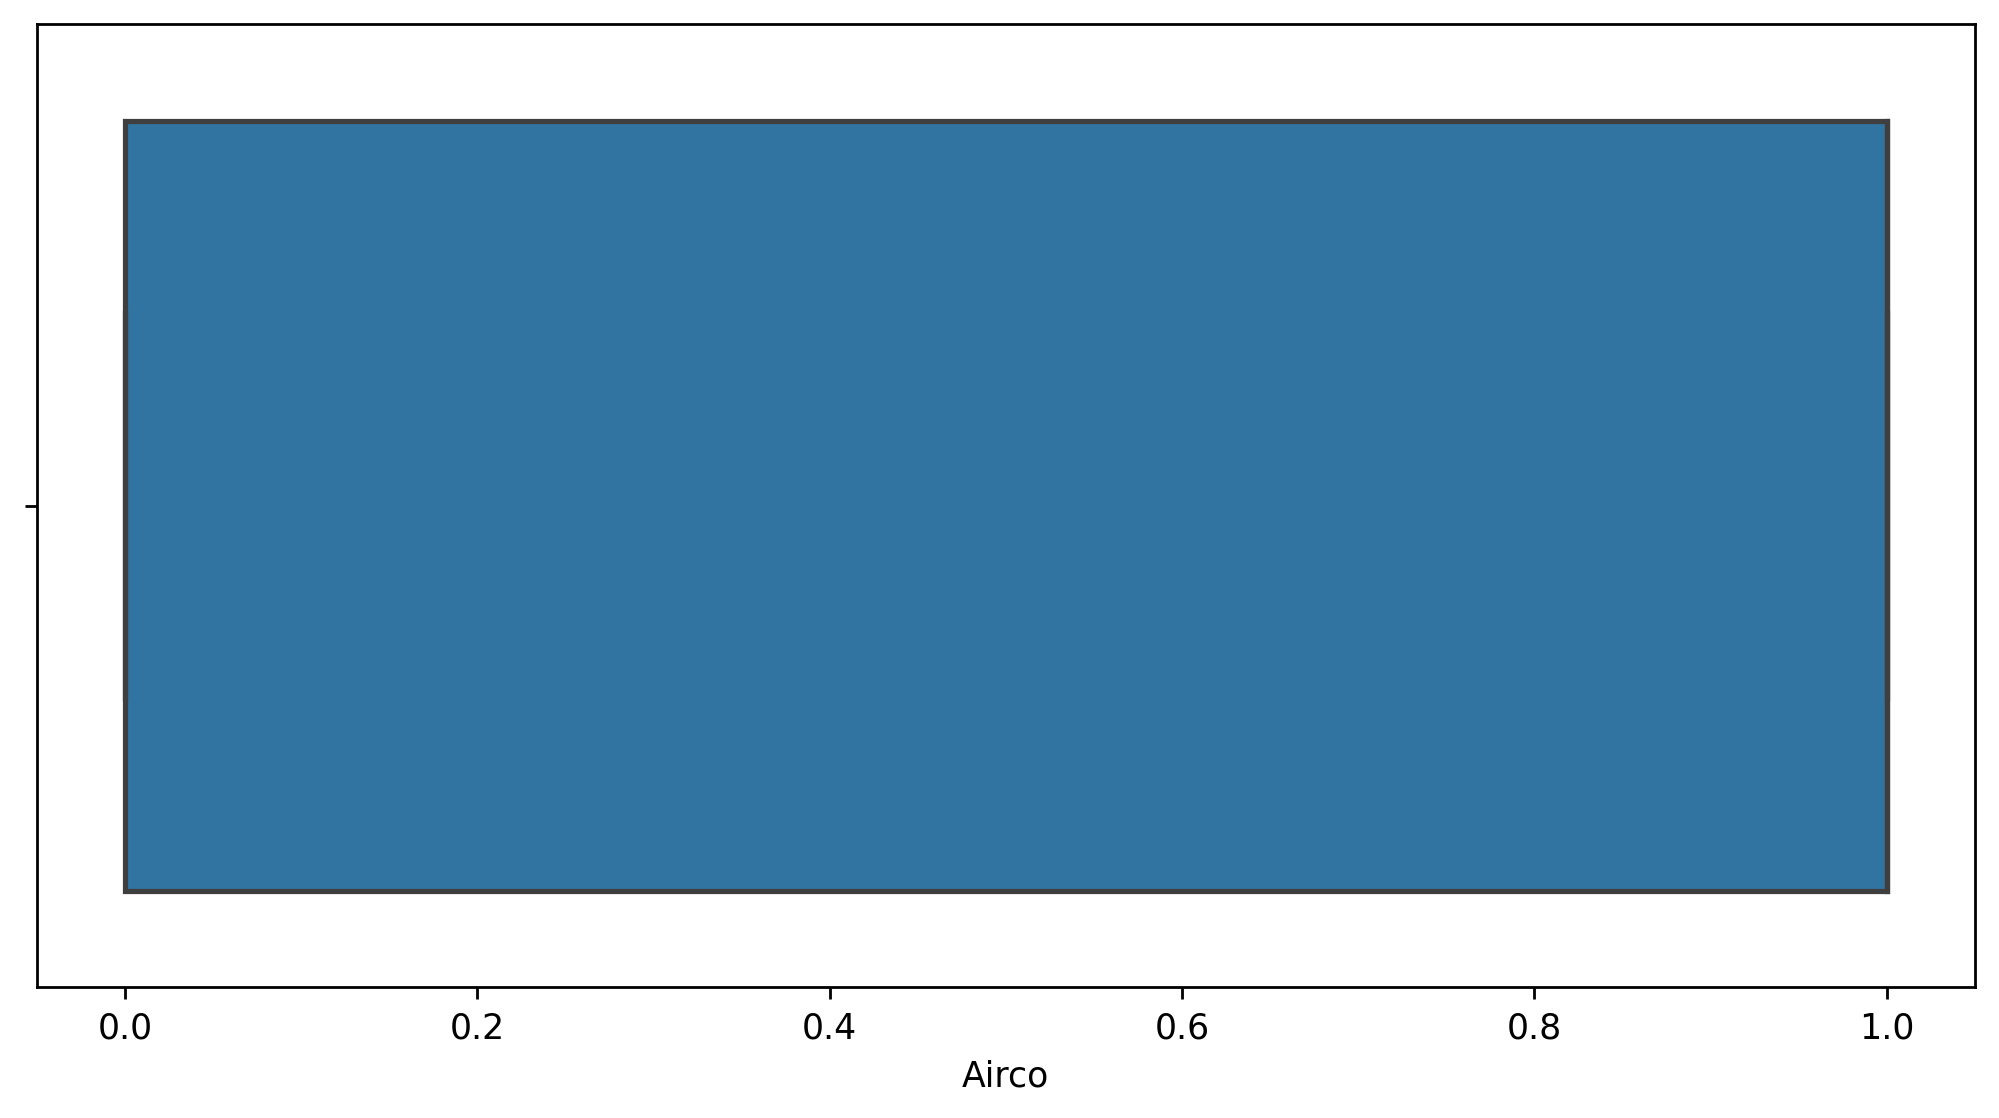

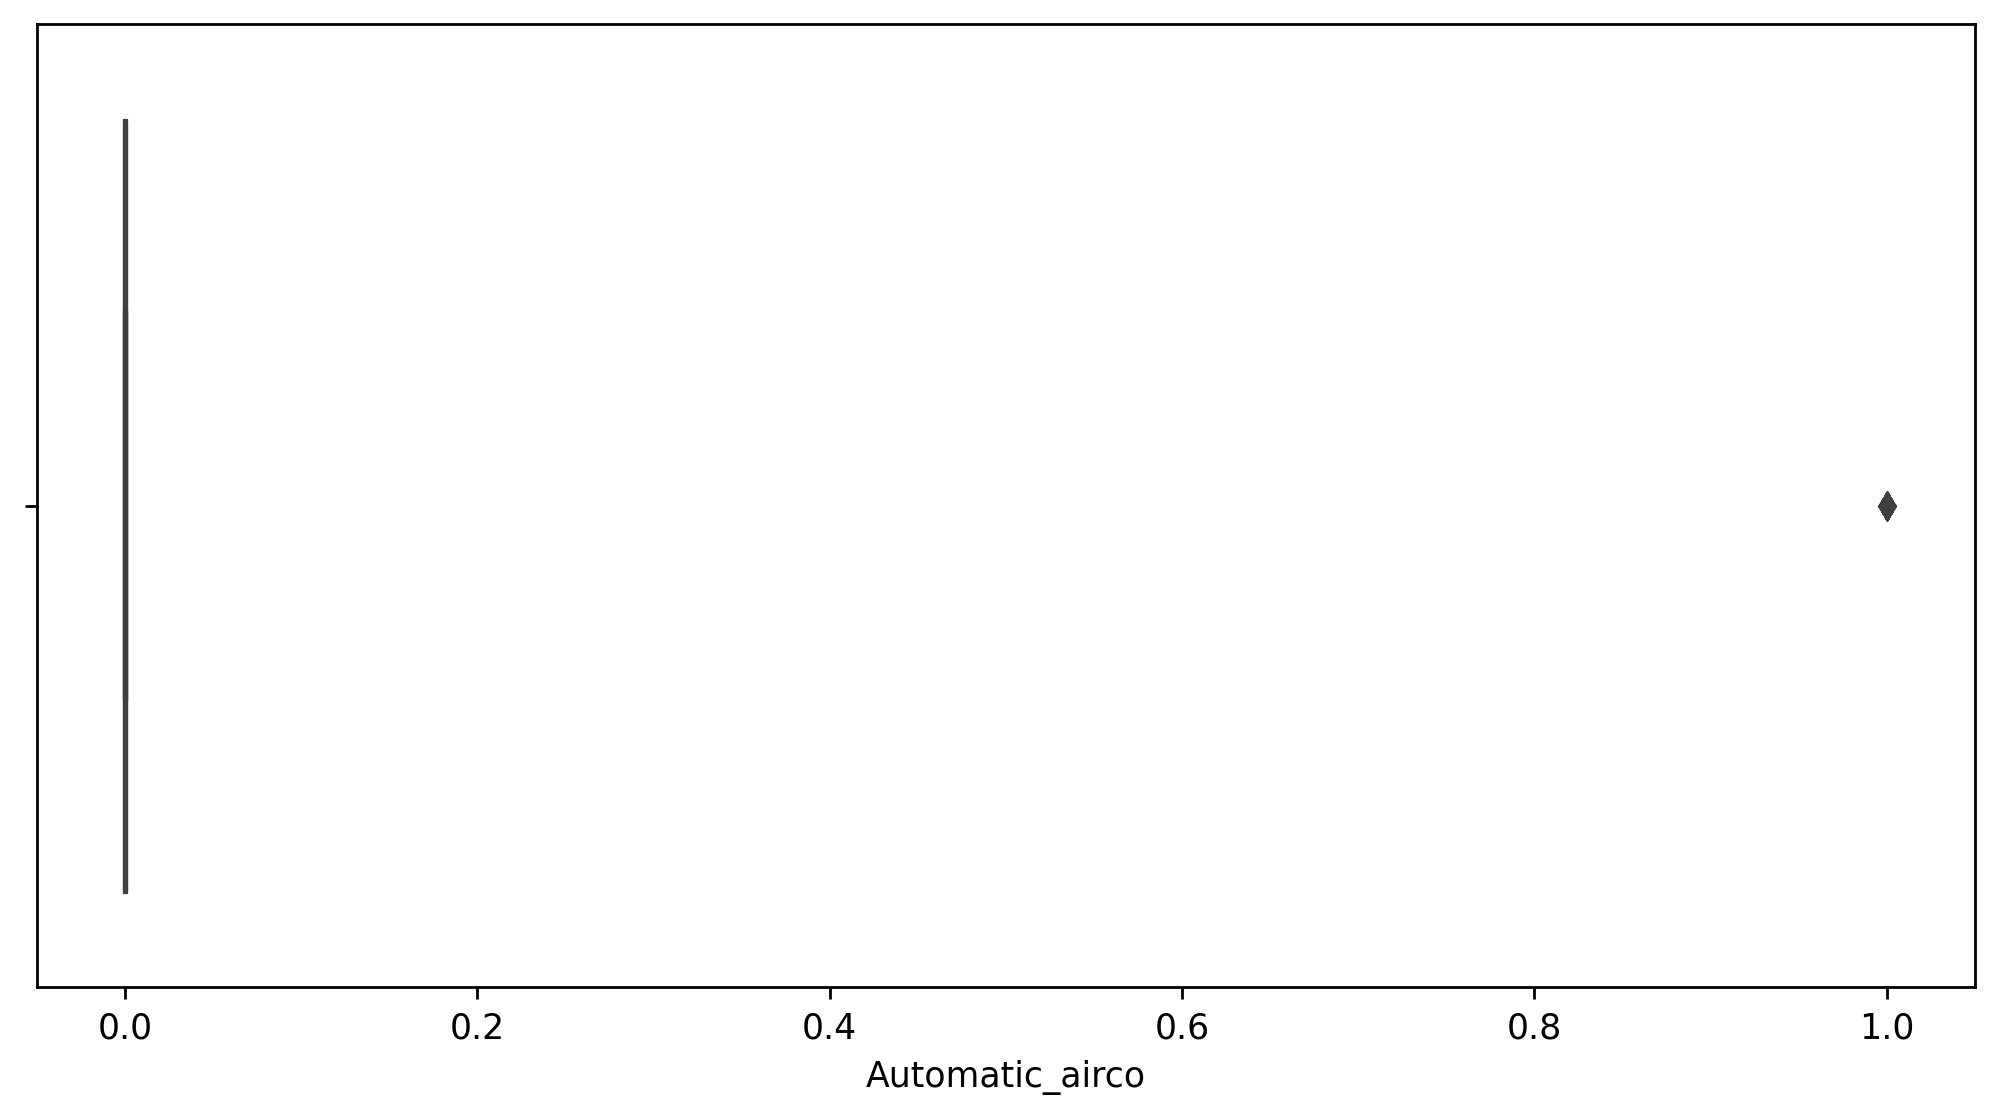

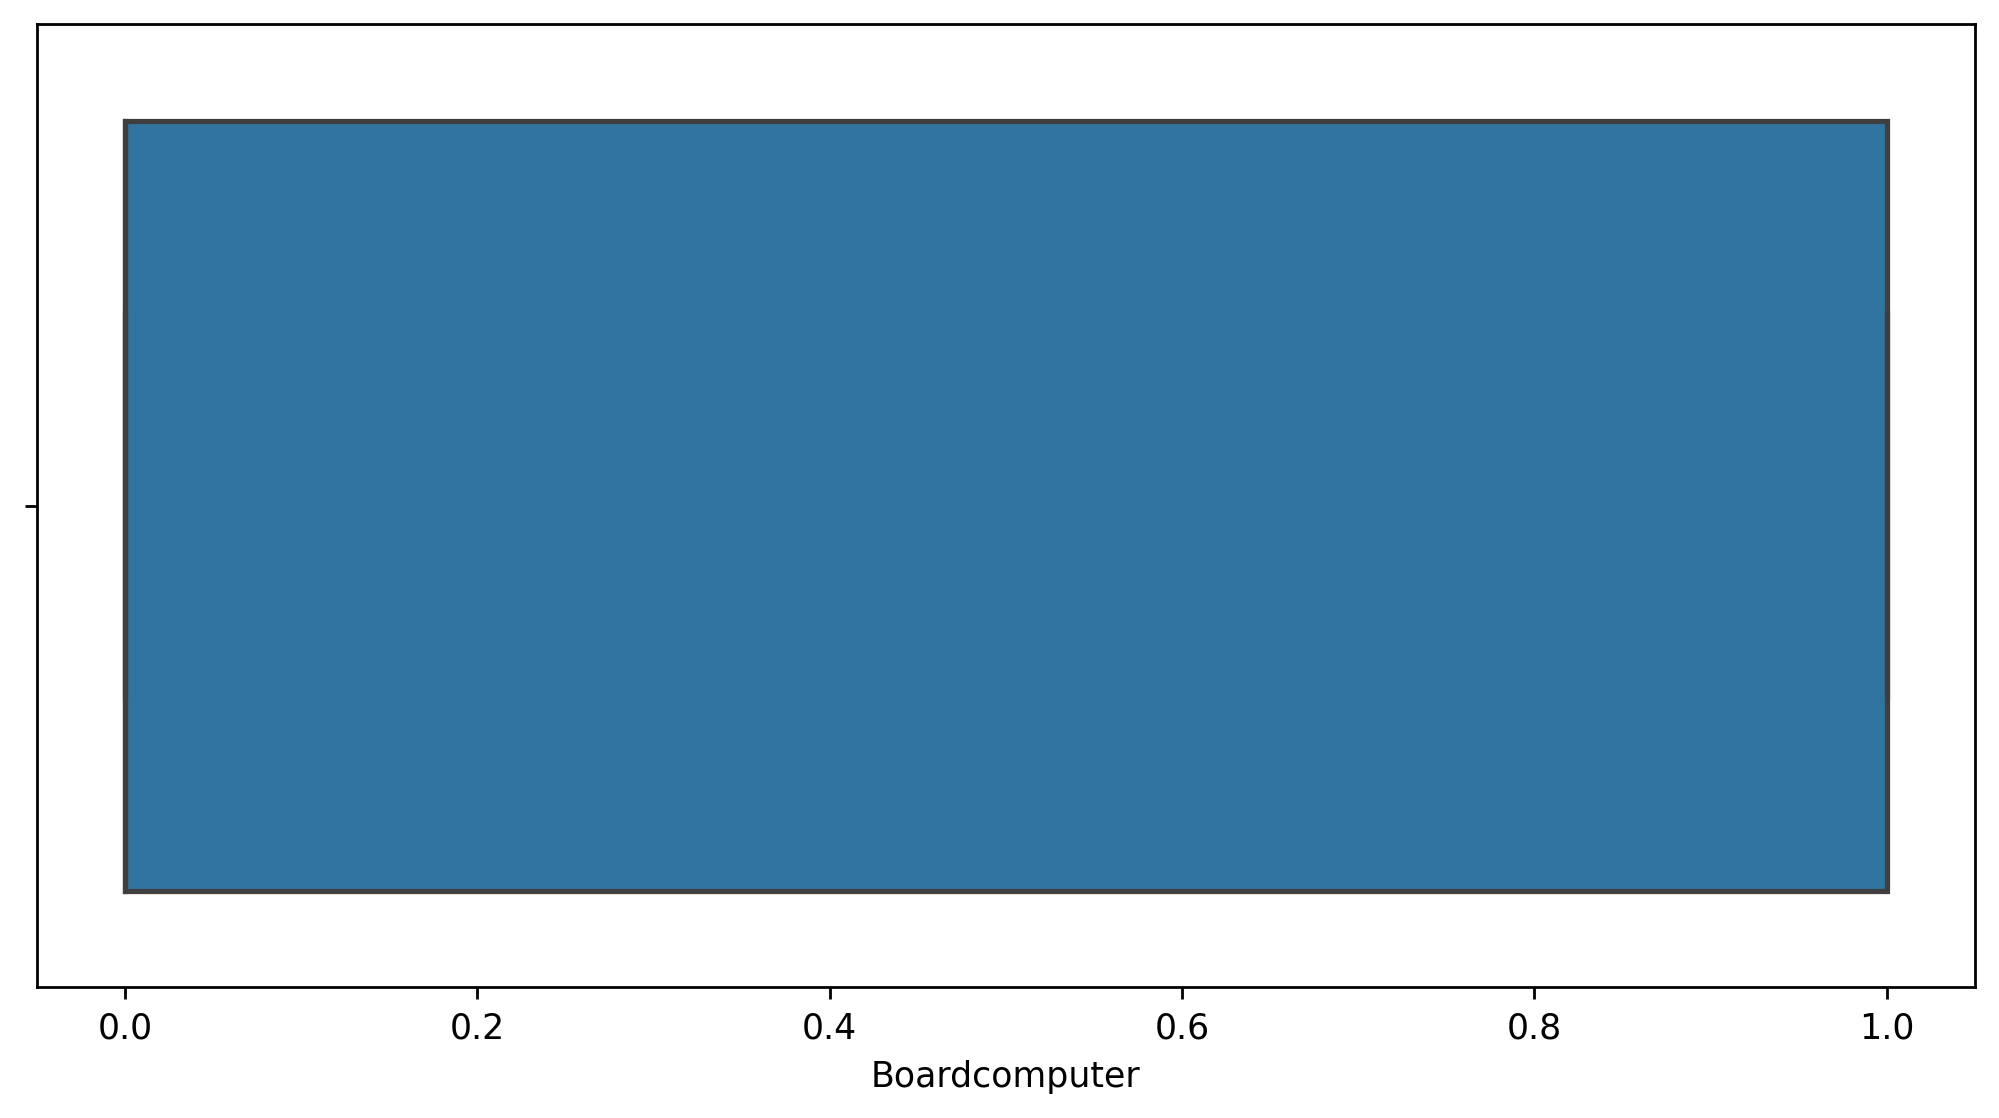

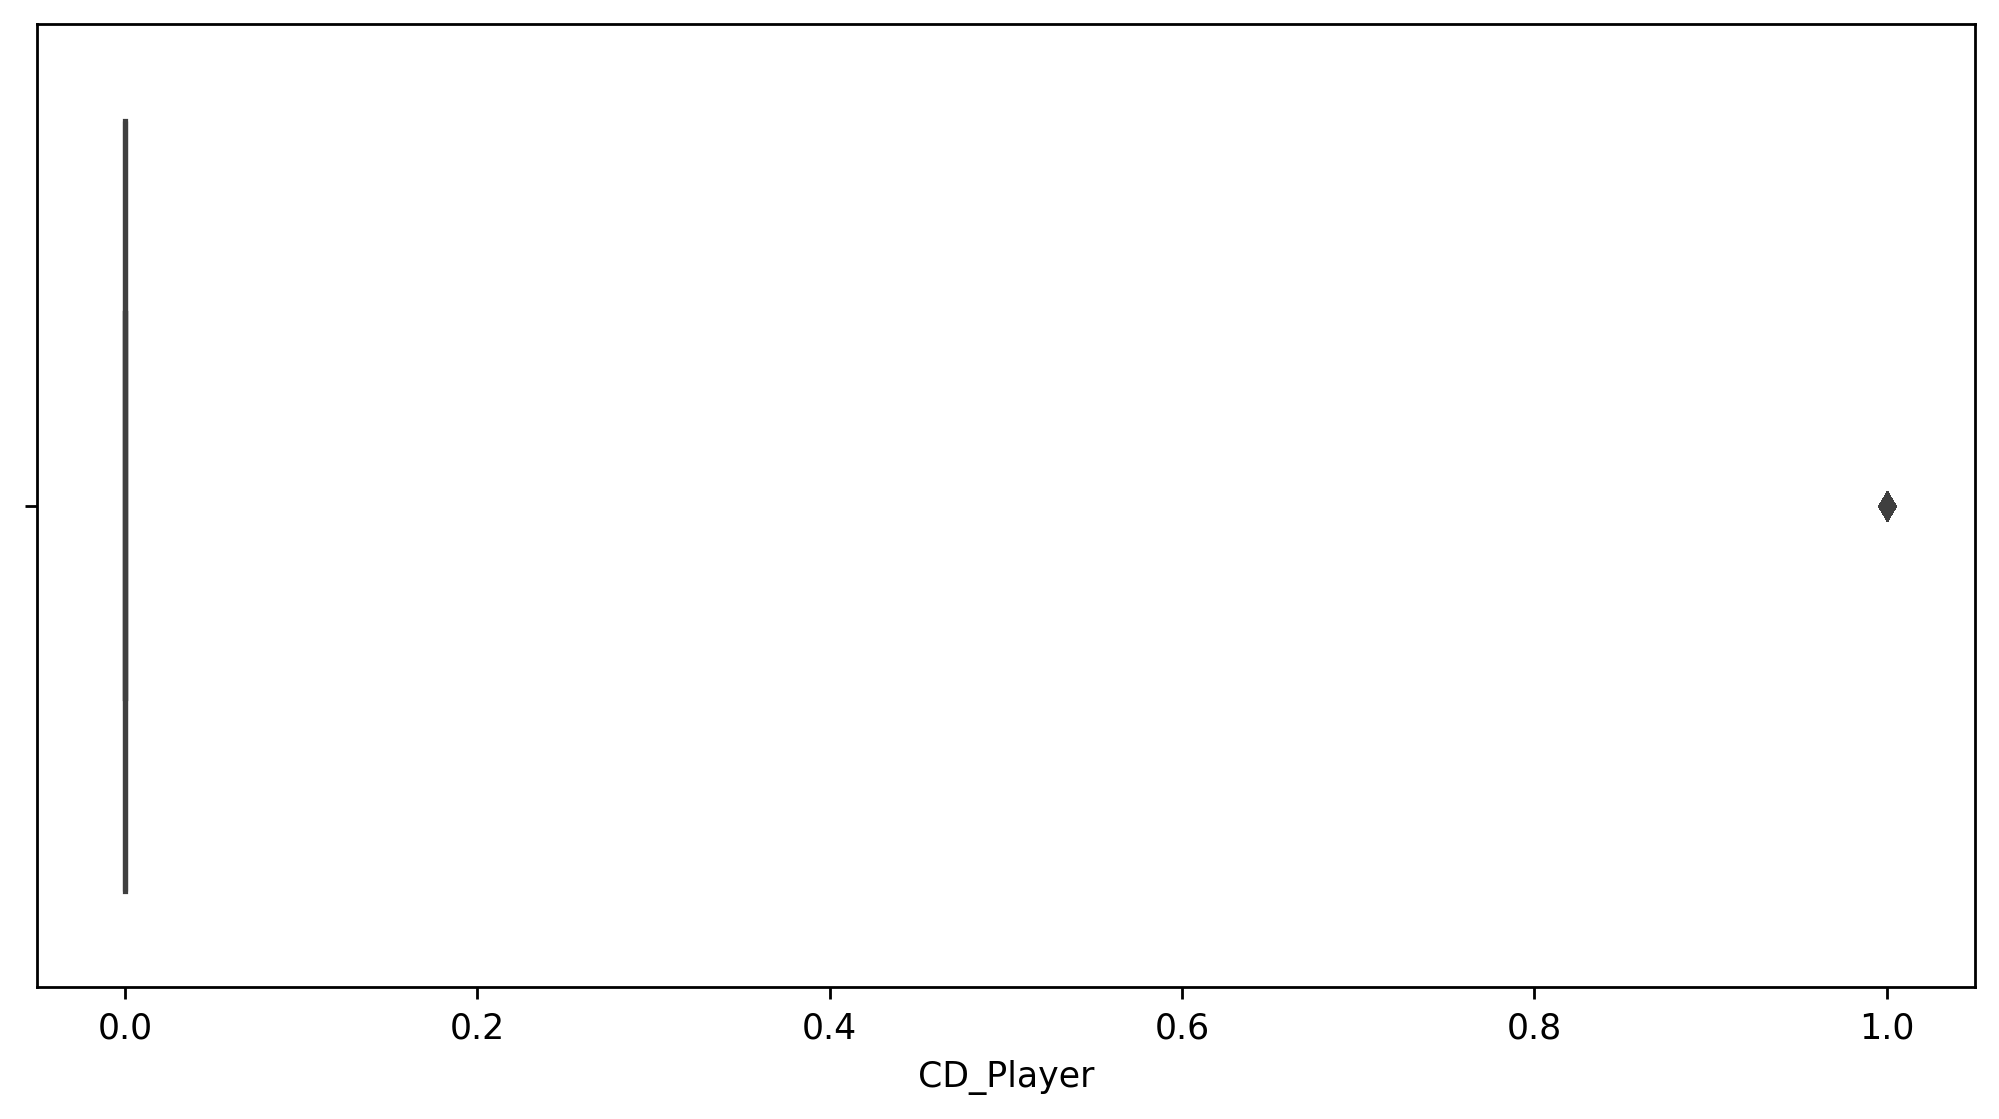

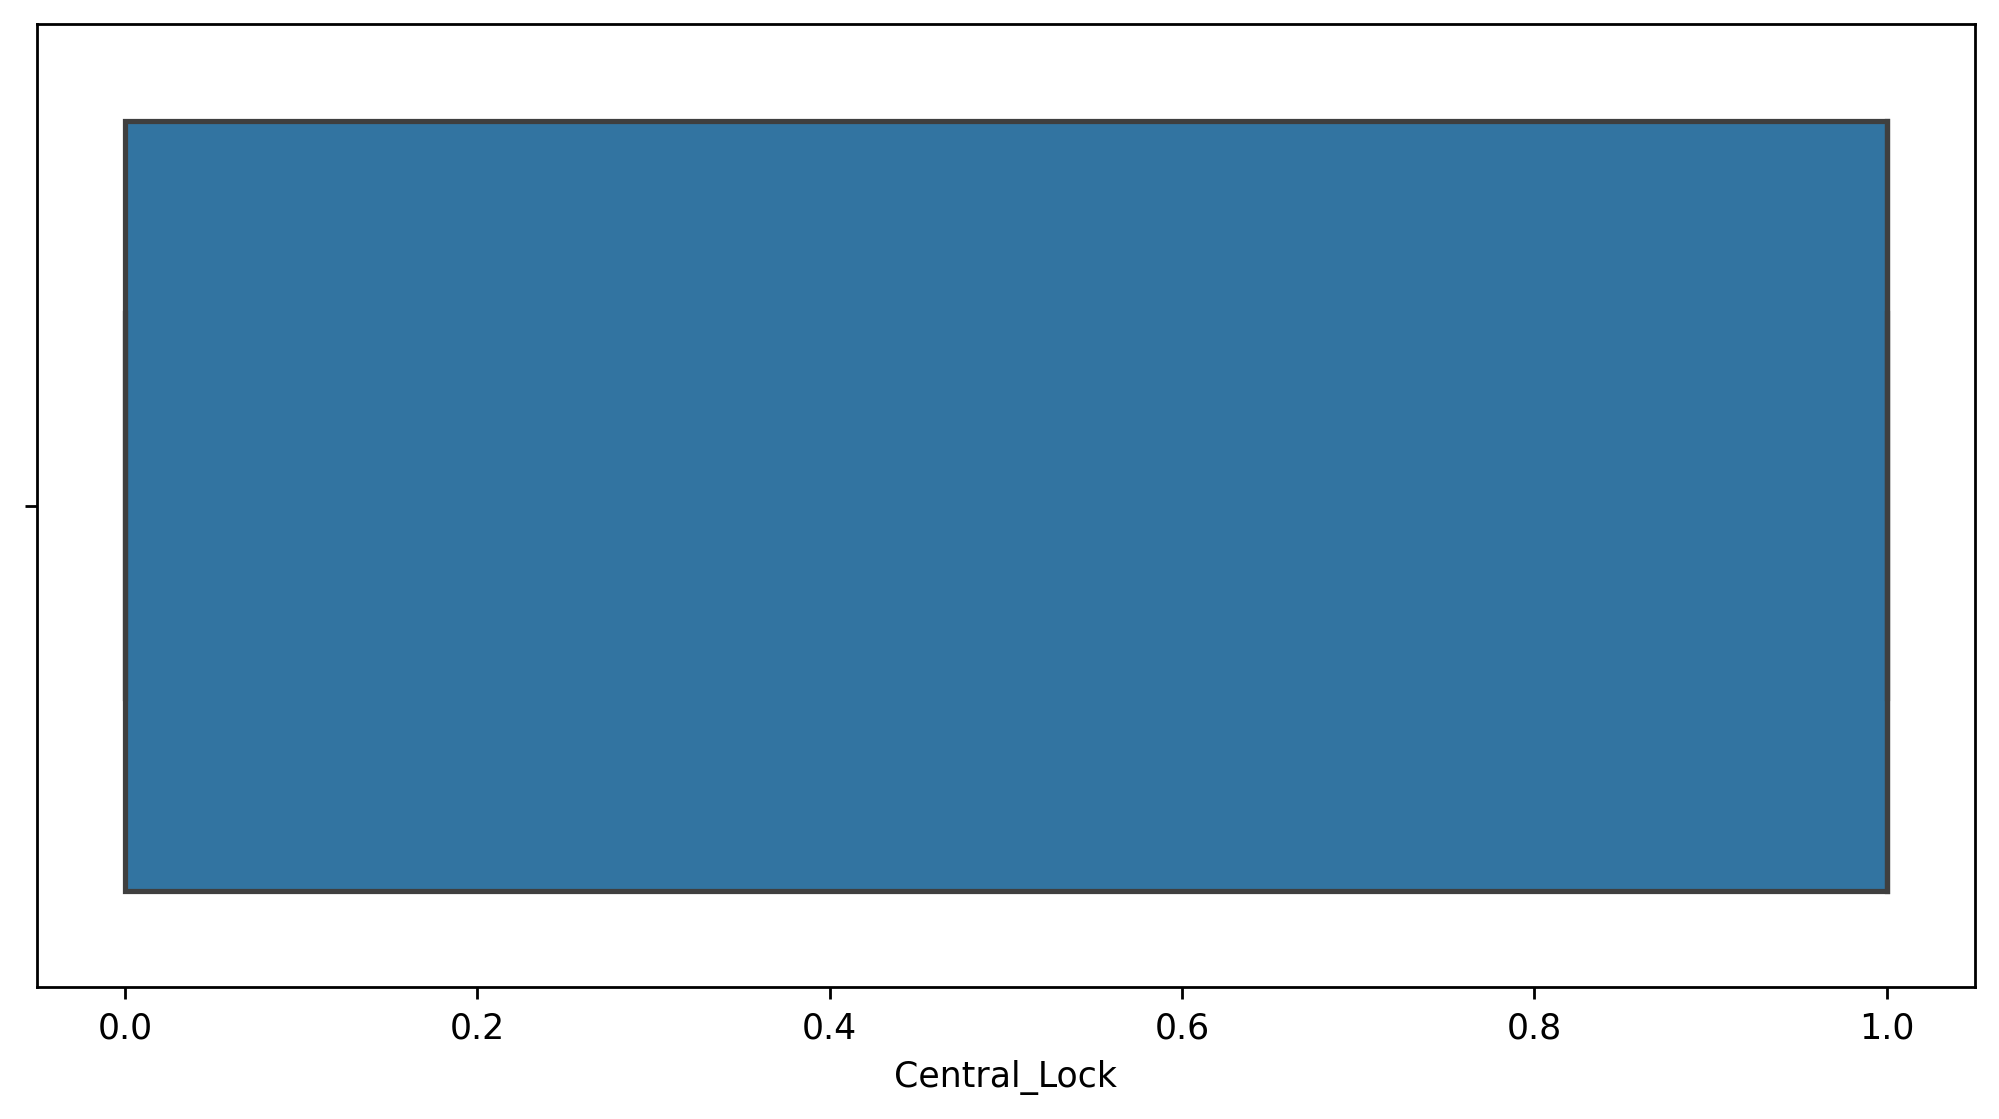

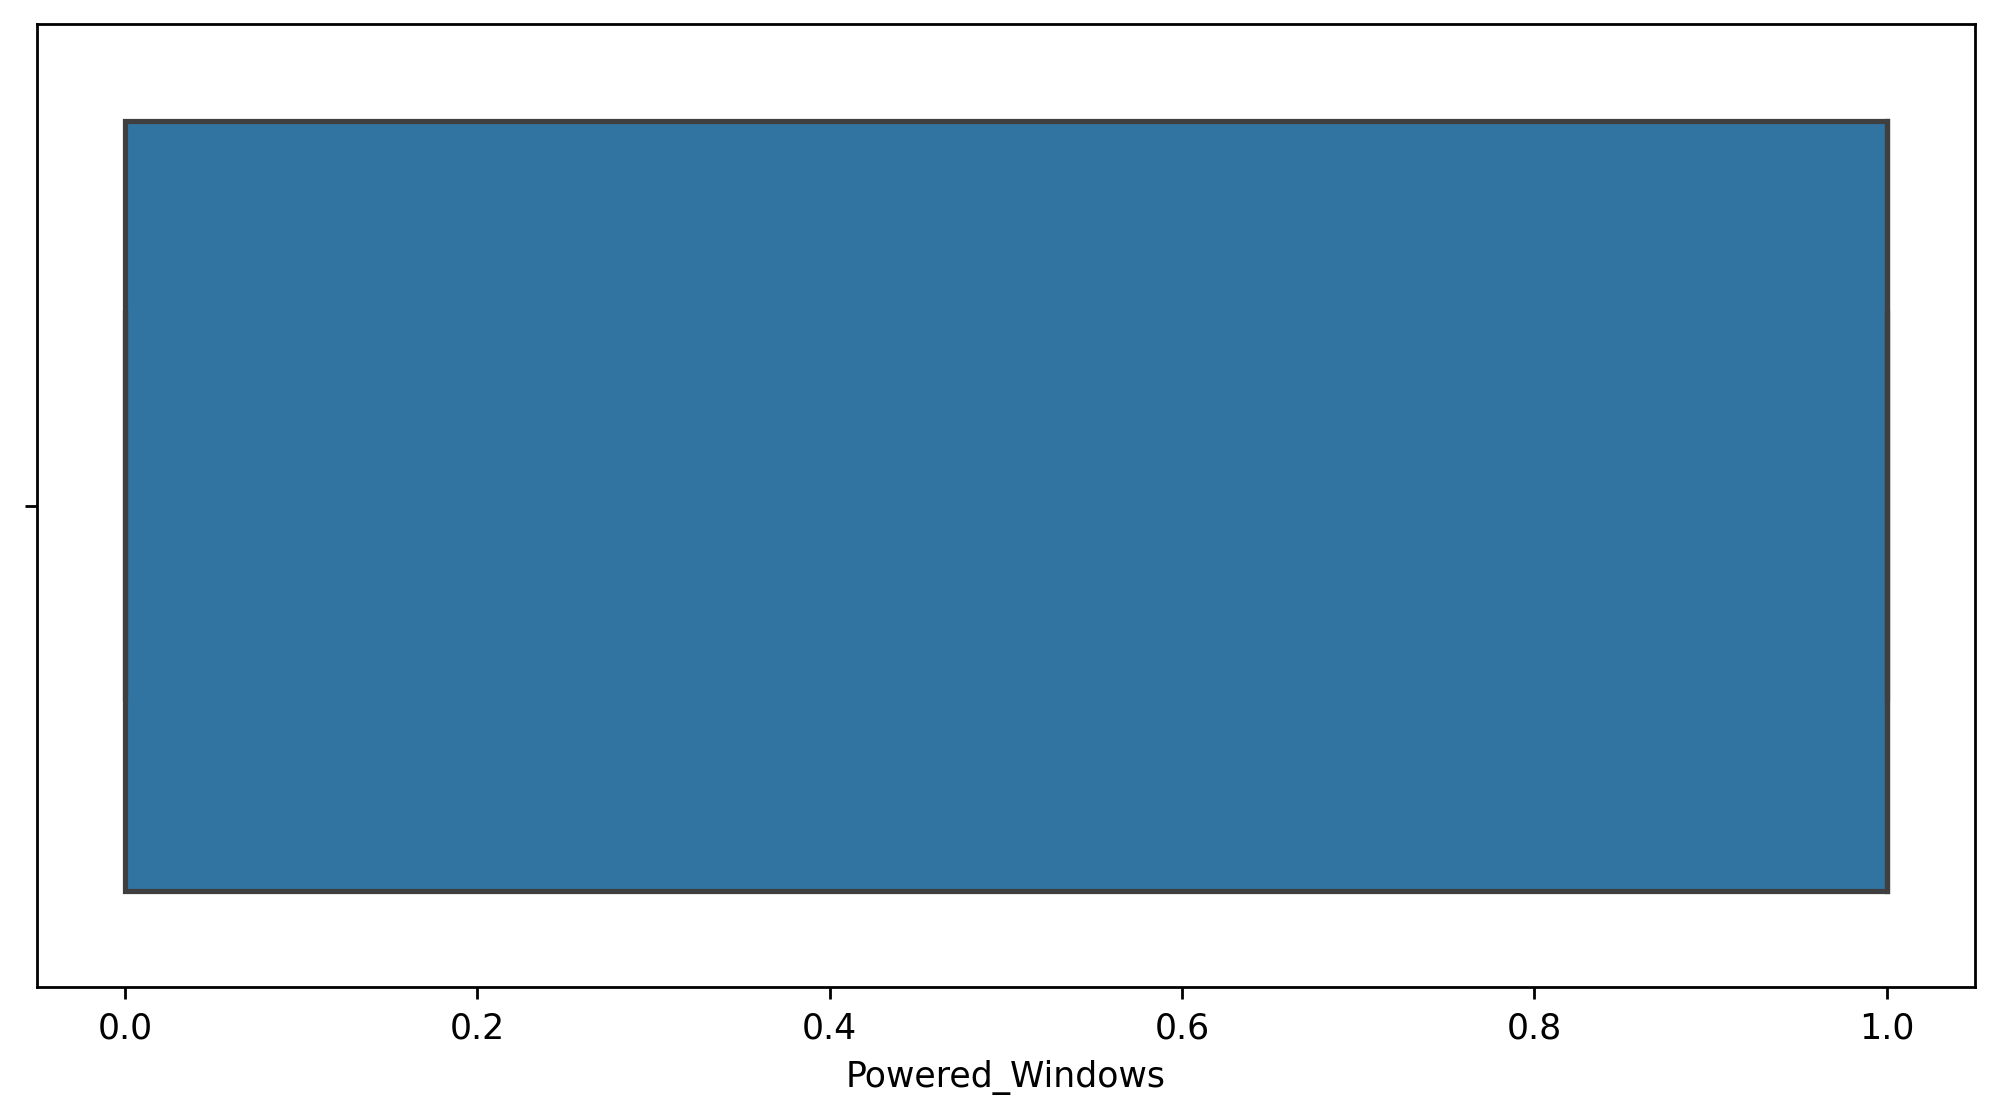

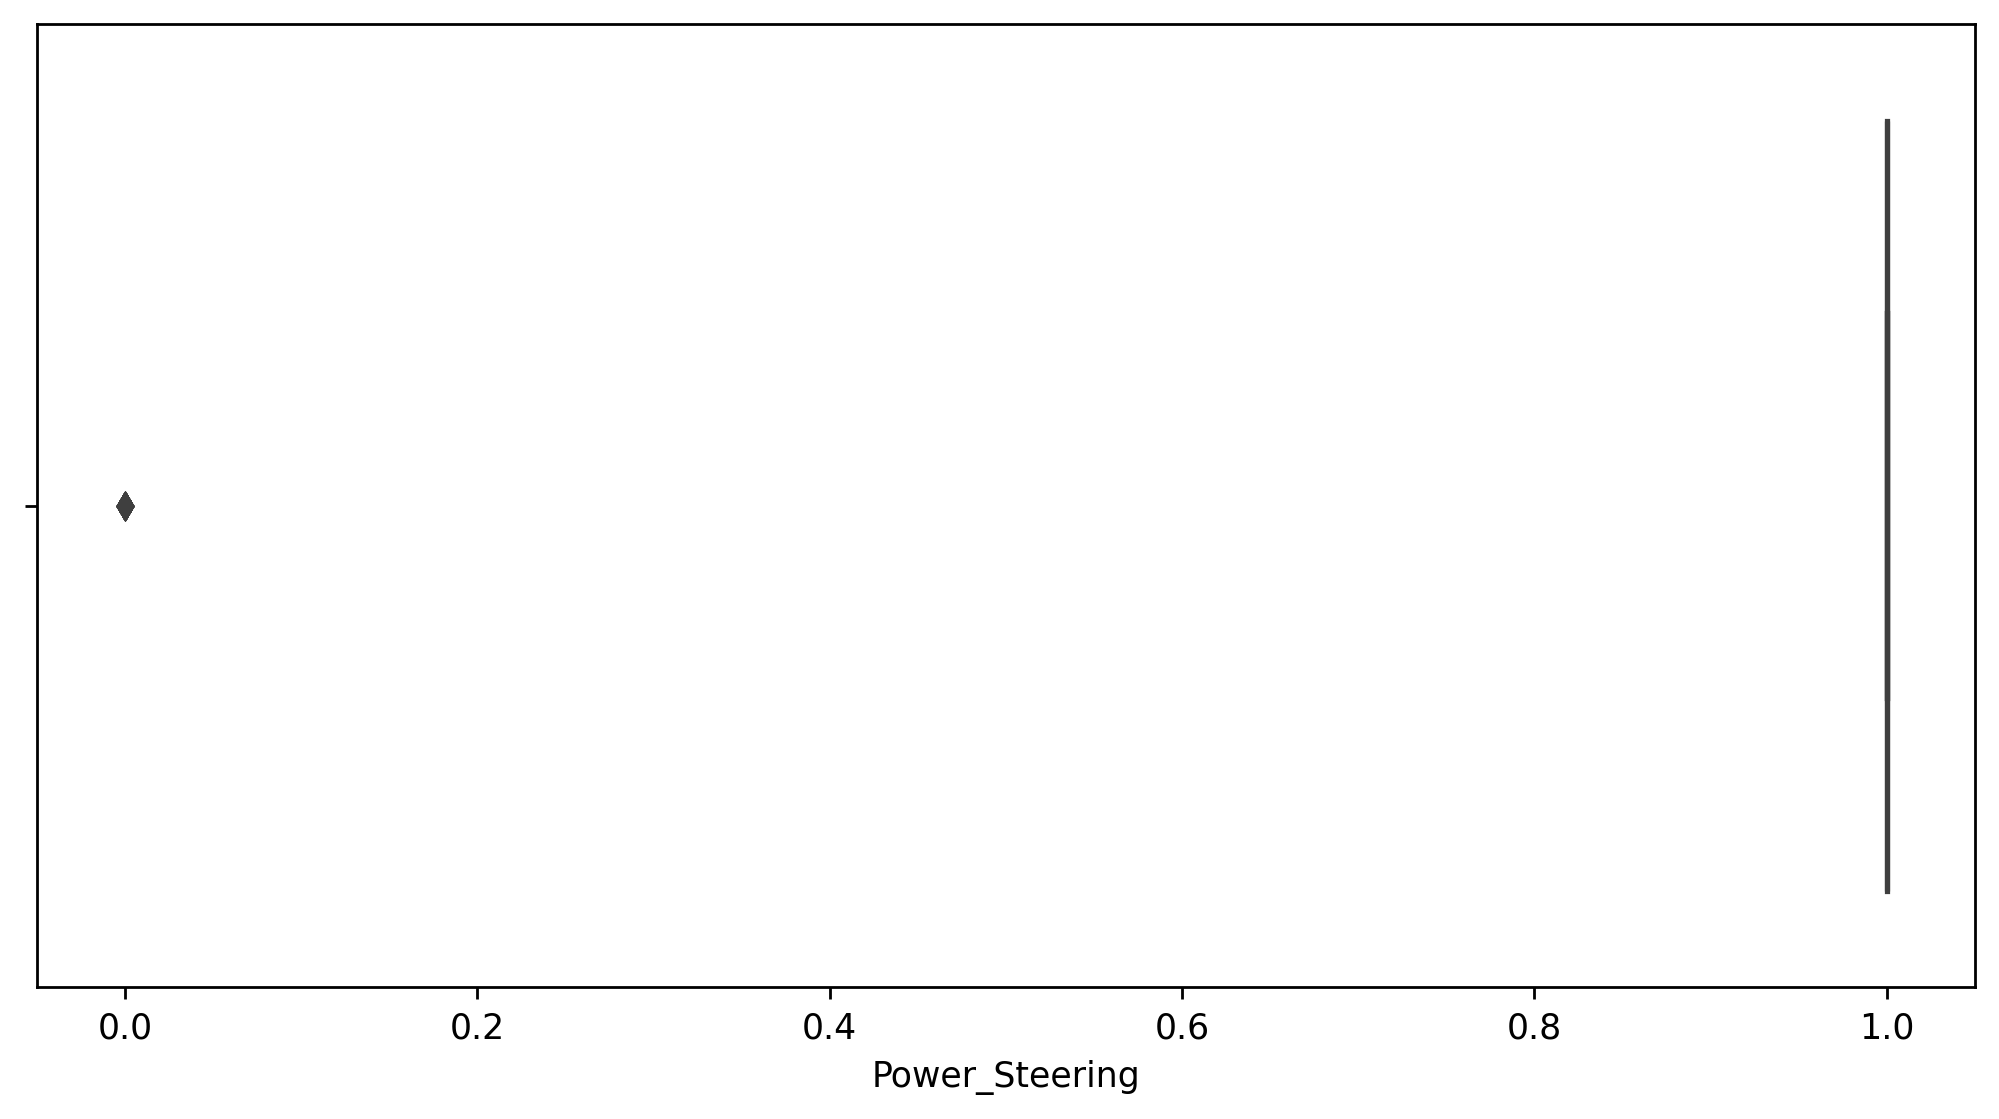

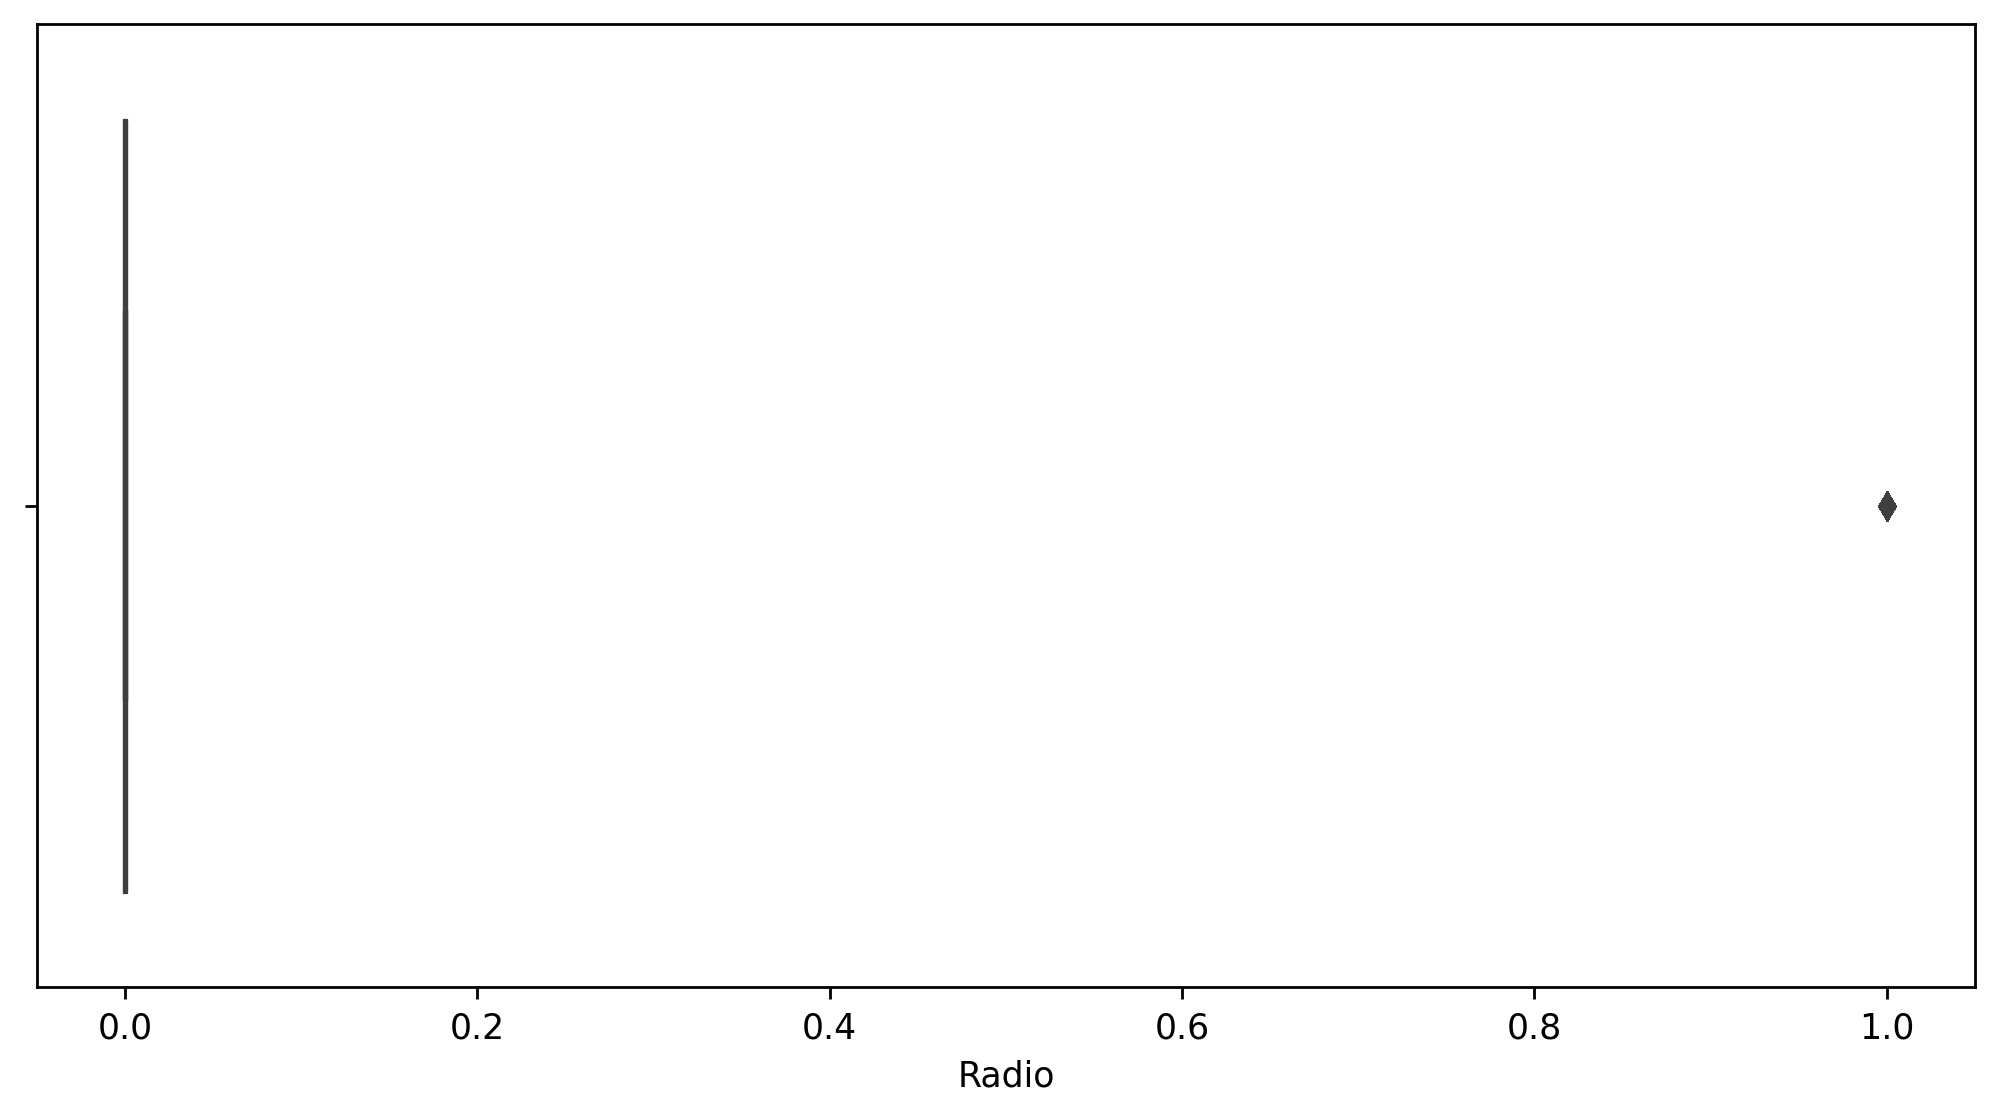

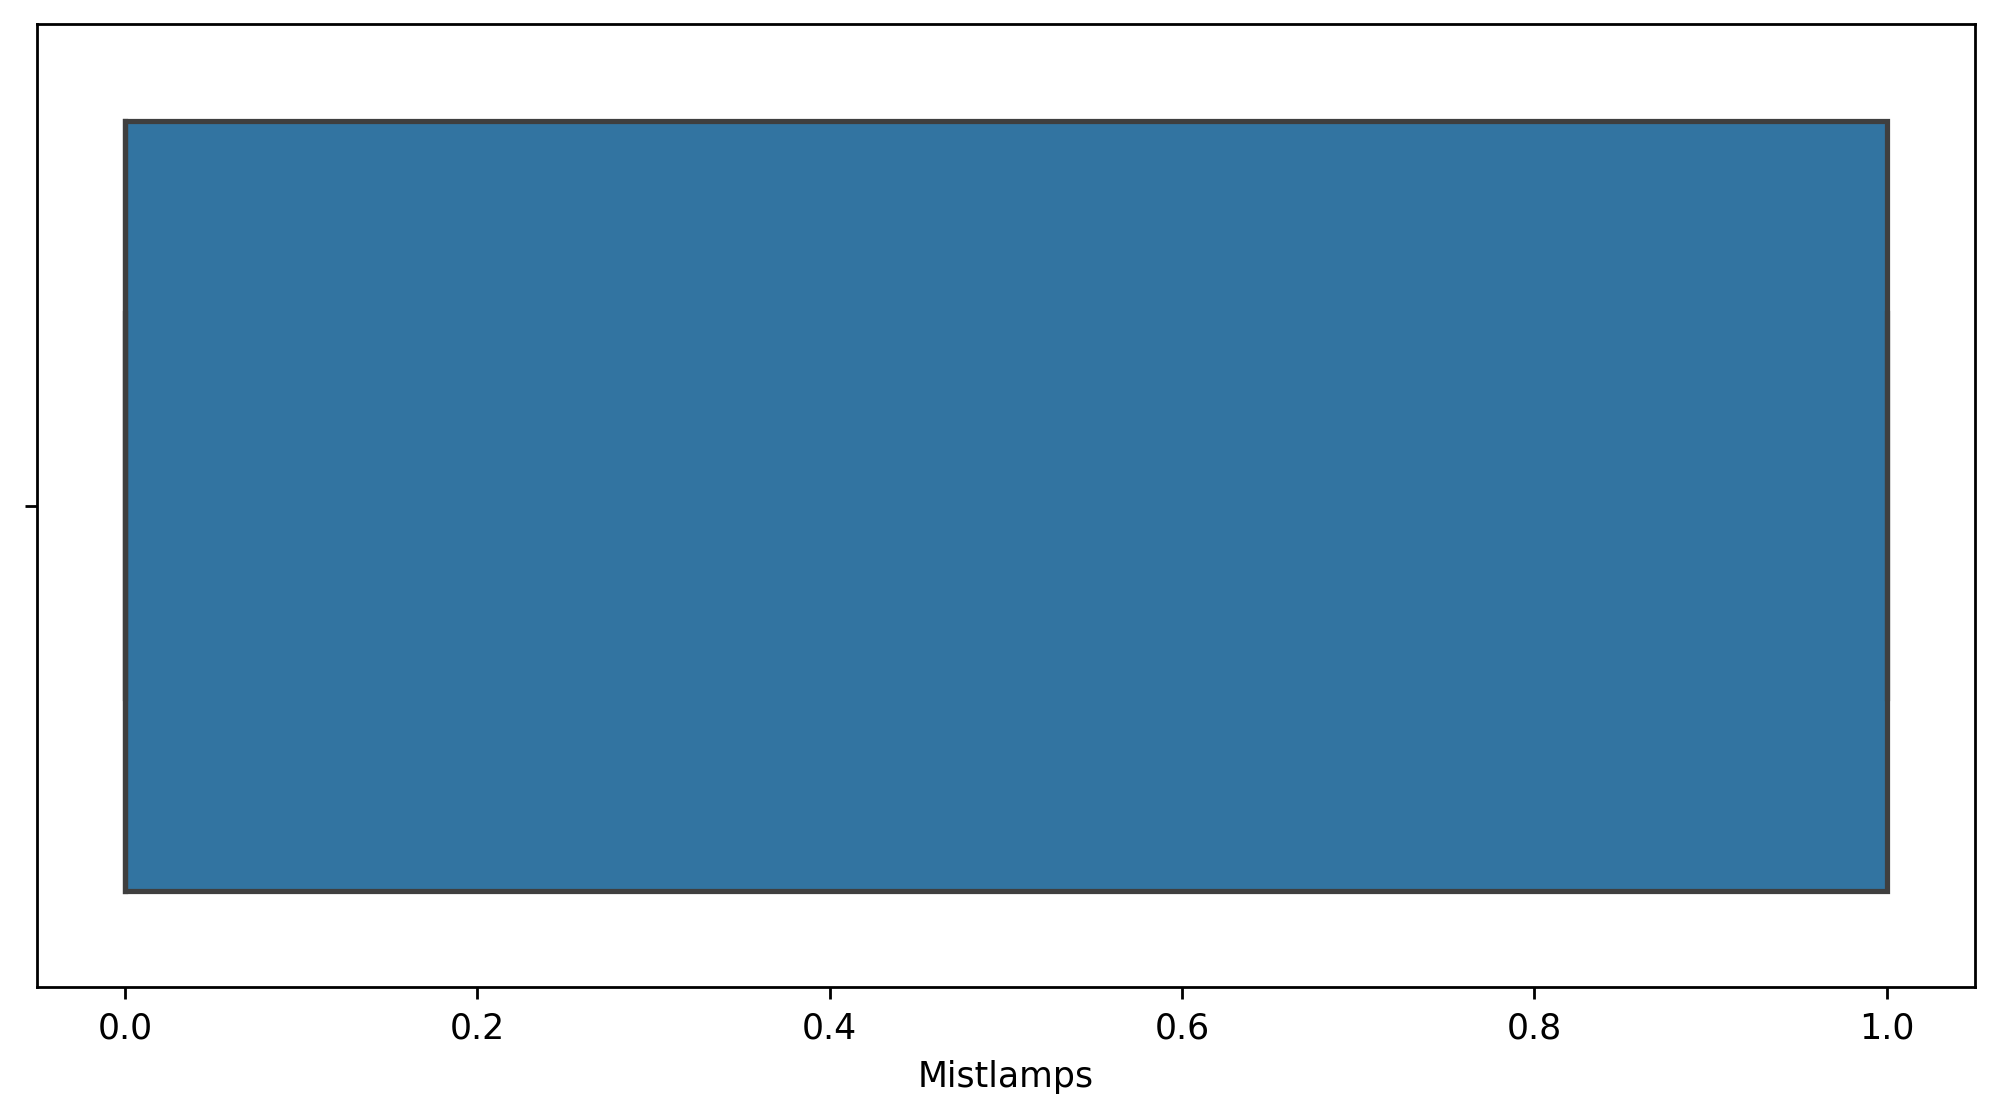

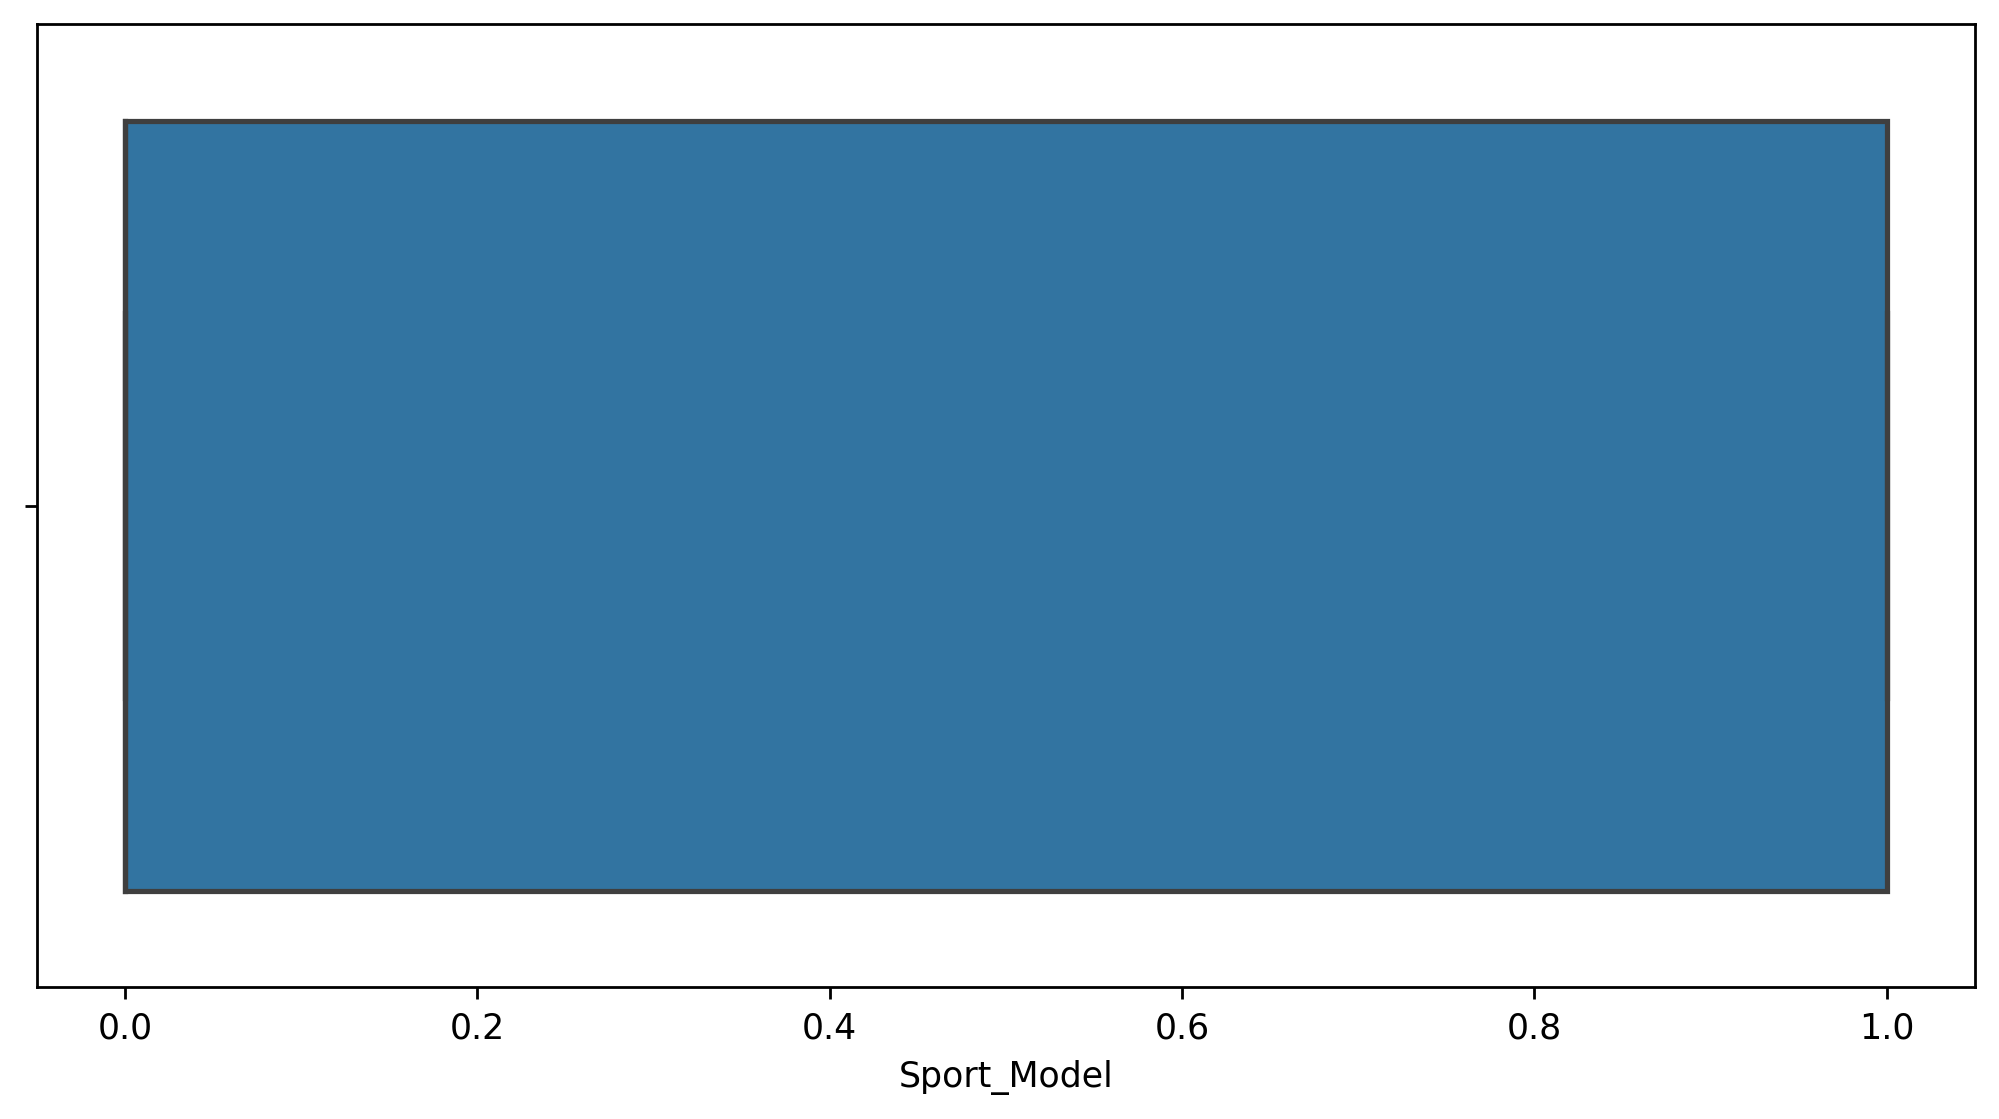

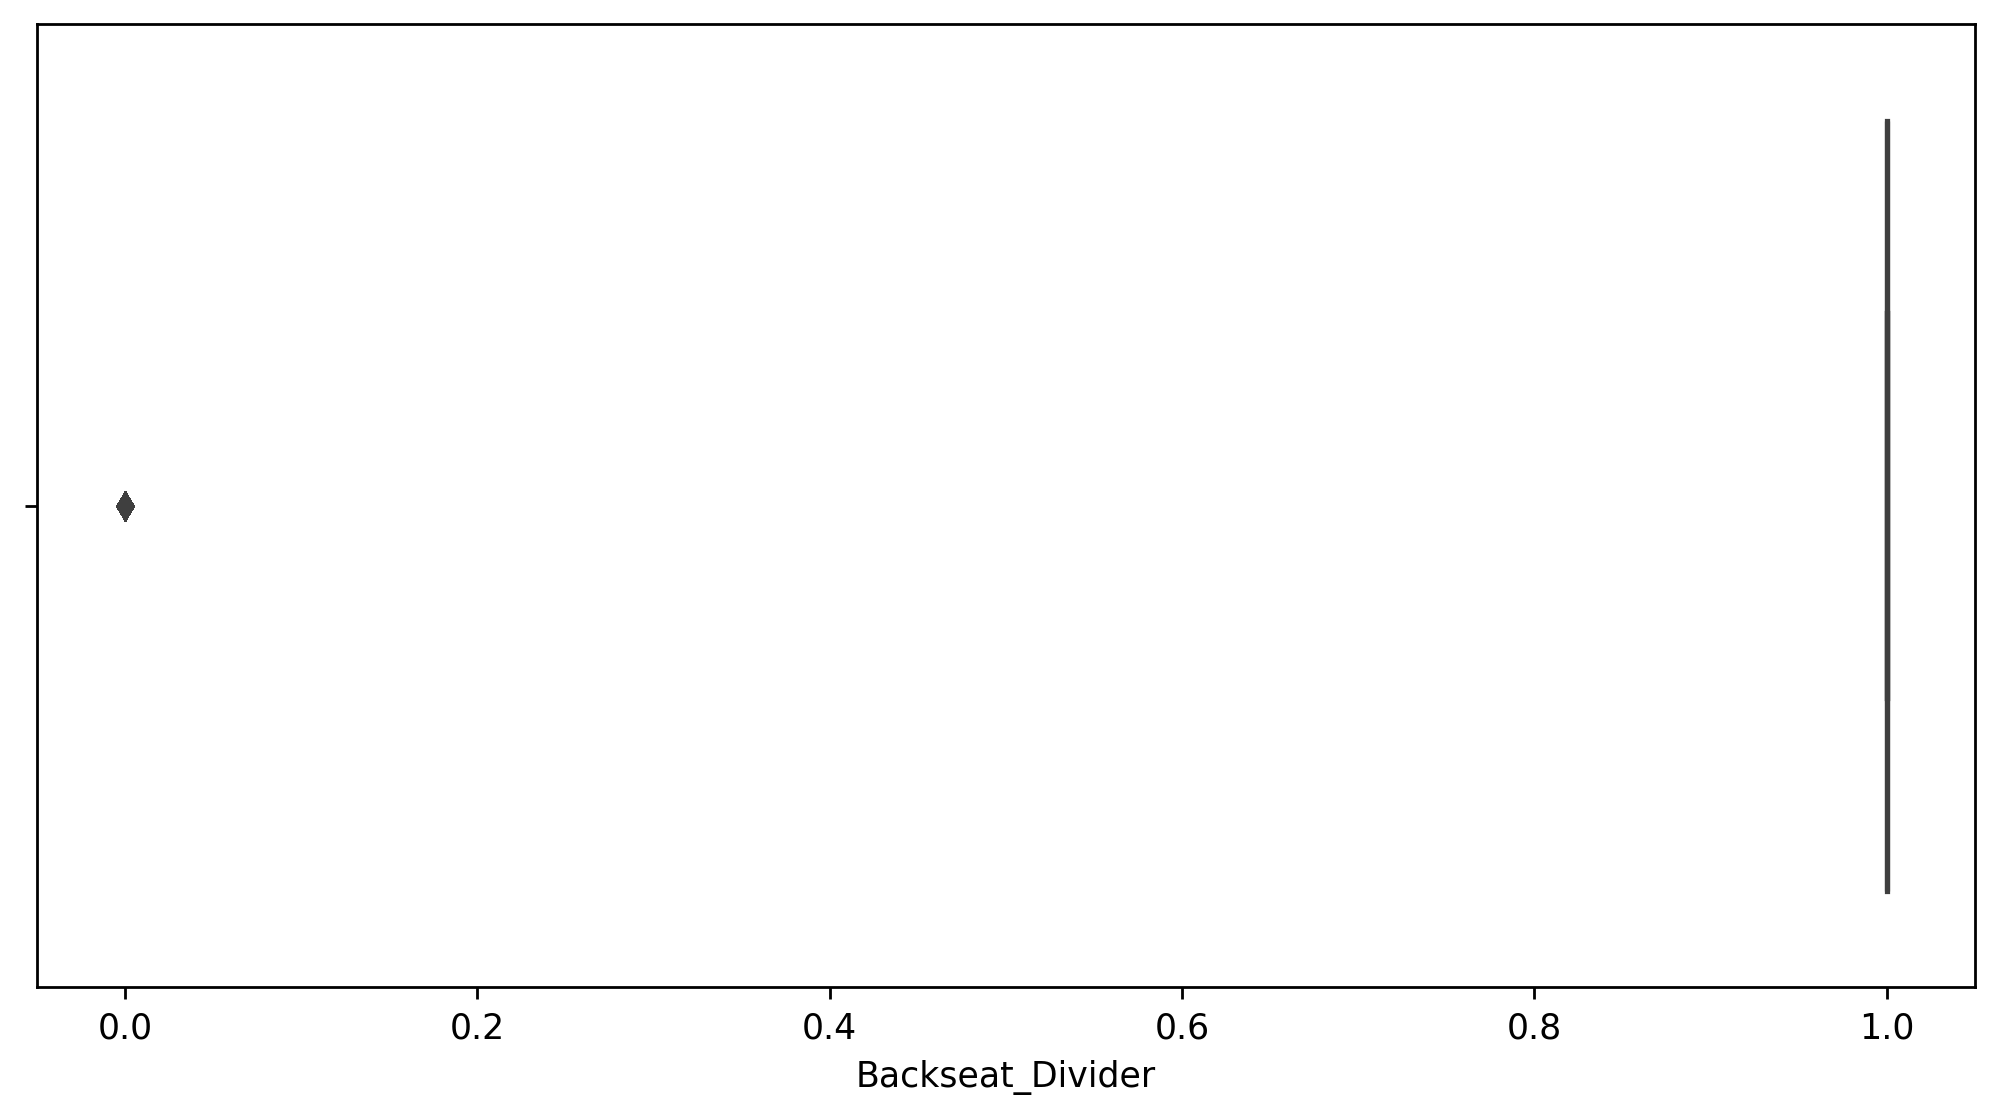

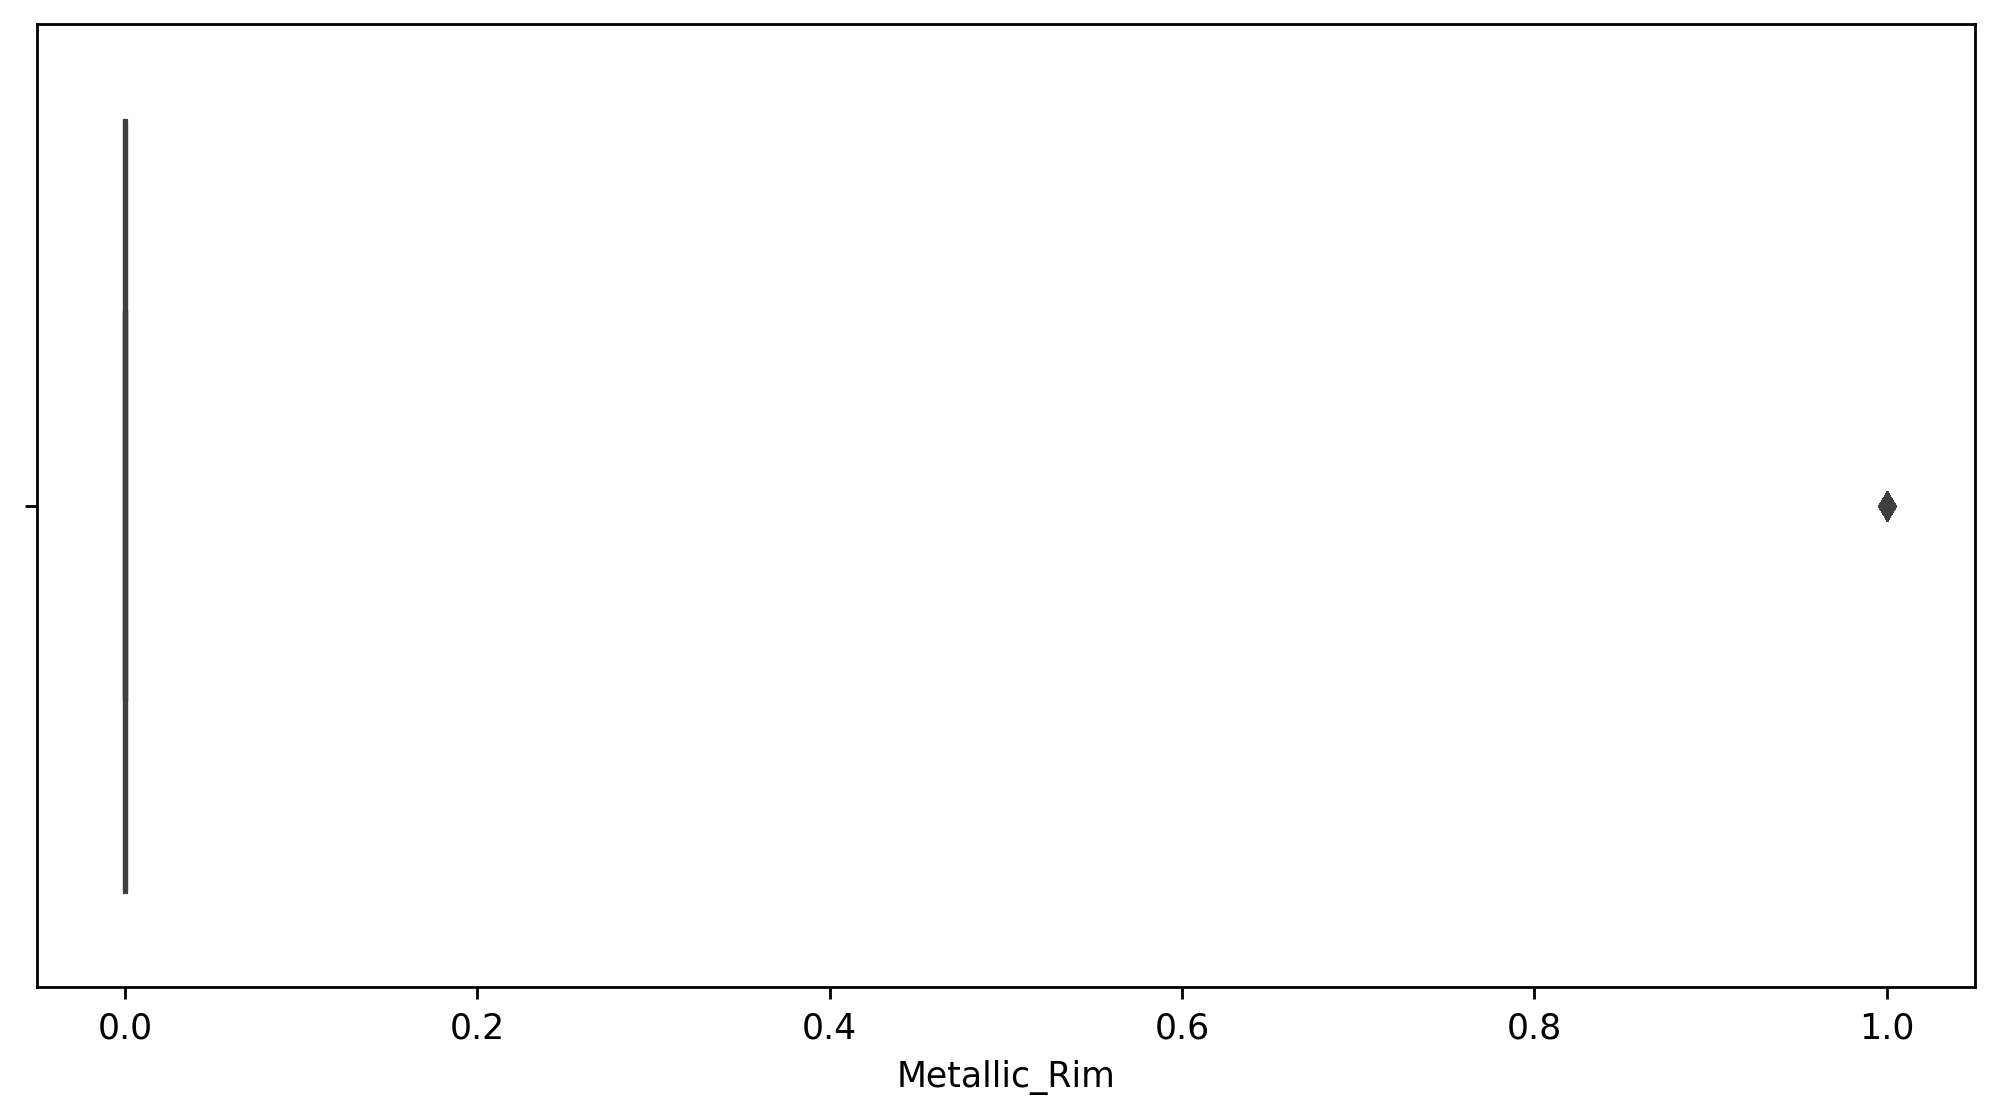

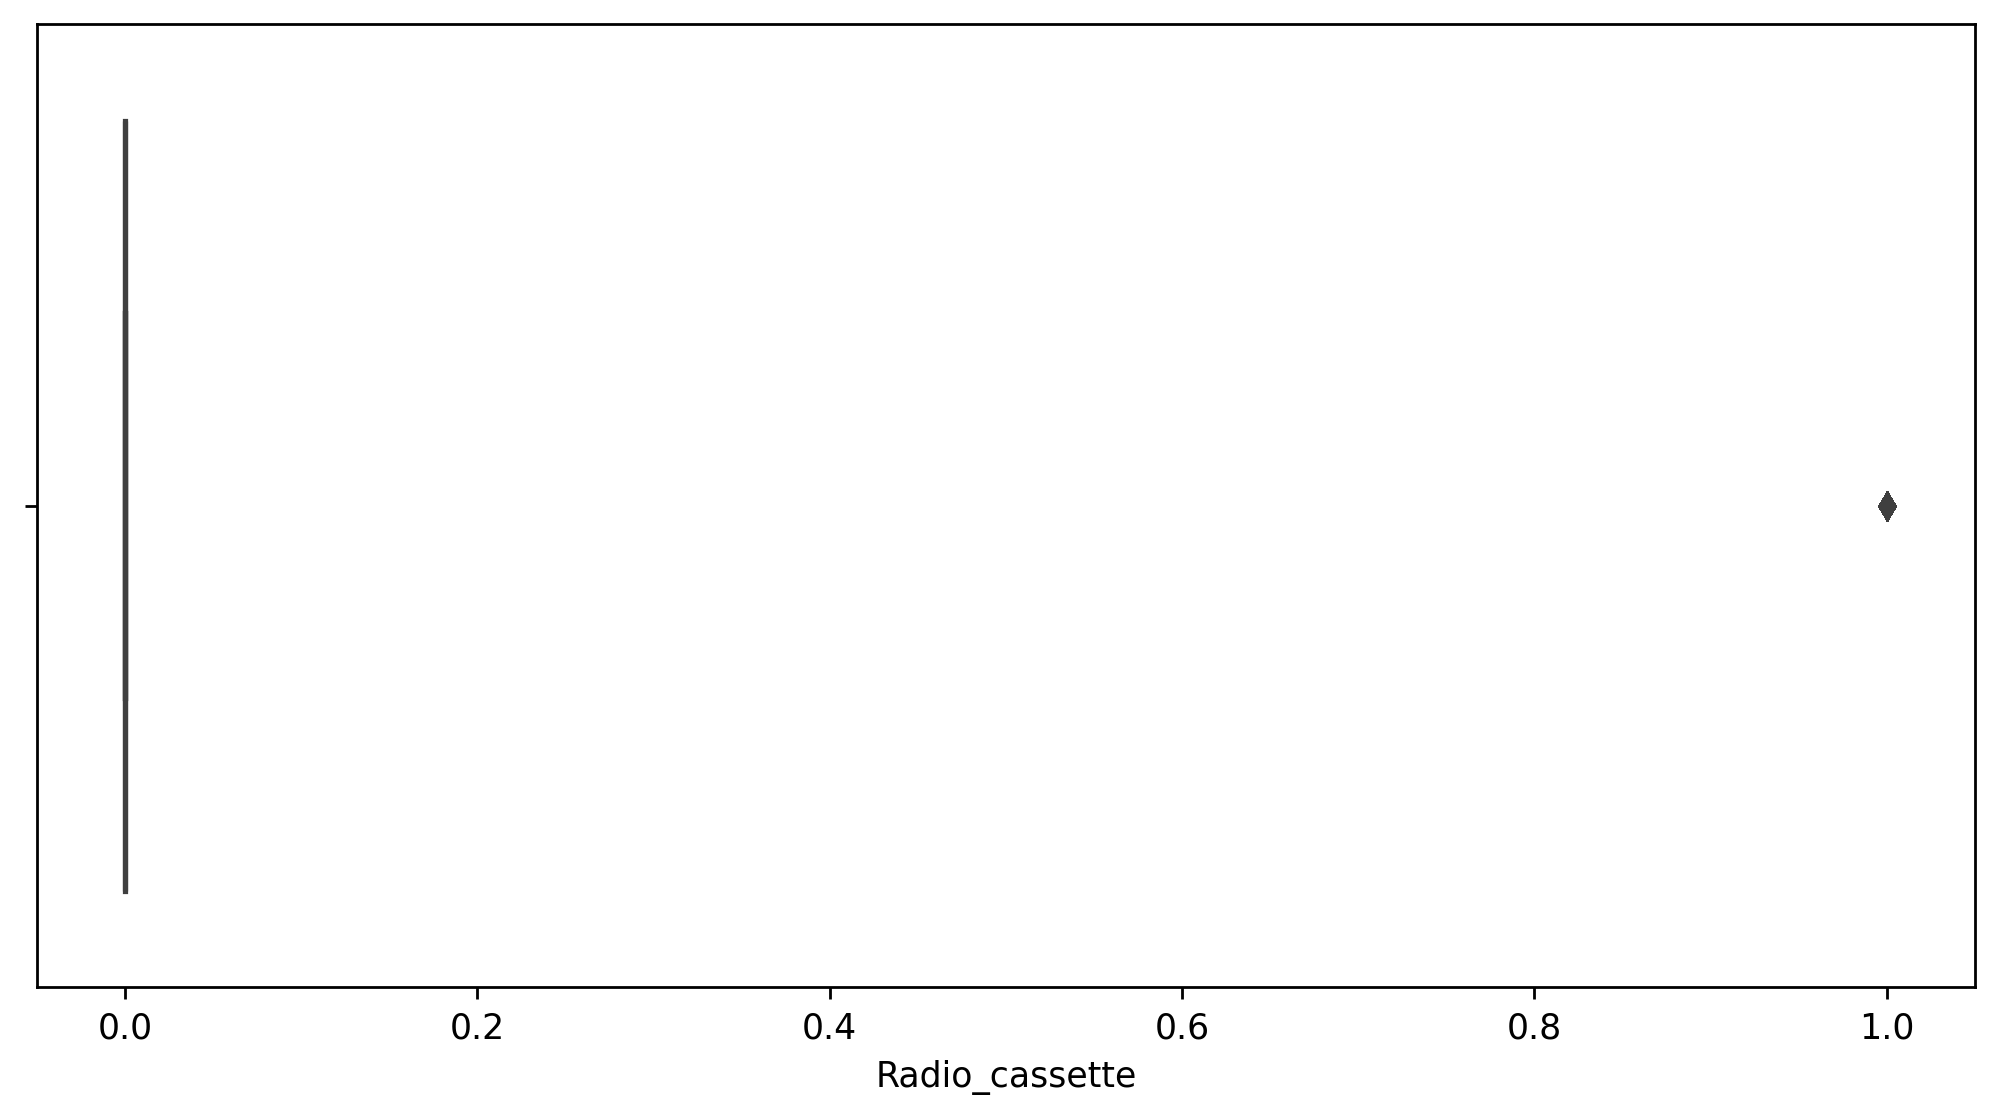

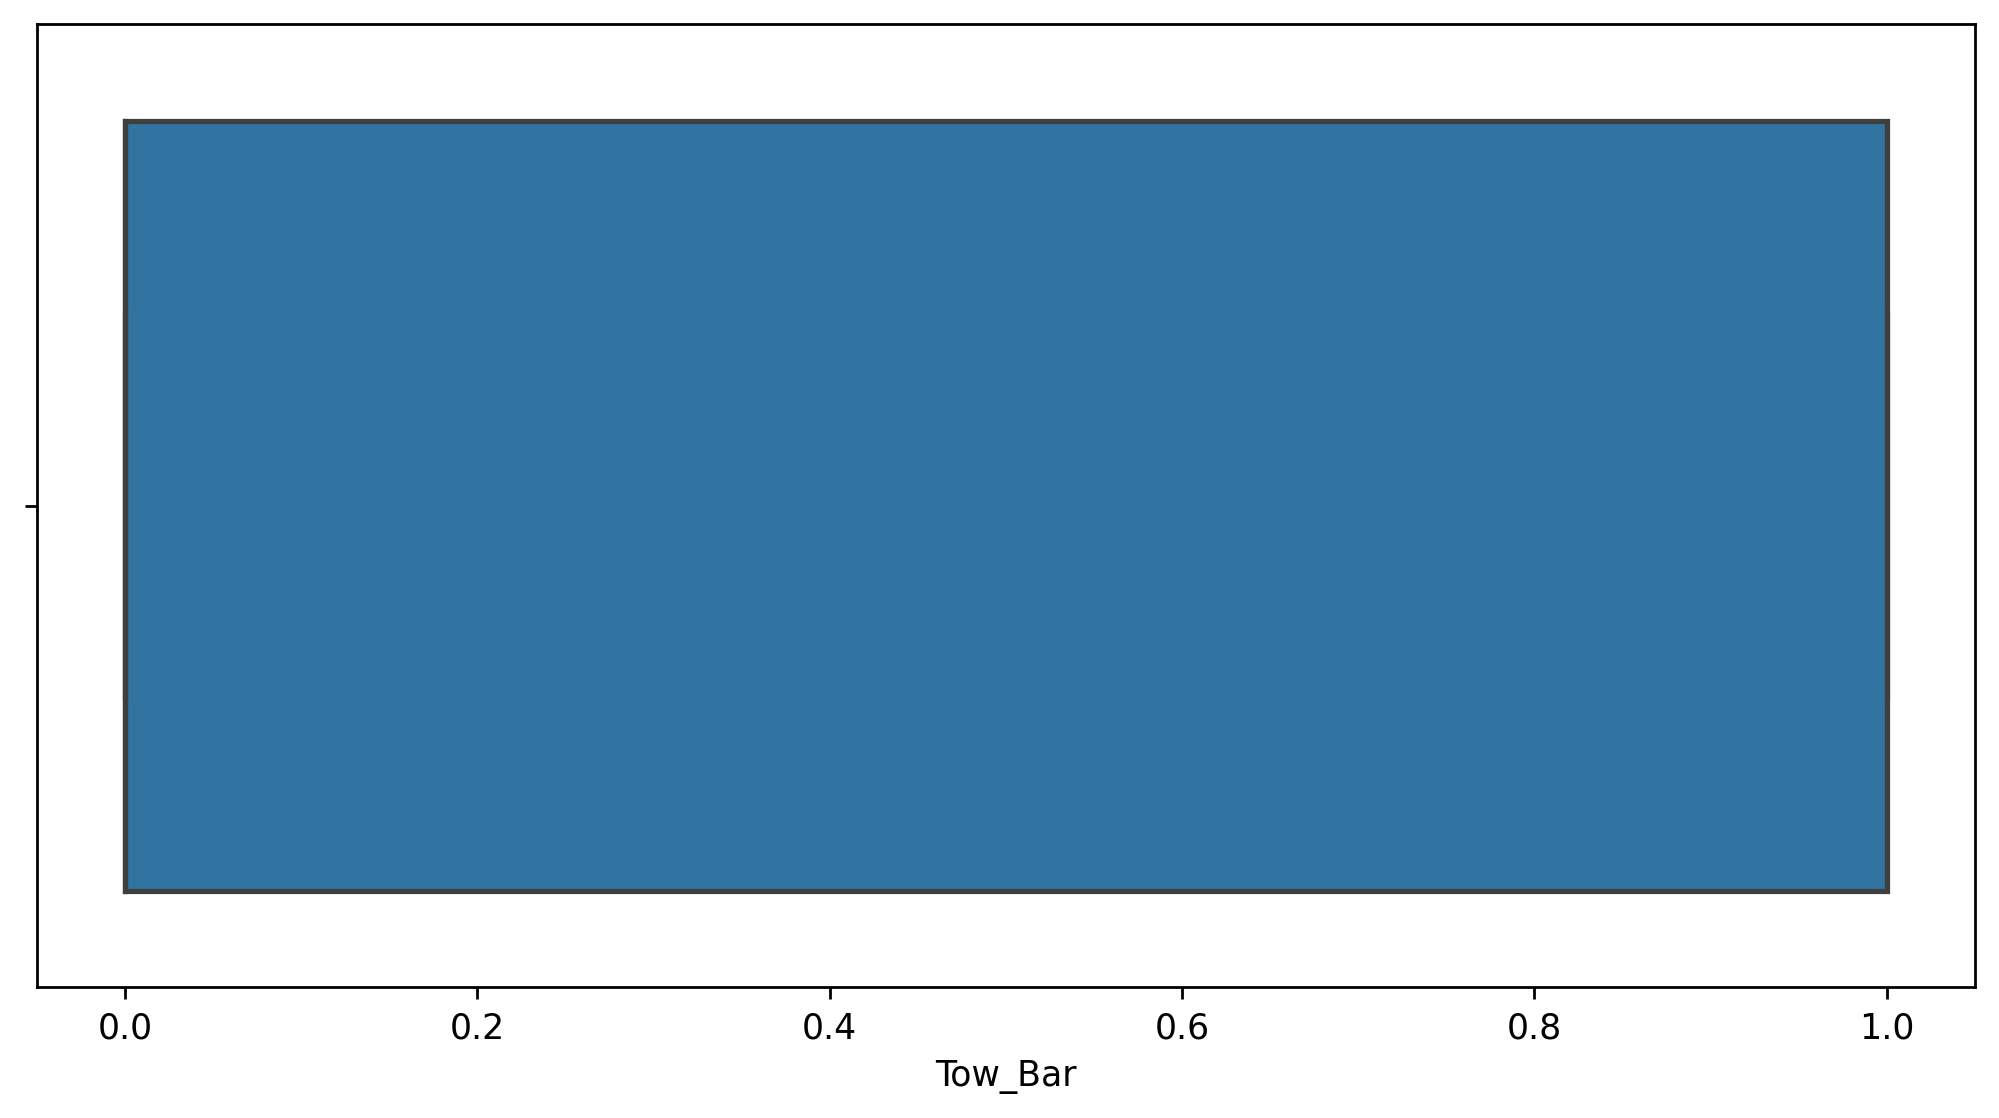

In [19]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [20]:
import numpy as np

def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Assuming 'df' is your DataFrame
for i in ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Automatic', 'Gears', 'Quarterly_Tax', 'Weight', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Automatic_airco', 'CD_Player', 'Power_Steering', 'Radio', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


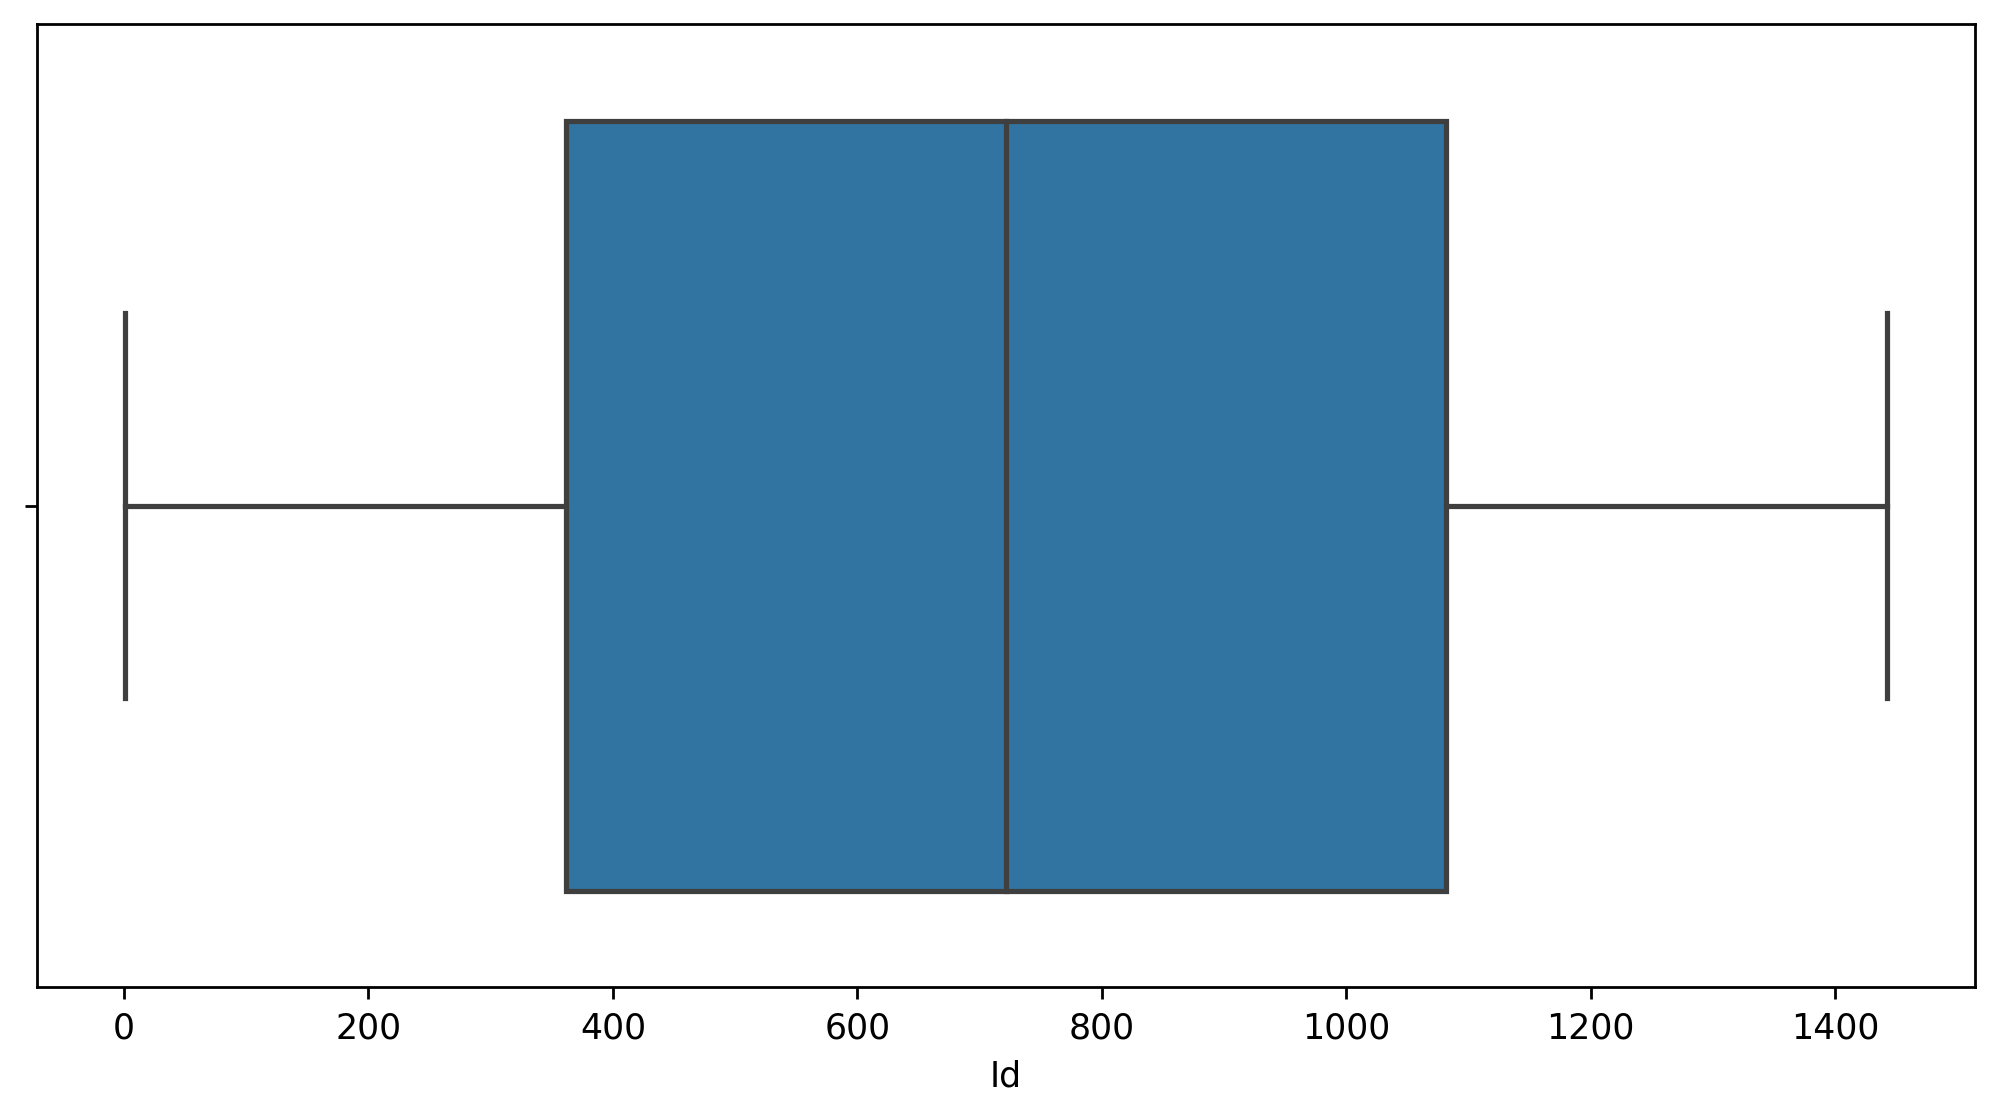

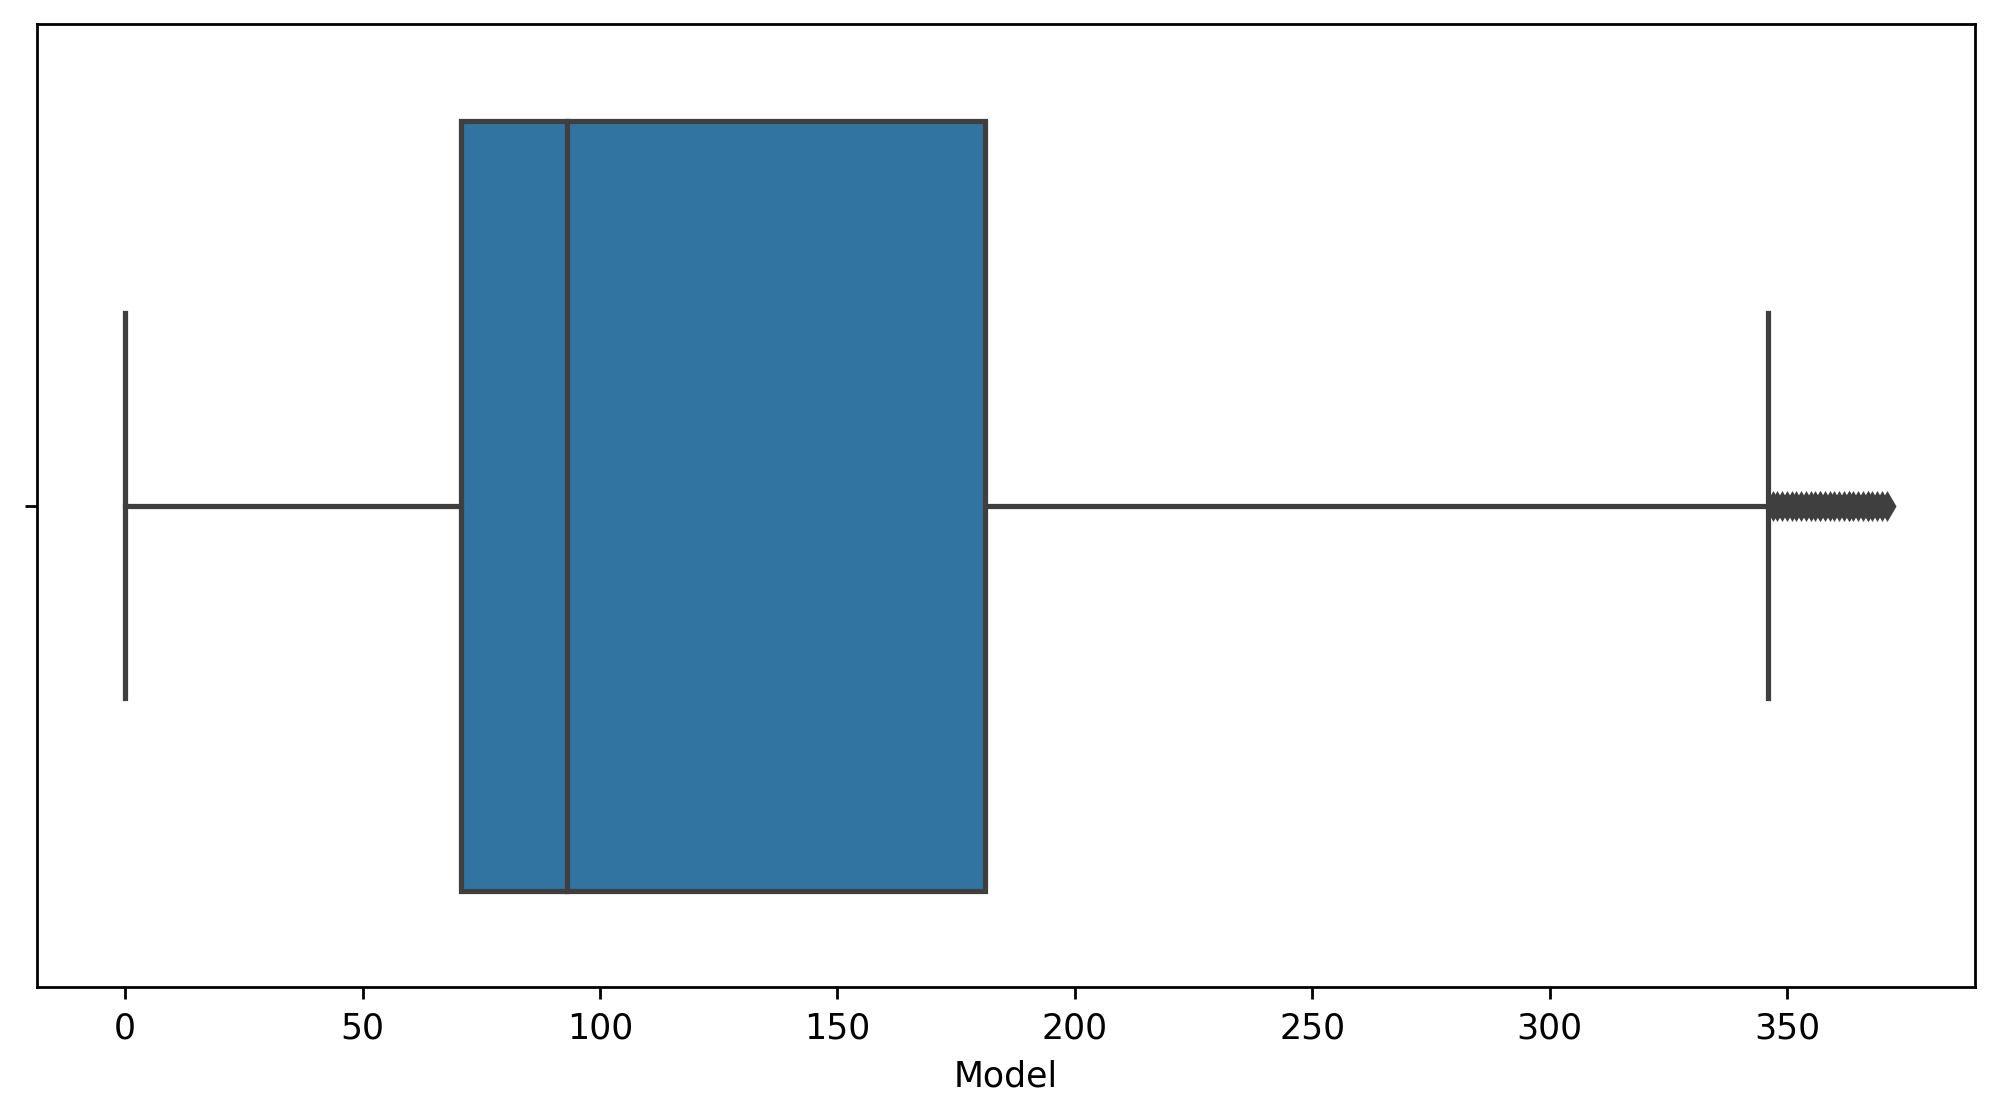

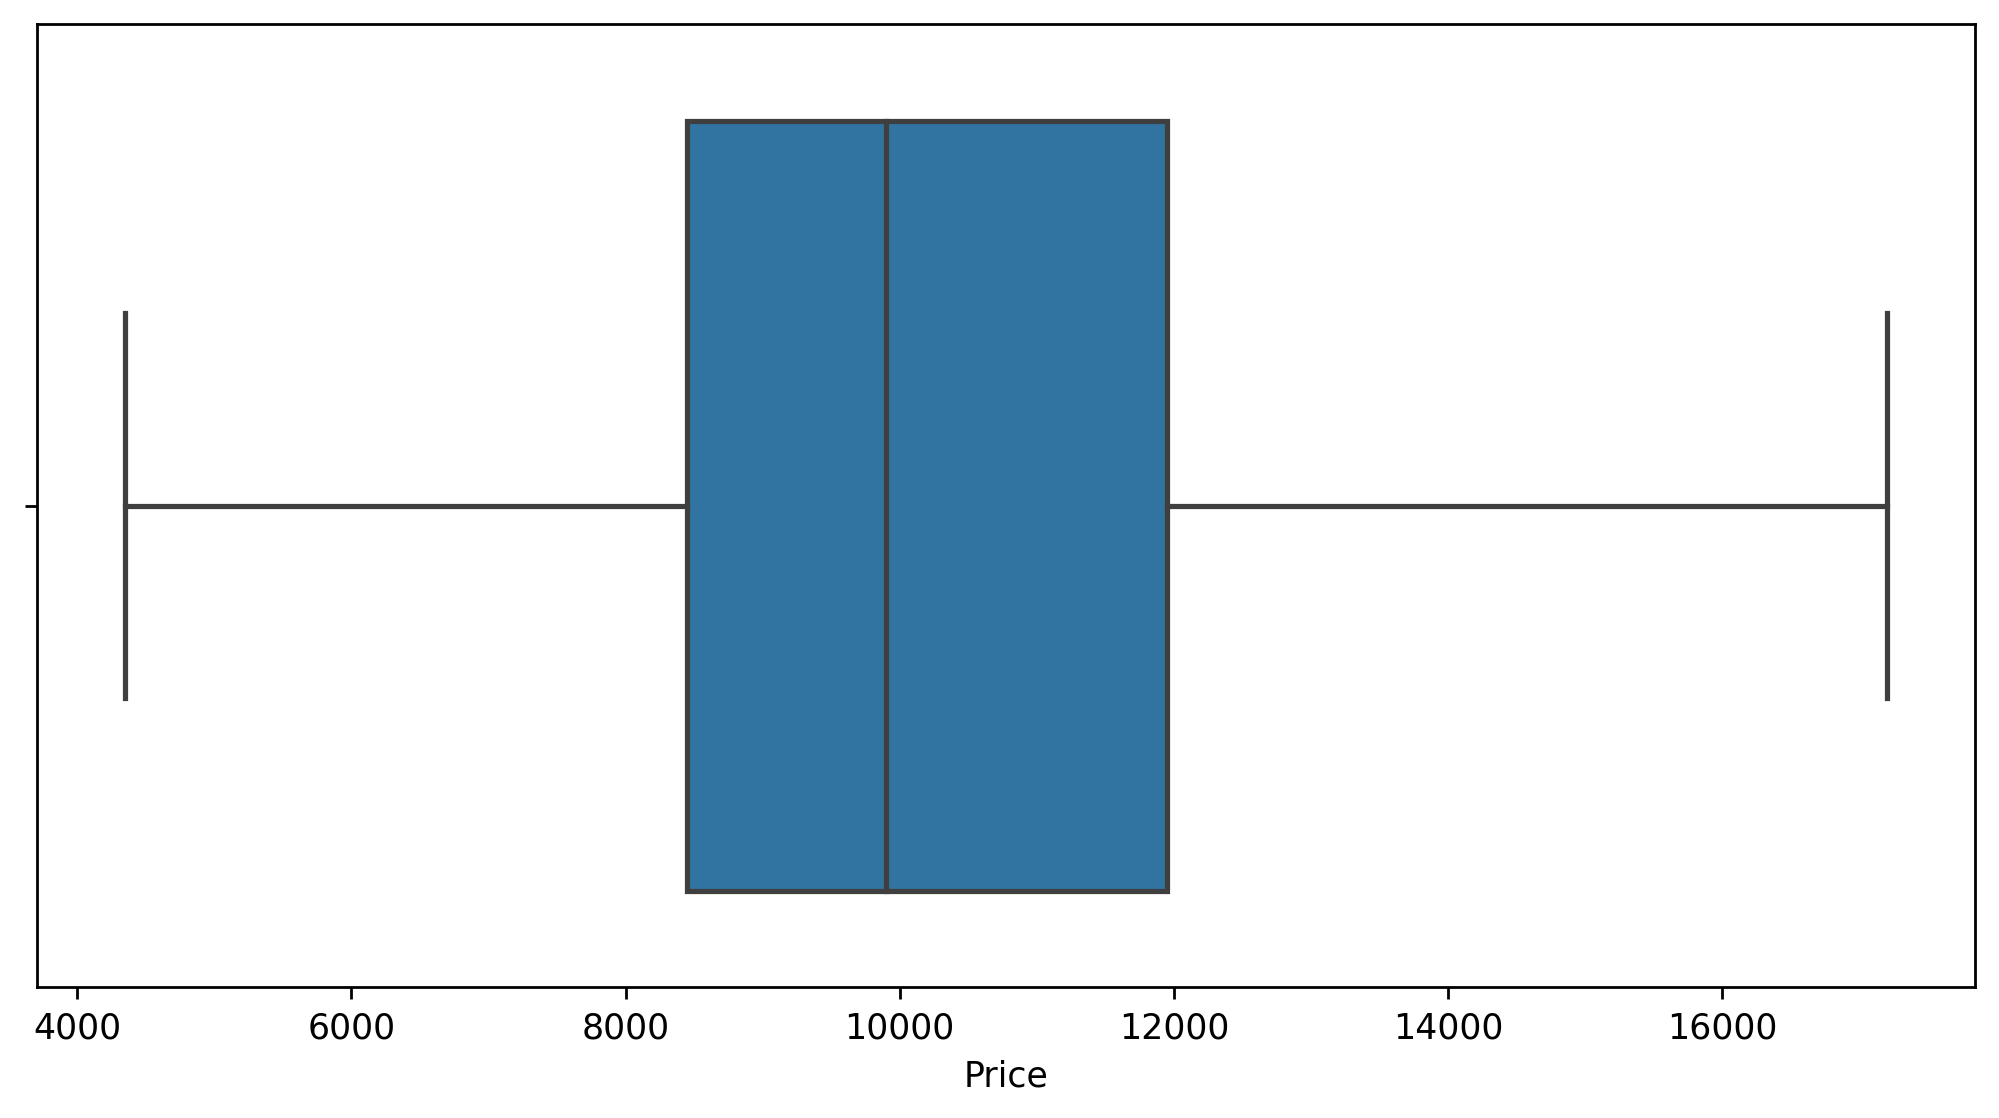

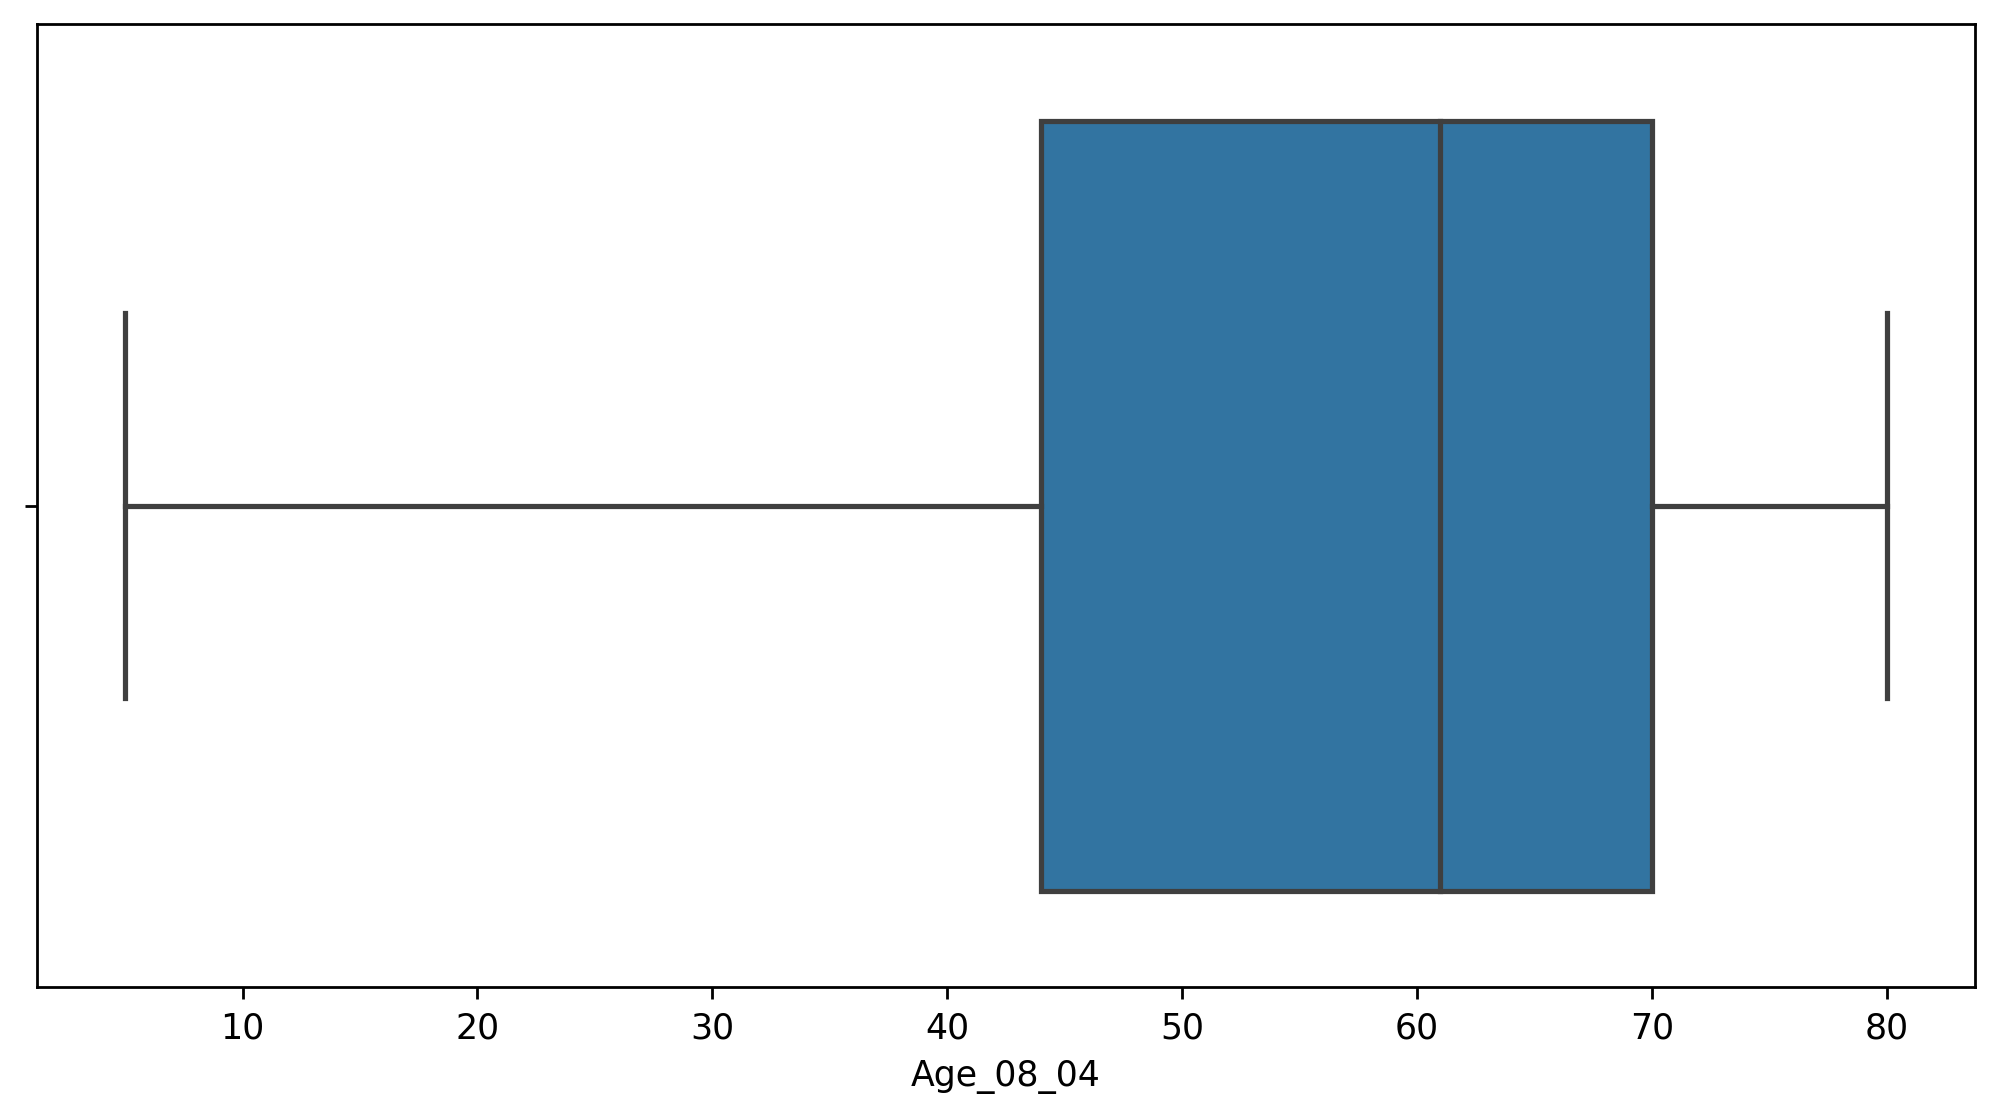

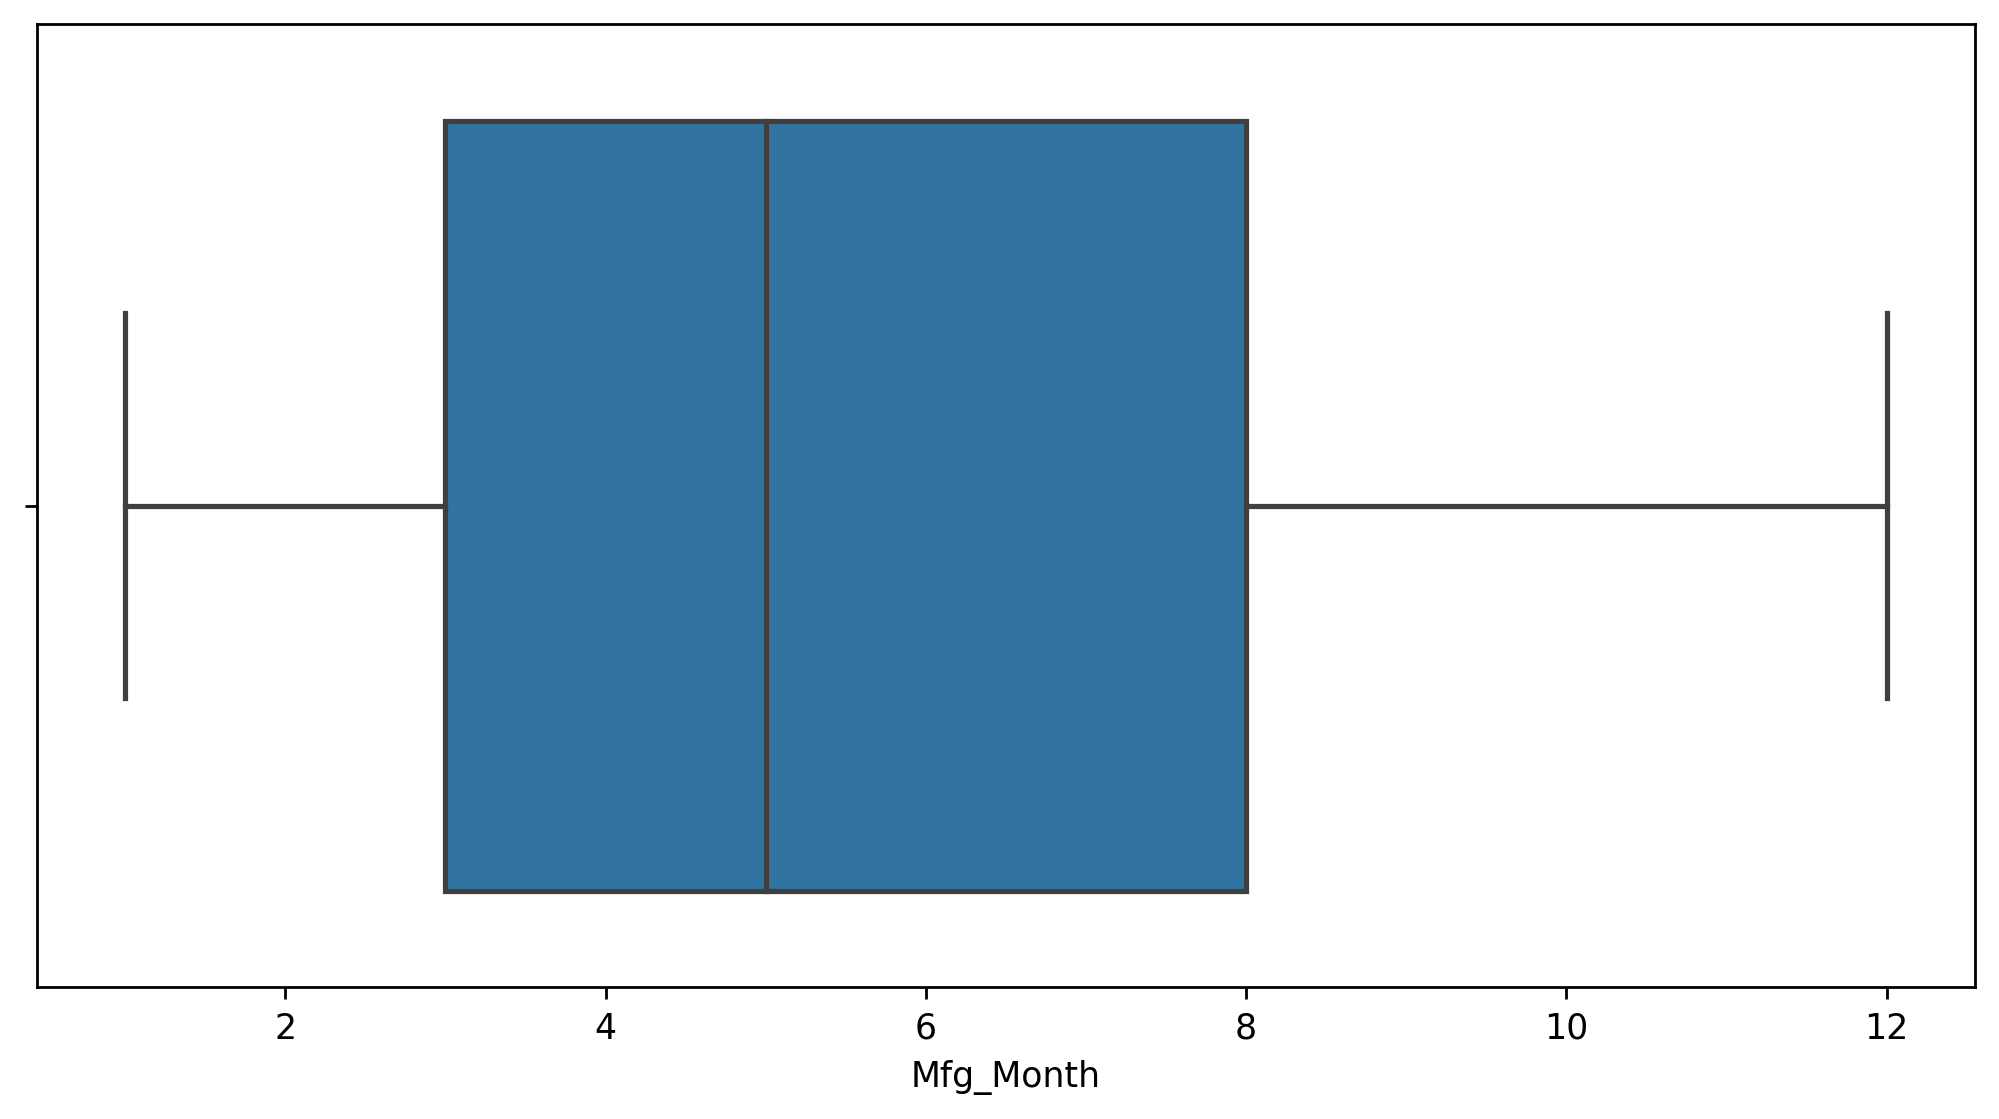

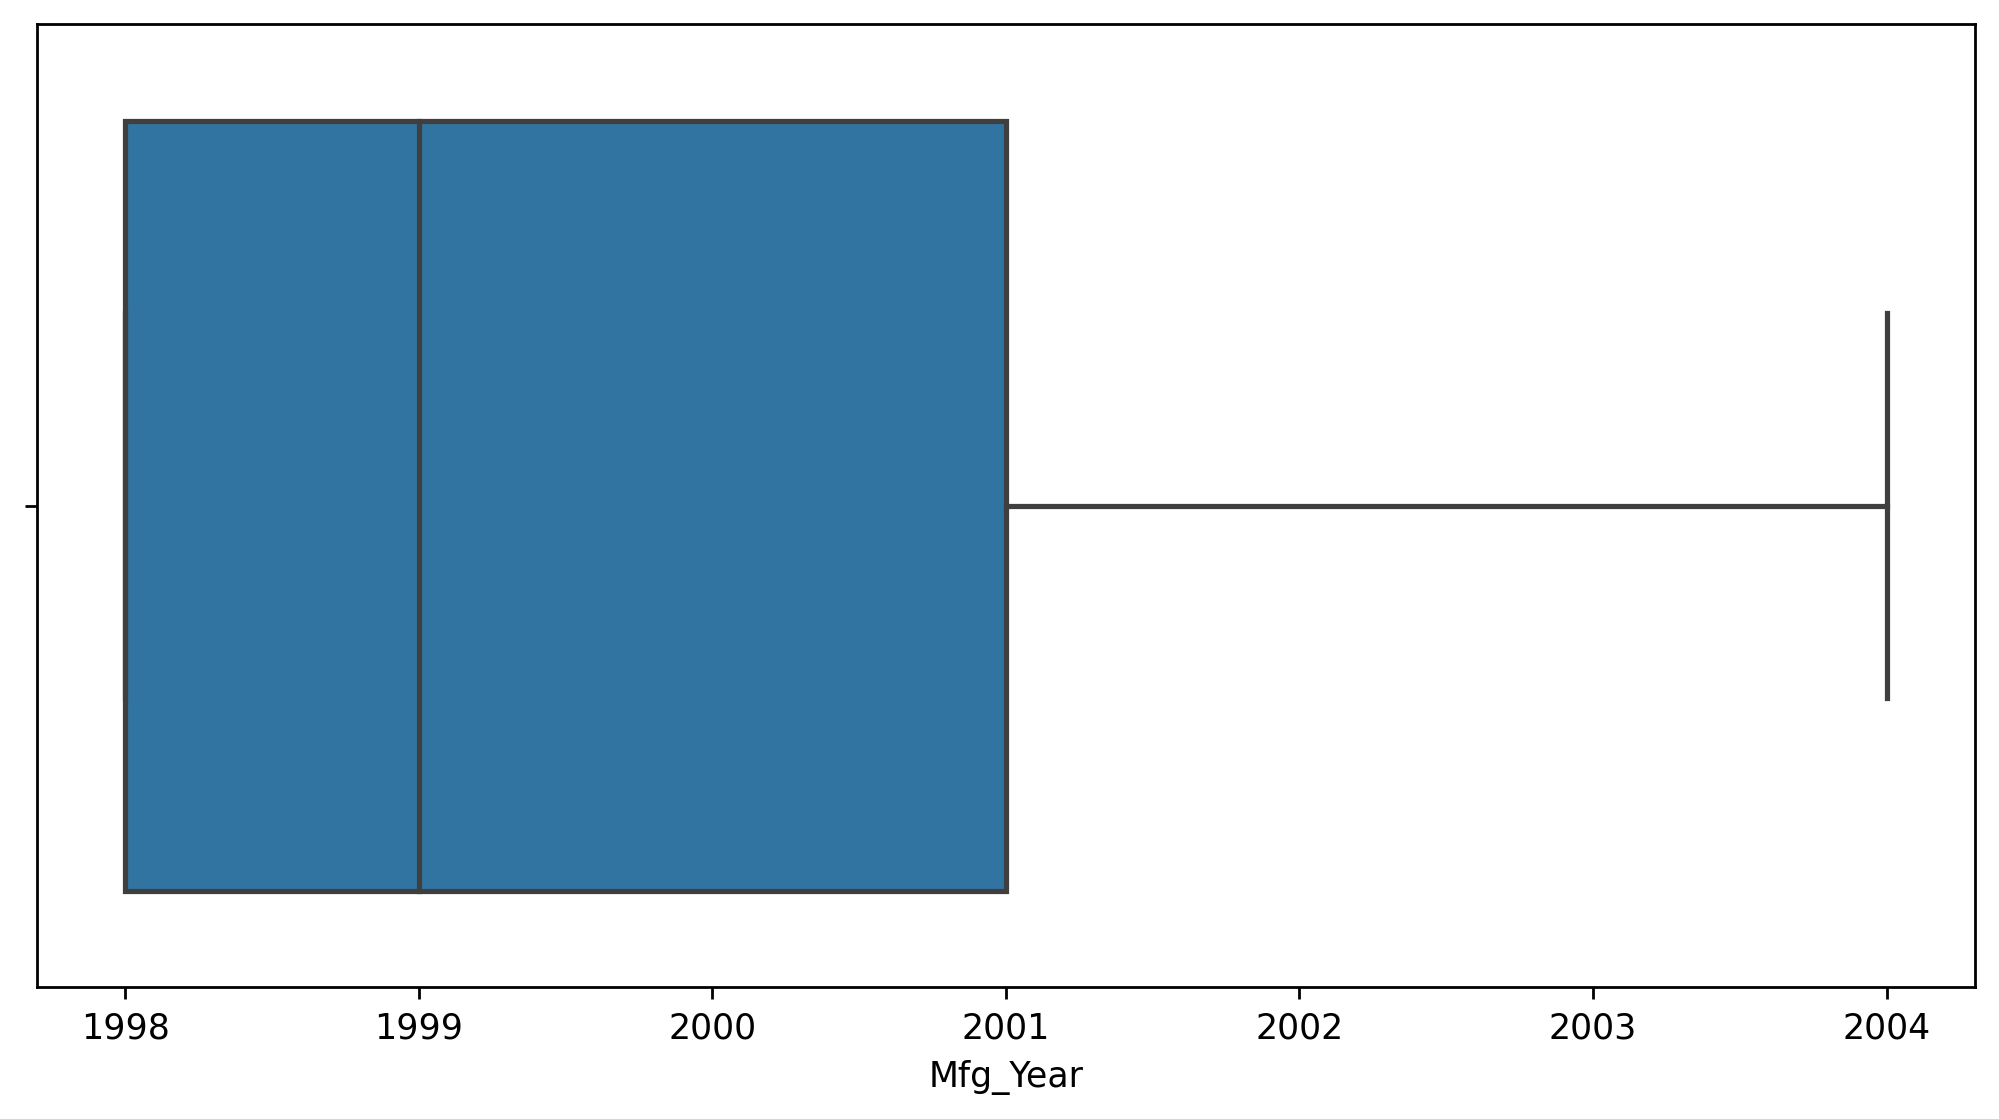

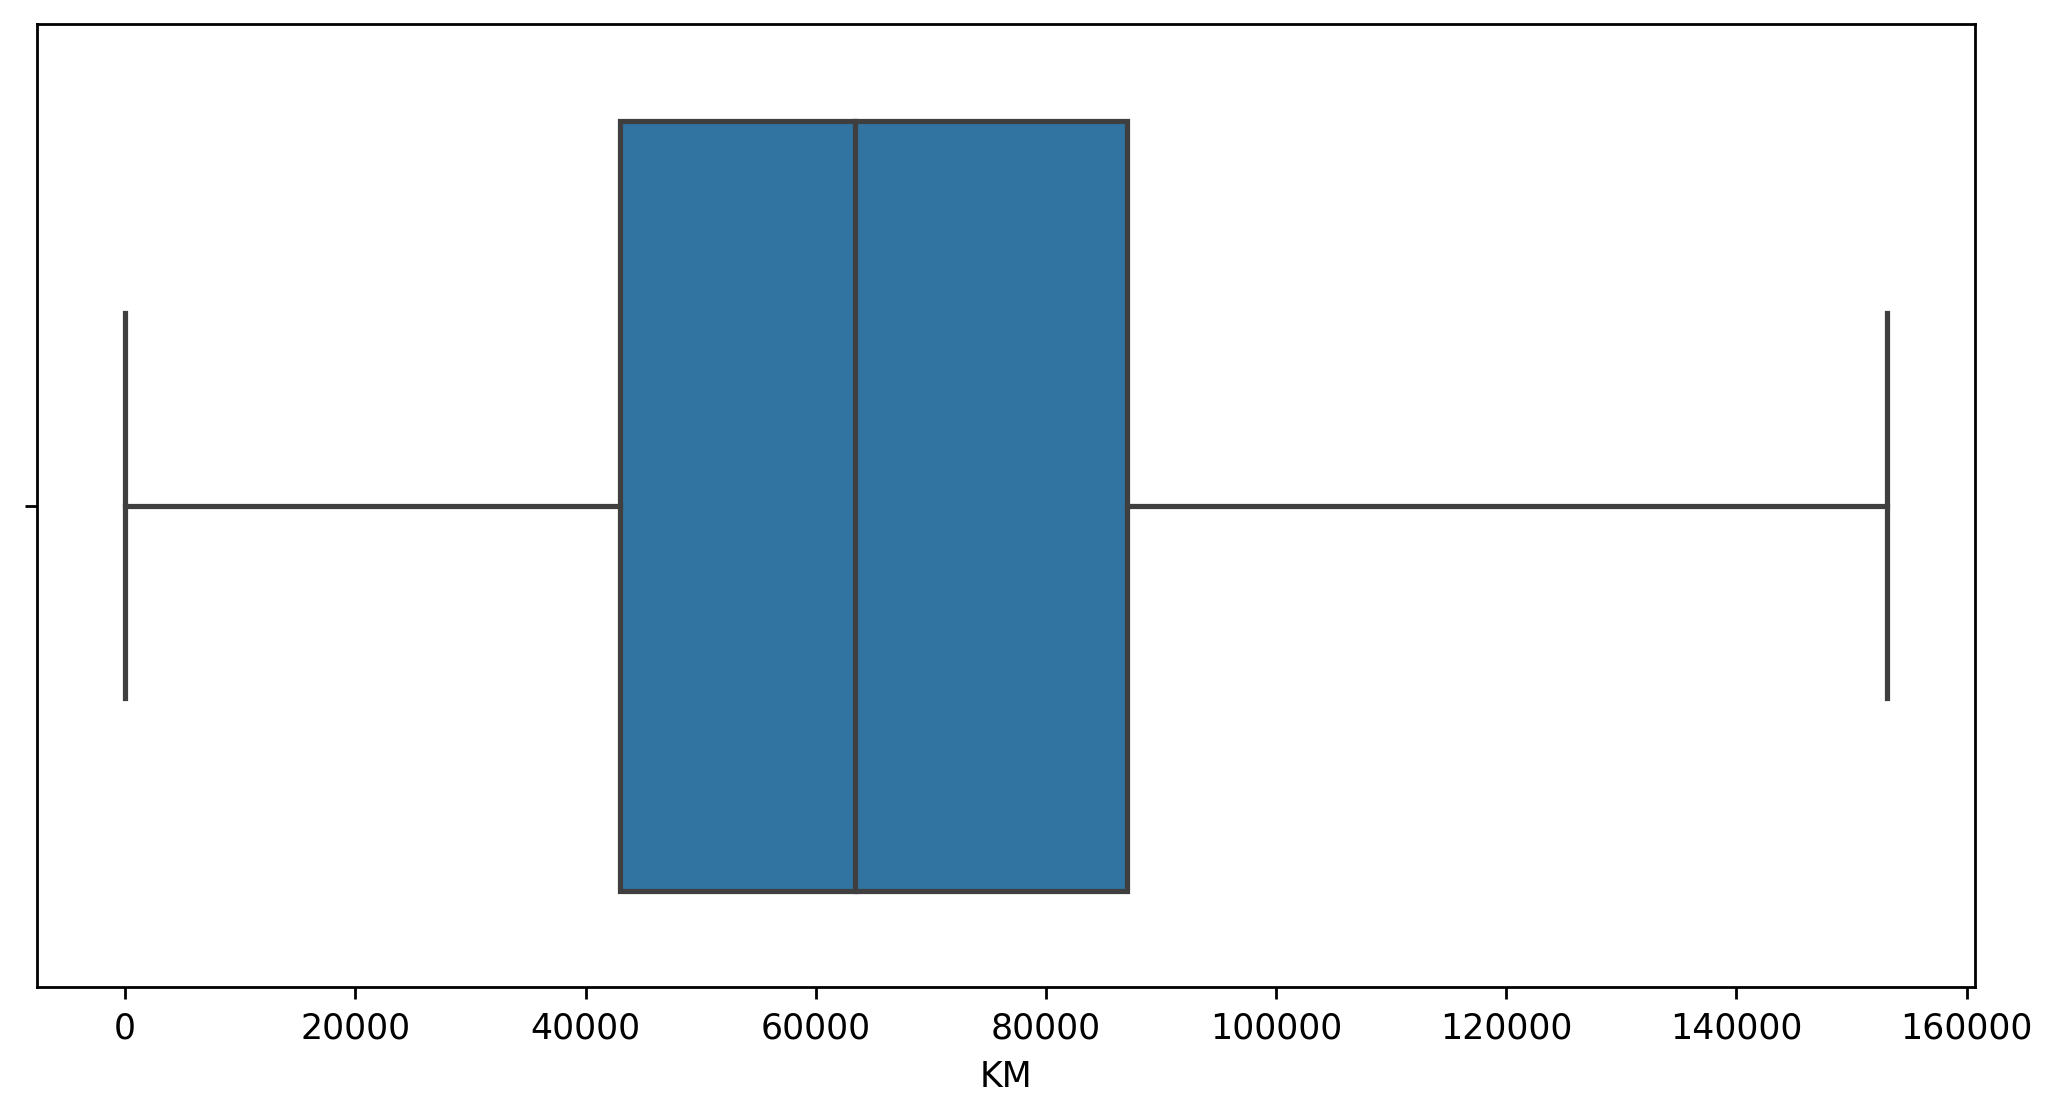

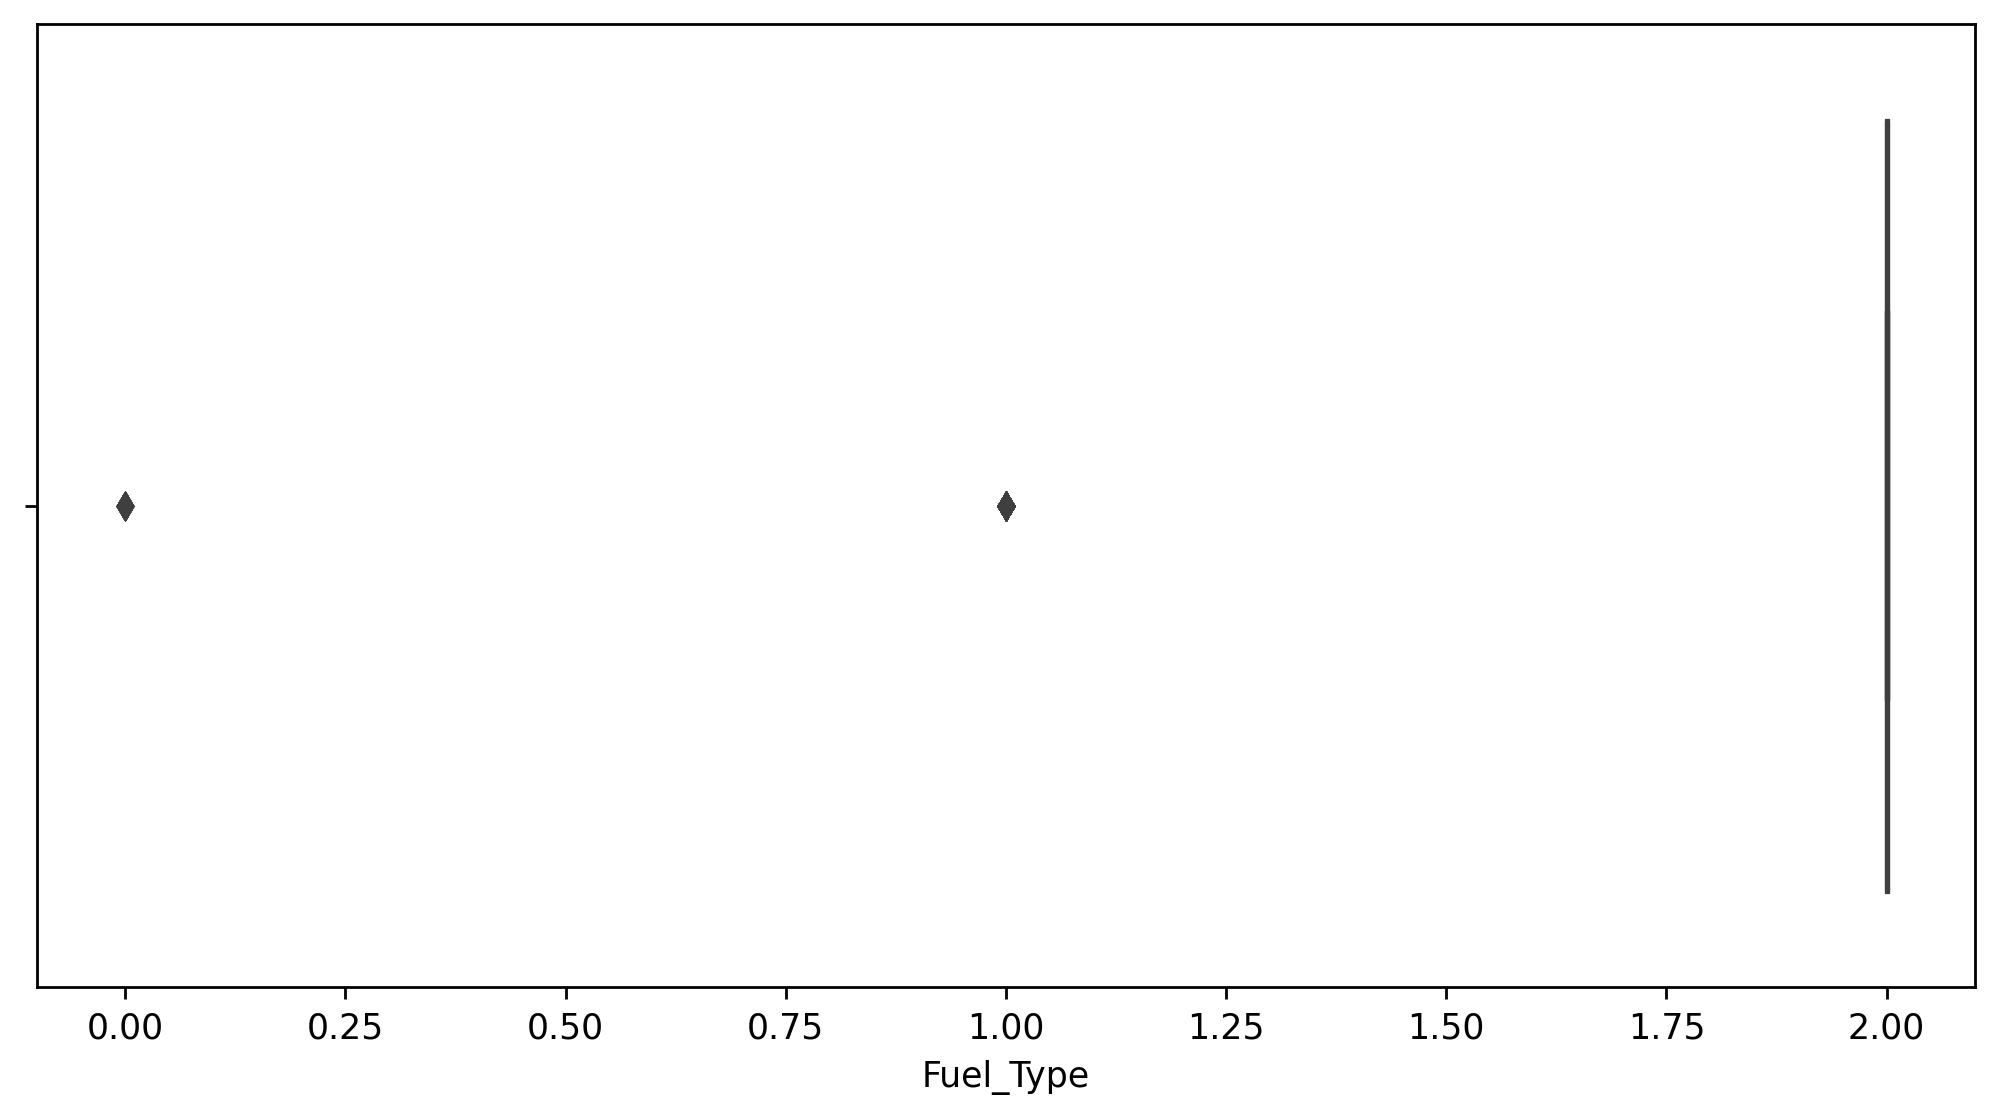

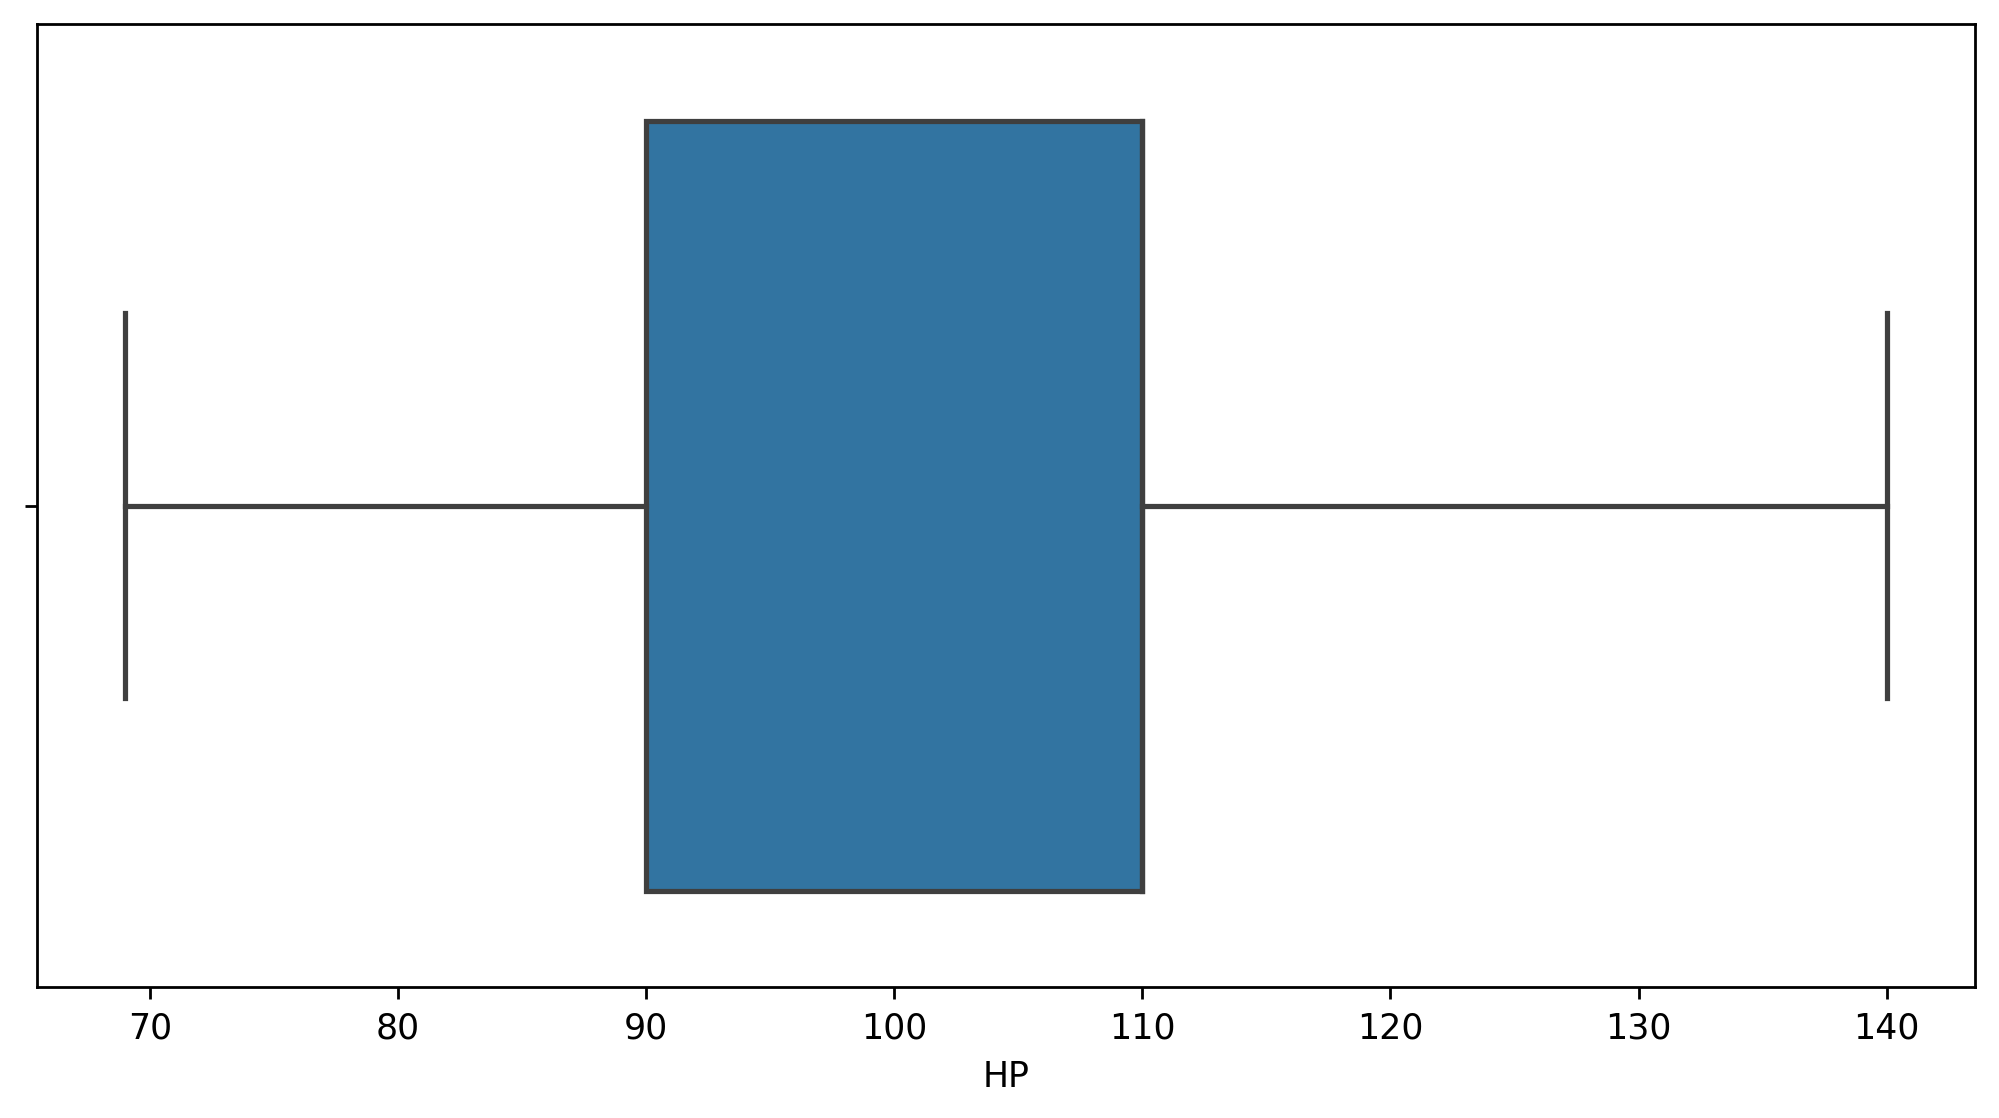

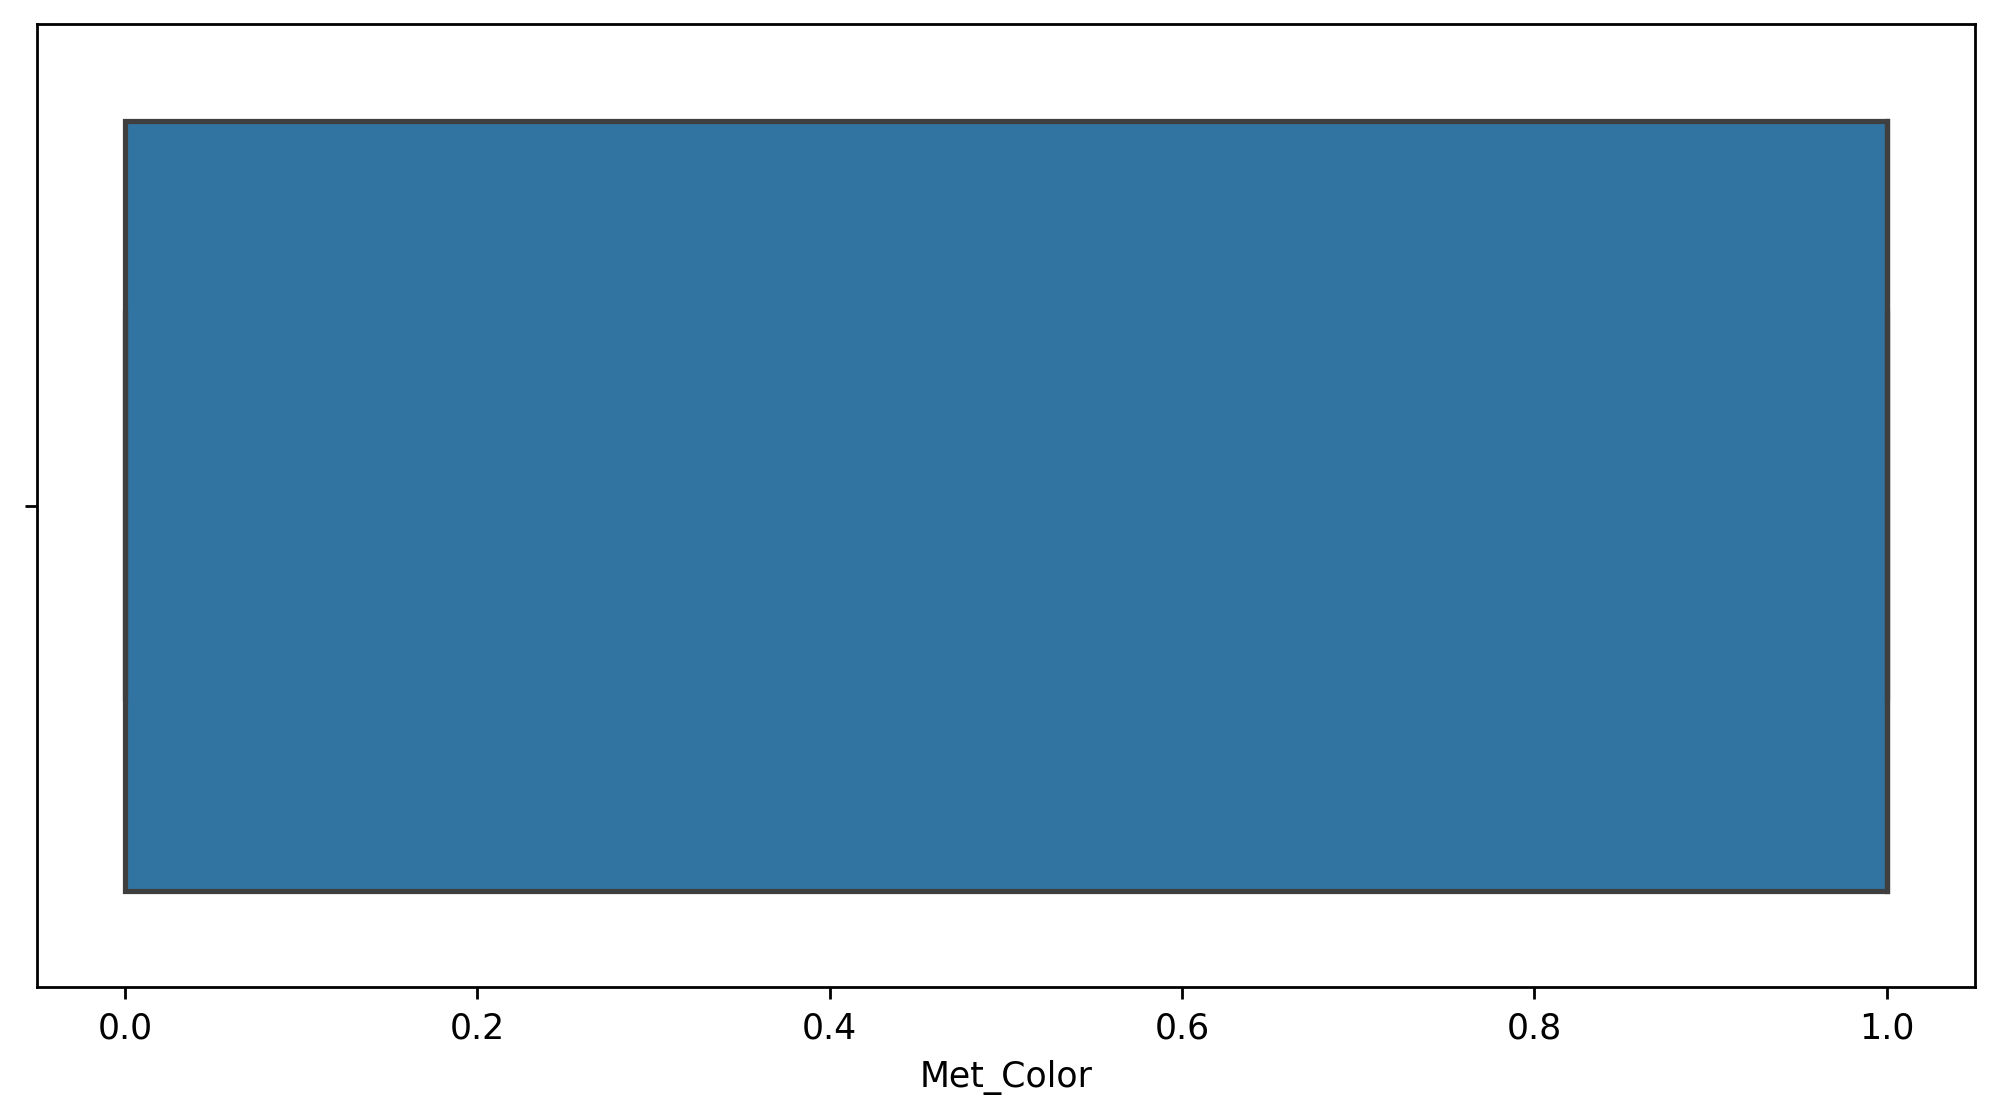

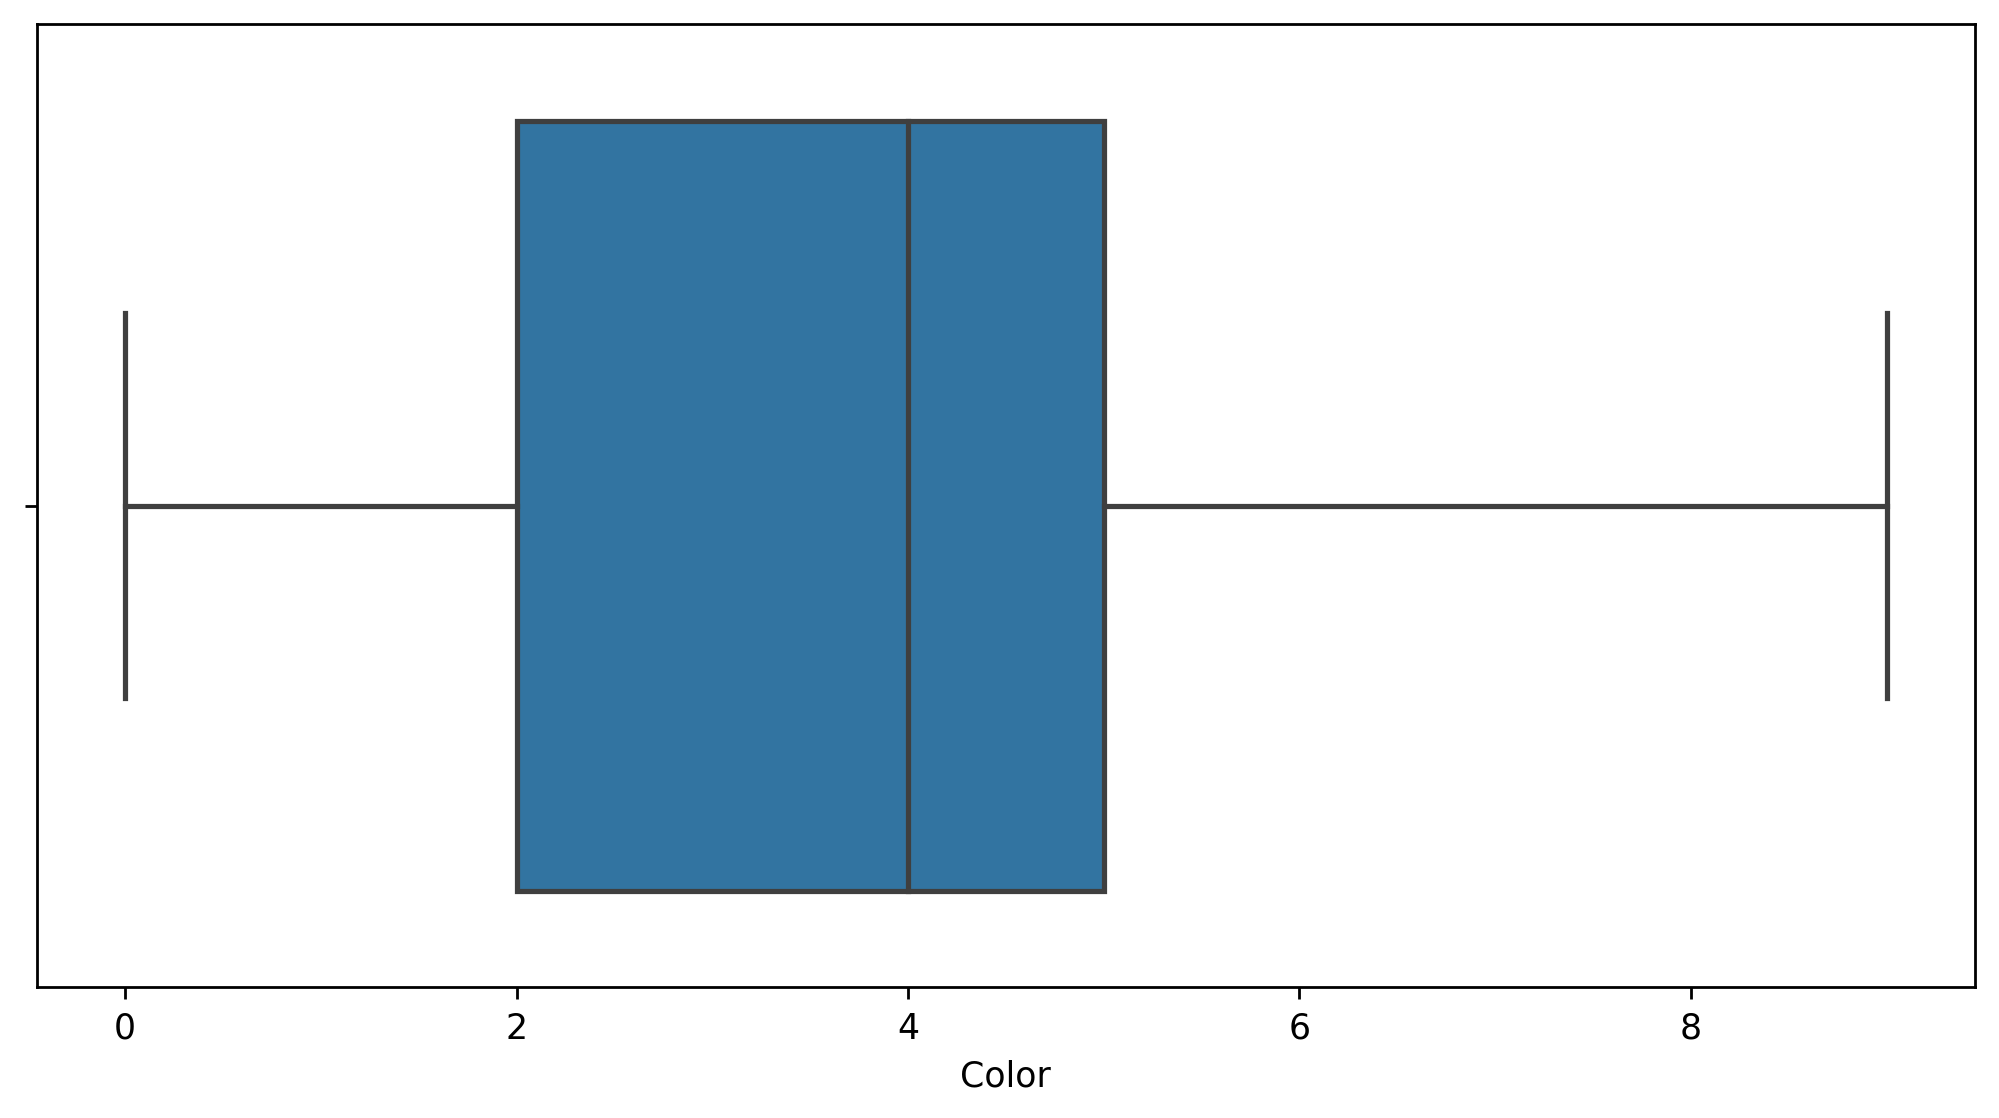

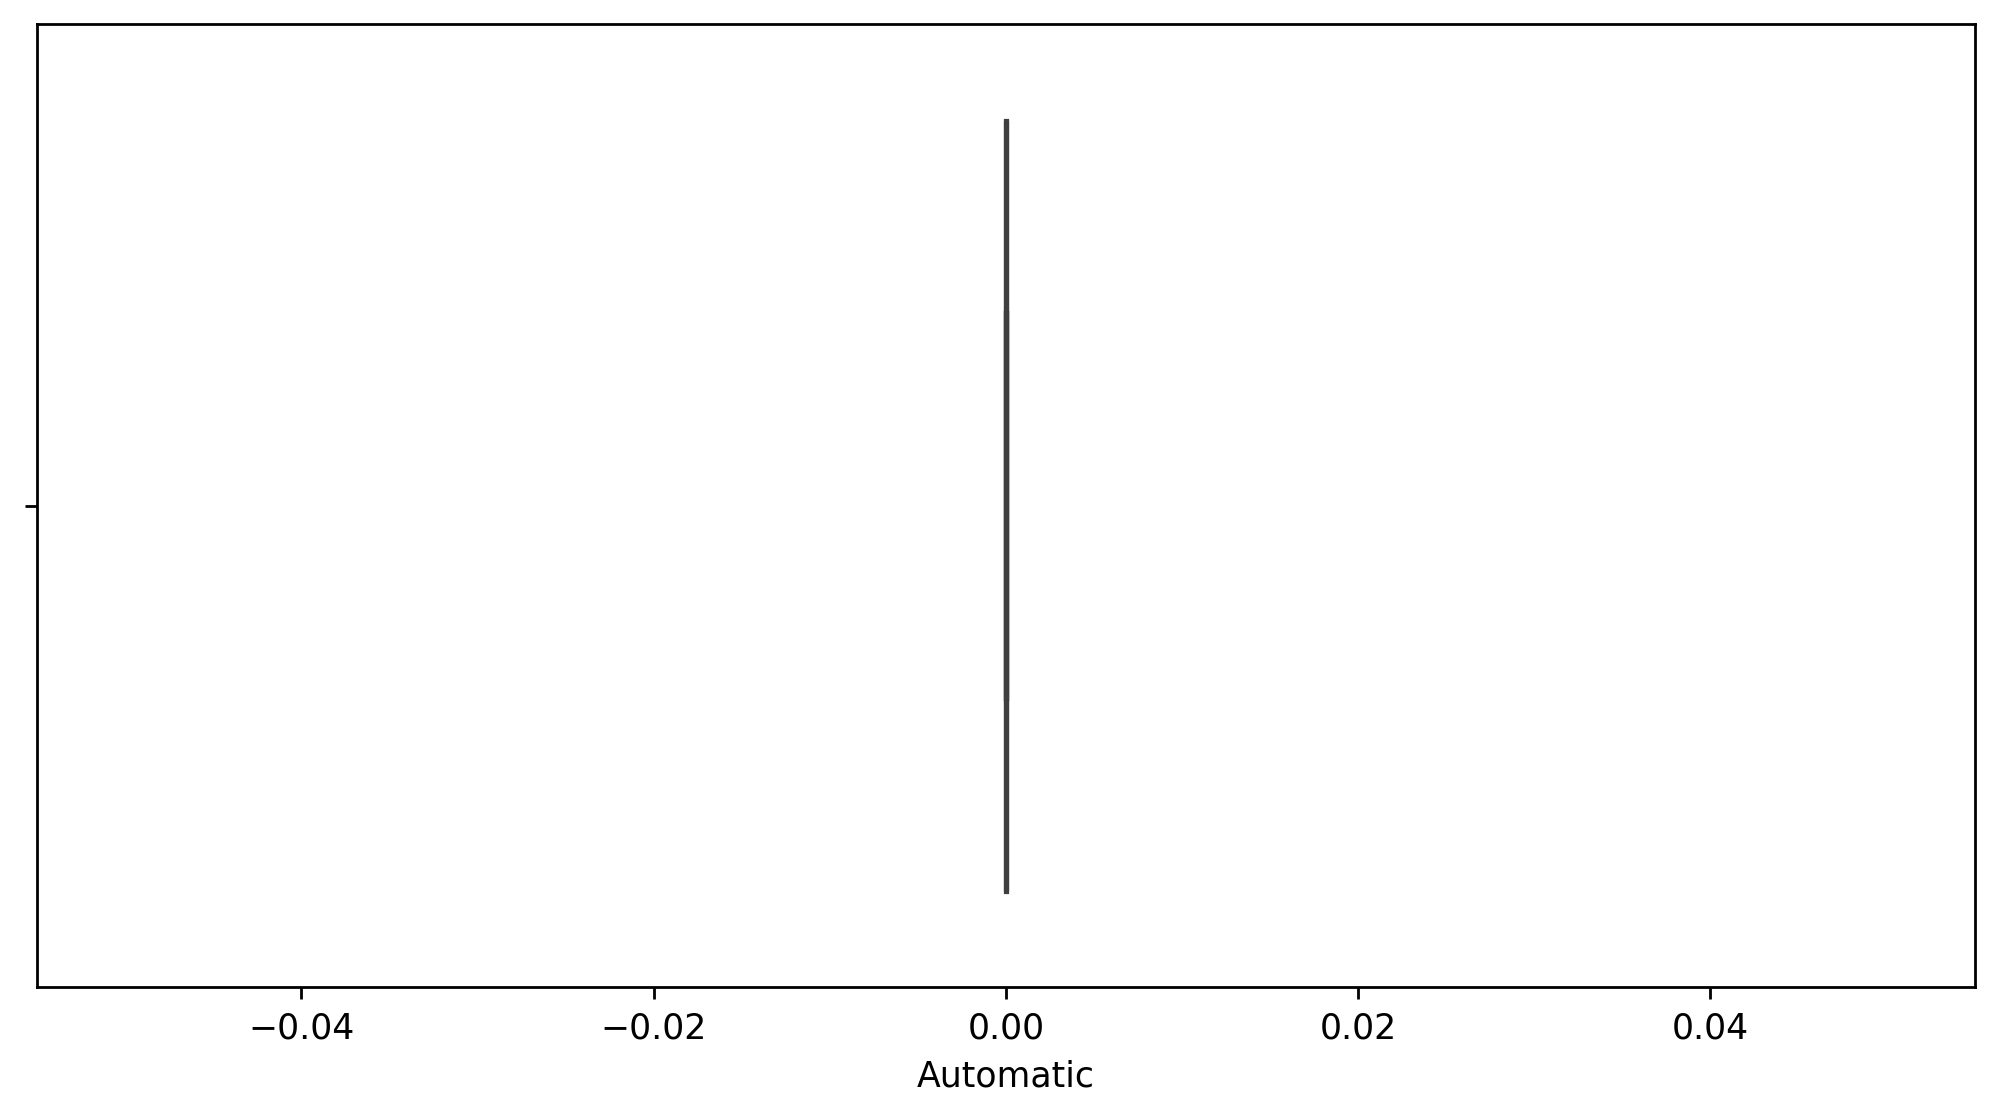

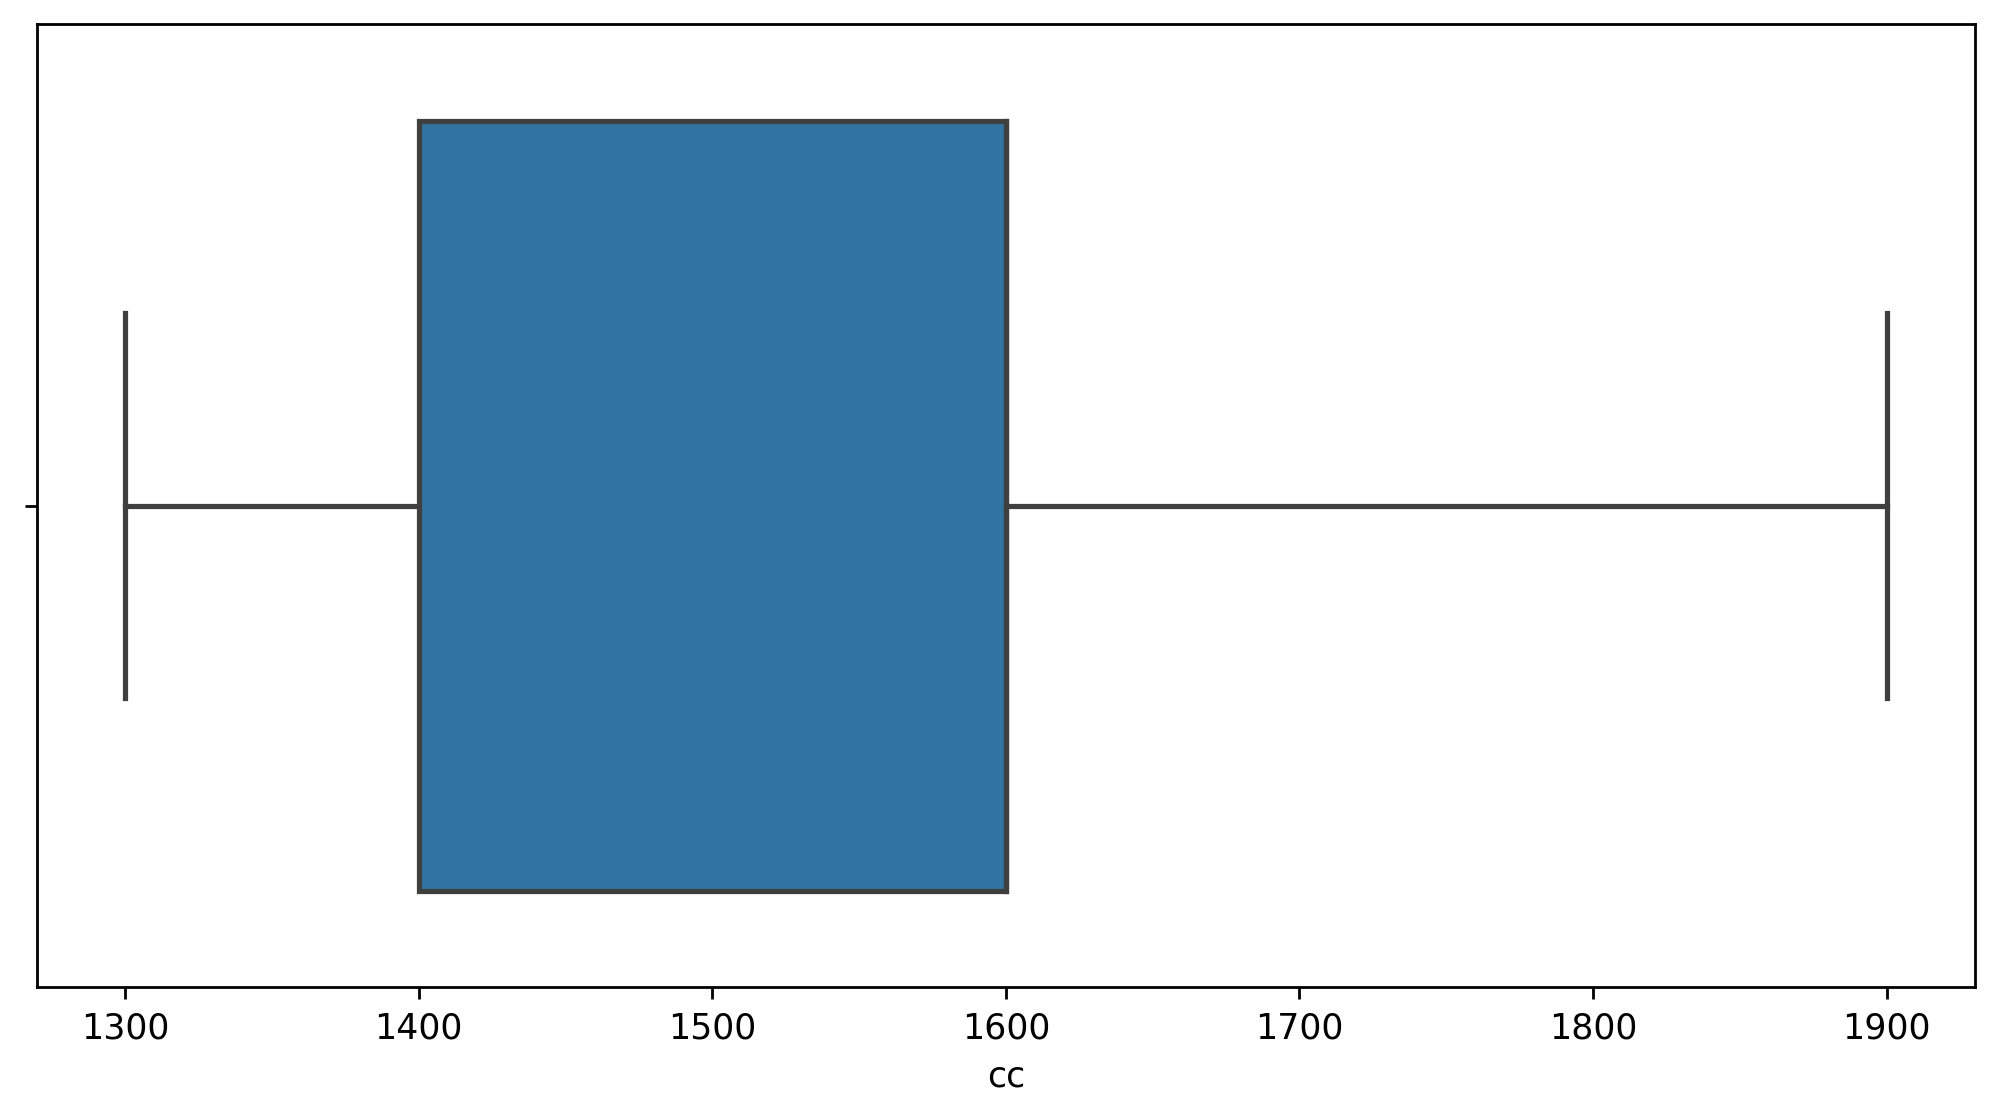

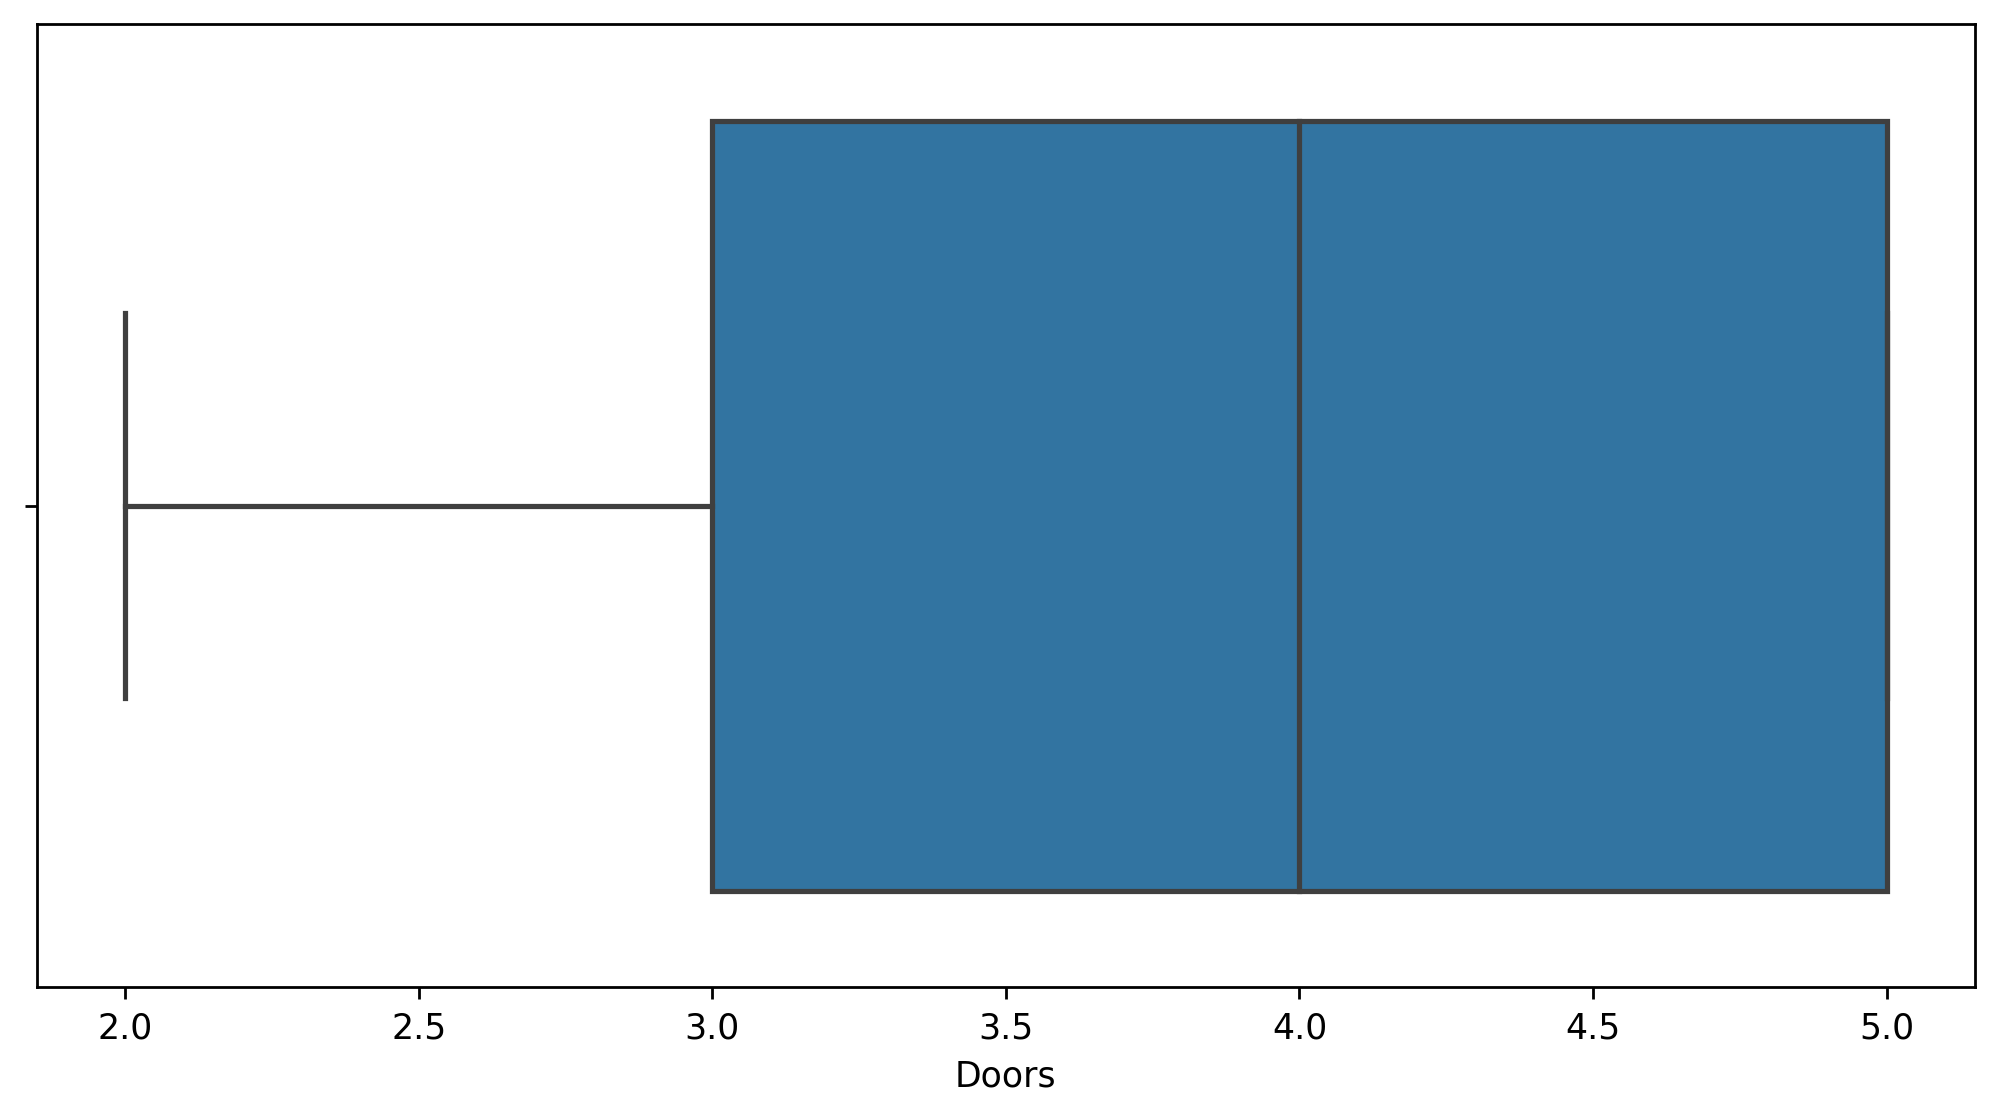

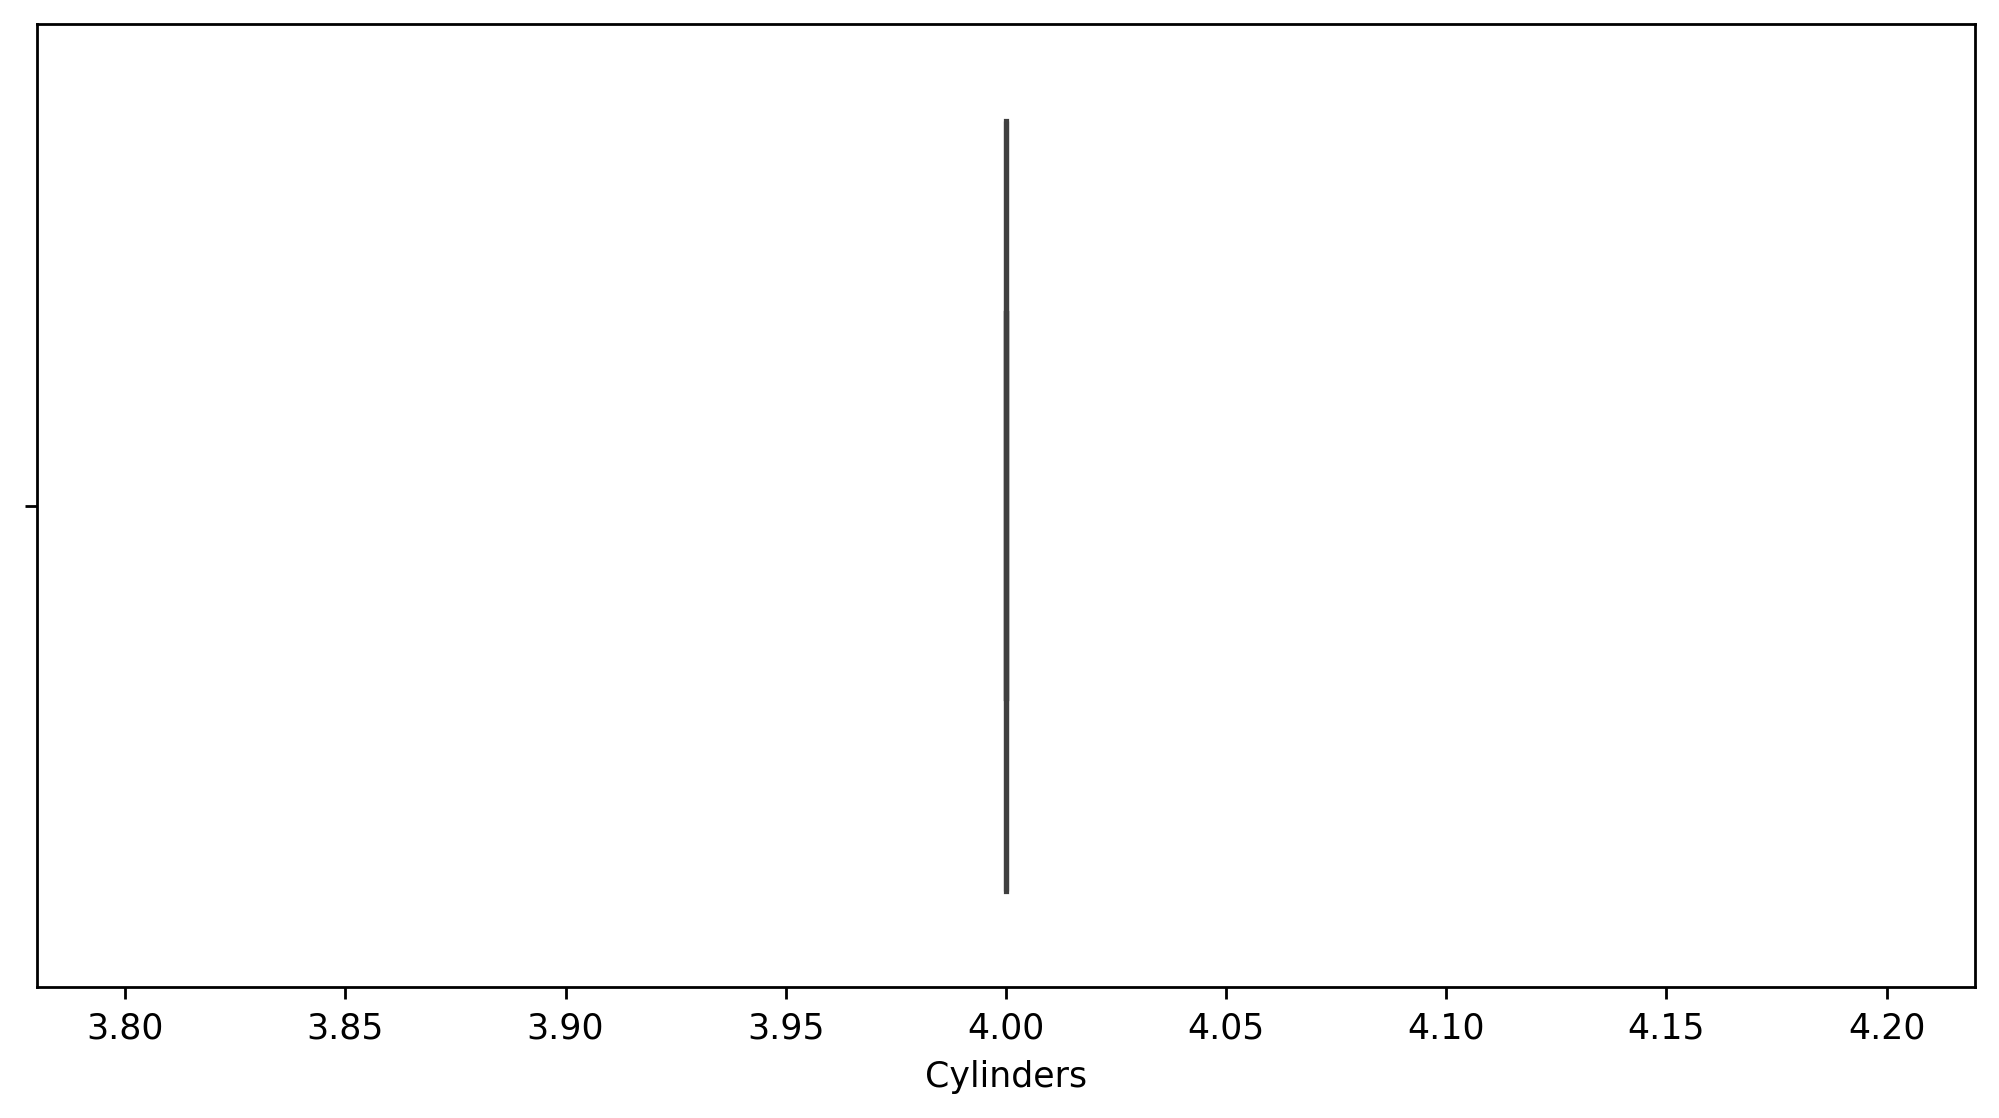

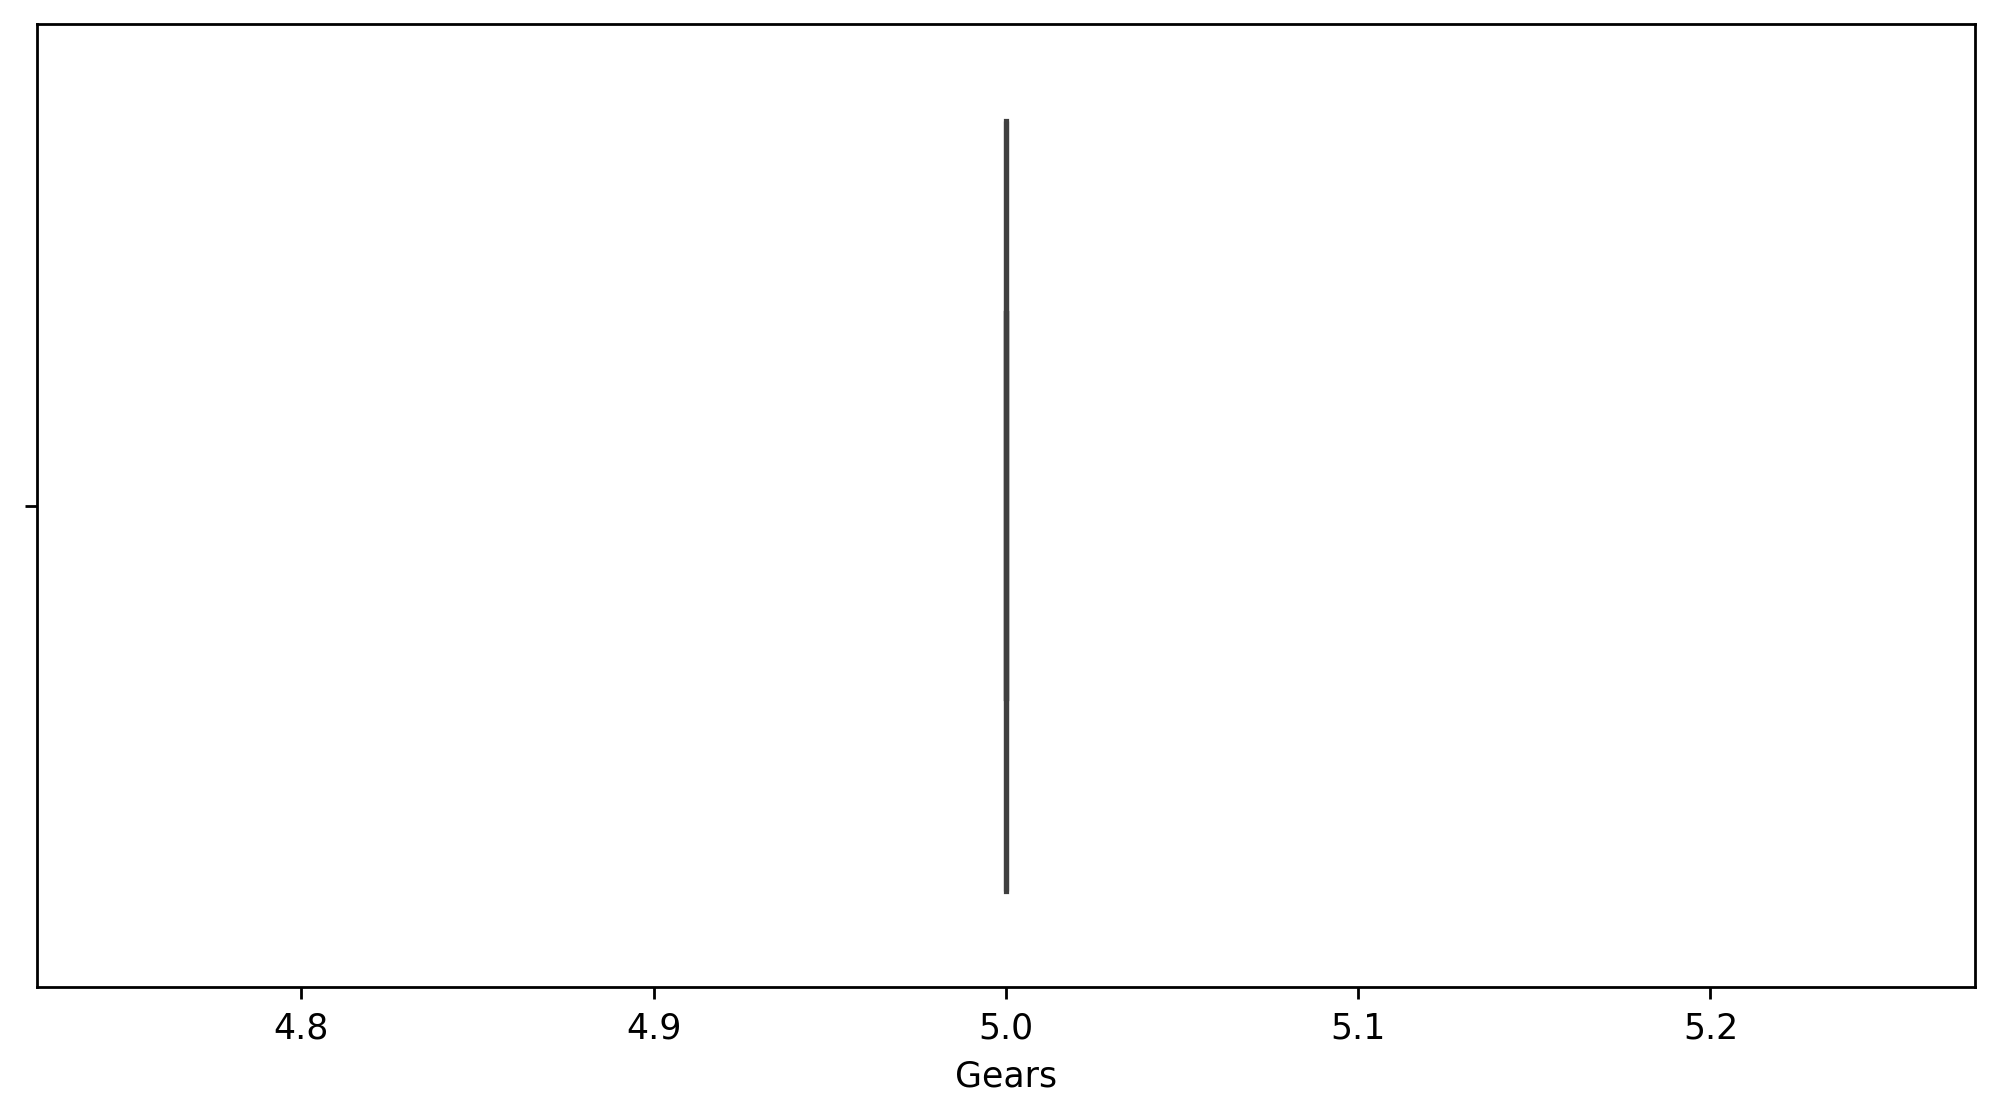

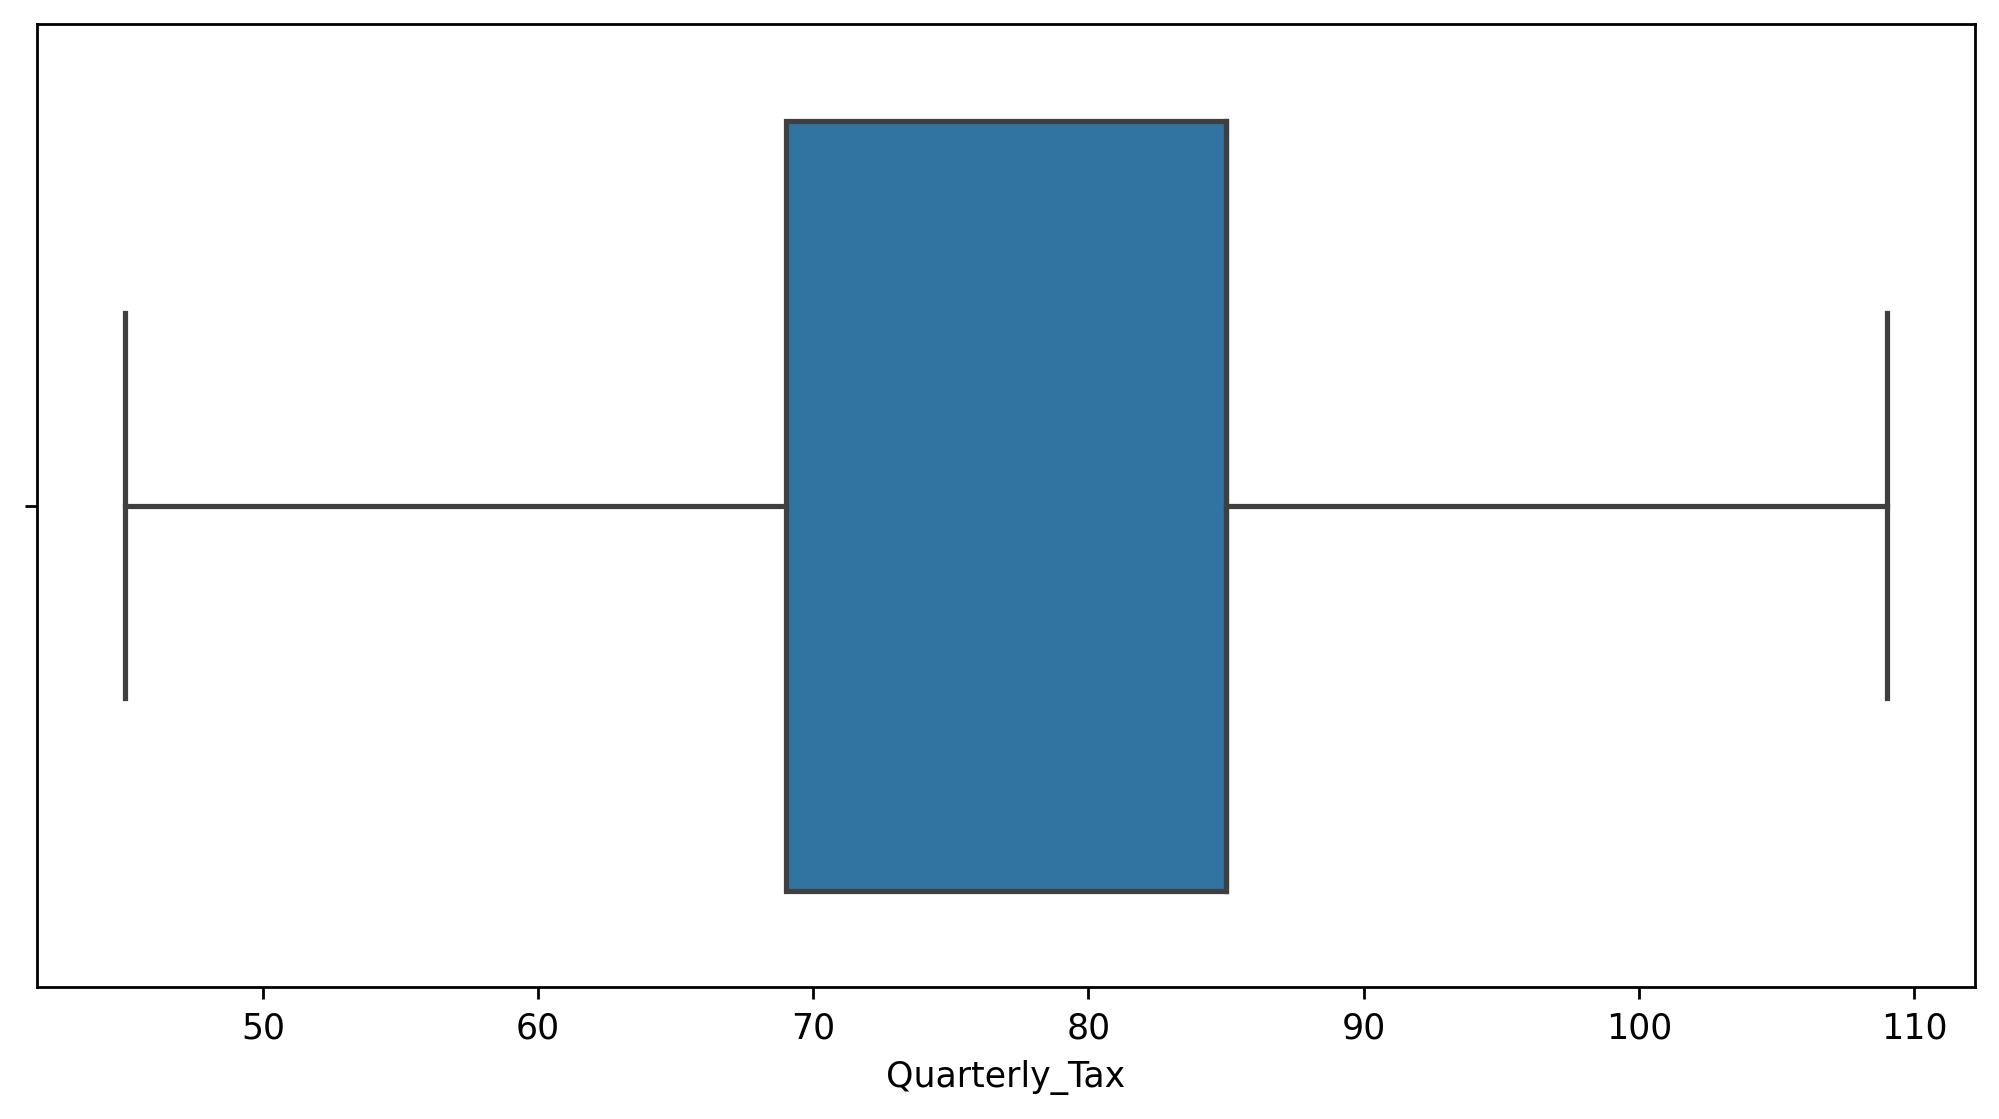

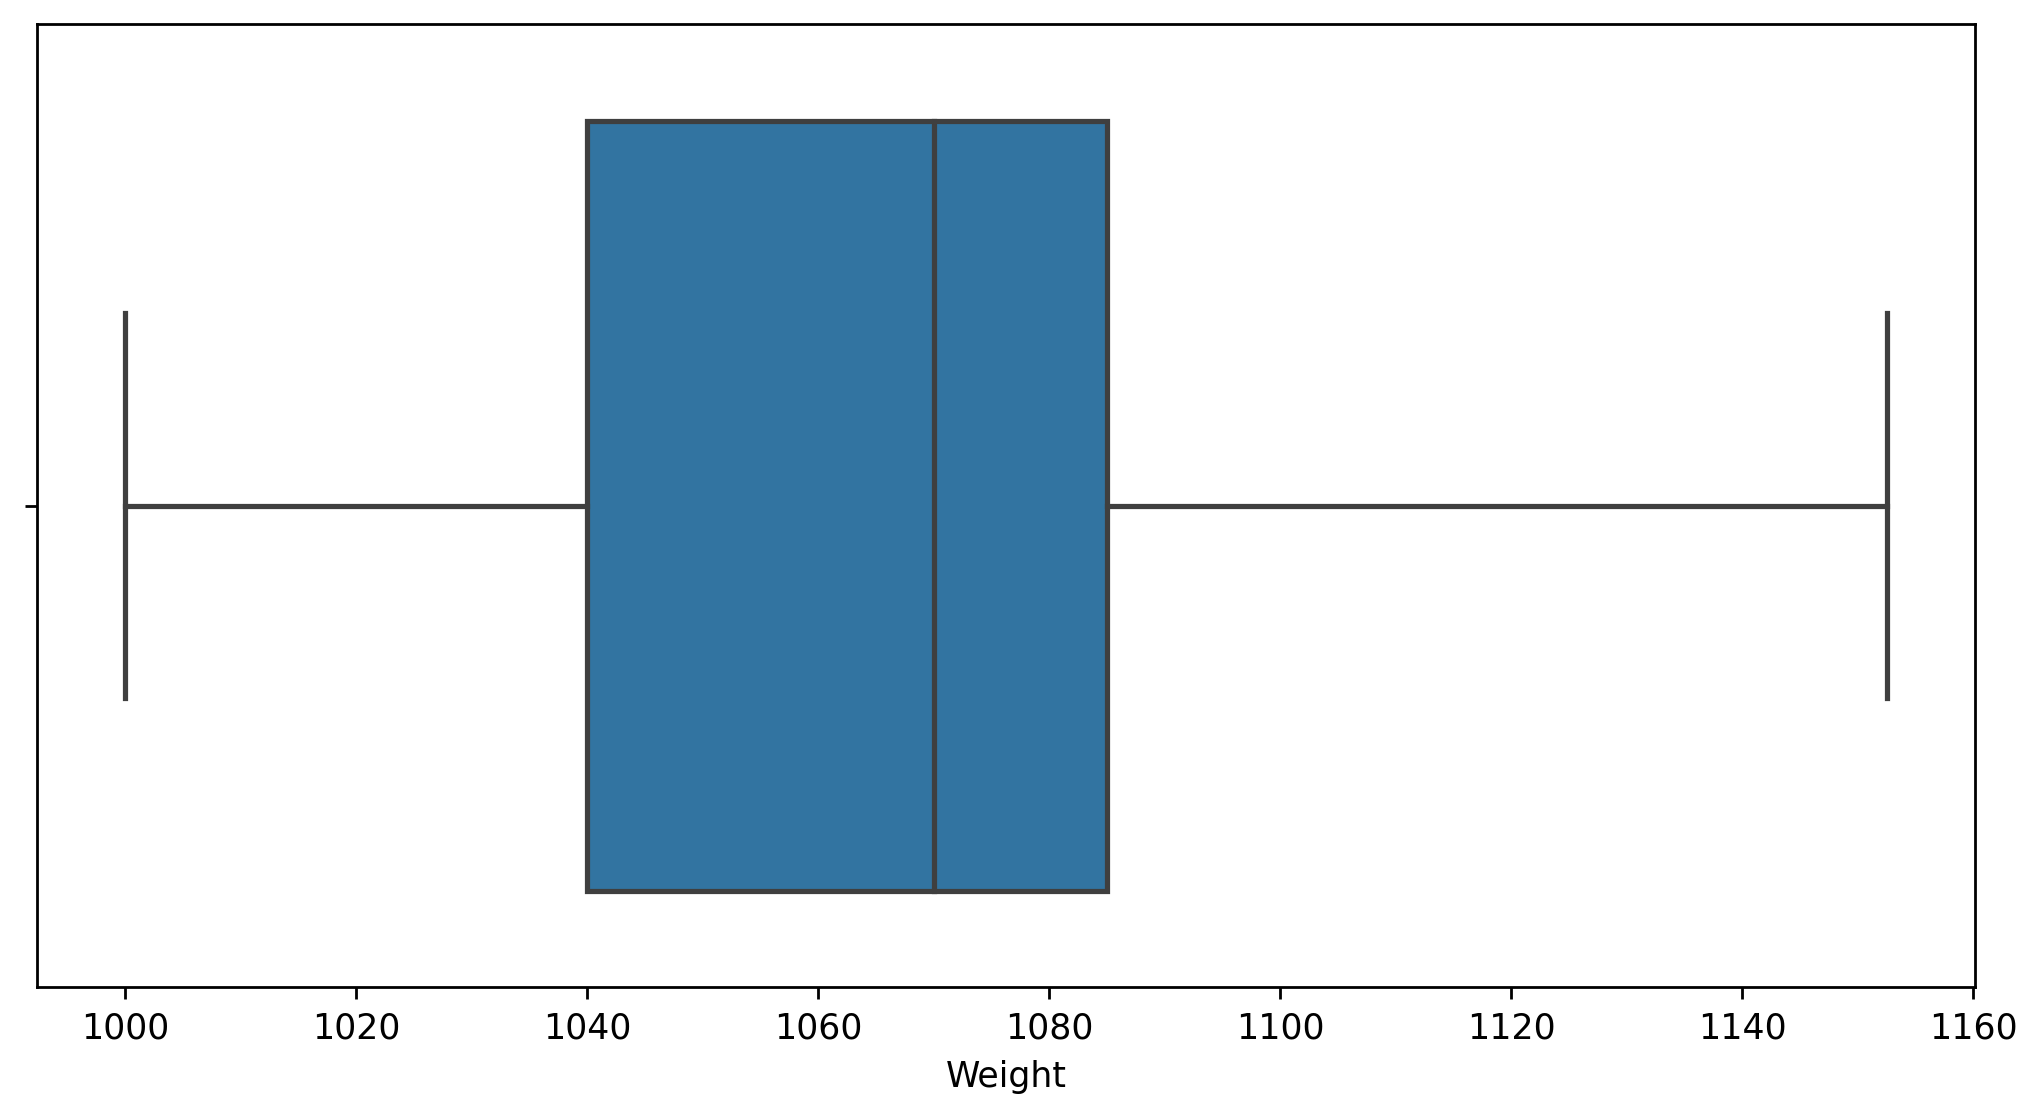

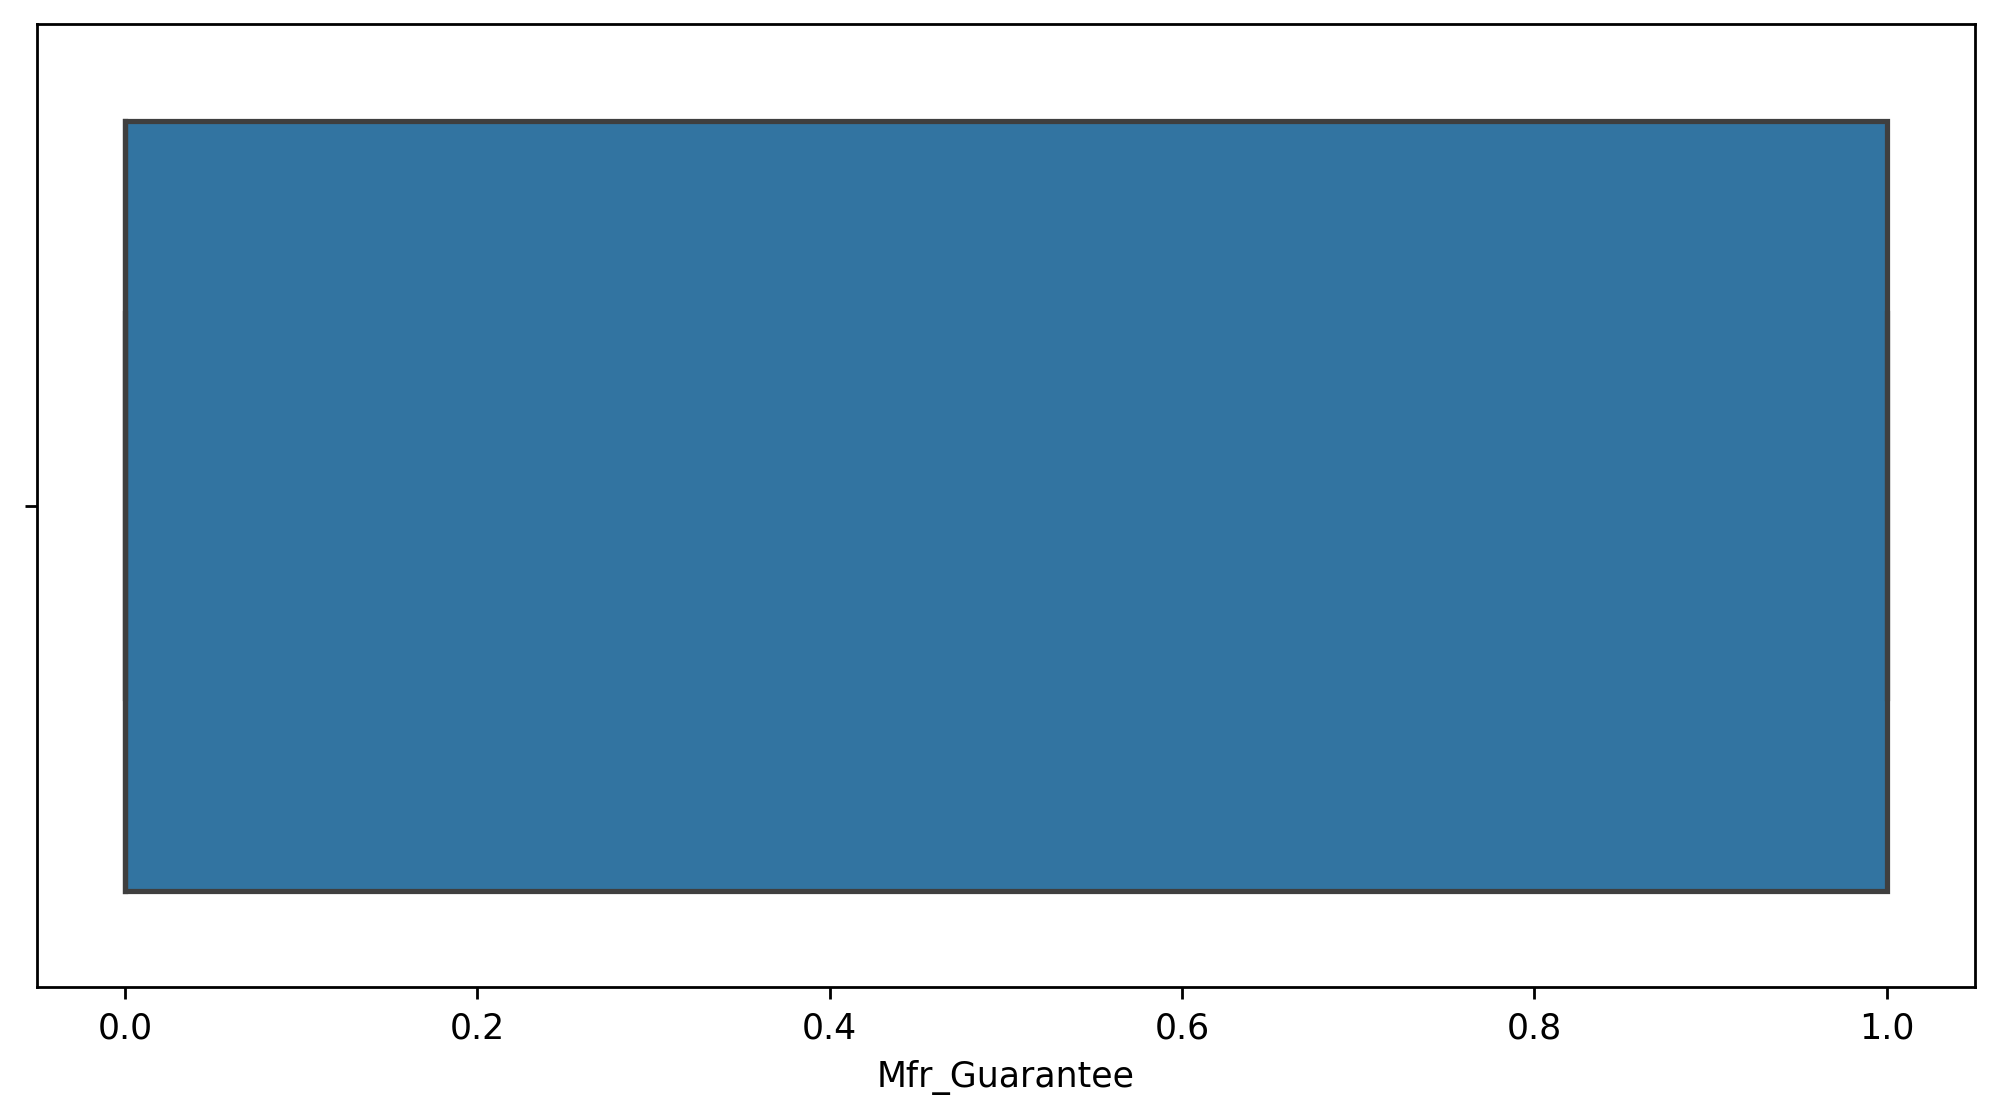

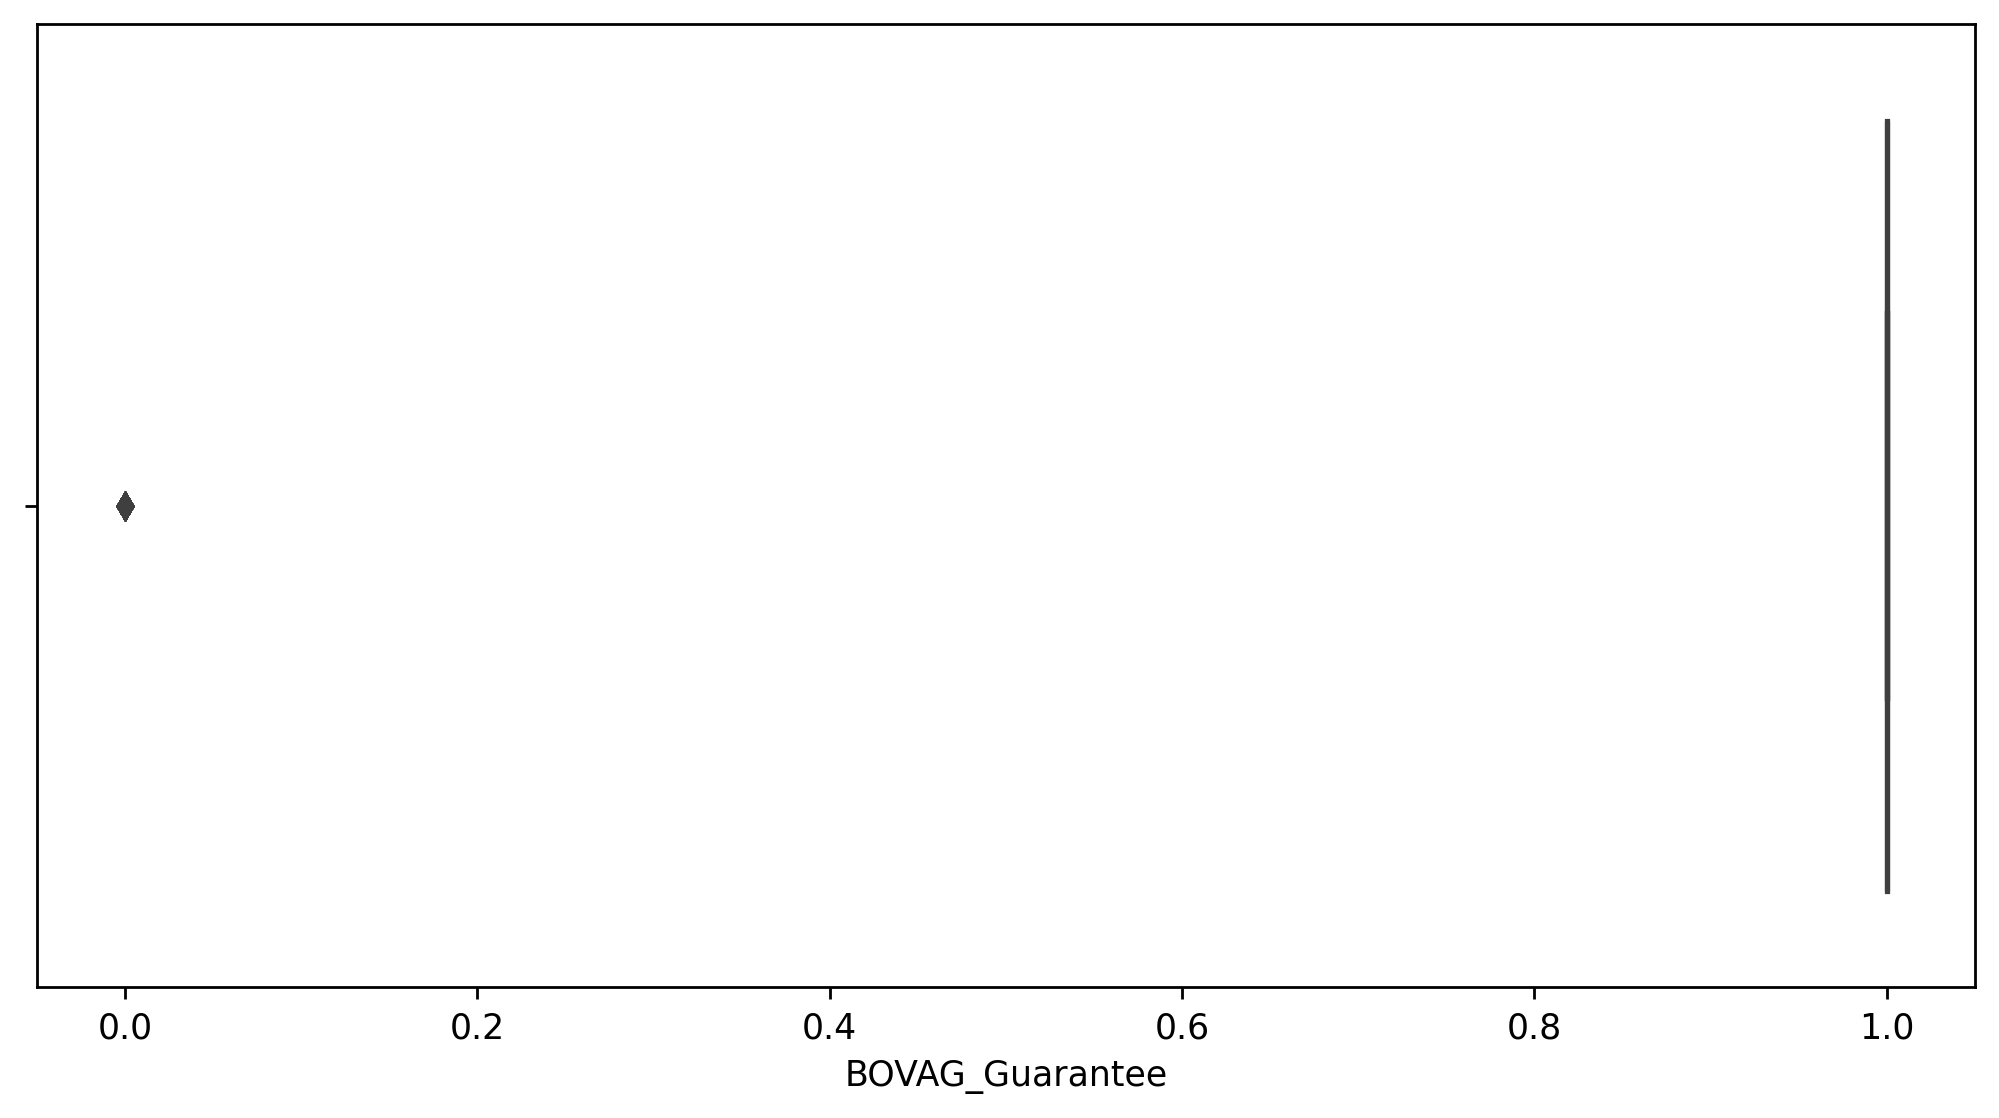

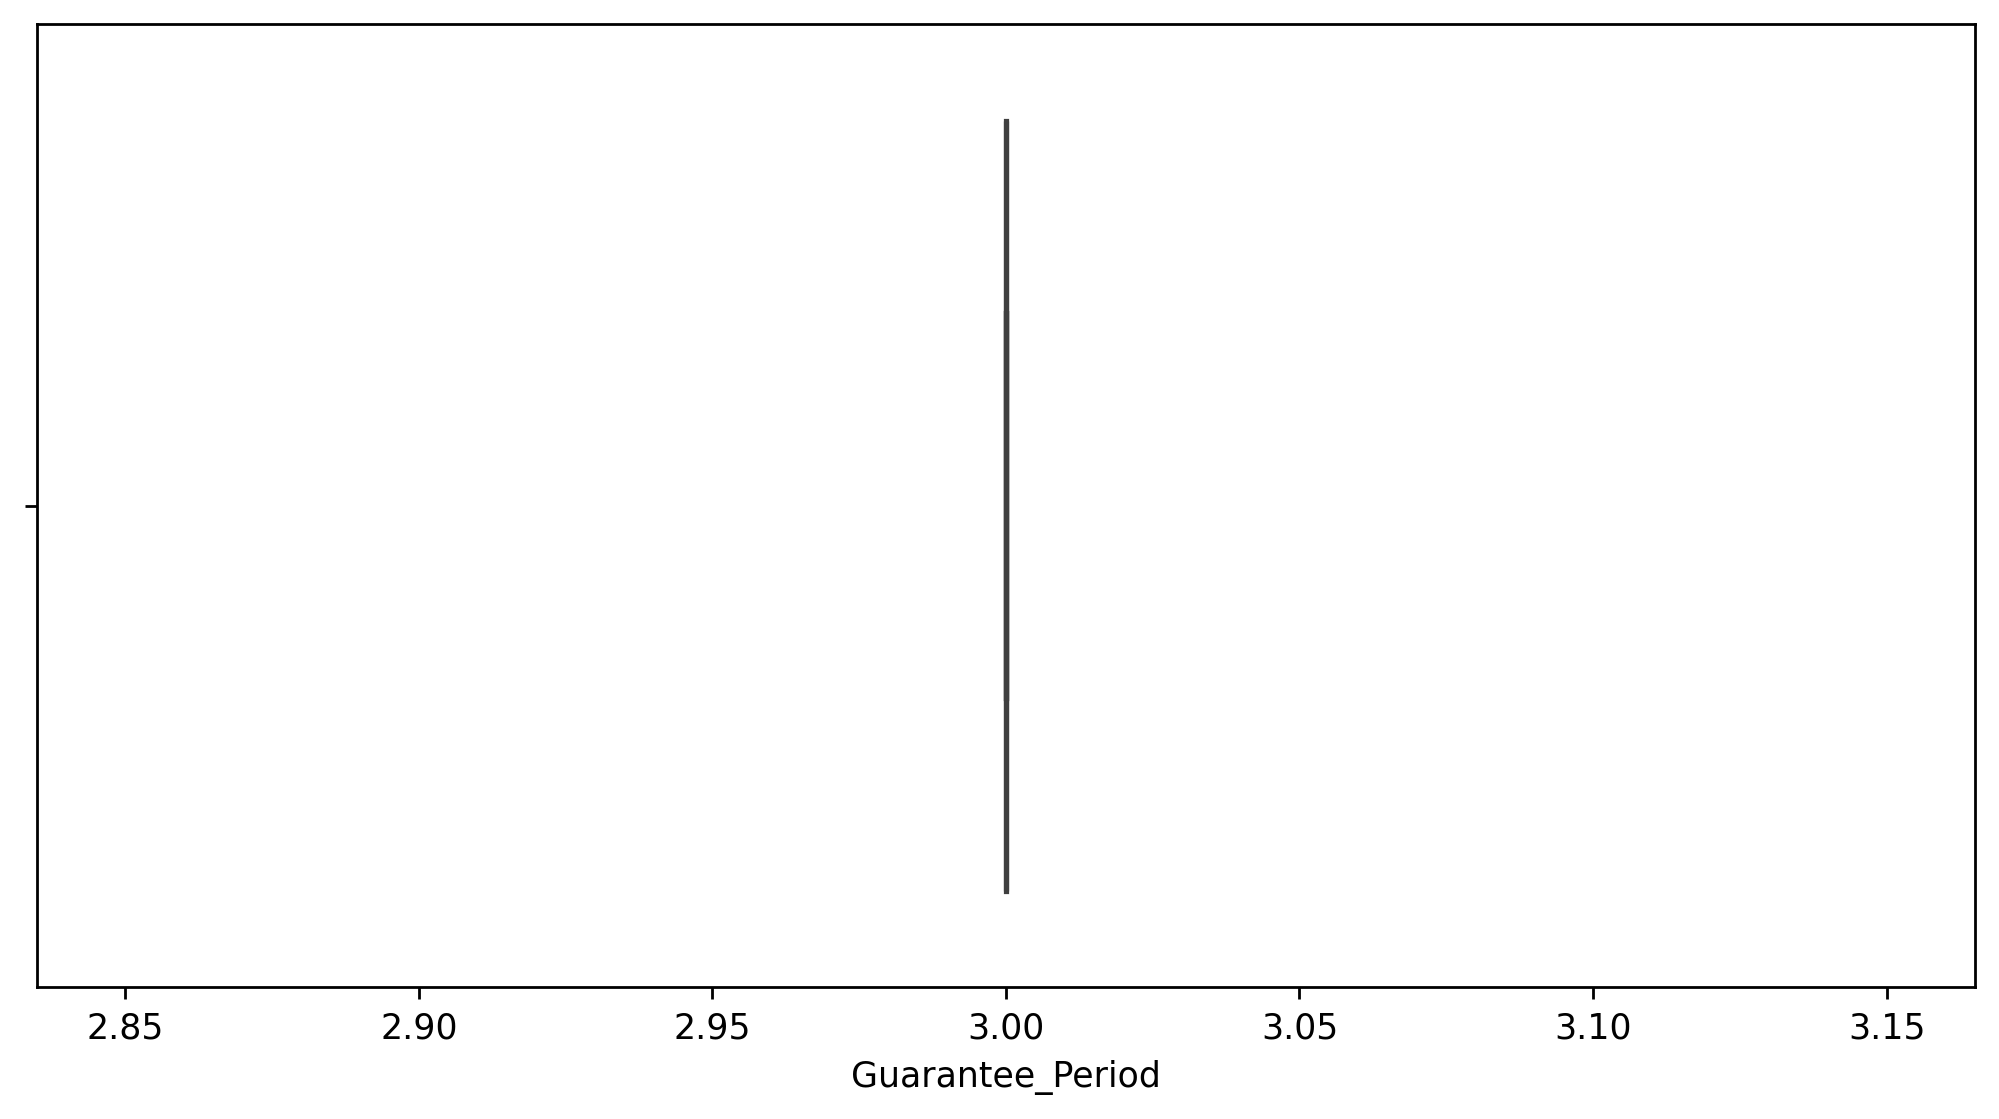

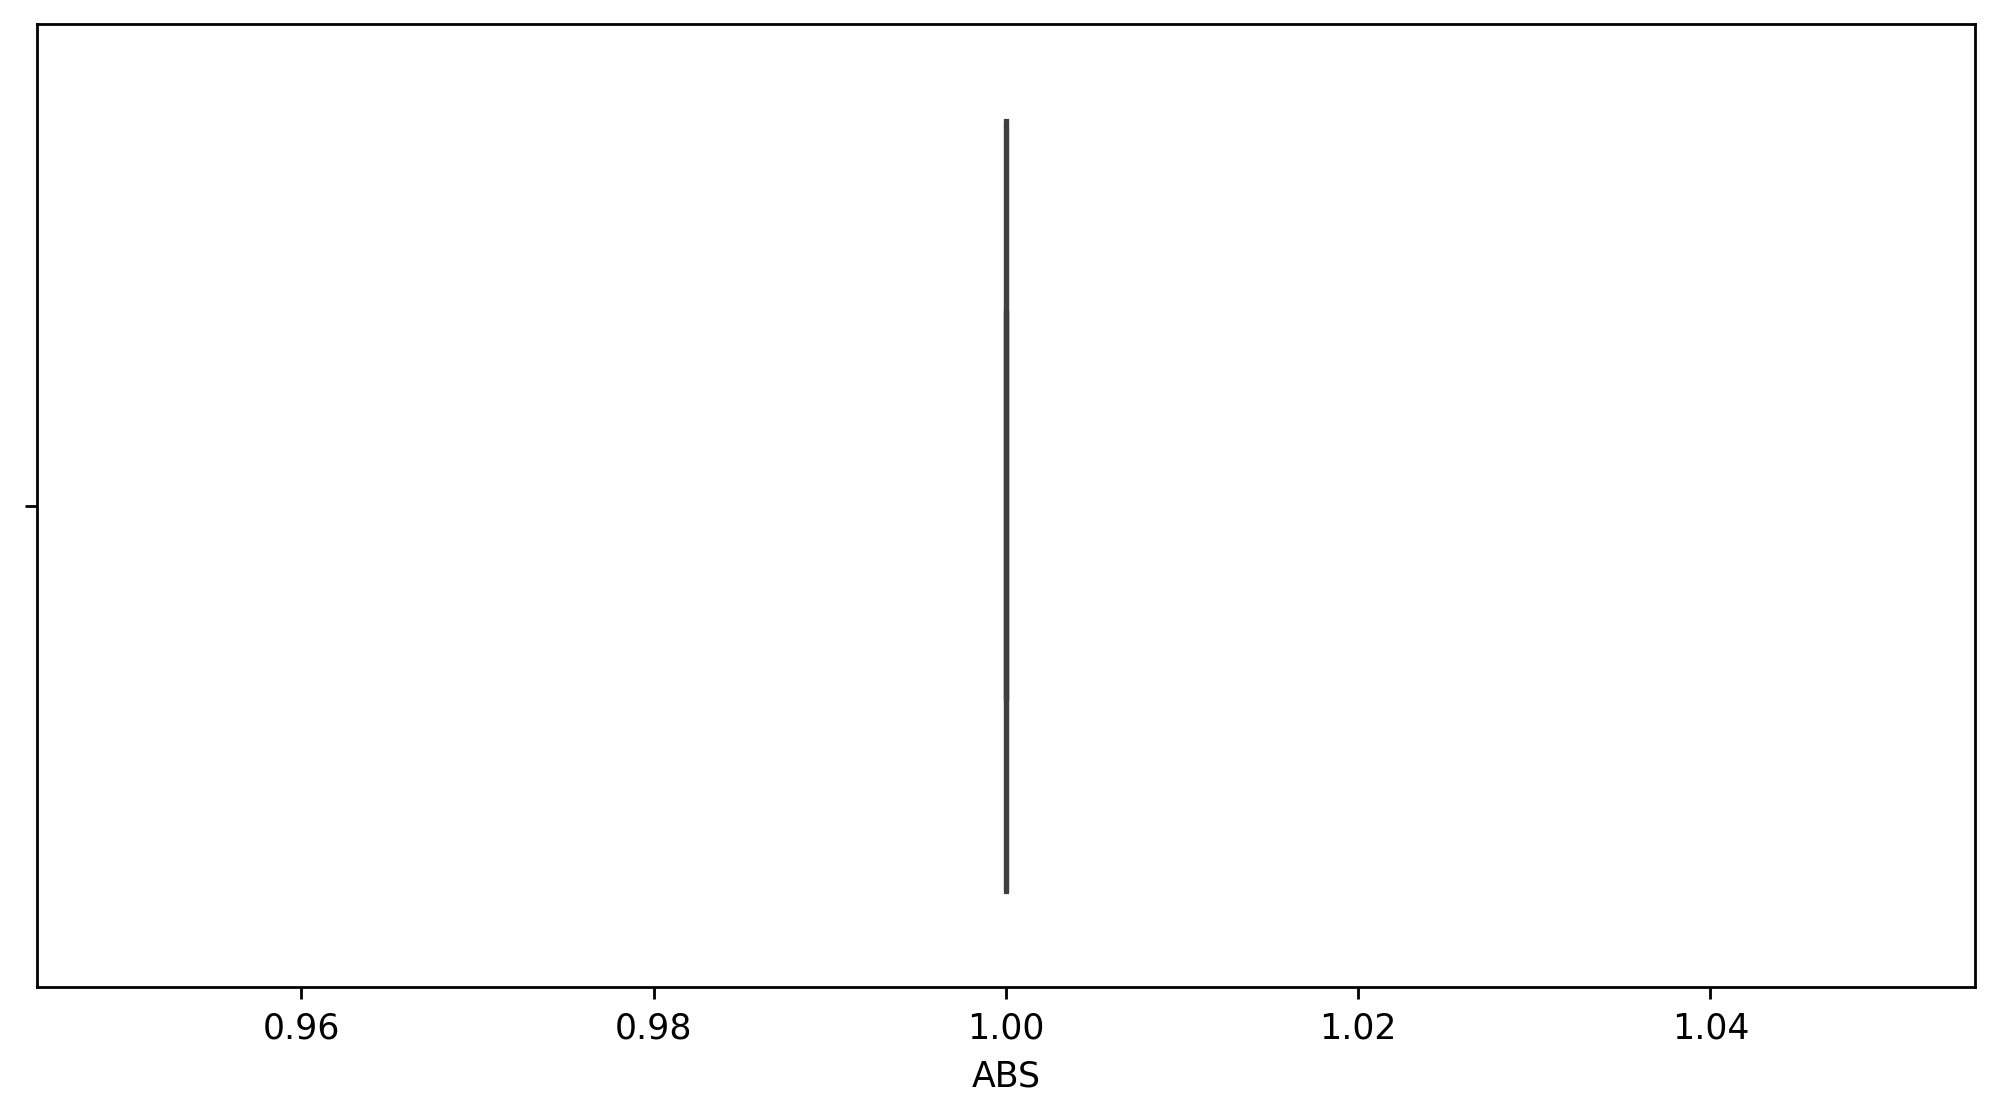

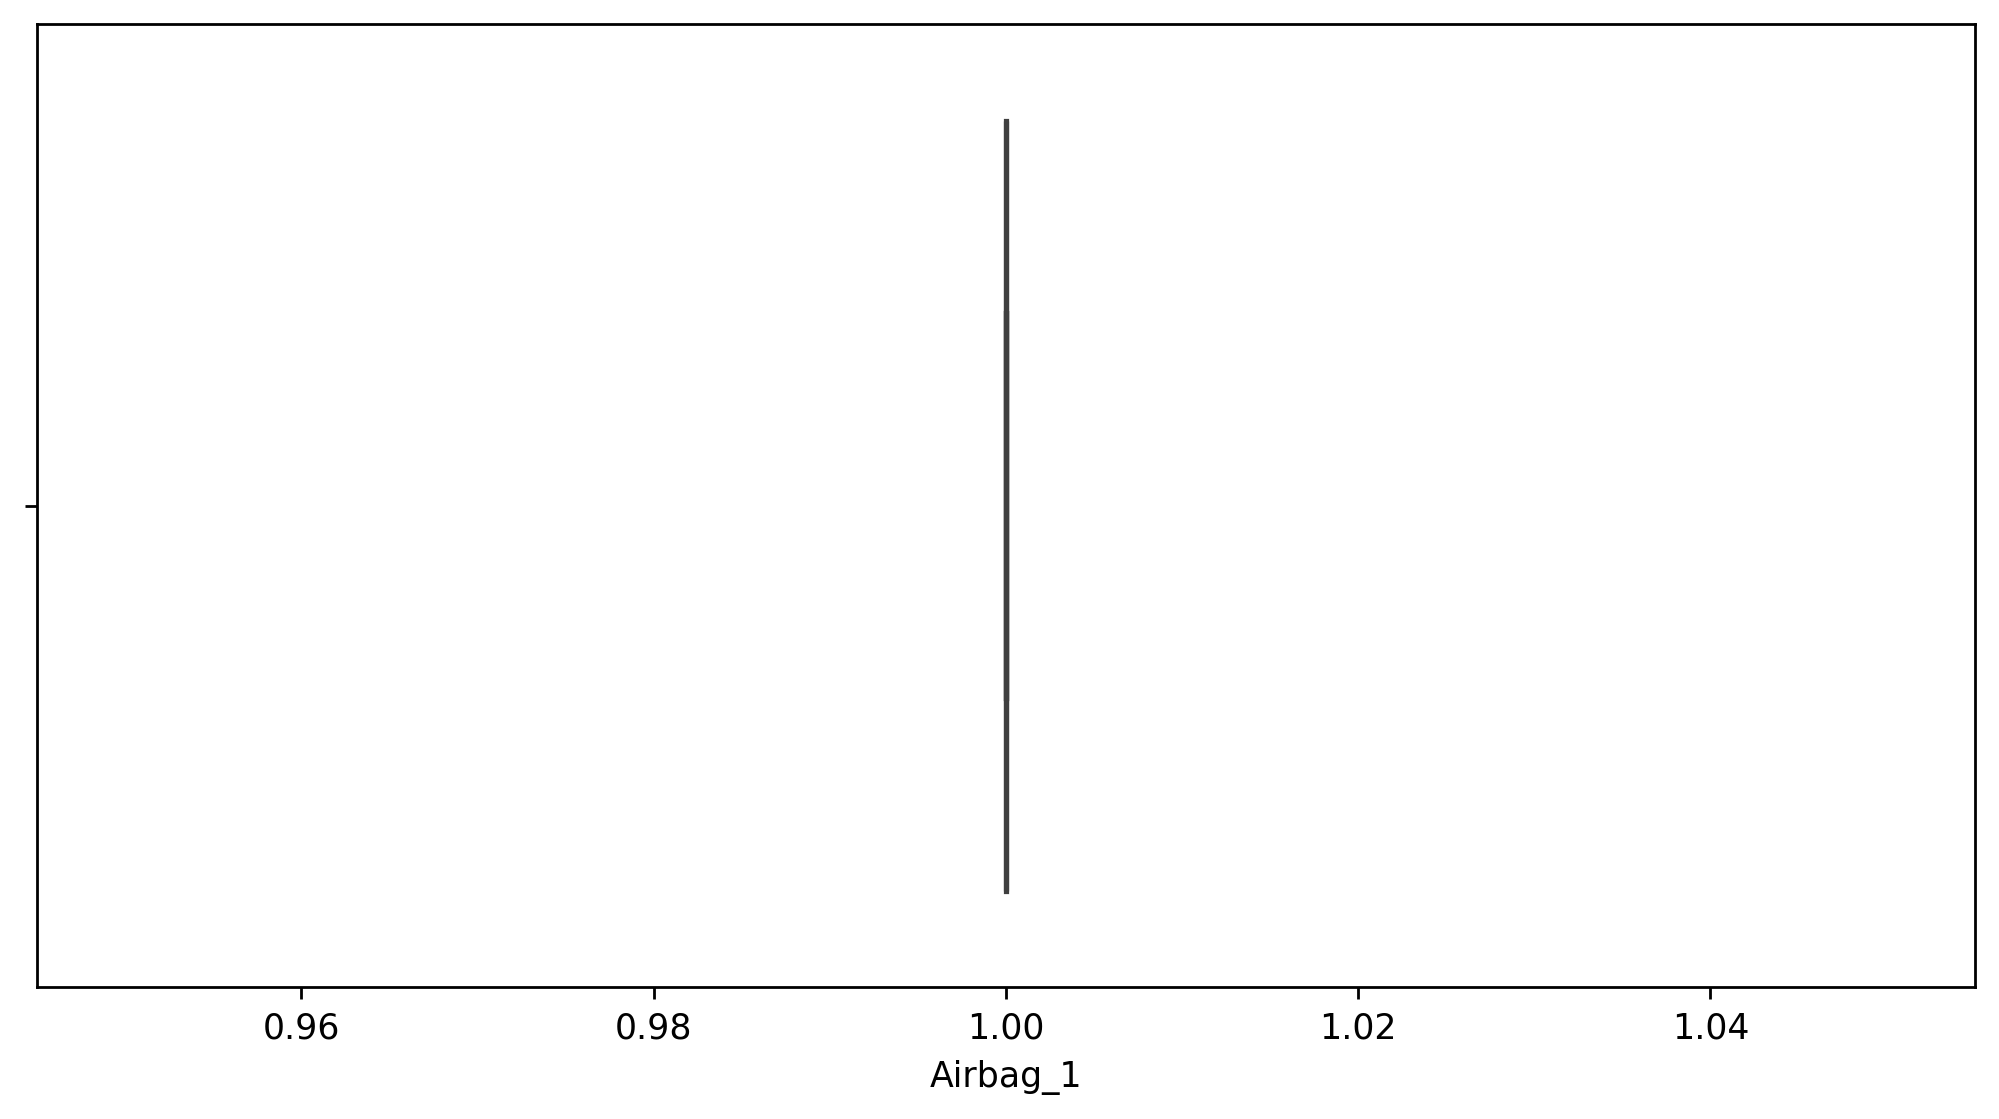

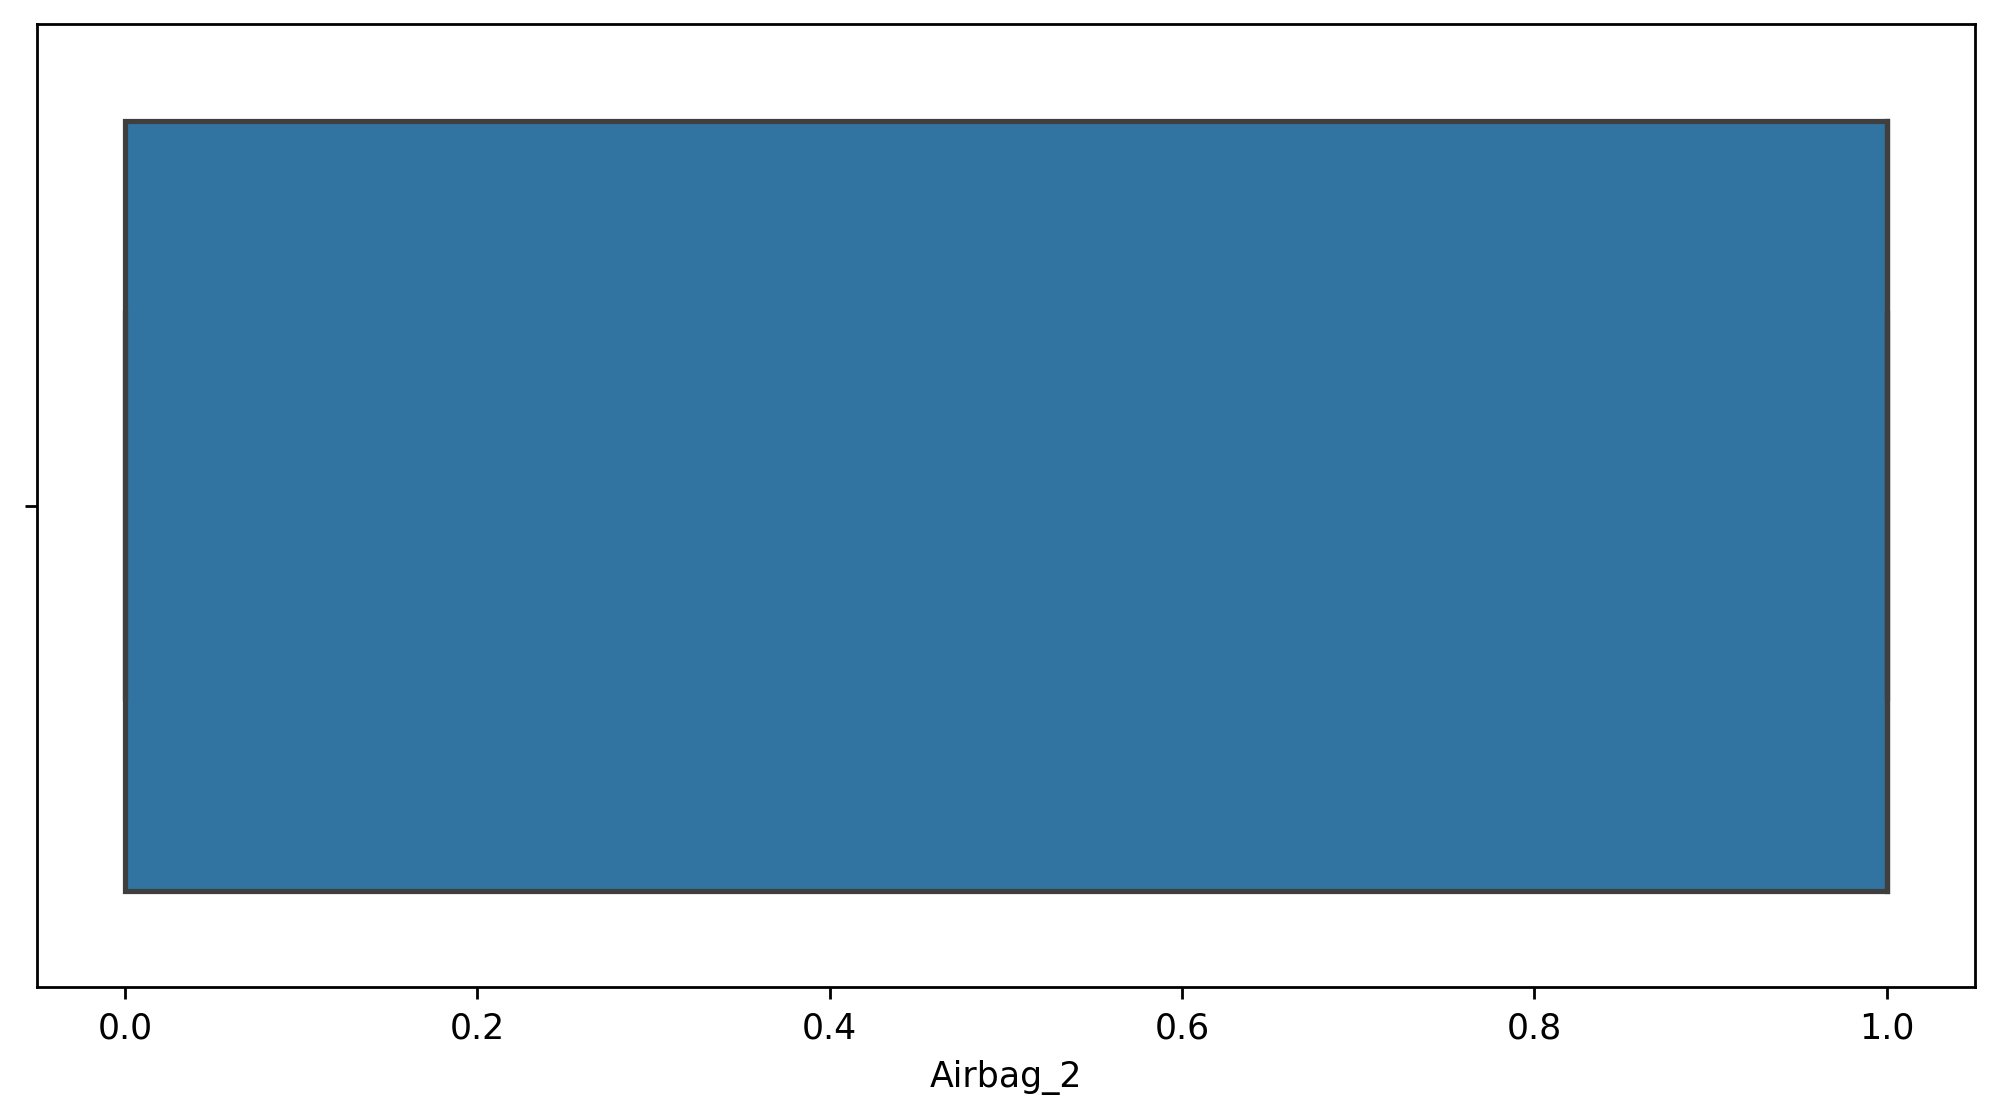

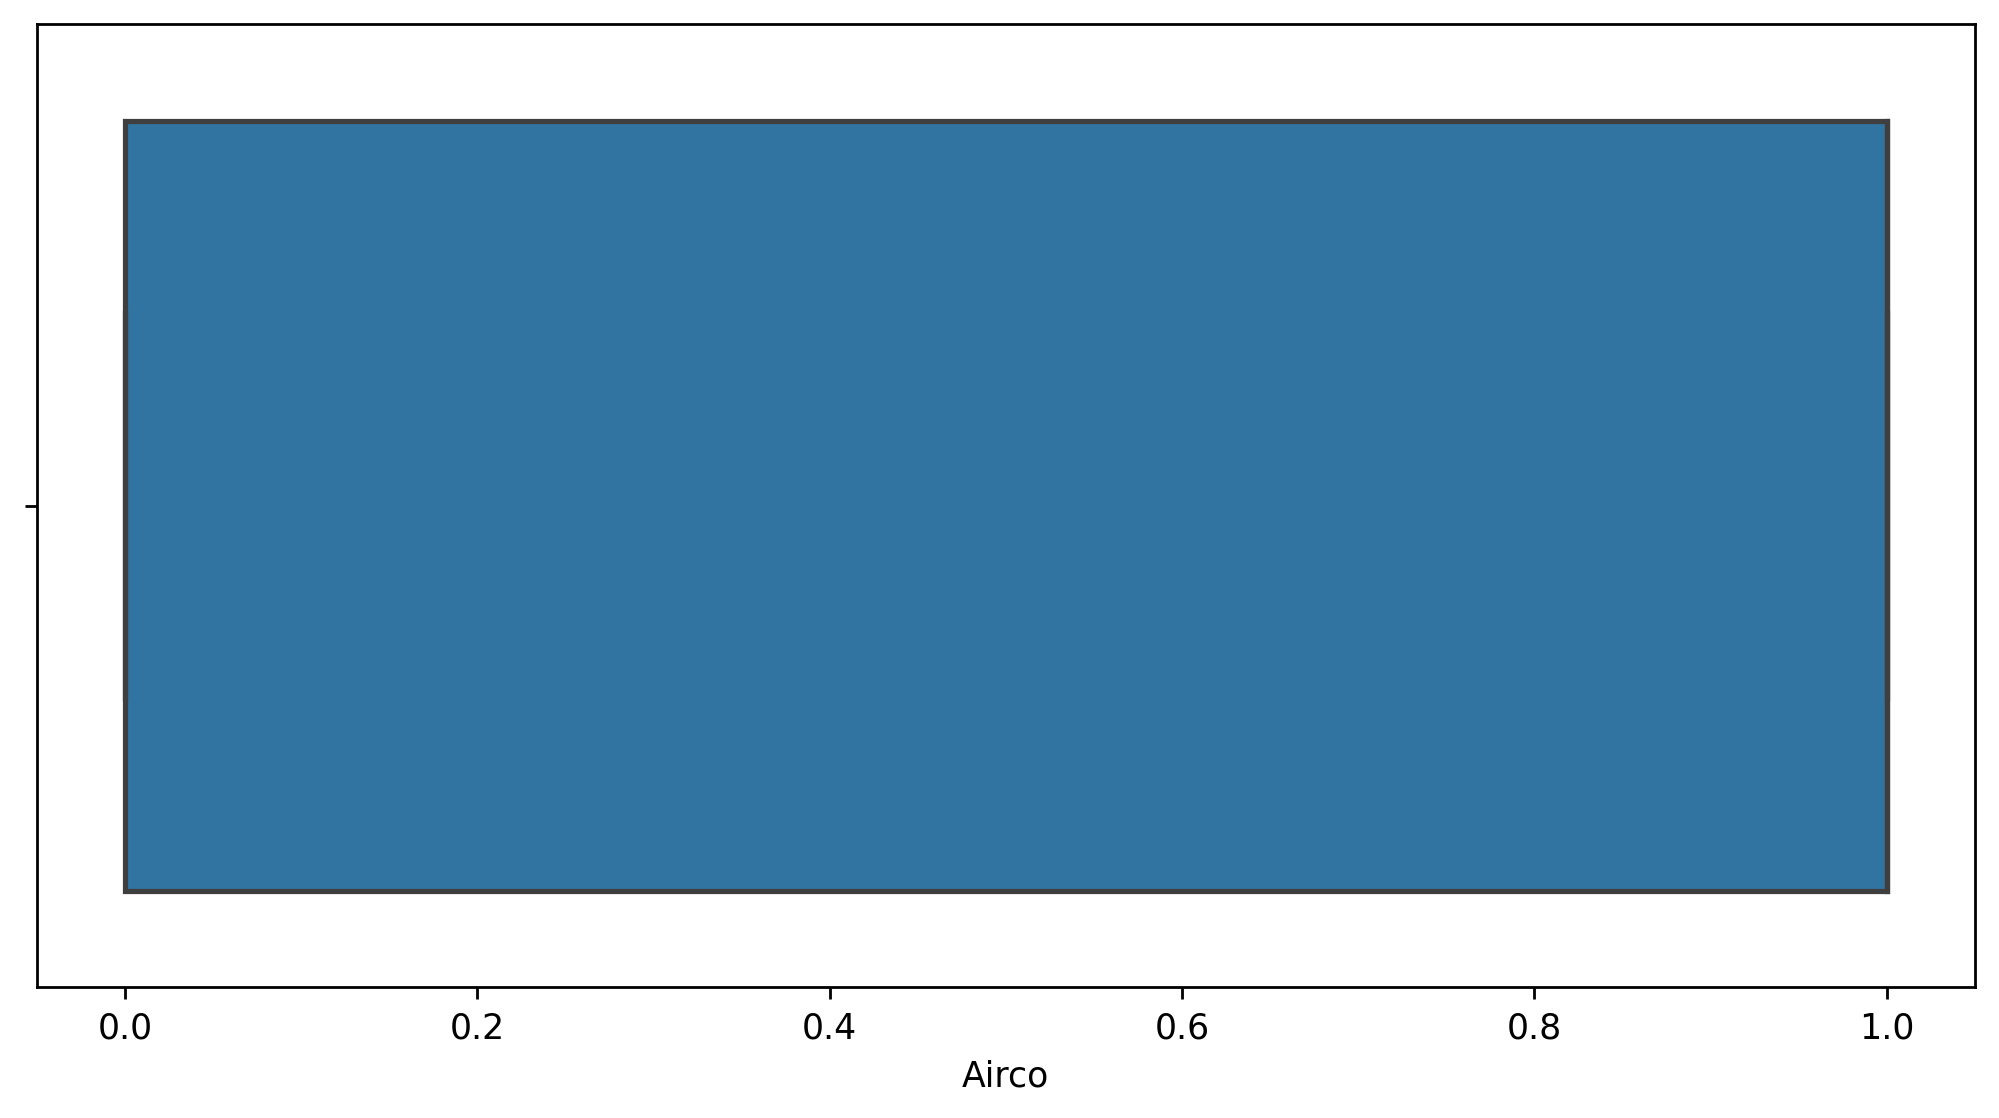

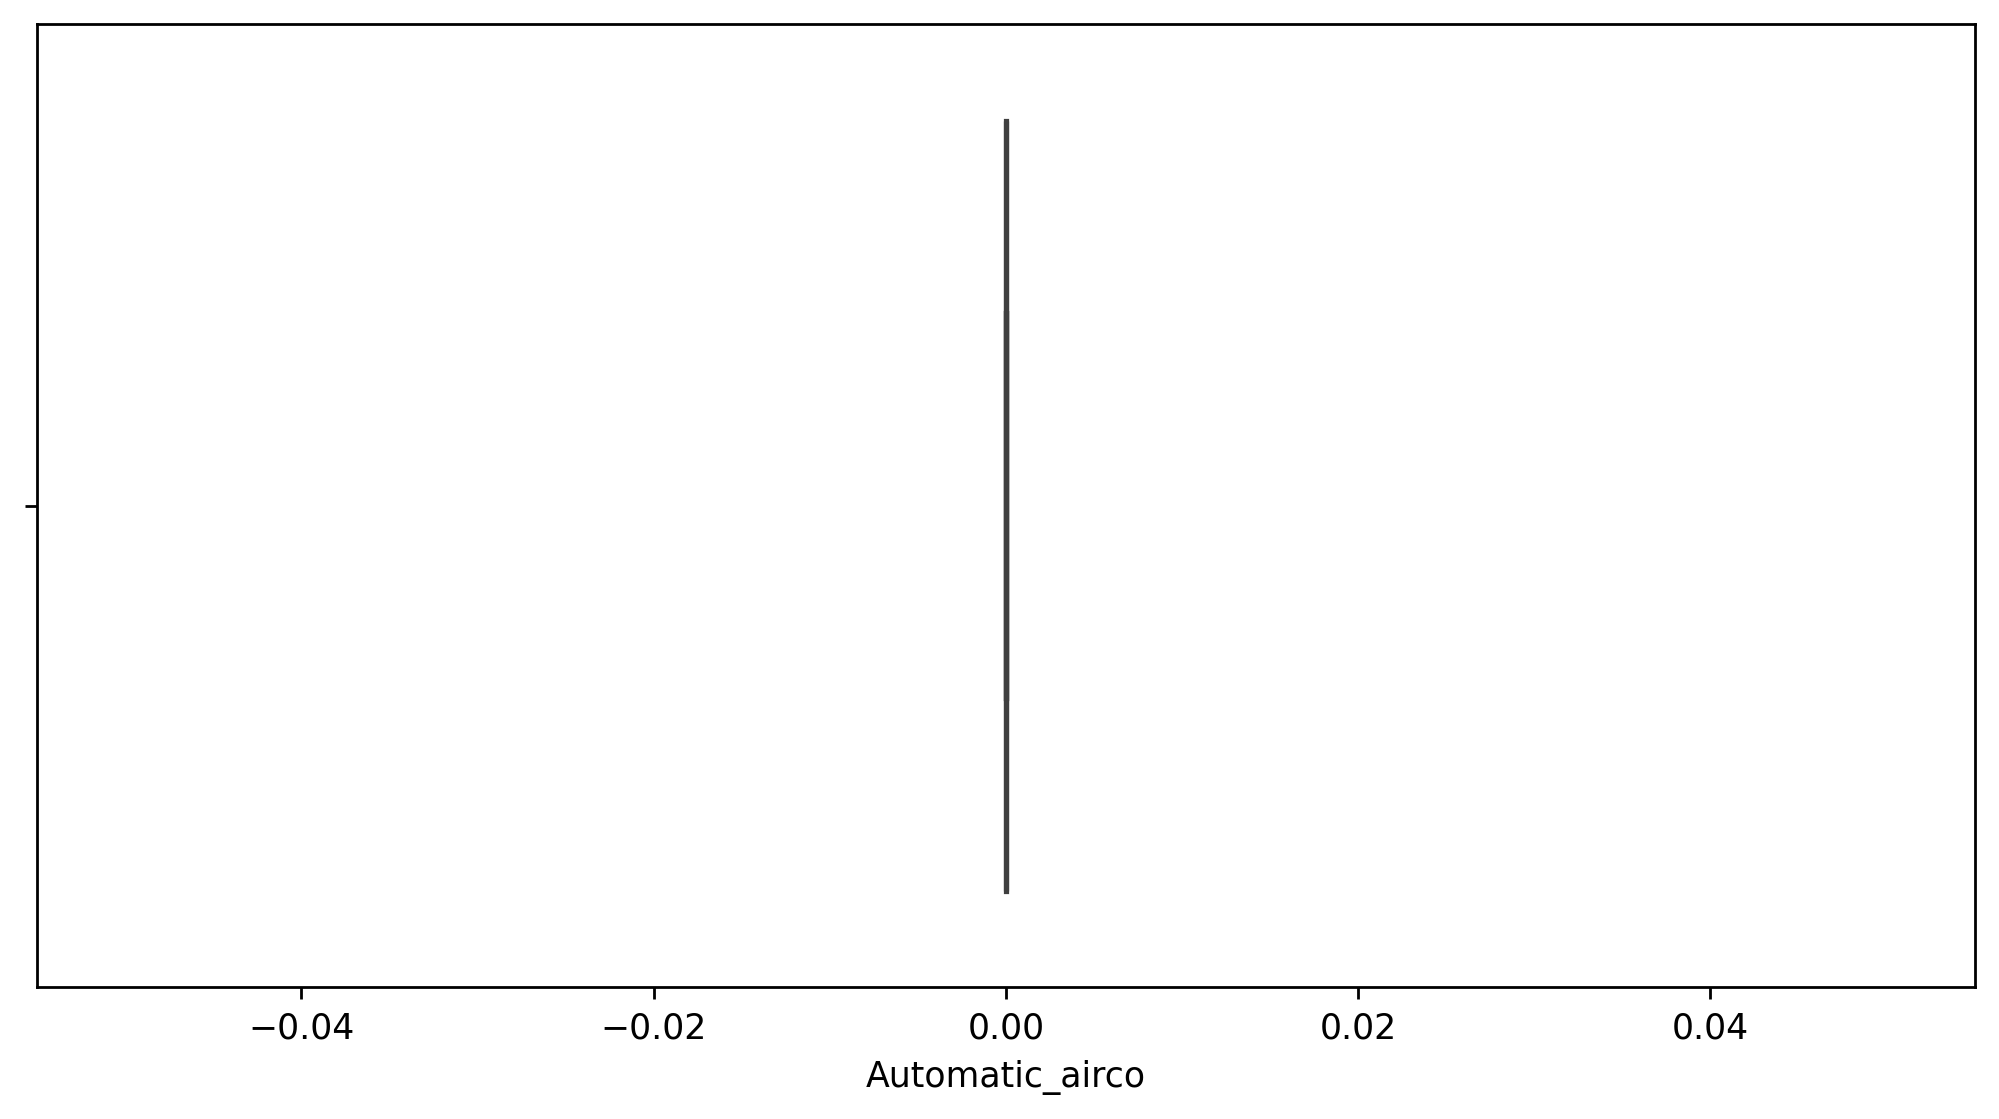

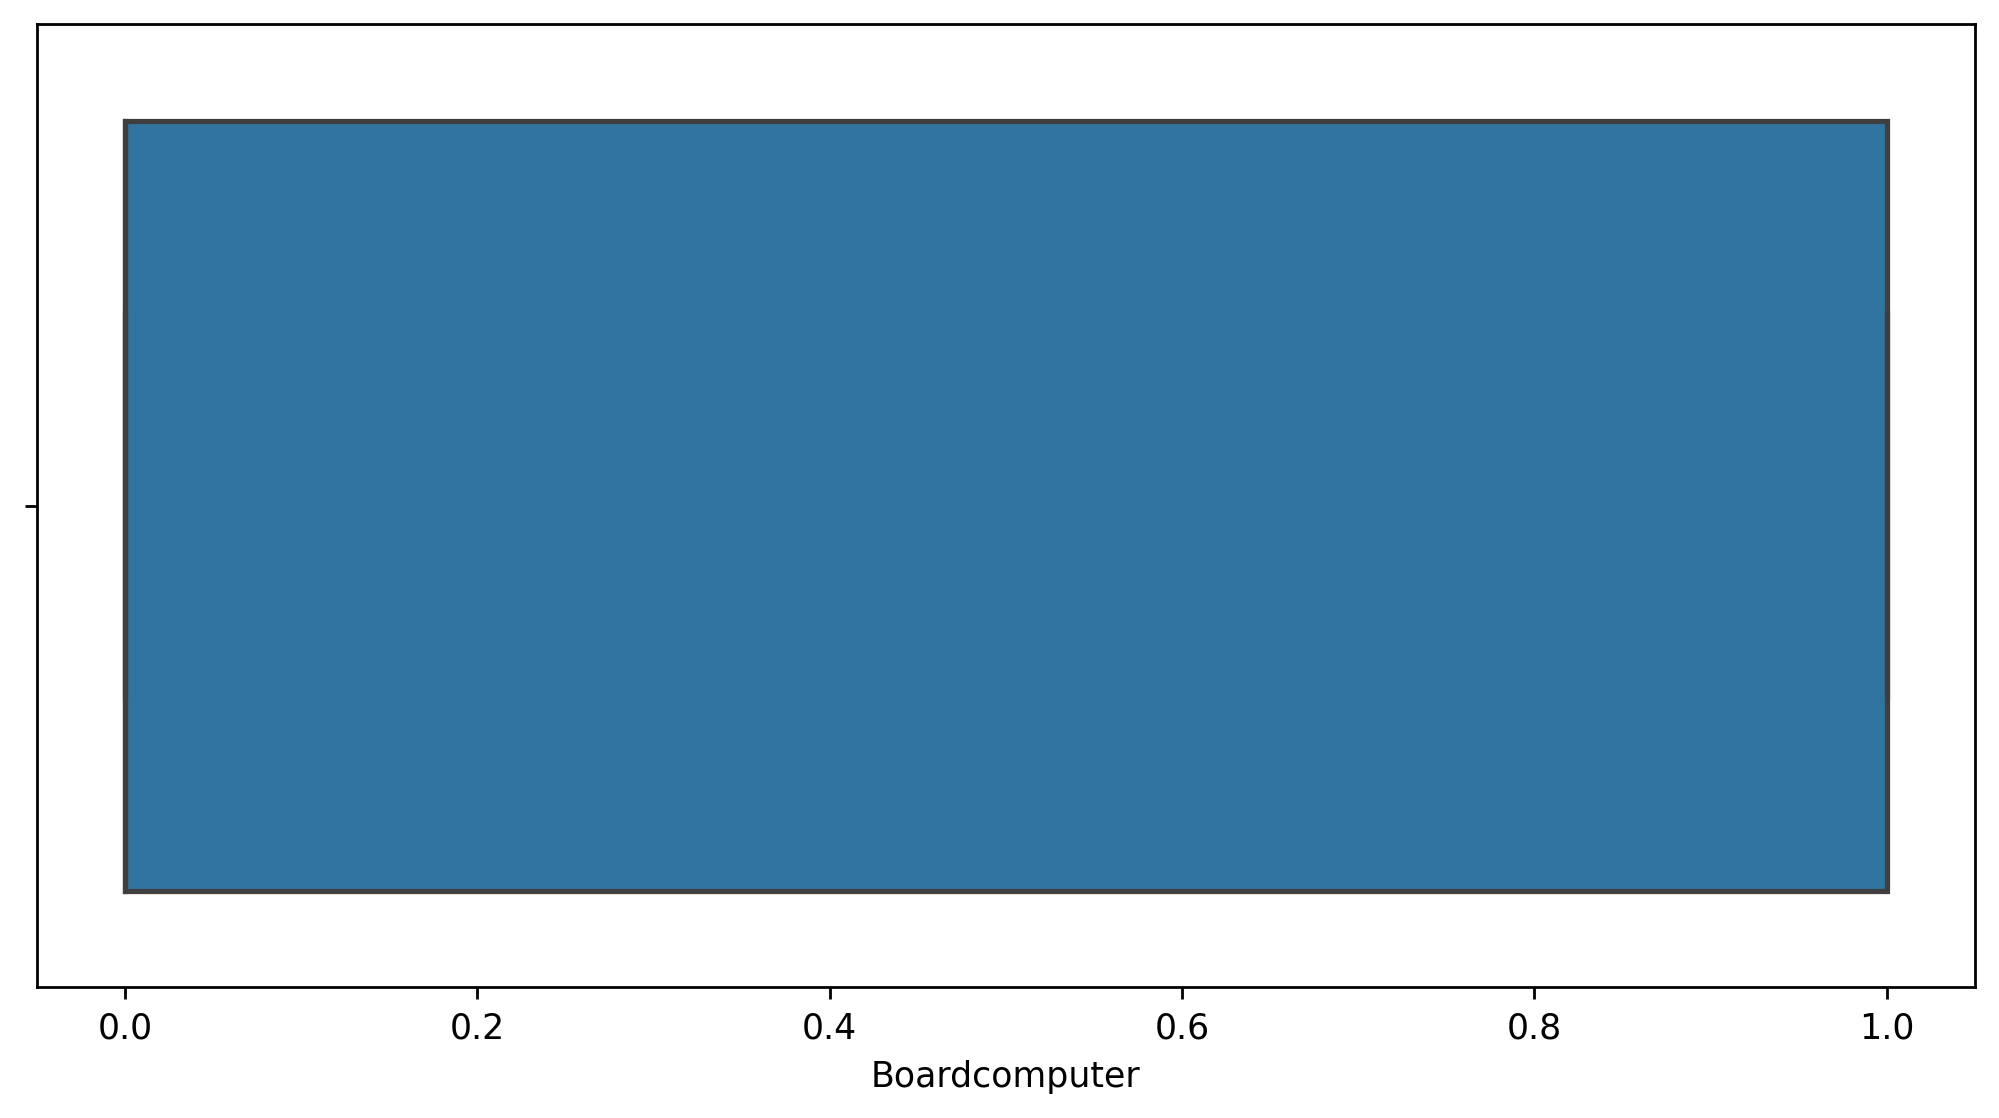

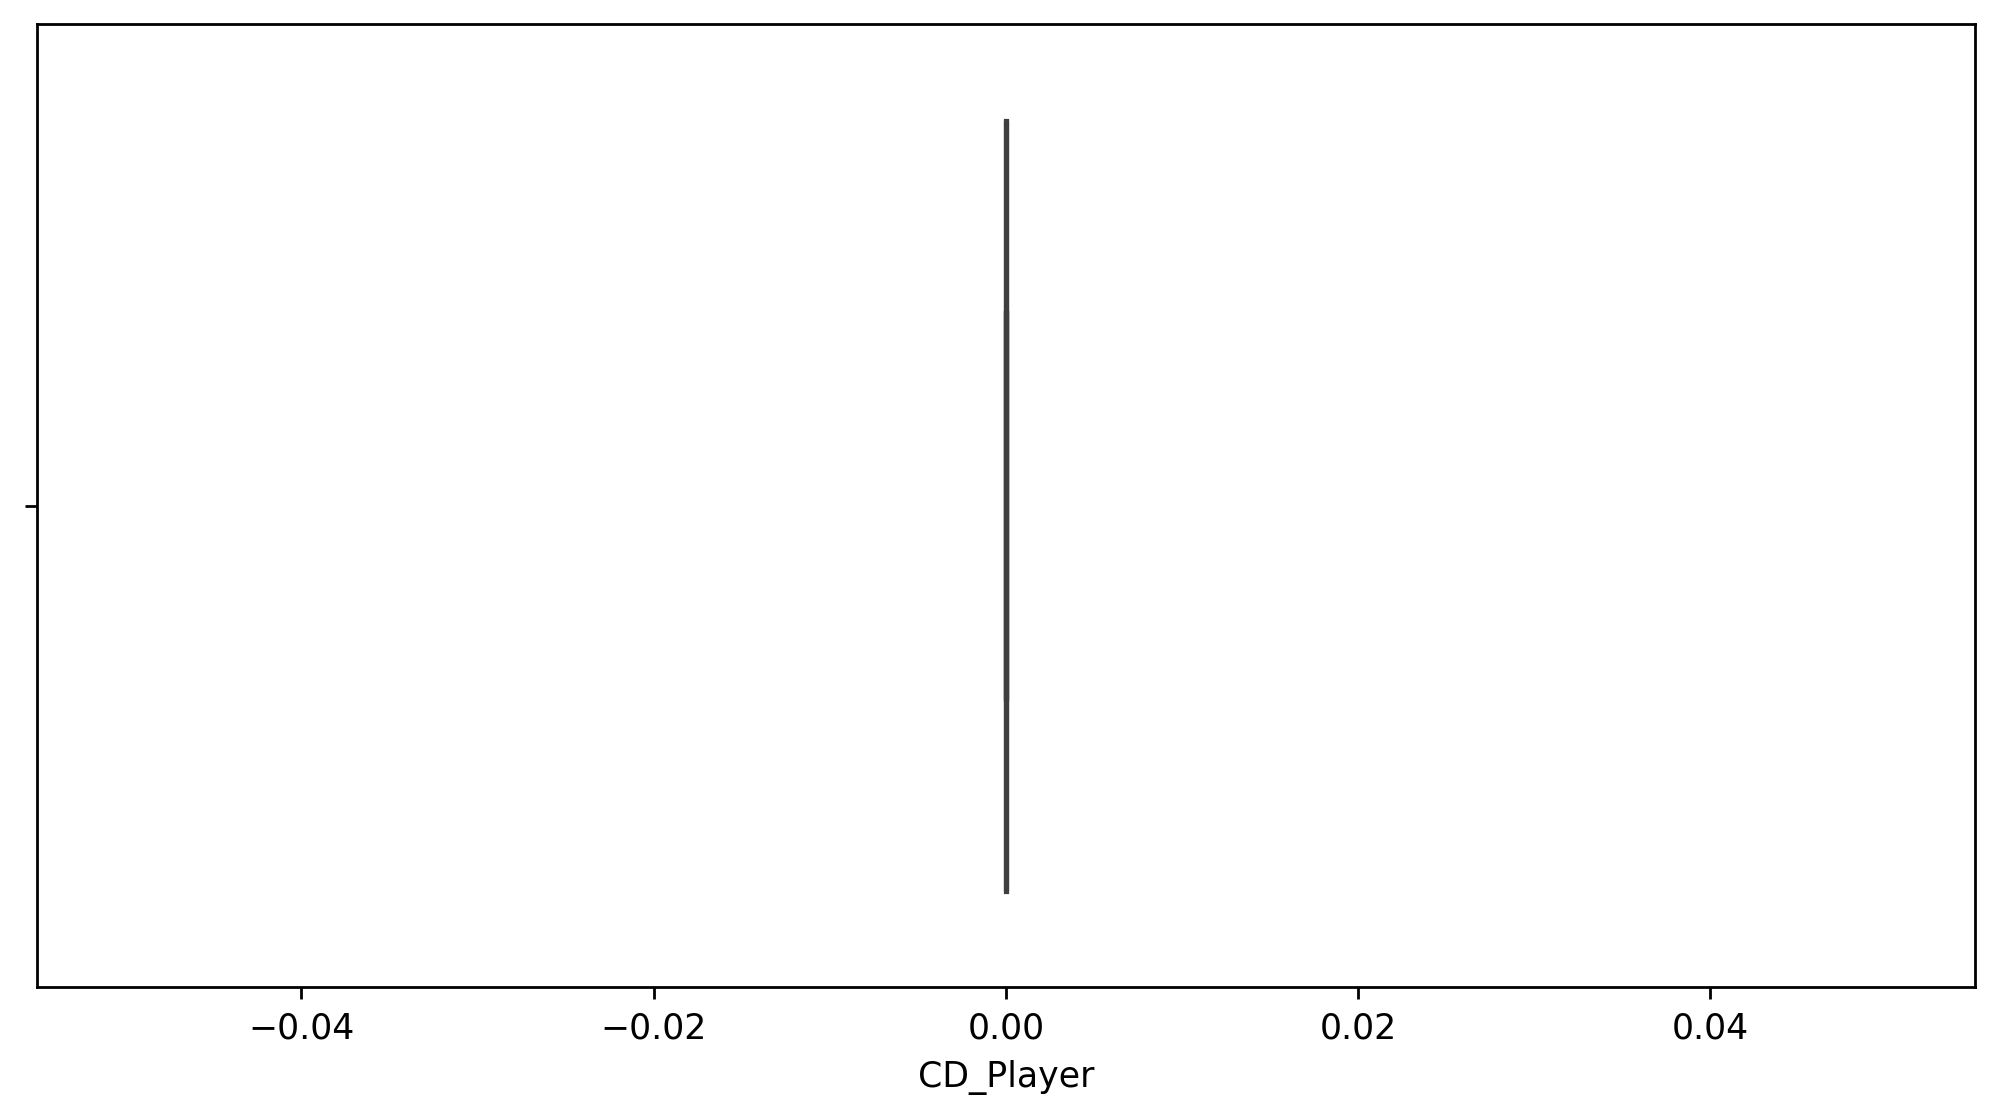

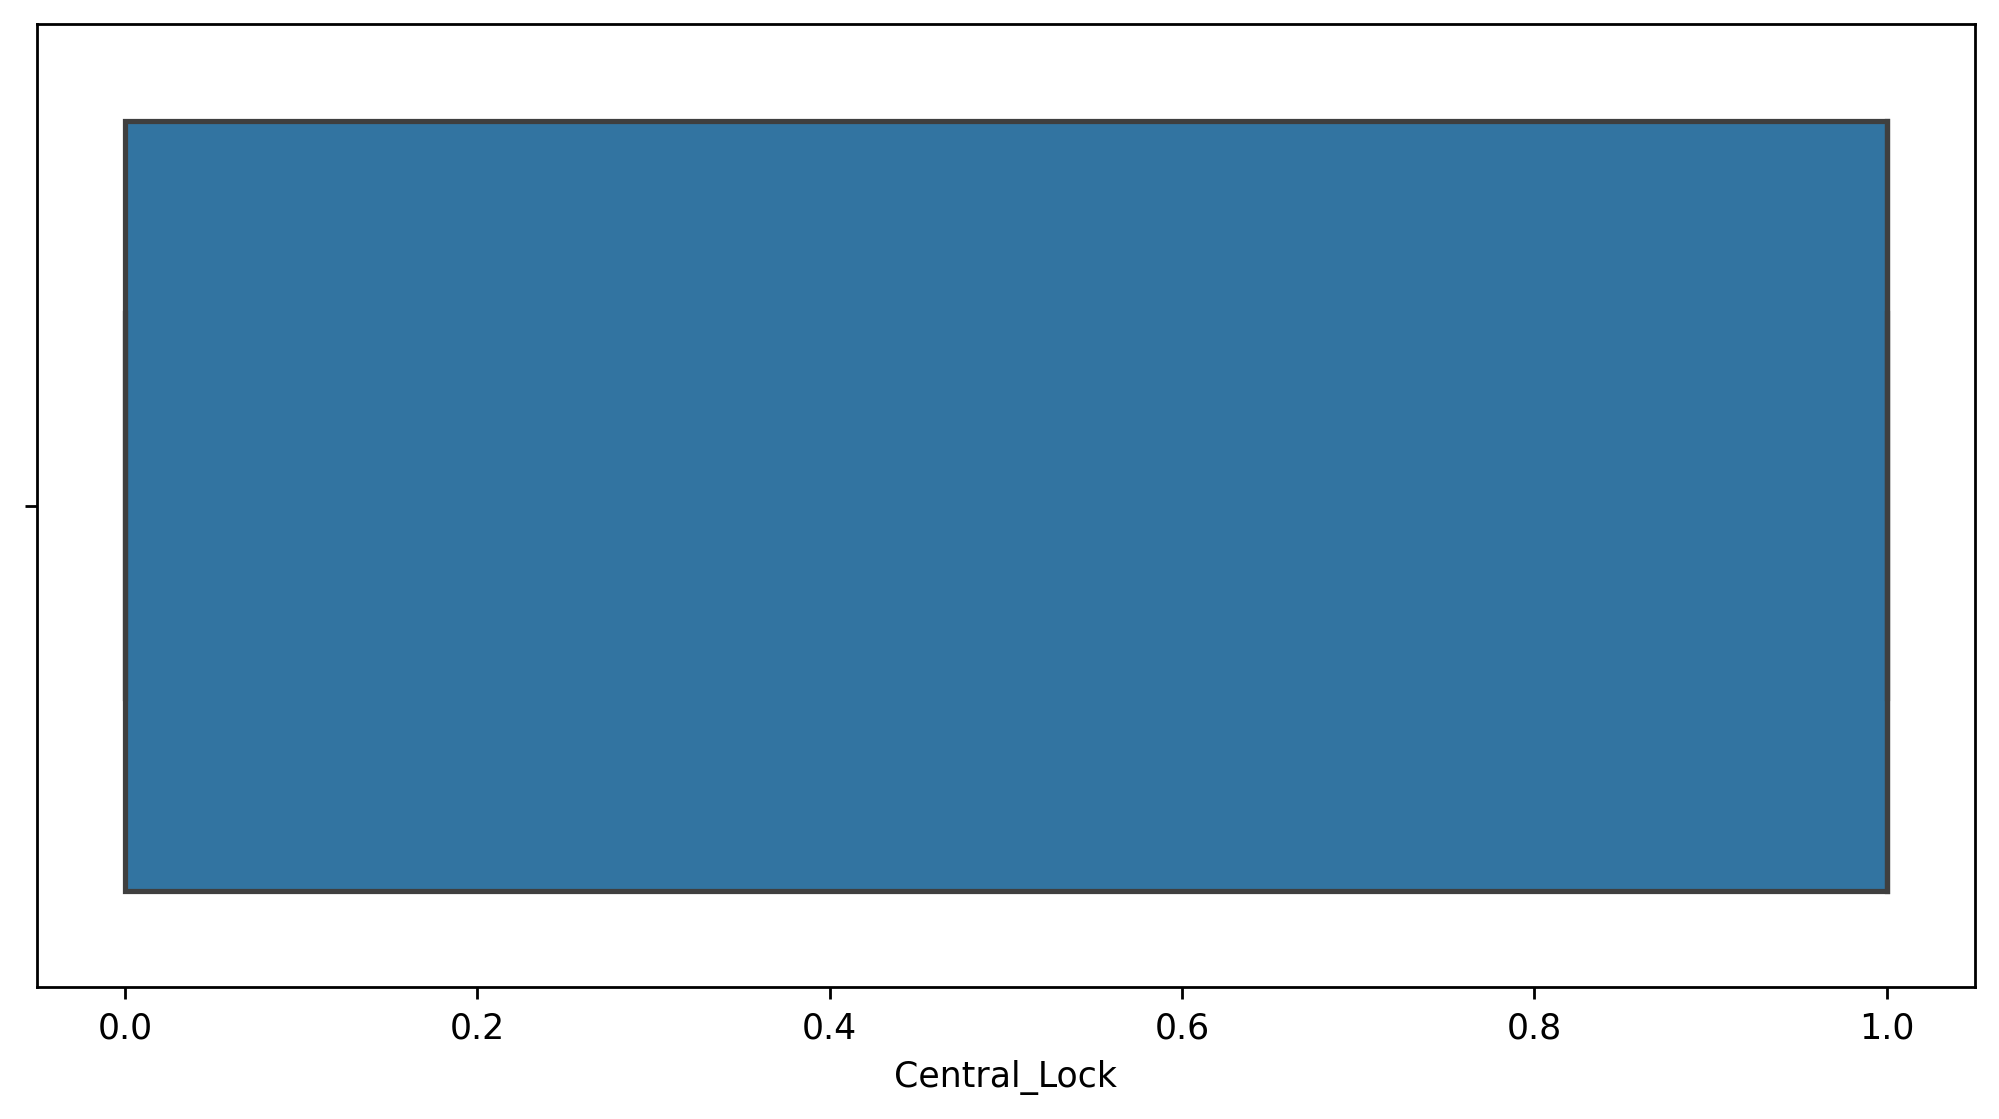

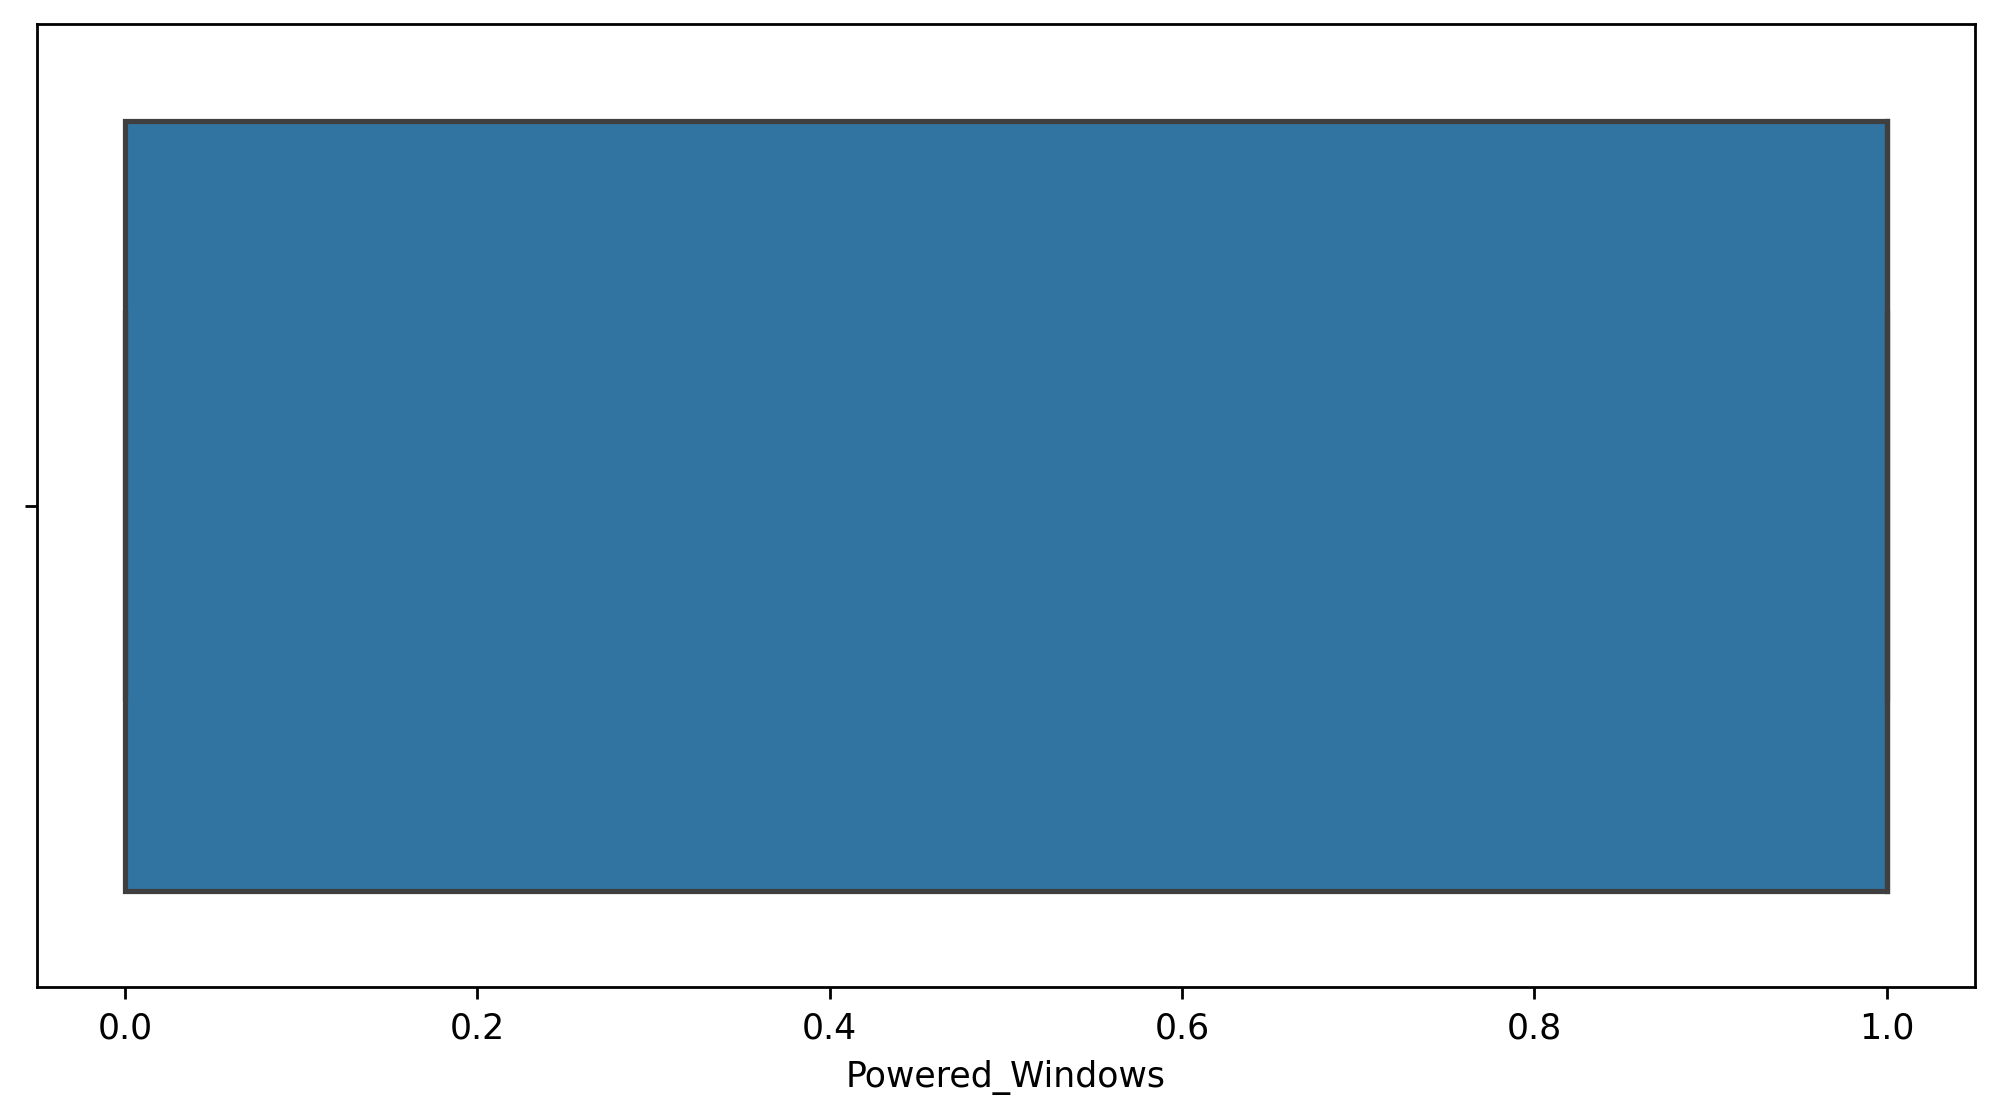

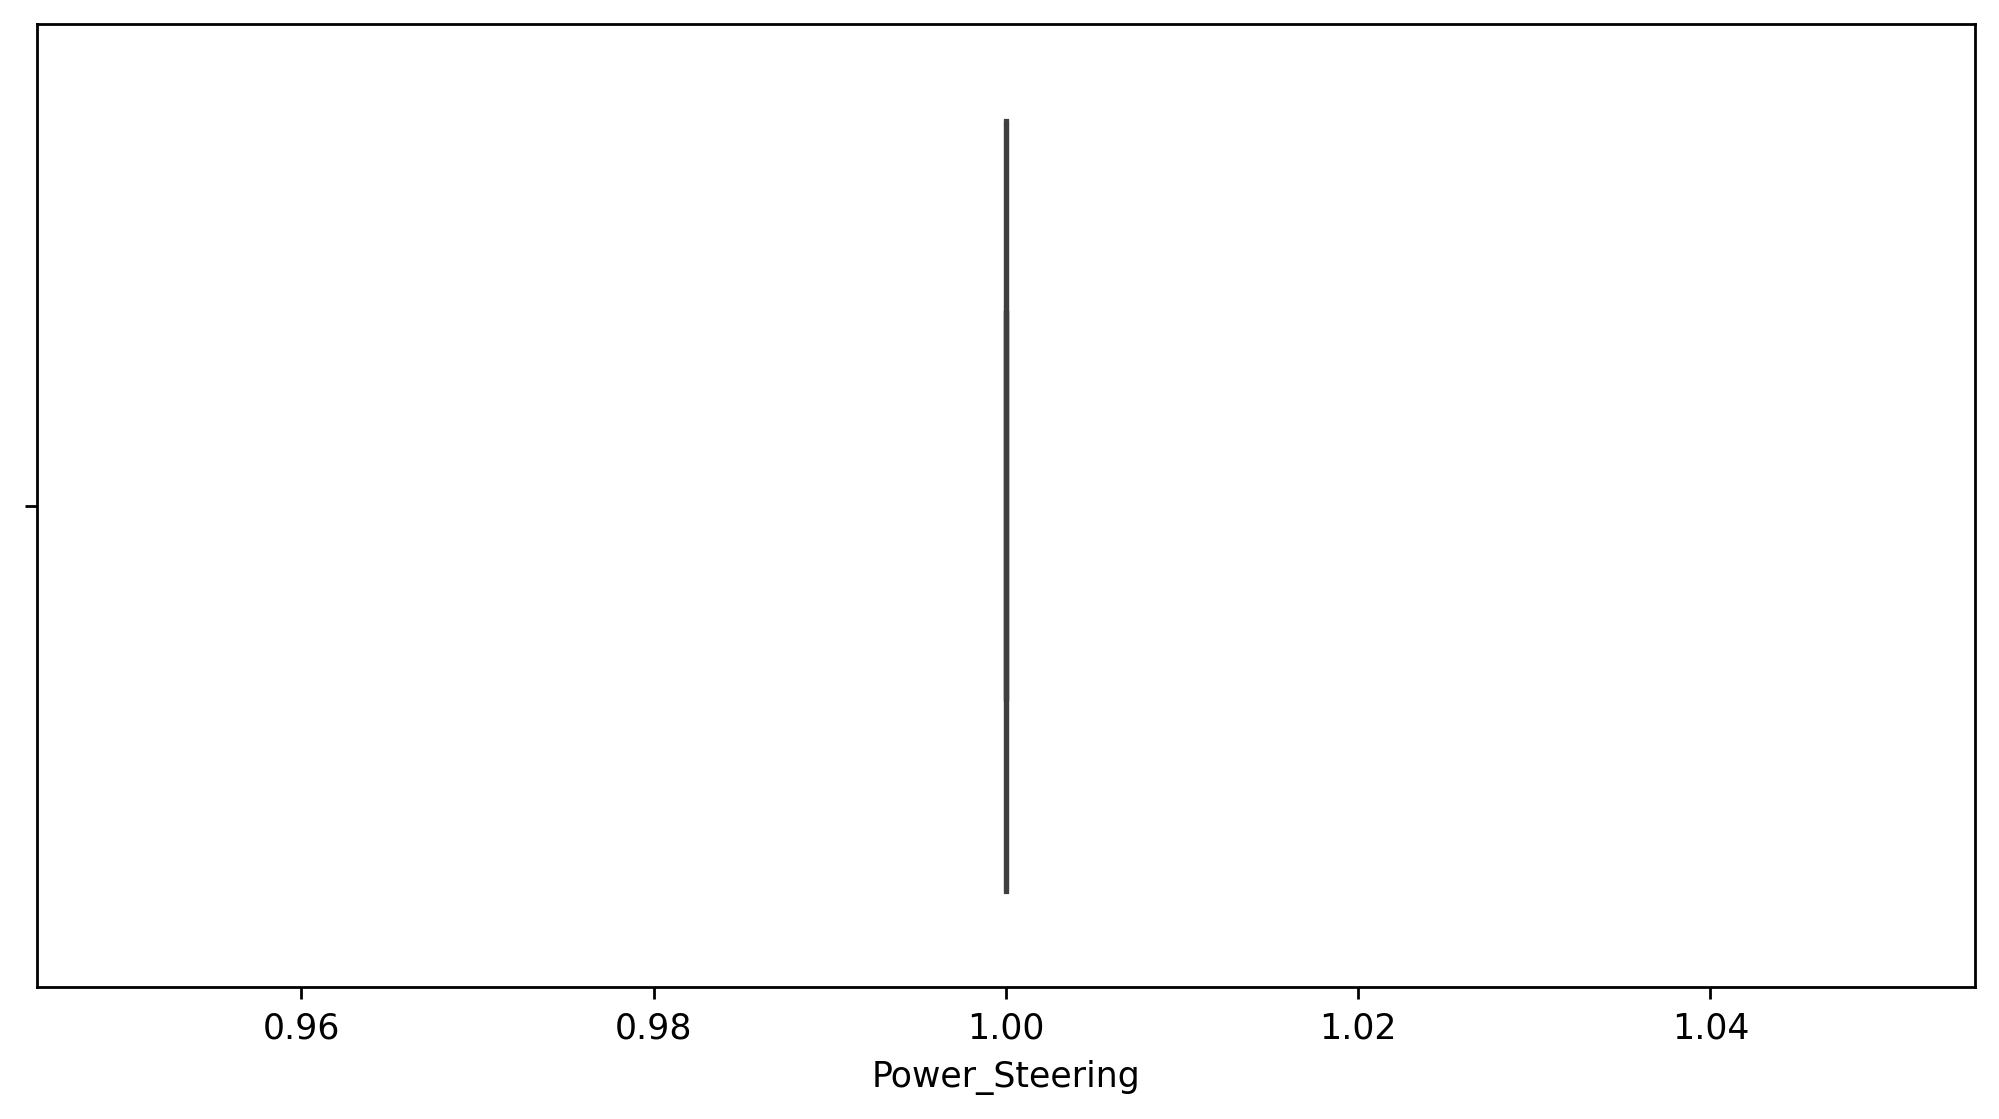

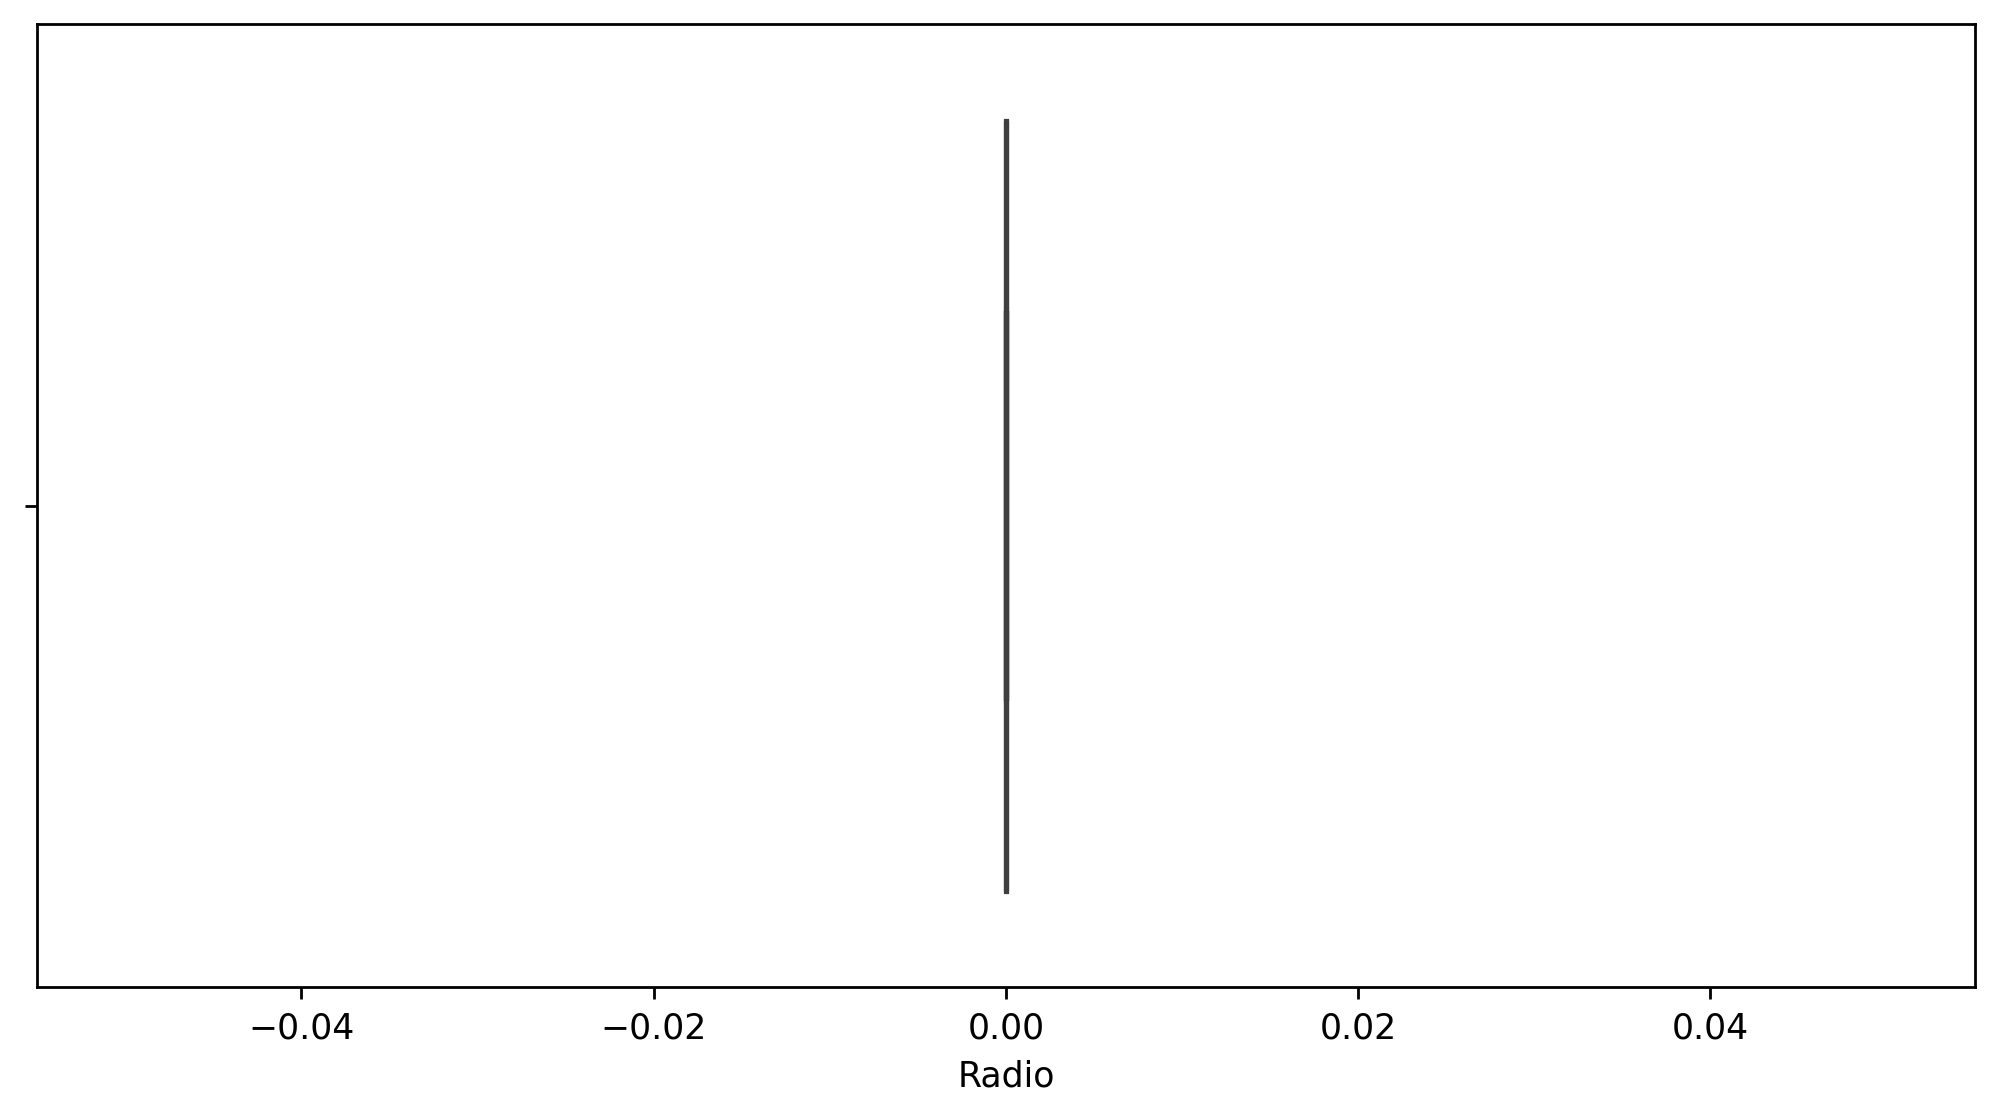

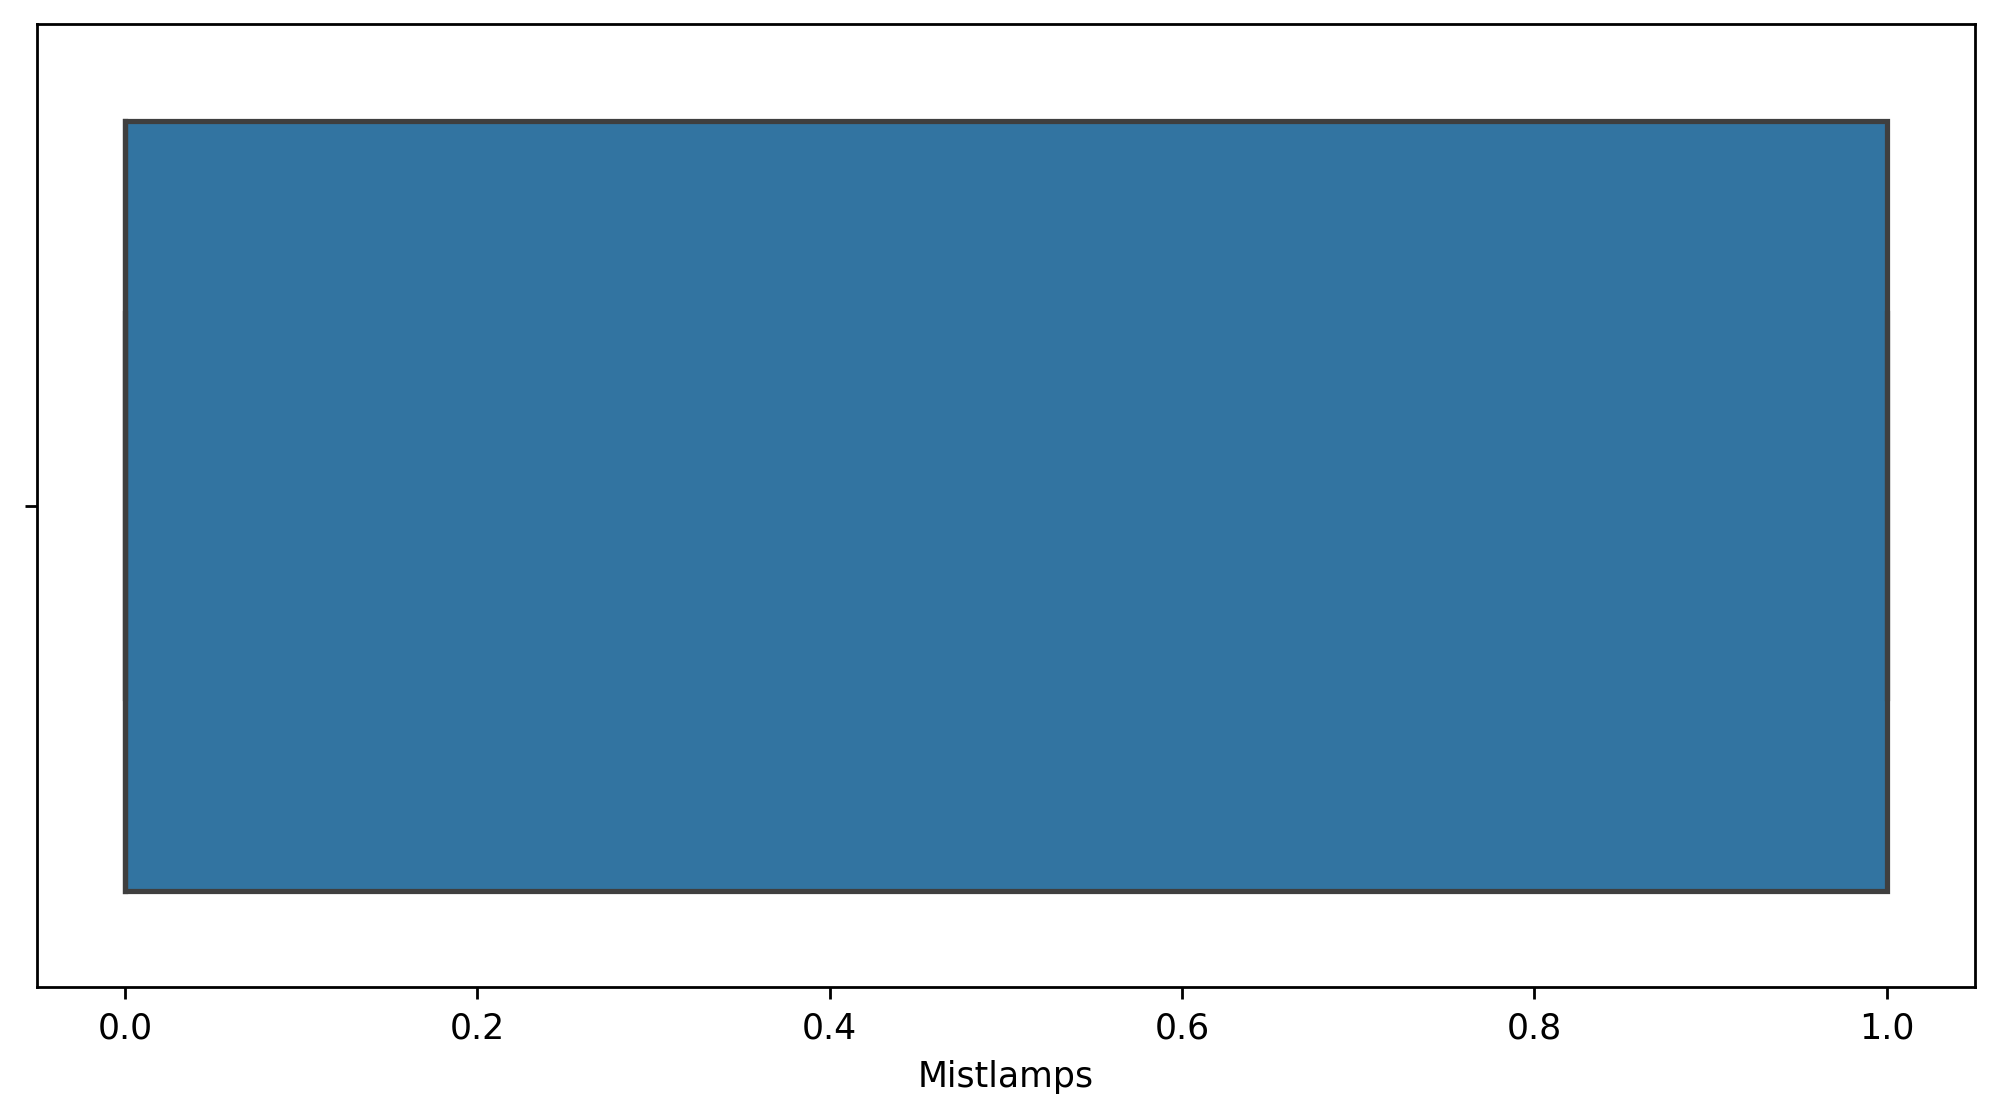

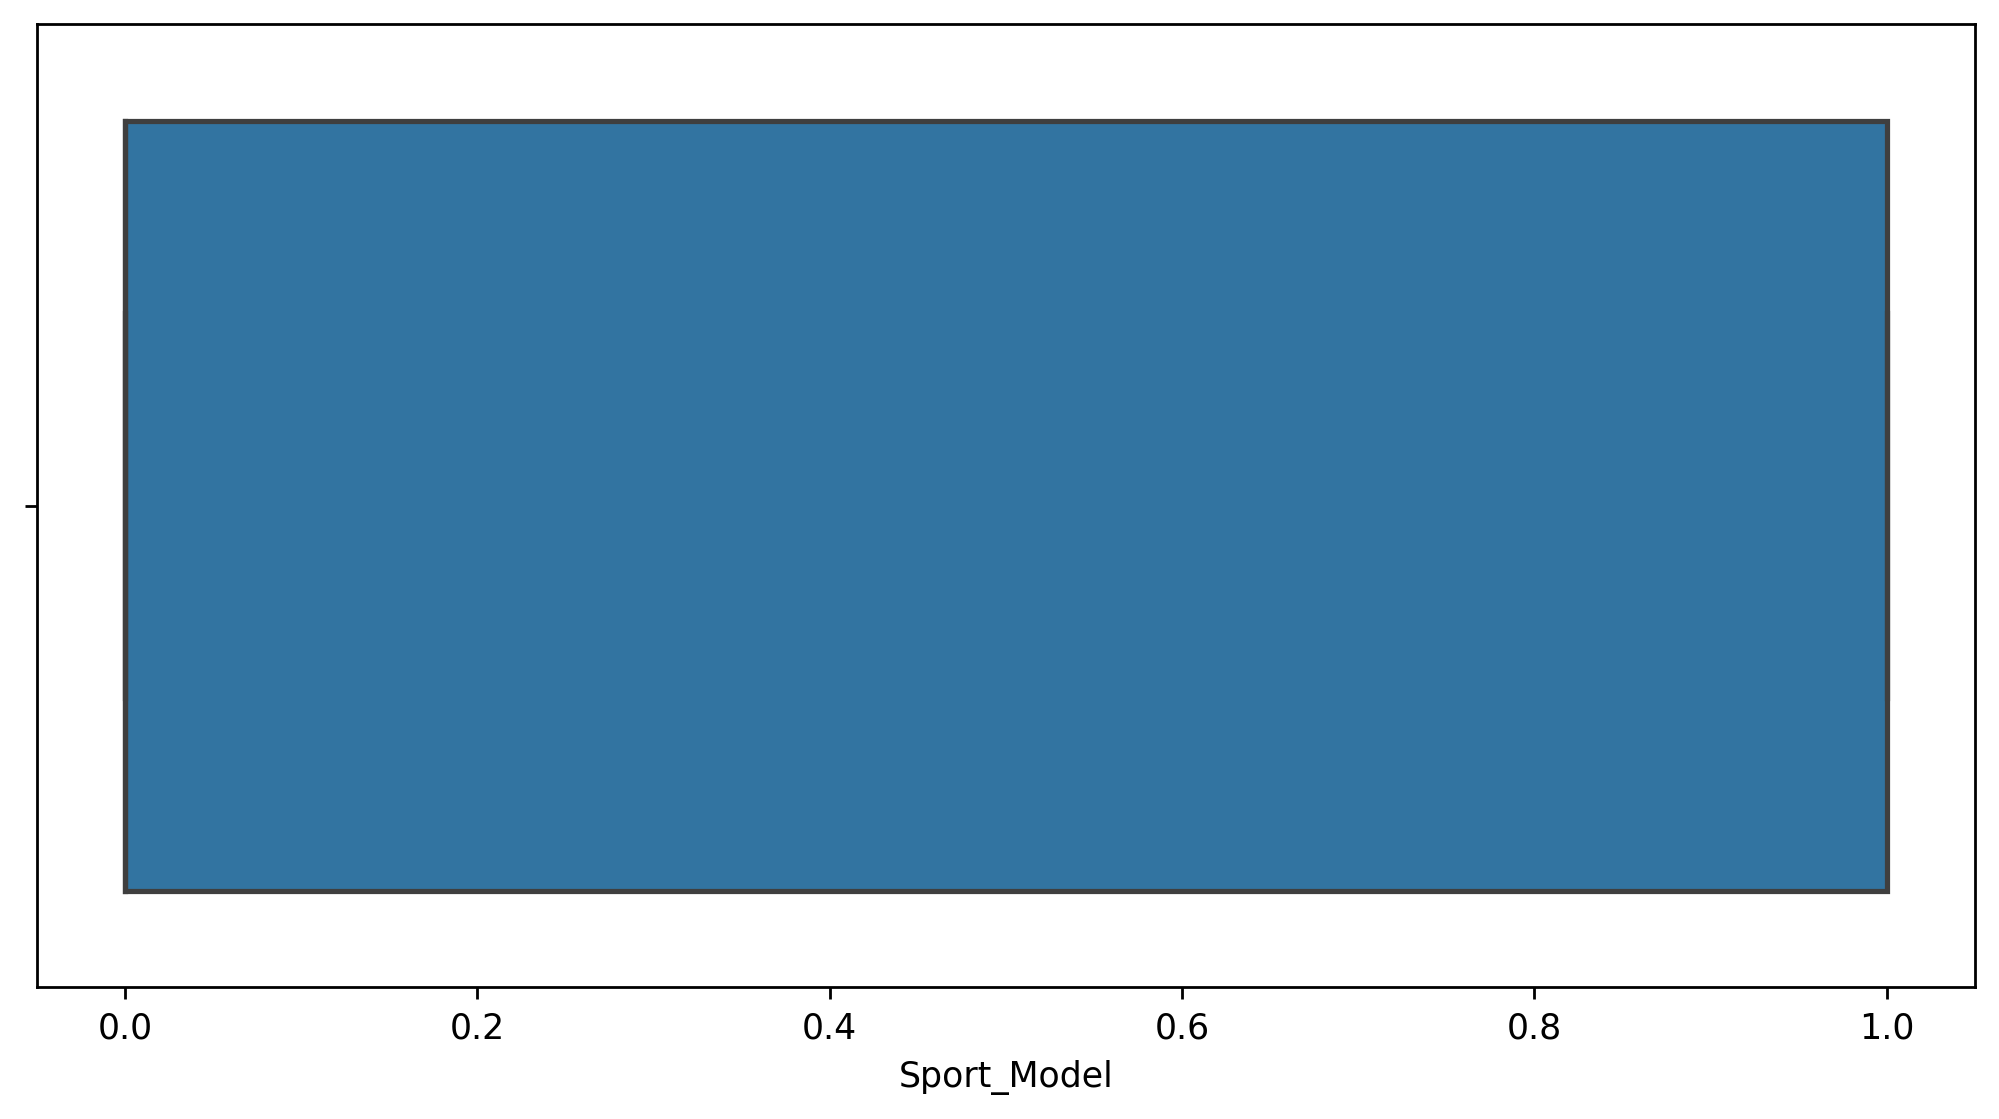

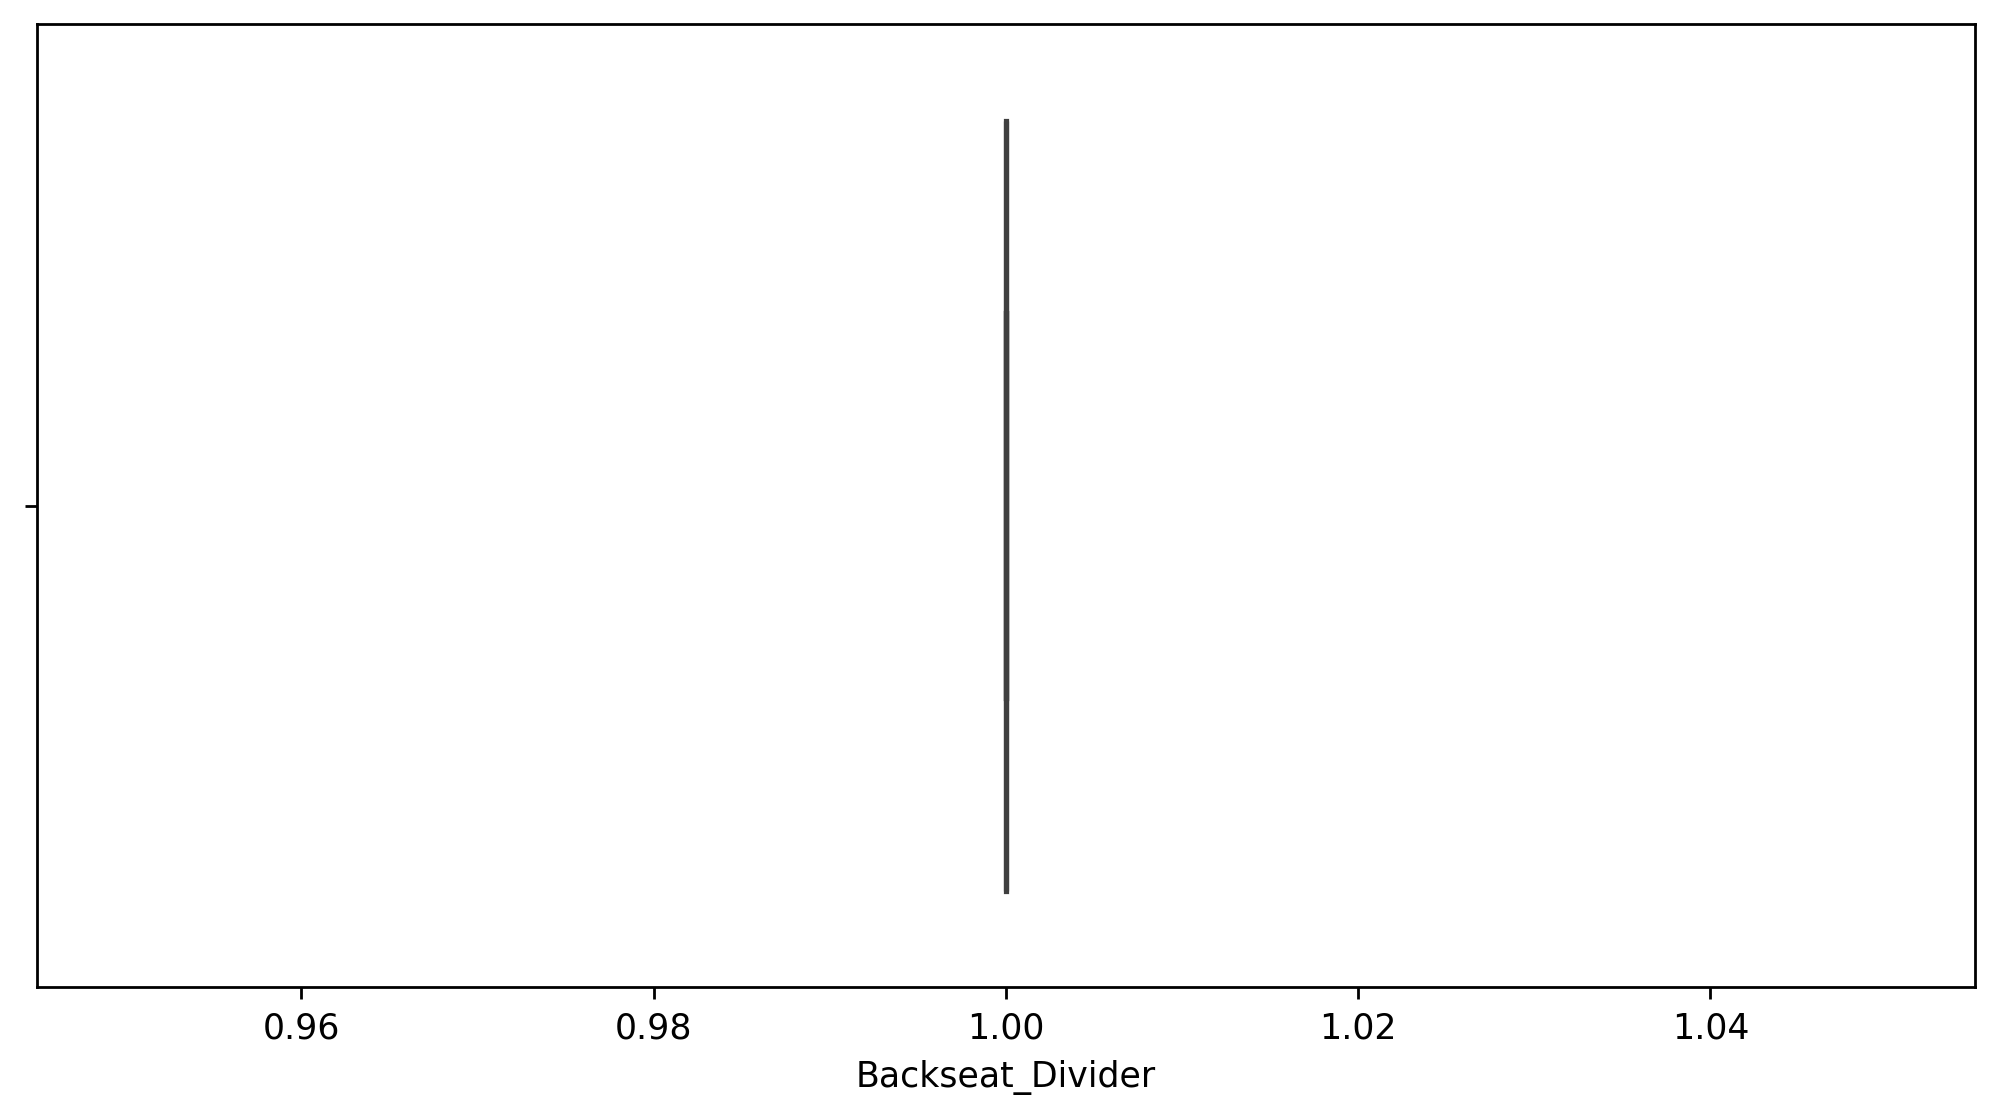

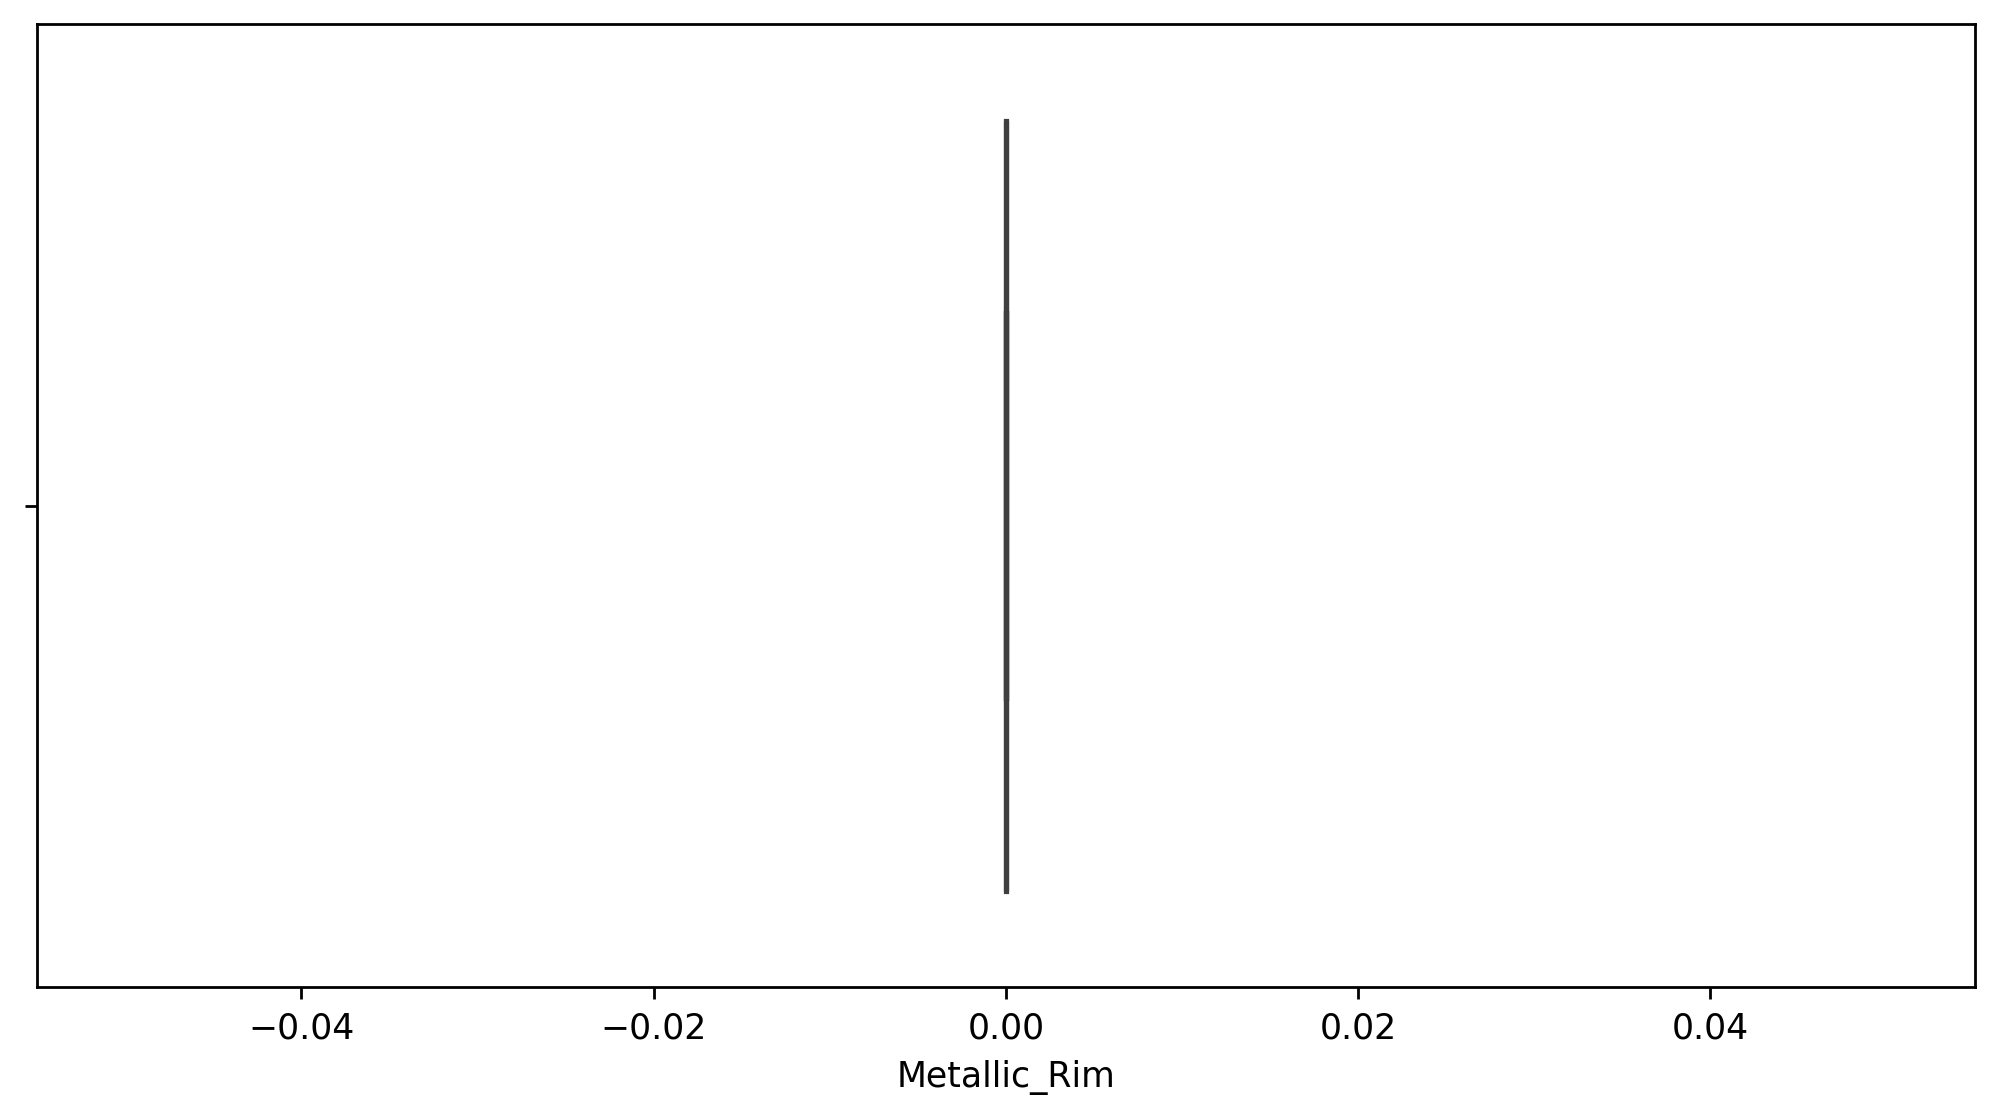

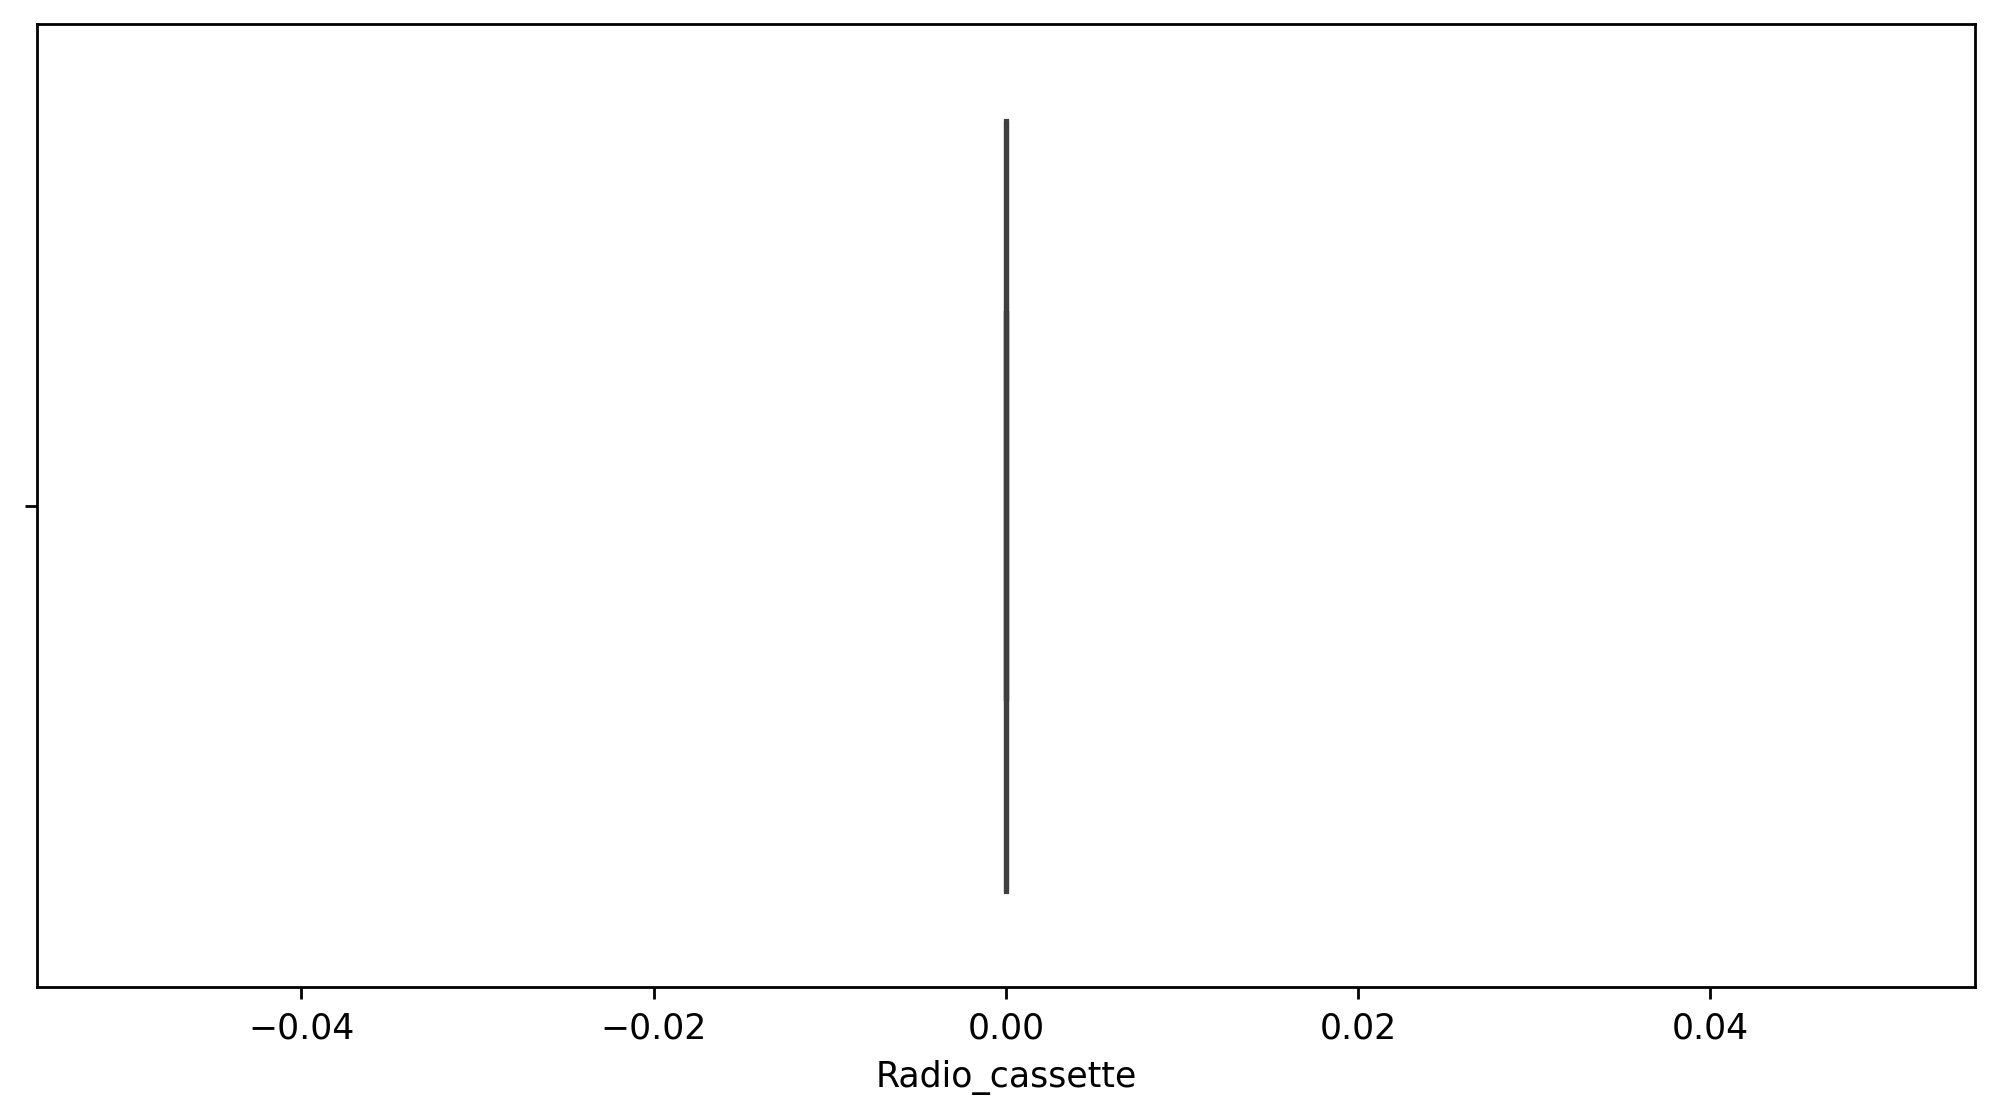

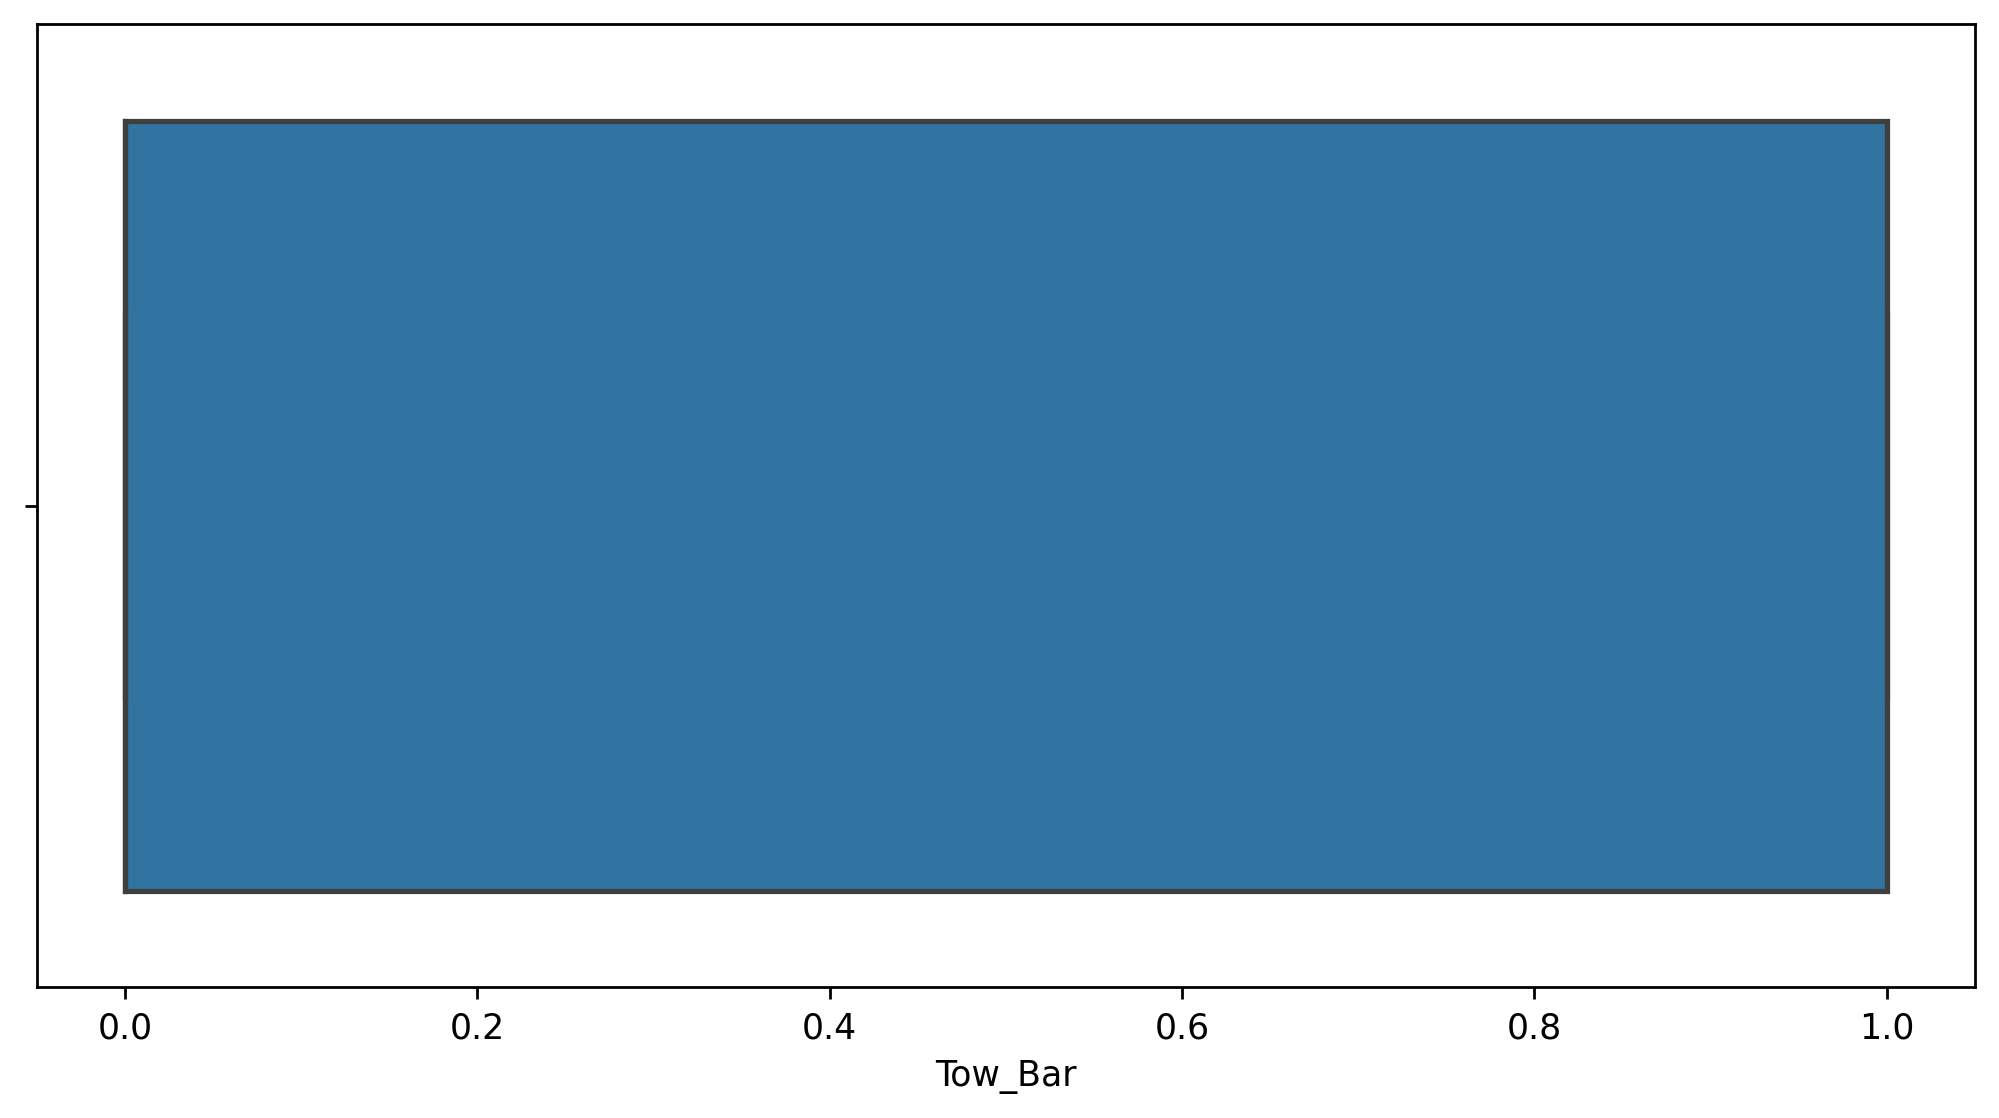

In [21]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#feature selection

# PPS score

In [22]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=a3c8fb2d8bcf476272007b3a43bbf42a6c0382073ed2b857cd5eb6e96275e55d
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [23]:
import ppscore as ps

In [24]:
feature_sel = ps.matrix(df)

In [26]:
feature_sel[feature_sel['y'] == 'Price']

x      y   ppscore            case  is_valid_score  \
2                   Id  Price  0.501031      regression            True   
40               Model  Price  0.451004      regression            True   
78               Price  Price  1.000000  predict_itself            True   
116          Age_08_04  Price  0.601765      regression            True   
154          Mfg_Month  Price  0.000000      regression            True   
192           Mfg_Year  Price  0.604198      regression            True   
230                 KM  Price  0.000000      regression            True   
268          Fuel_Type  Price  0.000000      regression            True   
306                 HP  Price  0.125737      regression            True   
344          Met_Color  Price  0.000000      regression            True   
382              Color  Price  0.000000      regression            True   
420          Automatic  Price  0.000000      regression            True   
458                 cc  Price  0.049471      regression            True   
496              Doors  Price  0.000000      regression            True   
534          Cylinders  Price  0.000000      regression            True   
572              Gears  Price  0.000000      regression            True   
610      Quarterly_Tax  Price  0.082855      regression            True   
648             Weight  Price  0.313356      regression            True   
686      Mfr_Guarantee  Price  0.000000      regression            True   
724    BOVAG_Guarantee  Price  0.000000      regression            True   
762   Guarantee_Period  Price  0.000000      regression            True   
800                ABS  Price  0.000000      regression            True   
838           Airbag_1  Price  0.000000      regression            True   
876           Airbag_2  Price  0.009609      regression            True   
914              Airco  Price  0.071167      regression            True   
952    Automatic_airco  Price  0.000000      regression            True   
990      Boardcomputer  Price  0.214990      regression            True   
1028         CD_Player  Price  0.000000      regression            True   
1066      Central_Lock  Price  0.009680      regression            True   
1104   Powered_Windows  Price  0.012147      regression            True   
1142    Power_Steering  Price  0.000000      regression            True   
1180             Radio  Price  0.000000      regression            True   
1218         Mistlamps  Price  0.000000      regression            True   
1256       Sport_Model  Price  0.000000      regression            True   
1294  Backseat_Divider  Price  0.000000      regression            True   
1332      Metallic_Rim  Price  0.000000      regression            True   
1370    Radio_cassette  Price  0.000000      regression            True   
1408           Tow_Bar  Price  0.000000      regression            True   

                   metric  baseline_score  model_score  \
2     mean absolute error      2248.49234  1121.927577   
40    mean absolute error      2248.49234  1234.414044   
78                   None         0.00000     1.000000   
116   mean absolute error      2248.49234   895.428383   
154   mean absolute error      2248.49234  2353.328587   
192   mean absolute error      2248.49234   889.957099   
230   mean absolute error      2248.49234  2250.513602   
268   mean absolute error      2248.49234  2345.604865   
306   mean absolute error      2248.49234  1965.772670   
344   mean absolute error      2248.49234  2327.093297   
382   mean absolute error      2248.49234  2299.015637   
420   mean absolute error      2248.49234  2344.410748   
458   mean absolute error      2248.49234  2137.258172   
496   mean absolute error      2248.49234  2274.135250   
534   mean absolute error      2248.49234  2344.410748   
572   mean absolute error      2248.49234  2344.410748   
610   mean absolute error      2248.49234  2062.193551   
648   mean absolute error      2248.49234  1543.914

#tree based selection

In [28]:
X = df.iloc[:,:-1]
y = df['Price']


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Assuming x and y are your feature matrix and target variable
dt = DecisionTreeRegressor()

dt.fit(X, y)

DecisionTreeRegressor()

In [31]:
dt.feature_importances_

array([4.02758380e-07, 5.90264424e-07, 9.99994639e-01, 8.56106912e-07,
       2.10267072e-07, 2.95218986e-07, 1.05931666e-06, 7.34781768e-09,
       9.79709025e-10, 2.69583267e-07, 9.89506115e-08, 0.00000000e+00,
       9.79709025e-10, 9.79709025e-10, 0.00000000e+00, 0.00000000e+00,
       2.68240540e-07, 7.81046945e-07, 1.30627870e-09, 1.03849157e-09,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.53254483e-07, 0.00000000e+00, 1.60019141e-08, 0.00000000e+00,
       5.22511492e-11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.46806909e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [33]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : X.columns
})

In [34]:
ig_sel

IG          Features
0   4.027584e-07                Id
1   5.902644e-07             Model
2   9.999946e-01             Price
3   8.561069e-07         Age_08_04
4   2.102671e-07         Mfg_Month
5   2.952190e-07          Mfg_Year
6   1.059317e-06                KM
7   7.347818e-09         Fuel_Type
8   9.797090e-10                HP
9   2.695833e-07         Met_Color
10  9.895061e-08             Color
11  0.000000e+00         Automatic
12  9.797090e-10                cc
13  9.797090e-10             Doors
14  0.000000e+00         Cylinders
15  0.000000e+00             Gears
16  2.682405e-07     Quarterly_Tax
17  7.810469e-07            Weight
18  1.306279e-09     Mfr_Guarantee
19  1.038492e-09   BOVAG_Guarantee
20  0.000000e+00  Guarantee_Period
21  0.000000e+00               ABS
22  0.000000e+00          Airbag_1
23  0.000000e+00          Airbag_2
24  1.532545e-07             Airco
25  0.000000e+00   Automatic_airco
26  1.600191e-08     Boardcomputer
27  0.000000e+00         CD_Player
28  5.225115e-11      Central_Lock
29  0.000000e+00   Powered_Windows
30  0.000000e+00    Power_Steering
31  0.000000e+00             Radio
32  3.468069e-07         Mistlamps
33  0.000000e+00       Sport_Model
34  0.000000e+00  Backseat_Divider
35  0.000000e+00      Metallic_Rim
36  0.000000e+00    Radio_cassette

In [35]:
ig_sel.sort_values(by='IG', ascending=False)

IG          Features
2   9.999946e-01             Price
6   1.059317e-06                KM
3   8.561069e-07         Age_08_04
17  7.810469e-07            Weight
1   5.902644e-07             Model
0   4.027584e-07                Id
32  3.468069e-07         Mistlamps
5   2.952190e-07          Mfg_Year
9   2.695833e-07         Met_Color
16  2.682405e-07     Quarterly_Tax
4   2.102671e-07         Mfg_Month
24  1.532545e-07             Airco
10  9.895061e-08             Color
26  1.600191e-08     Boardcomputer
7   7.347818e-09         Fuel_Type
18  1.306279e-09     Mfr_Guarantee
19  1.038492e-09   BOVAG_Guarantee
13  9.797090e-10             Doors
8   9.797090e-10                HP
12  9.797090e-10                cc
28  5.225115e-11      Central_Lock
15  0.000000e+00             Gears
35  0.000000e+00      Metallic_Rim
34  0.000000e+00  Backseat_Divider
33  0.000000e+00       Sport_Model
31  0.000000e+00             Radio
30  0.000000e+00    Power_Steering
29  0.000000e+00   Powered_Windows
11  0.000000e+00         Automatic
27  0.000000e+00         CD_Player
14  0.000000e+00         Cylinders
25  0.000000e+00   Automatic_airco
23  0.000000e+00          Airbag_2
22  0.000000e+00          Airbag_1
21  0.000000e+00               ABS
20  0.000000e+00  Guarantee_Period
36  0.000000e+00    Radio_cassette

#VIF calculation

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Extracting the predictor variables
X = df[['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar']]

# Adding a constant for the intercept in the regression model
X = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Displaying the VIF values
print(vif_data)

            Variable           VIF
0              const           NaN
1                 Id     13.716667
2              Model      2.041503
3              Price      8.945939
4          Age_08_04  10540.002329
5          Mfg_Month    342.528590
6           Mfg_Year  10210.970187
7                 KM      3.685719
8          Fuel_Type      3.284867
9                 HP      2.033129
10         Met_Color      1.131414
11             Color      1.086285
12         Automatic           NaN
13                cc      4.511190
14             Doors      1.527049
15         Cylinders           NaN
16             Gears           NaN
17     Quarterly_Tax      2.567476
18            Weight      5.776124
19     Mfr_Guarantee      1.216983
20   BOVAG_Guarantee      1.241212
21  Guarantee_Period           NaN
22               ABS           NaN
23          Airbag_1           NaN
24          Airbag_2      1.744758
25             Airco      1.876989
26   Automatic_airco           NaN
27     Boardcomputer

#chi 2

In [42]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2, k = 5)

test.fit(X,y)

SelectKBest(k=5, score_func=<function chi2 at 0x7e15884440d0>)

In [43]:
test.scores_

array([2.39859821e-27, 2.46556623e+05, 2.39391260e+04, 1.21505916e+06,
       7.50742889e+03, 3.99359236e+02, 1.46692157e+00, 1.17741465e+07,
       1.58410283e+01, 5.08863319e+02, 7.56903644e+01, 1.76880658e+02,
                  nan, 4.48380053e+03, 5.43807704e+01, 9.59439283e-27,
       1.22005777e-26, 7.37914330e+02, 7.99825993e+02, 1.53500501e+02,
       2.87406019e+01, 7.24592540e-27, 2.39859821e-27, 2.39859821e-27,
       7.77284751e+01, 2.33814389e+02,            nan, 5.48151696e+02,
                  nan, 1.48971829e+02, 1.54135832e+02, 2.39859821e-27,
                  nan, 1.81045629e+02, 2.47607108e+02, 2.39859821e-27,
                  nan,            nan, 1.65669239e+02])

In [45]:
X.columns

Index(['const', 'Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year',
       'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [47]:
pd.DataFrame({
    'Features' : X.columns,
    'Test' : test.scores_
})

Features          Test
0              const  2.398598e-27
1                 Id  2.465566e+05
2              Model  2.393913e+04
3              Price  1.215059e+06
4          Age_08_04  7.507429e+03
5          Mfg_Month  3.993592e+02
6           Mfg_Year  1.466922e+00
7                 KM  1.177415e+07
8          Fuel_Type  1.584103e+01
9                 HP  5.088633e+02
10         Met_Color  7.569036e+01
11             Color  1.768807e+02
12         Automatic           NaN
13                cc  4.483801e+03
14             Doors  5.438077e+01
15         Cylinders  9.594393e-27
16             Gears  1.220058e-26
17     Quarterly_Tax  7.379143e+02
18            Weight  7.998260e+02
19     Mfr_Guarantee  1.535005e+02
20   BOVAG_Guarantee  2.874060e+01
21  Guarantee_Period  7.245925e-27
22               ABS  2.398598e-27
23          Airbag_1  2.398598e-27
24          Airbag_2  7.772848e+01
25             Airco  2.338144e+02
26   Automatic_airco           NaN
27     Boardcomputer  5.481517e+02
28         CD_Player           NaN
29      Central_Lock  1.489718e+02
30   Powered_Windows  1.541358e+02
31    Power_Steering  2.398598e-27
32             Radio           NaN
33         Mistlamps  1.810456e+02
34       Sport_Model  2.476071e+02
35  Backseat_Divider  2.398598e-27
36      Metallic_Rim           NaN
37    Radio_cassette           NaN
38           Tow_Bar  1.656692e+02

In [48]:
pd.DataFrame(test.scores_).T

0              1            2             3           4   \
0  2.398598e-27  246556.623464  23939.12603  1.215059e+06  7507.42889   

           5         6             7          8           9   ...          29  \
0  399.359236  1.466922  1.177415e+07  15.841028  508.863319  ...  148.971829   

           30            31  32          33          34            35  36  37  \
0  154.135832  2.398598e-27 NaN  181.045629  247.607108  2.398598e-27 NaN NaN   

           38  
0  165.669239  

[1 rows x 39 columns]

In [50]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = X.columns
univariate

const             Id        Model         Price   Age_08_04  \
0  2.398598e-27  246556.623464  23939.12603  1.215059e+06  7507.42889   

    Mfg_Month  Mfg_Year            KM  Fuel_Type          HP  ...  \
0  399.359236  1.466922  1.177415e+07  15.841028  508.863319  ...   

   Central_Lock  Powered_Windows  Power_Steering  Radio   Mistlamps  \
0    148.971829       154.135832    2.398598e-27    NaN  181.045629   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette     Tow_Bar  
0   247.607108      2.398598e-27           NaN             NaN  165.669239  

[1 rows x 39 columns]

#model building

In [55]:
X = df[['Model', 'Age_08_04', 'Mfg_Month', 'KM',
        'Fuel_Type', 'HP', 'cc', 'Quarterly_Tax', 'Weight',
        'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2','Boardcomputer',
        'CD_Player', 'Central_Lock', 'Powered_Windows', 'Mistlamps']]
y = df['Price']


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Create a linear regression model
model = LinearRegression()

In [58]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [60]:
from sklearn import metrics
# Calculate R-squared
r2 = metrics.r2_score(y_test, y_pred)

In [61]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [62]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

In [63]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [64]:
# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)


In [65]:
# Print the evaluation metrics
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

R-squared: 0.8726
Adjusted R-squared: 0.8641
Mean Absolute Error (MAE): 799.52
Root Mean Squared Error (RMSE): 1046.24
Mean Squared Error (MSE): 1094609.07


In [66]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate R-squared for training data
r2_train = metrics.r2_score(y_train, y_train_pred)

# Print R-squared for training and testing data
print("Training R-squared:", r2_train)
print("Testing R-squared:", r2)


Training R-squared: 0.8822458368776096
Testing R-squared: 0.8725966853291198


In [ ]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

# Display the entire DataFrame
print(result_df)

       Actual  Predicted    Difference
594   10800.0    10800.0  1.000444e-10
754    9950.0     9950.0 -2.728484e-11
630    7500.0     7500.0 -1.446097e-10
1259   9250.0     9250.0 -1.818989e-11
903    9750.0     9750.0  1.637090e-11
...       ...        ...           ...
174   17200.0    17200.0  1.309672e-10
1428   8450.0     8450.0  9.458745e-11
297   12850.0    12850.0  5.638867e-11
1435   6950.0     6950.0  1.455192e-10
1009   8900.0     8900.0  6.730261e-11

[288 rows x 3 columns]


Text(0, 0.5, 'Predicted Values')

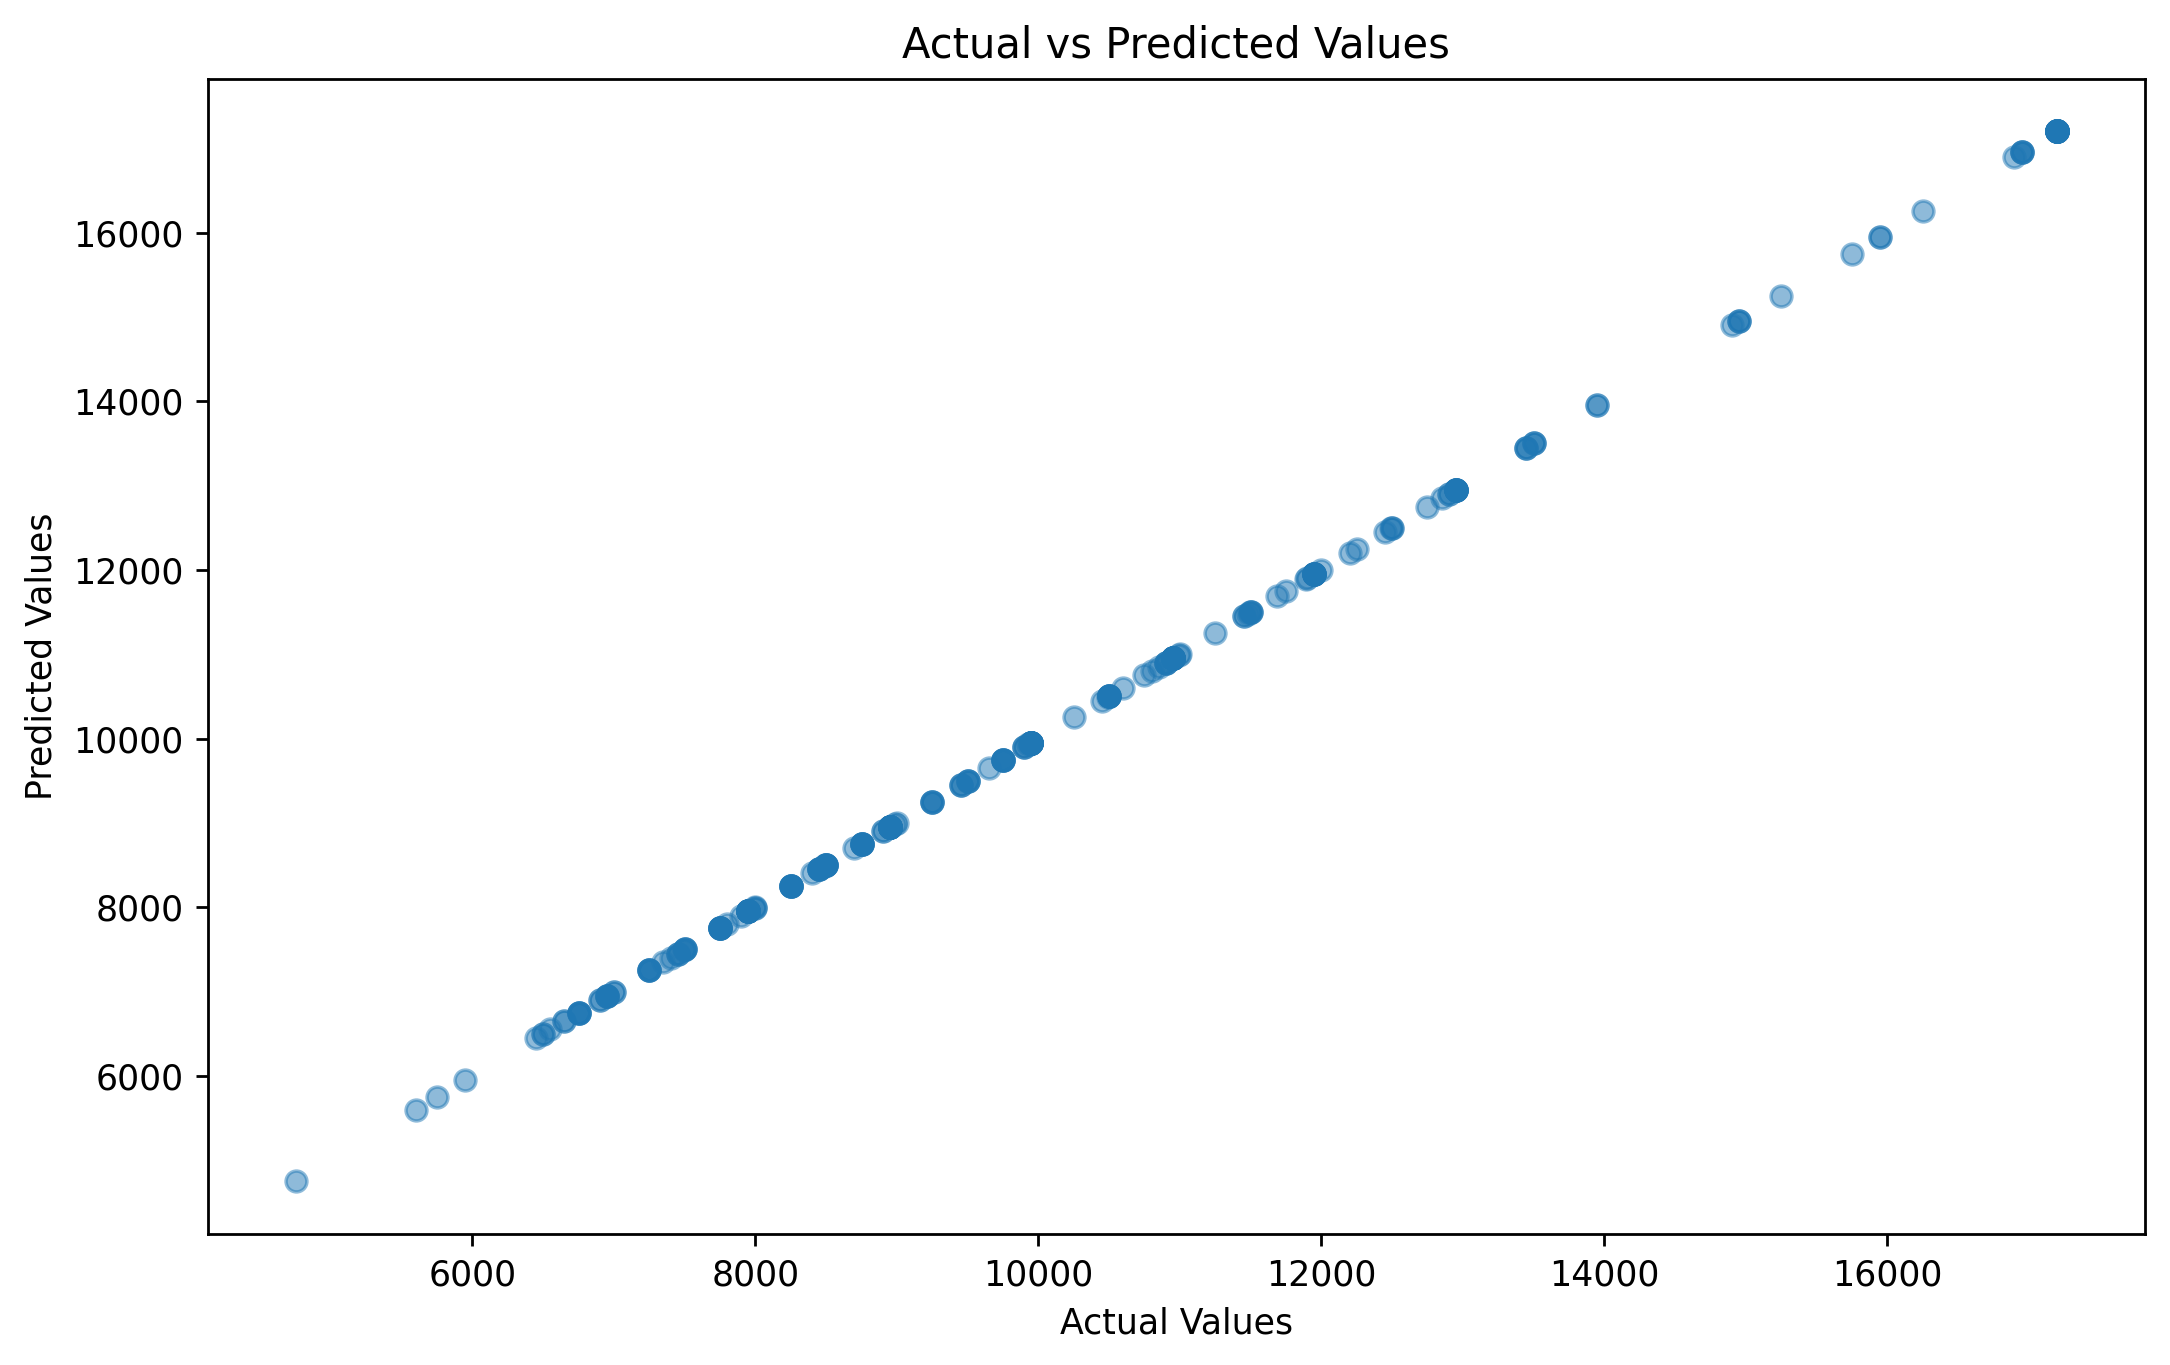

In [ ]:
# Plot the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Q-Q Plot')

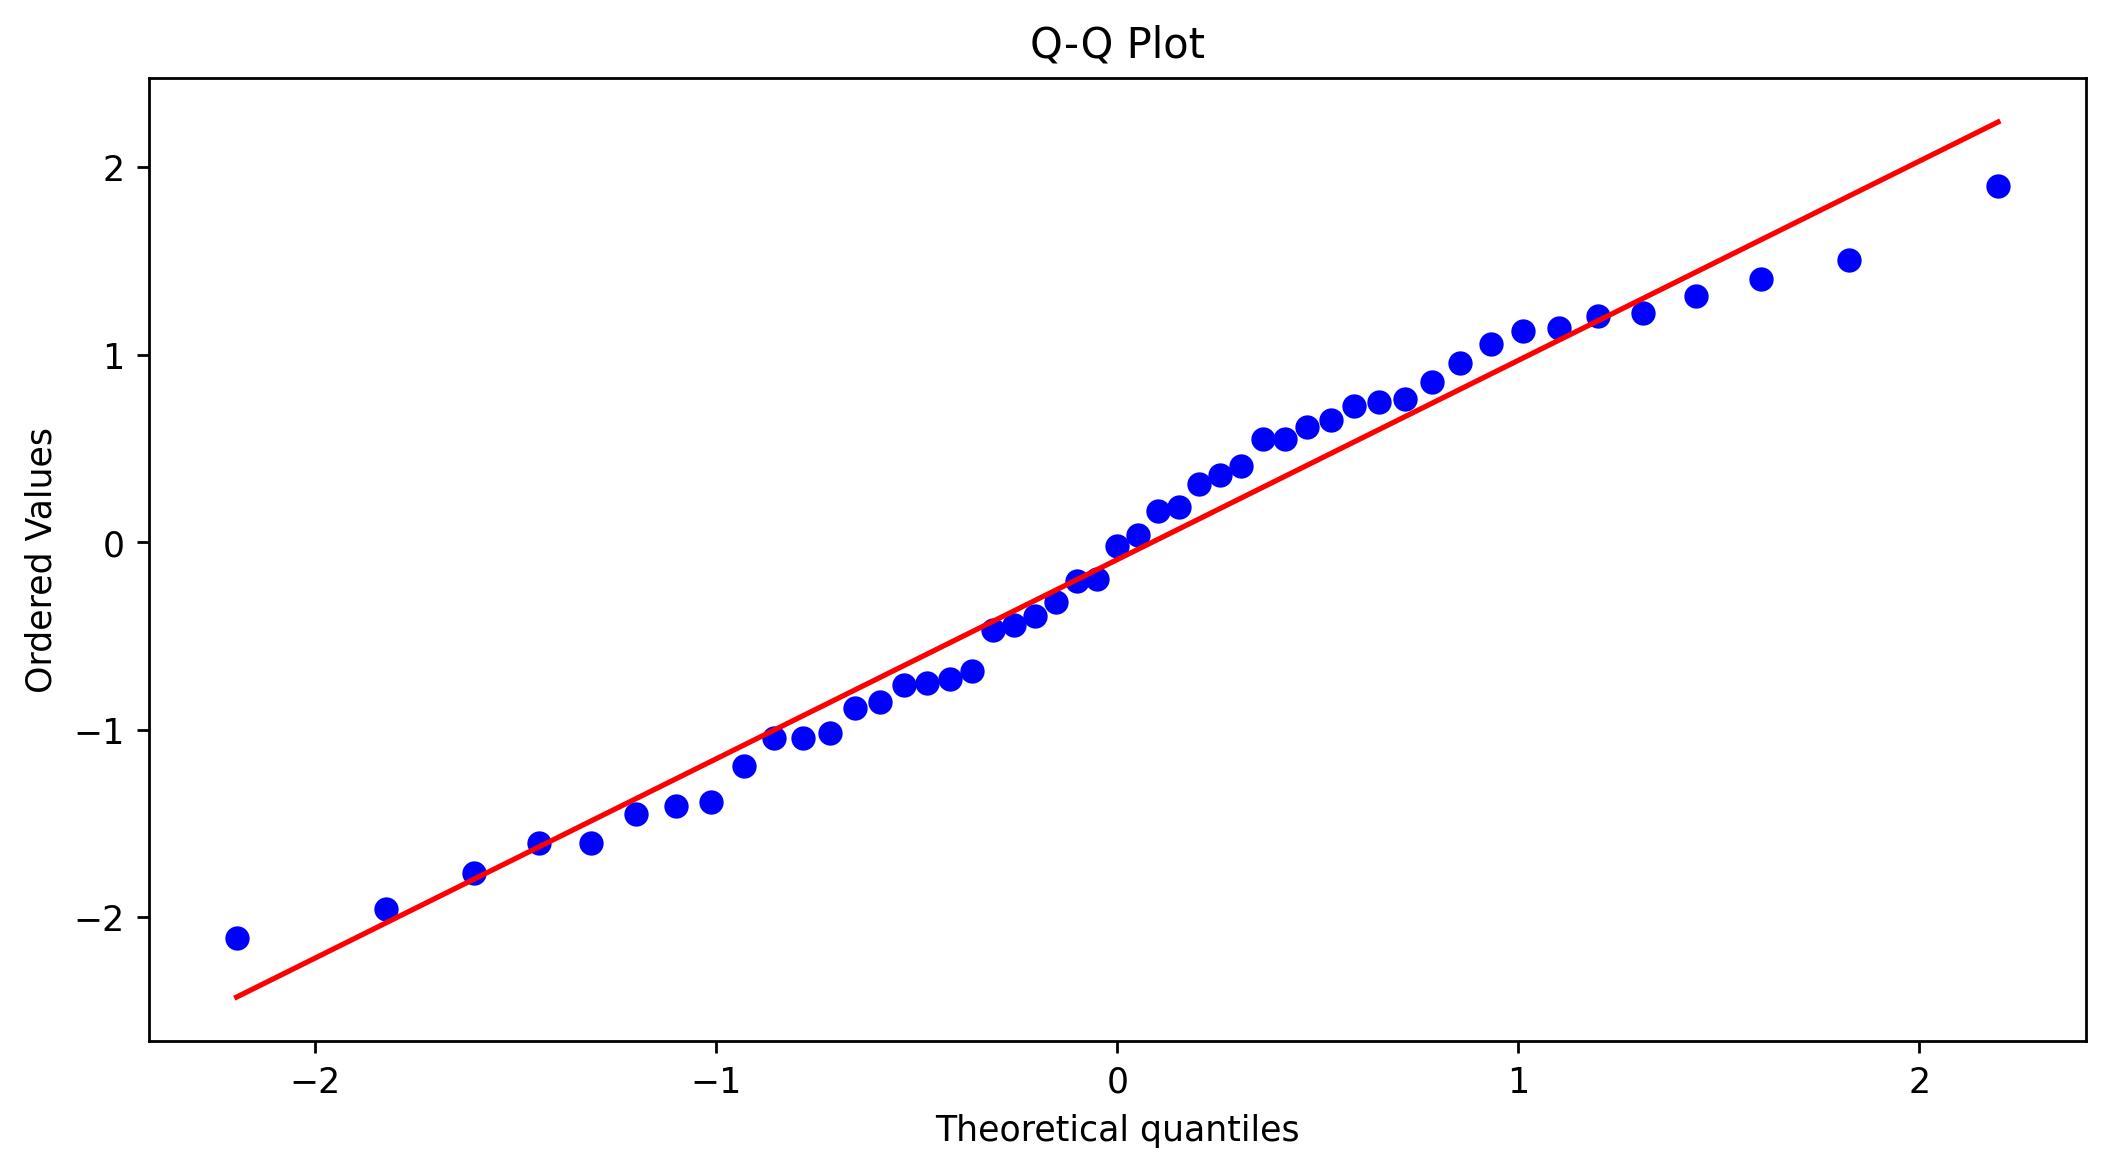

In [ ]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')